In [1]:
%load_ext autoreload

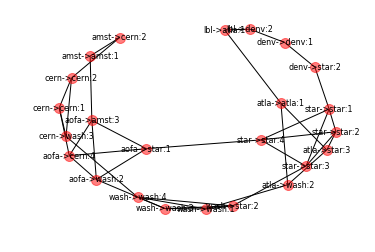

with servers


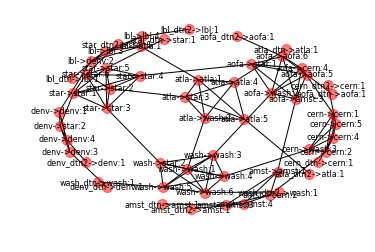

In [2]:
## %aimport sim
%autoreload 2
from sim import Topology, Endpoint

topo = None
endpoints = []
endpoints2 = []

def create_topology():
    global topo, endpoints, endpoints2
    topo = Topology("ESnet SDN Testbed Topology", ticks_per_sec=100)

    topo.add_routers(['lbl','denv','atla','wash','aofa','amst','cern','star'])
    topo.add_link(router_a='lbl',router_b='atla',capacity=10000,latency=80)
    topo.add_link(router_a='lbl',router_b='denv',capacity=10000,latency=50)
    topo.add_link(router_a='denv',router_b='star',capacity=10000,latency=60)
    topo.add_link(router_a='atla',router_b='wash',capacity=10000,latency=35)
    topo.add_link(router_a='atla',router_b='star',capacity=10000,latency=40)
    topo.add_link(router_a='wash',router_b='star',capacity=10000,latency=15)
    topo.add_link(router_a='aofa',router_b='star',capacity=10000,latency=50)
    topo.add_link(router_a='aofa',router_b='wash',capacity=10000,latency=40)
    topo.add_link(router_a='aofa',router_b='amst',capacity=20000,latency=120)
    topo.add_link(router_a='aofa',router_b='cern',capacity=10000,latency=120)
    topo.add_link(router_a='amst',router_b='cern',capacity=20000,latency=20)
    topo.add_link(router_a='cern',router_b='wash',capacity=10000,latency=20)

    topo.draw()

    lbl_dtn = Endpoint(name='lbl_dtn',topology=topo,capacity=10000,rate=10000)
    lbl_dtn.connect('lbl', latency=0)
    denv_dtn = Endpoint(name='denv_dtn',topology=topo,capacity=10000,rate=10000)
    denv_dtn.connect('denv', latency=0)
    atla_dtn = Endpoint(name='atla_dtn',topology=topo,capacity=10000,rate=10000)
    atla_dtn.connect('atla', latency=0)
    wash_dtn = Endpoint(name='wash_dtn',topology=topo,capacity=10000,rate=10000)
    wash_dtn.connect('wash', latency=0)
    star_dtn = Endpoint(name='star_dtn',topology=topo,capacity=10000,rate=10000)
    star_dtn.connect('star', latency=0)
    aofa_dtn = Endpoint(name='aofa_dtn',topology=topo,capacity=10000,rate=10000)
    aofa_dtn.connect('aofa', latency=0)
    amst_dtn = Endpoint(name='amst_dtn',topology=topo,capacity=10000,rate=10000)
    amst_dtn.connect('amst', latency=0)
    cern_dtn = Endpoint(name='cern_dtn',topology=topo,capacity=10000,rate=10000)
    cern_dtn.connect('cern', latency=0)

    lbl_dtn2 = Endpoint(name='lbl_dtn2',topology=topo,capacity=10000,rate=10000)
    lbl_dtn2.connect('lbl', latency=0)
    denv_dtn2 = Endpoint(name='denv_dtn2',topology=topo,capacity=10000,rate=10000)
    denv_dtn2.connect('denv', latency=0)
    atla_dtn2 = Endpoint(name='atla_dtn2',topology=topo,capacity=10000,rate=10000)
    atla_dtn2.connect('atla', latency=0)
    wash_dtn2 = Endpoint(name='wash_dtn2',topology=topo,capacity=10000,rate=10000)
    wash_dtn2.connect('wash', latency=0)
    star_dtn2 = Endpoint(name='star_dtn2',topology=topo,capacity=10000,rate=10000)
    star_dtn2.connect('star', latency=0)
    aofa_dtn2 = Endpoint(name='aofa_dtn2',topology=topo,capacity=10000,rate=10000)
    aofa_dtn2.connect('aofa', latency=0)
    amst_dtn2 = Endpoint(name='amst_dtn2',topology=topo,capacity=10000,rate=10000)
    amst_dtn2.connect('amst', latency=0)
    cern_dtn2 = Endpoint(name='cern_dtn2',topology=topo,capacity=10000,rate=10000)
    cern_dtn2.connect('cern', latency=0)
    
    endpoints=[lbl_dtn,denv_dtn,star_dtn,aofa_dtn,wash_dtn,amst_dtn,cern_dtn,atla_dtn]
    endpoints2=[lbl_dtn2,denv_dtn2,star_dtn2,aofa_dtn2,wash_dtn2,amst_dtn2,cern_dtn2,atla_dtn2]

    print "with servers"
    topo.draw()
    
def get_endpoint(name):
    global endpoints
    for endpoint in endpoints:
        if endpoint.name == name:
            return endpoint
    return None


create_topology()


In [3]:
from sim import DataTransfer
import numpy as np

flows = {}

def reset_flows():
    global flows
    for flow in flows.values():
            flow.reset()

def create_workflows(topo,endpoints,nb_of_flows,data_size,max_rate,nb_of_streams=1):
    global flows
    for endpoint in endpoints:
        for i in range(nb_of_flows):
            # select a random destination
            dst = None
            while True:
                dst = endpoints[np.random.randint(len(endpoints))]
                if dst != endpoint:
                    break    
            for s in range(nb_of_streams):
                flow = DataTransfer(name= endpoint.name+'-'+dst.name+"-"+str(data_size)+':'+str(i)+':'+str(s),
                                    src=endpoint,
                                    dst=dst,
                                    data_size=data_size/nb_of_streams,
                                    max_rate=max_rate/nb_of_streams,
                                    topology=topo)
                flow.endpoint = endpoint
                flow.info = False
                flow.debug = False
                flow.record_receive = True
                flow.record_drop = True
                flows[flow.name] = flow   
                topo.schedule_workflow(workflow=flow)

def delete_flows():
    global flows
    flows = {}
    
def show_receive(endpoint=None, single=False):
    global flows
    for flow in flows.values():
        if endpoint == None or flow.endpoint == endpoint:
            flow.plot_receive()
            if single: topo.show_plots()
    if not single:
        topo.show_plots()

def show_all(single=None):
    for endpoint in endpoints:
        print endpoint.name
        show_receive(endpoint=endpoint, single=single)

def get_av_rate_rtt():
    x=[]
    y=[]
    for flow in flows.values():
        y.append(flow.average)
        x.append(flow.rtt)
    return x,y

In [4]:
delete_flows()
create_workflows(topo, endpoints, nb_of_flows=1,data_size=800000,max_rate=9500,nb_of_streams=6)
create_workflows(topo, endpoints2, nb_of_flows=40,data_size=10000,max_rate=10000/40)
#create_workflows(topo, endpoints, nb_of_flows=1,data_size=800000,max_rate=10000)

In [5]:
def run_simulation():
    reset_flows()
    print "simlation starts with",len(flows),"flows"
    topo.start_simulation()
    

In [10]:
from threading import Thread

sim_thread = Thread(target=run_simulation)
sim_thread.start()

(457640, 1167.6660449504852, 0.3919271284619792)
simlation starts with 368 flows
Simulation starts 457640
Simulation stopped simulated elapse time: 0 real time: 0.0001220703125 real/simulate: 0.0
(0, 1.0048010349273682, 0.0)
(0, 2.0057339668273926, 0.0)
(0, 3.0059380531311035, 0.0)
(0, 4.006629943847656, 0.0)
(0, 5.0106329917907715, 0.0)
(0, 6.011526107788086, 0.0)
(0, 7.013523101806641, 0.0)
(0, 8.01697301864624, 0.0)
(0, 9.019973039627075, 0.0)
(0, 10.020718097686768, 0.0)
(0, 11.024817943572998, 0.0)
(0, 12.02883005142212, 0.0)
(0, 13.030143022537231, 0.0)
(0, 14.033355951309204, 0.0)
(0, 15.035825967788696, 0.0)
(0, 16.0362811088562, 0.0)
(0, 17.039483070373535, 0.0)
(0, 18.0397629737854, 0.0)
(0, 19.0412380695343, 0.0)
(0, 20.041965007781982, 0.0)
(0, 21.044020891189575, 0.0)
(0, 22.044249057769775, 0.0)
(0, 23.04682493209839, 0.0)
(0, 24.05044198036194, 0.0)
(0, 25.055290937423706, 0.0)
(0, 26.055924892425537, 0.0)
(0, 27.056627988815308, 0.0)
(0, 28.057204961776733, 0.0)
(0, 29.

start file transfer amst_dtn2-star_dtn2-10000:0:0
0 start file transfer amst_dtn2-cern_dtn2-10000:1:0
0 start file transfer amst_dtn2-lbl_dtn2-10000:2:0
0 start file transfer amst_dtn2-star_dtn2-10000:3:0
0 start file transfer amst_dtn2-atla_dtn2-10000:4:0
0 start file transfer amst_dtn2-aofa_dtn2-10000:5:0
0 start file transfer amst_dtn2-cern_dtn2-10000:6:0
0 start file transfer amst_dtn2-wash_dtn2-10000:7:0
0 start file transfer amst_dtn2-wash_dtn2-10000:8:0
0 start file transfer amst_dtn2-wash_dtn2-10000:9:0
0 start file transfer amst_dtn2-star_dtn2-10000:10:0
0 start file transfer amst_dtn2-star_dtn2-10000:11:0
0 start file transfer amst_dtn2-wash_dtn2-10000:12:0
0 start file transfer amst_dtn2-star_dtn2-10000:13:0
0 start file transfer amst_dtn2-denv_dtn2-10000:14:0
0 start file transfer amst_dtn2-aofa_dtn2-10000:15:0
0 start file transfer amst_dtn2-denv_dtn2-10000:16:0
0 start file transfer amst_dtn2-denv_dtn2-10000:17:0
0 start file transfer amst_dtn2-lbl_dtn2-10000:18:0
0 start

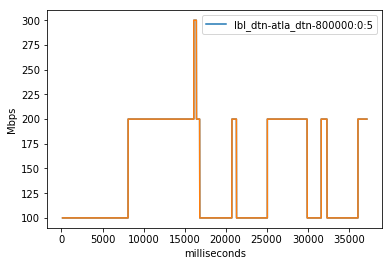

time: 39 secs amst_dtn2-cern_dtn2-10000:29:0 rtt: 40 average 256 drop 2
time: 40 secs amst_dtn2-cern_dtn2-10000:39:0 rtt: 40 average 250 drop 3
time: 41 secs atla_dtn2-star_dtn2-10000:7:0 rtt: 

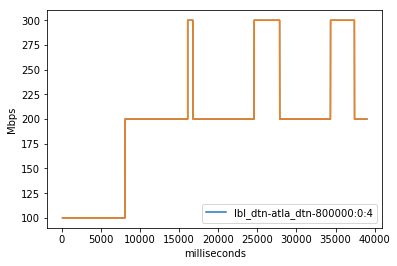

80 average 243 drop 0
time: 41 secs atla_dtn2-star_dtn2-10000:18:0 rtt: 80 average 243 drop 0
time: 41 secs atla_dtn2-star_dtn2-10000:20:0 rtt: 80 average 243 drop 0
time: 41 secs atla_dtn2-star_dtn2-10000:22:0 rtt: 80 average 243 drop 0
time: 41 secs atla_dtn2-star_dtn2-10000:25:0 rtt: 80 average 243 drop 0
time: 43 secs denv_dtn2-lbl_dtn2-10000:9:0 rtt: 100 average 232 drop 0
time: 43 secs denv_dtn2-lbl_dtn2-10000:22:0 rtt: 100 

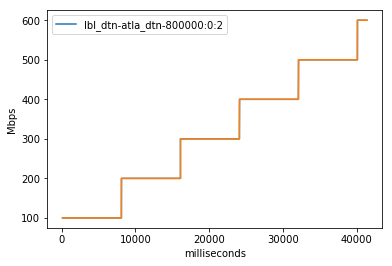

average 232 drop 0
time: 43 secs denv_dtn2-lbl_dtn2-10000:31:0 rtt: 100 average 232 drop 0
time: 43 secs denv_dtn2-lbl_dtn2-10000:32:0 rtt: 100 average 232 drop 0
time: 43 secs amst_dtn2-wash_dtn2-10000:31:0 rtt: 80 average 232 drop 1
time: 44 secs amst_dtn2-cern_dtn2-10000:1:0 rtt: 40 average 227 drop 6


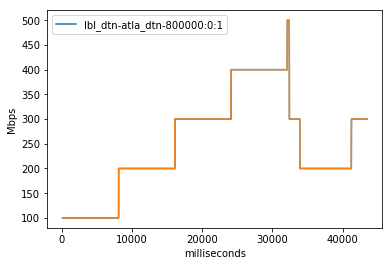

time: 45 secs star_dtn2-wash_dtn2-10000:39:0 rtt: 30 average 222 drop 10
time: 46 secs amst_dtn2-wash_dtn2-10000:7:0 rtt: 80 average 217 drop 2
time: 46 secs amst_dtn2-wash_dtn2-10000:24:0 rtt: 80 average 217 drop 2


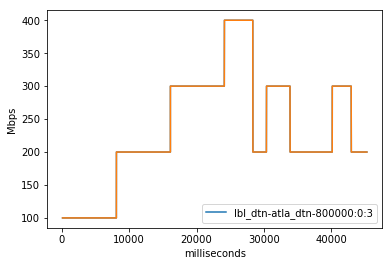

time: 48 secs amst_dtn2-wash_dtn2-10000:12:0 rtt: 80 average 208 drop 4
time: 48 secs star_dtn2-wash_dtn2-10000:37:0 rtt: 30 average 208 drop 13
time: 48 secs star_dtn2-wash_dtn2-10000:35:0 rtt: 30 average 208 drop 13
time: 48 secs amst_dtn2-wash_dtn2-10000:25:0 rtt: 80 average 208 drop 3


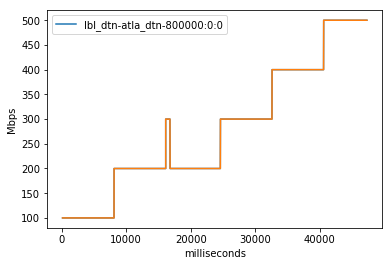

denv_dtn
time: 49 secs star_dtn2-wash_dtn2-10000:26:0 rtt: 30 average 204 drop 14
time: 49 secs denv_dtn2-lbl_dtn2-10000:29:0 rtt: 100 average 204 drop 2
time: 49 secs amst_dtn2-wash_dtn2-10000:20:0 rtt: 80 average 204 drop 3


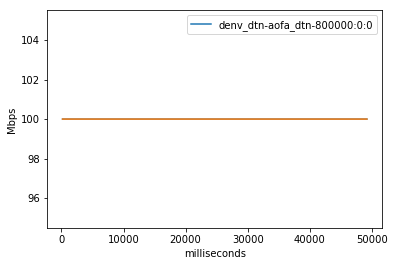

time: 51 secs amst_dtn2-wash_dtn2-10000:8:0 rtt: 80 average 196 drop 4
time: 51 secs star_dtn2-wash_dtn2-10000:33:0 rtt: 30 average 196 drop 18


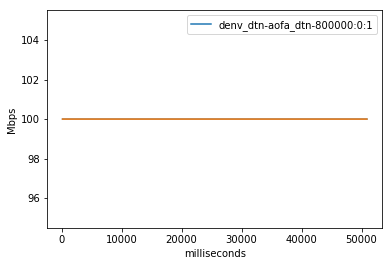

time: 53 secs star_dtn2-wash_dtn2-10000:20:0 rtt: 30 average 188 drop 22
time: 54 secs star_dtn2-wash_dtn2-10000:15:0 rtt: 30 average 185 drop 20


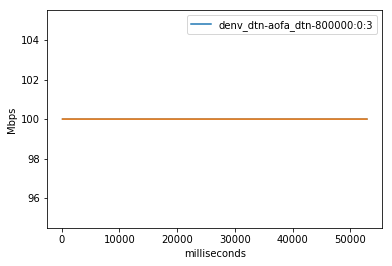

time: 54 secs amst_dtn2-wash_dtn2-10000:9:0 rtt: 80 average 185 drop 5
time: 55 secs star_dtn2-wash_dtn2-10000:36:0 rtt: 30 average 181 drop 23
time: 56 secs star_dtn2-wash_dtn2-10000:8:0 rtt: 30 average 178 drop 26


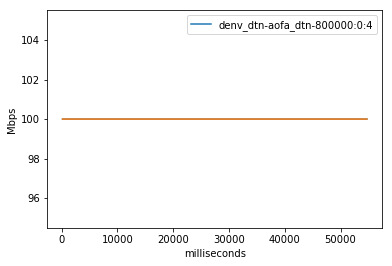

time: 56 secs star_dtn2-wash_dtn2-10000:34:0 rtt: 30 average 178 drop 23
time: 56 secs lbl_dtn2-denv_dtn2-10000:38:0 rtt: 100 average 178 drop 4


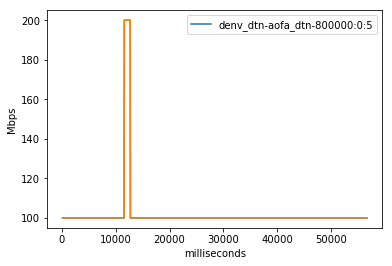

time: 60 secs amst_dtn2-aofa_dtn2-10000:38:0 rtt: 240 average 166 drop 1
time: 60 secs cern_dtn2-wash_dtn2-10000:3:0 rtt: 40 average 166 drop 27
time: 61 secs cern_dtn2-wash_dtn2-10000:34:0 rtt: 40 average 163 drop 25
time: 63 secs denv_dtn2-wash_dtn2-10000:34:0 rtt: 150 average 158 drop 4
time: 64 secs star_dtn2-atla_dtn2-10000:28:0 rtt: 80 average 156 drop 20
time: 64 secs cern_dtn2-wash_dtn2-10000:32:0 rtt: 40 average 156 drop 22


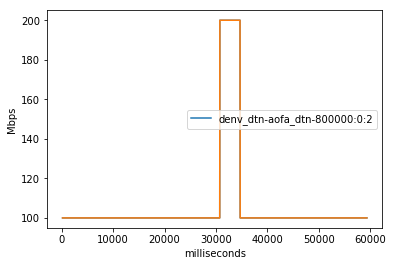

star_dtn
time: 65 secs star_dtn2-atla_dtn2-10000:4:0 rtt: 80 average 153 drop 17
time: 65 secs lbl_dtn2-denv_dtn2-10000:26:0 rtt: 100 average 153 drop 15
time: 66 secs lbl_dtn2-denv_dtn2-10000:10:0 rtt: 100 average 151 drop 11
time: 66 secs cern_dtn2-wash_dtn2-10000:5:0 rtt: 40 average 151 drop 31


In [ ]:
show_all(single=True)

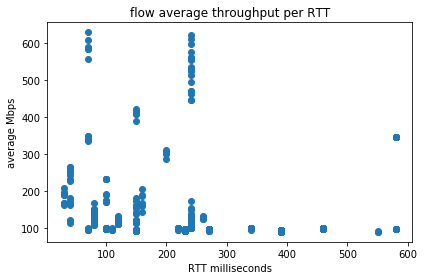

In [19]:
import matplotlib.pyplot as plt


x,y = get_av_rate_rtt()
fig, ax = plt.subplots()

ax.plot(x,y, 'o')
ax.set_xlabel('RTT milliseconds')
ax.set_ylabel('average Mbps')
ax.set_title(r'flow average throughput per RTT')

fig.tight_layout()

plt.show()


(457640, 1053.8433060646057, 0.4342581077911638)
denv_dtn2-amst_dtn2-10000:25:0


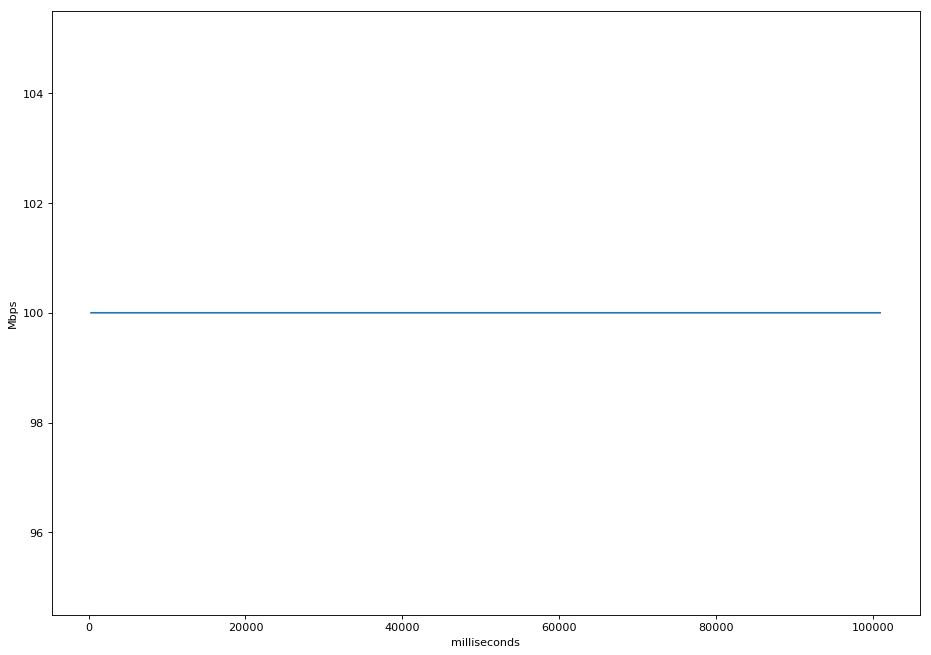

denv_dtn2-lbl_dtn2-10000:28:0


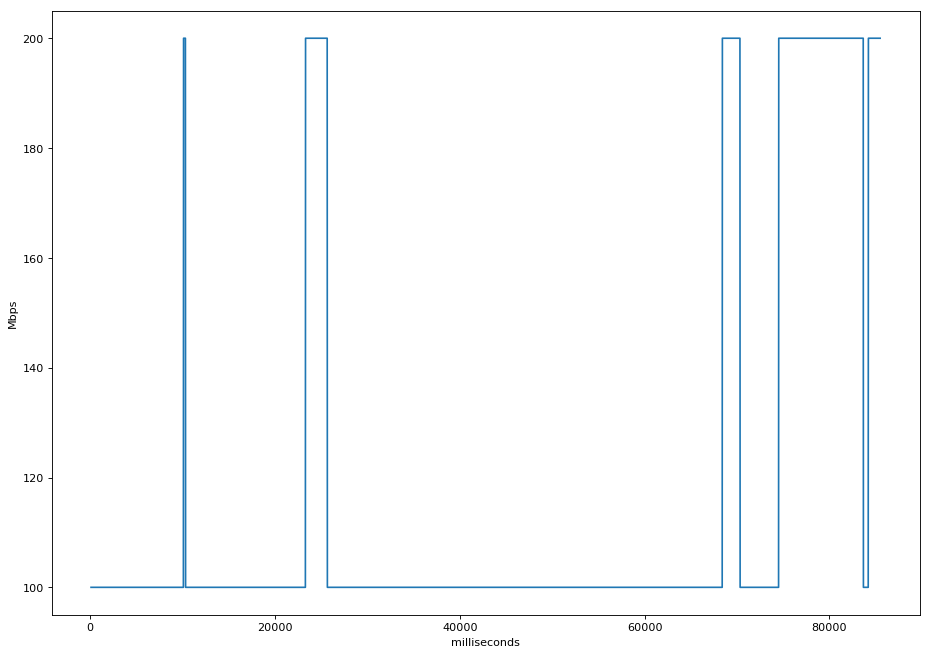

denv_dtn2-atla_dtn2-10000:20:0


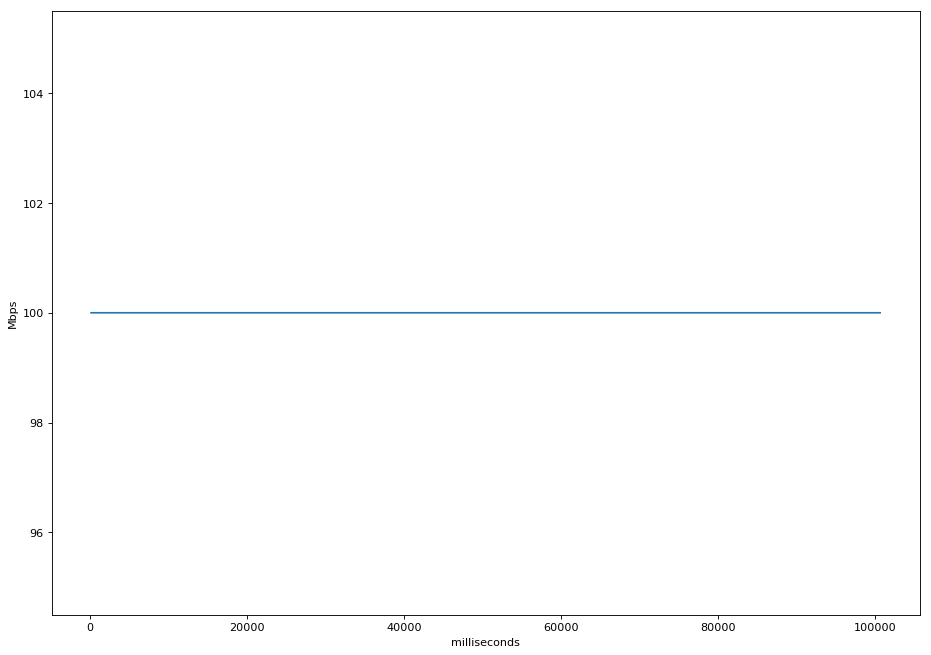

(457640, 1054.847857952118, 0.433844555449411)
amst_dtn2-wash_dtn2-10000:25:0


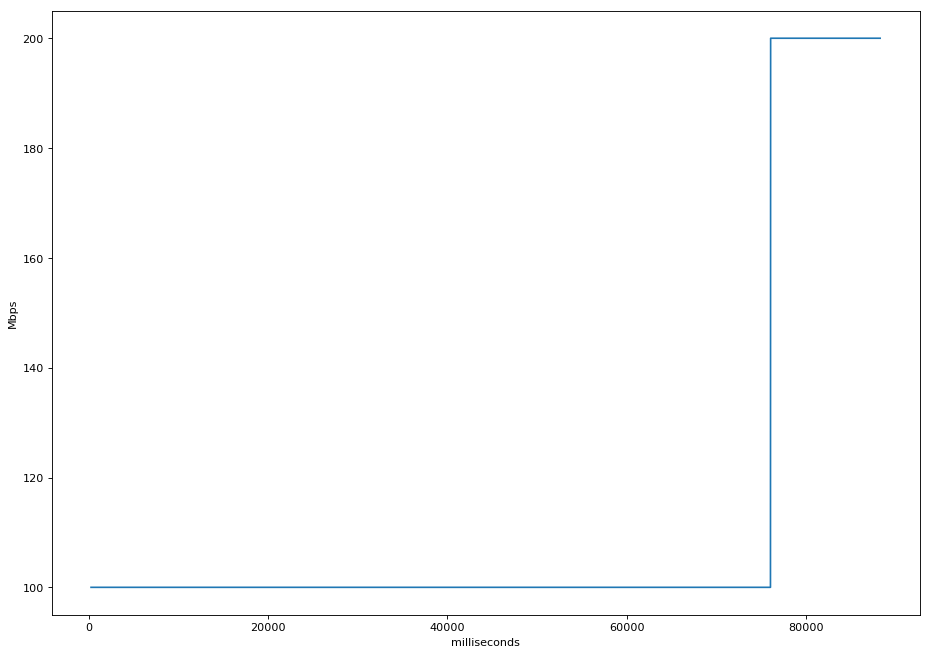

atla_dtn2-star_dtn2-10000:9:0


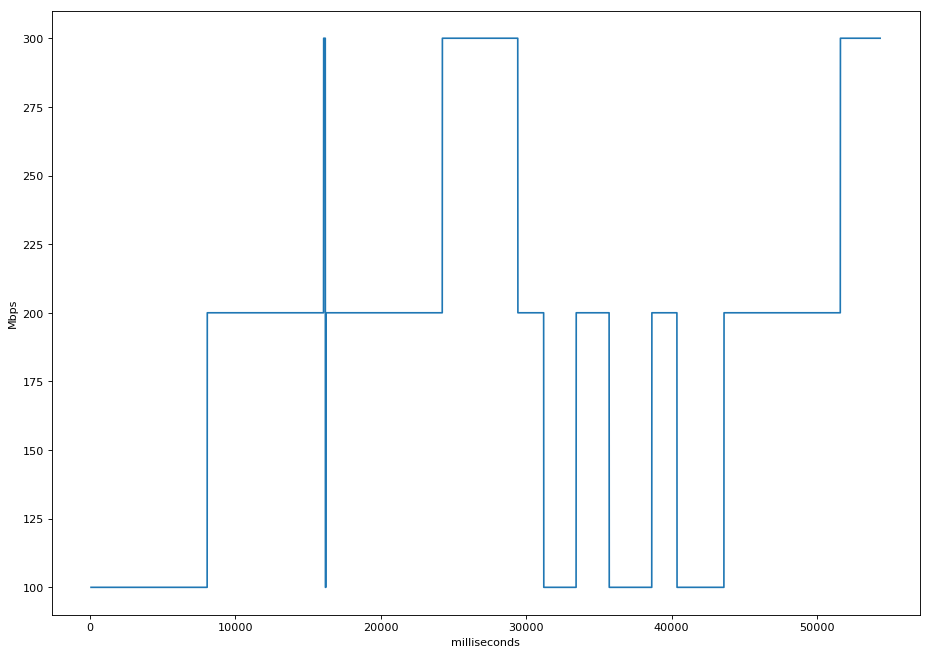

star_dtn2-aofa_dtn2-10000:33:0


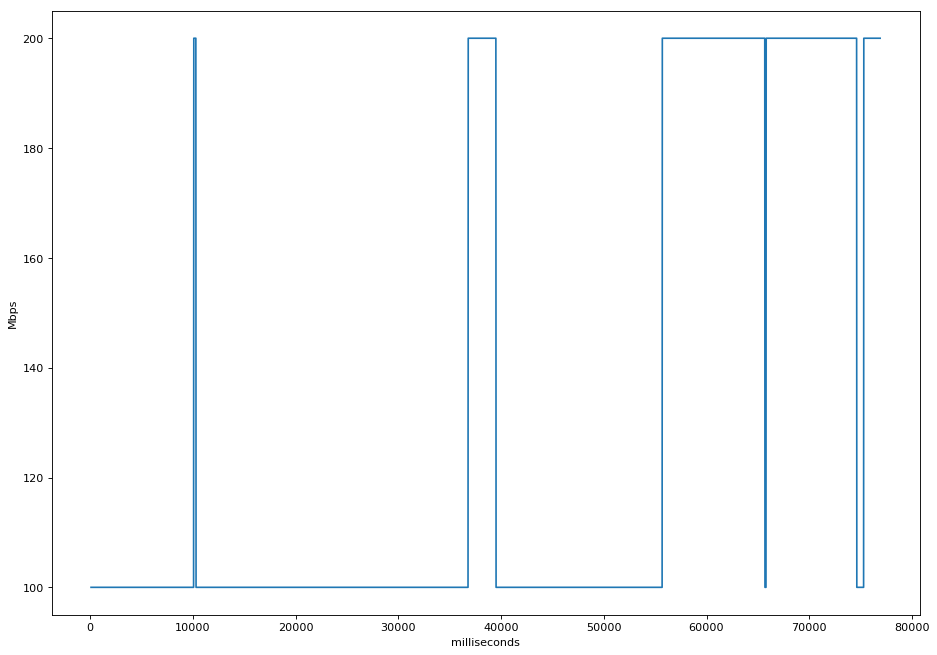

denv_dtn2-aofa_dtn2-10000:34:0
(457640, 1055.911416053772, 0.4334075690840858)


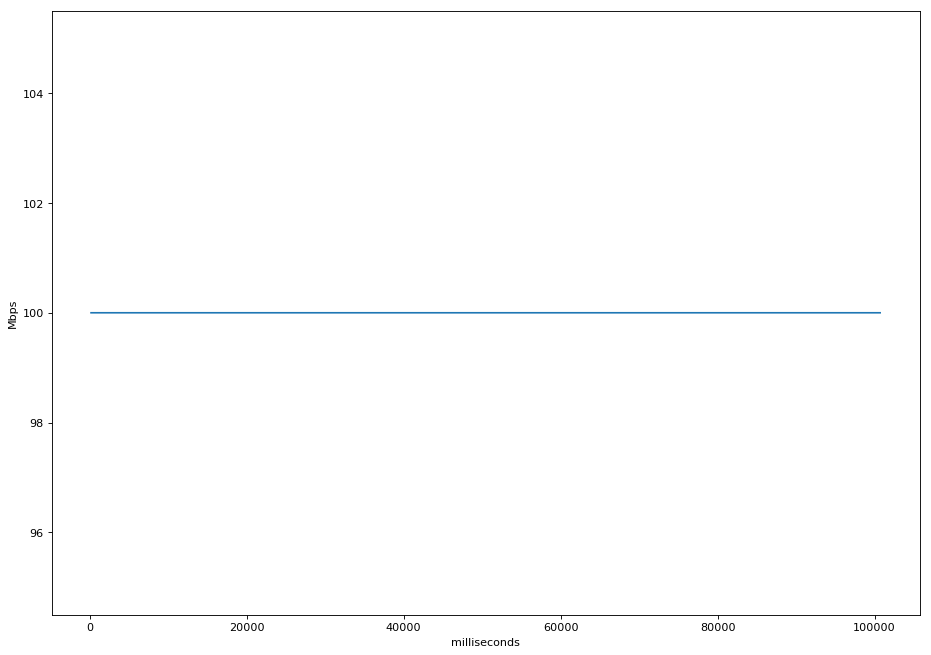

amst_dtn2-wash_dtn2-10000:18:0


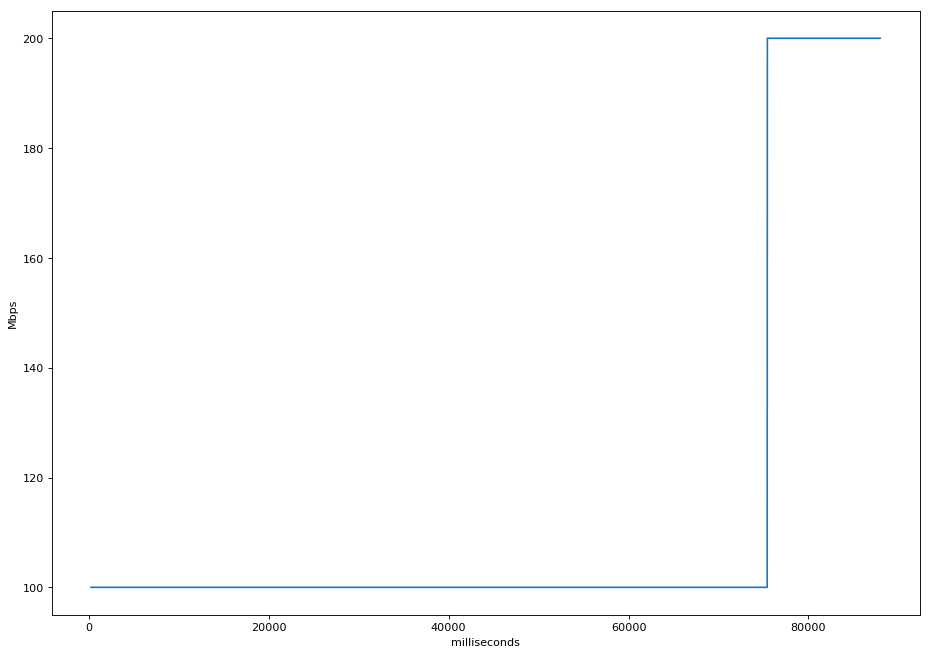

amst_dtn2-cern_dtn2-10000:3:0


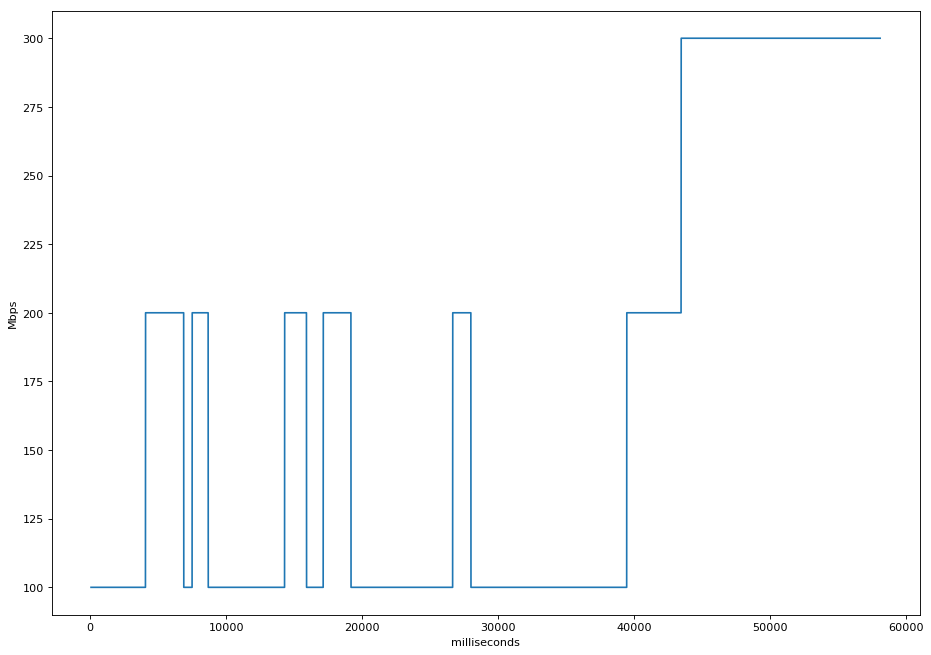

denv_dtn2-lbl_dtn2-10000:36:0


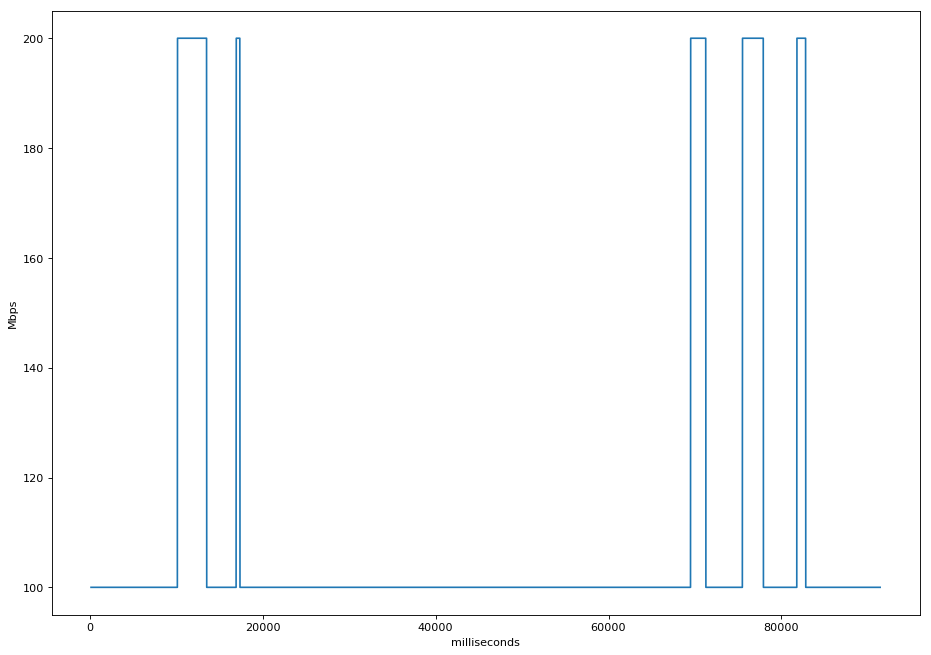

(457640, 1056.9150171279907, 0.4329960238842746)
aofa_dtn2-denv_dtn2-10000:11:0


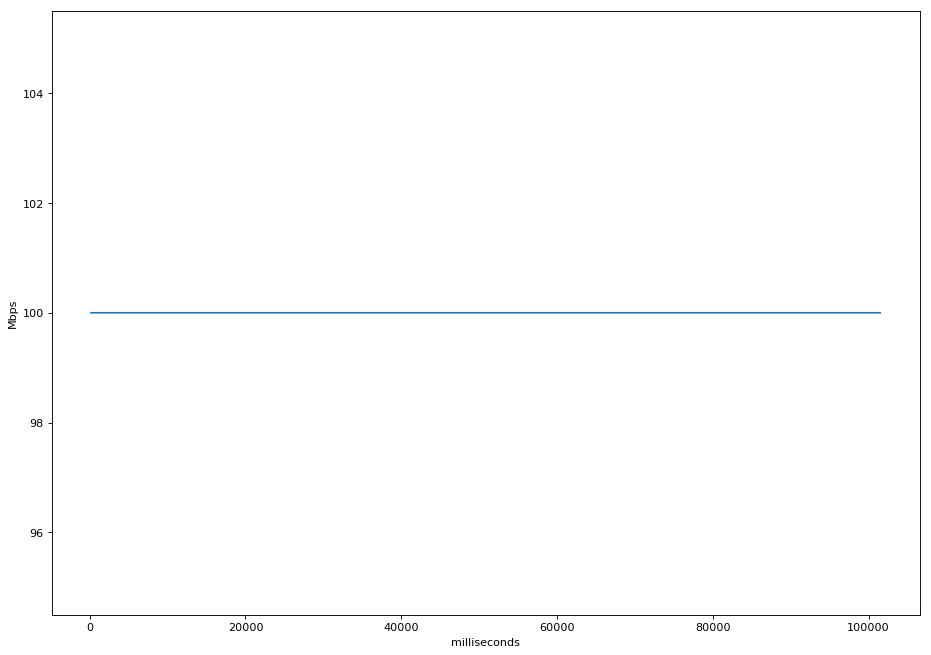

amst_dtn2-denv_dtn2-10000:13:0


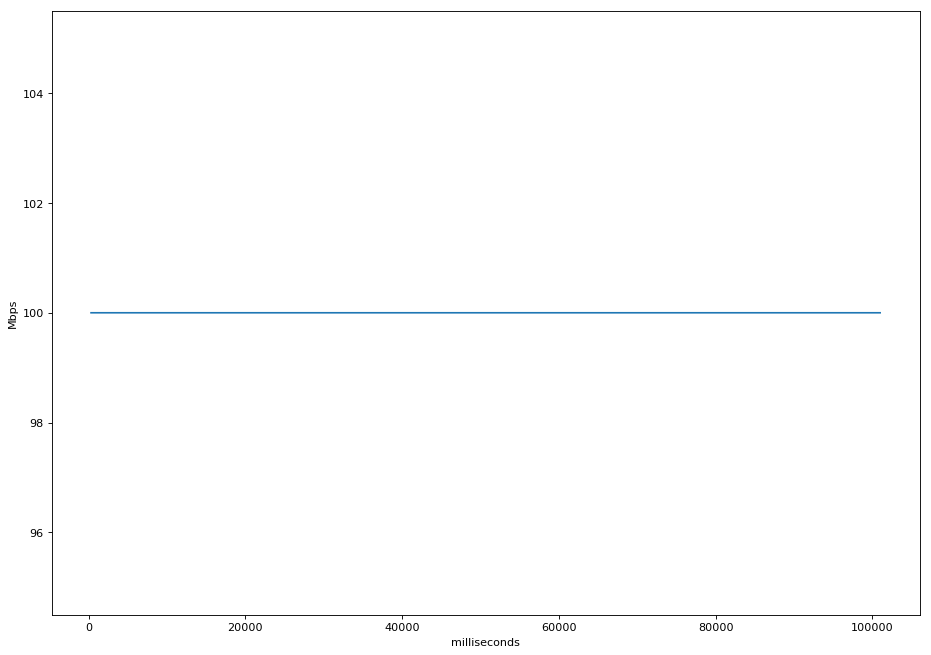

amst_dtn2-denv_dtn2-10000:29:0


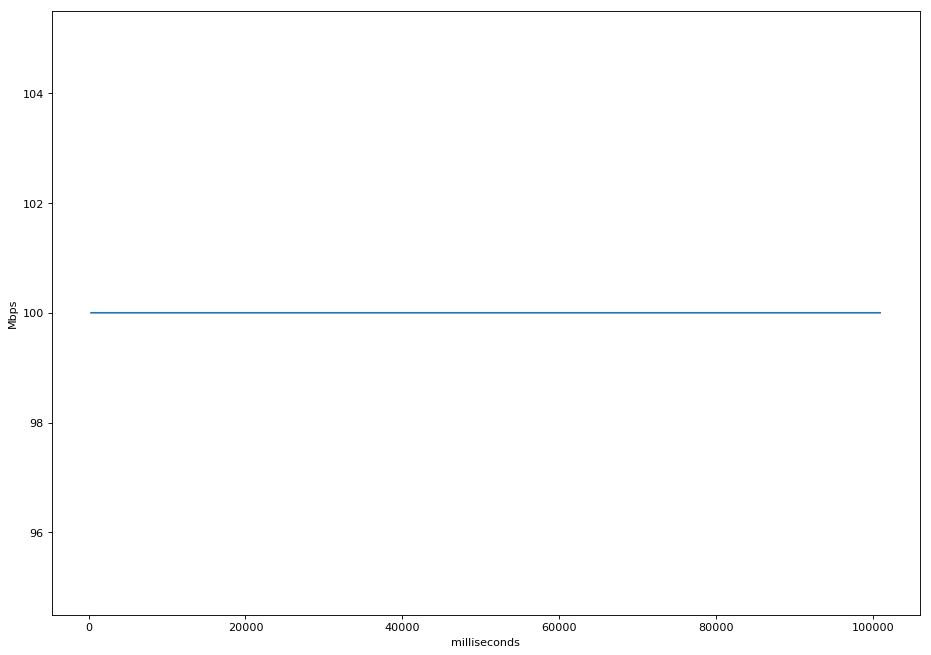

denv_dtn2-star_dtn2-10000:3:0
(457640, 1057.924842119217, 0.4325827145558501)


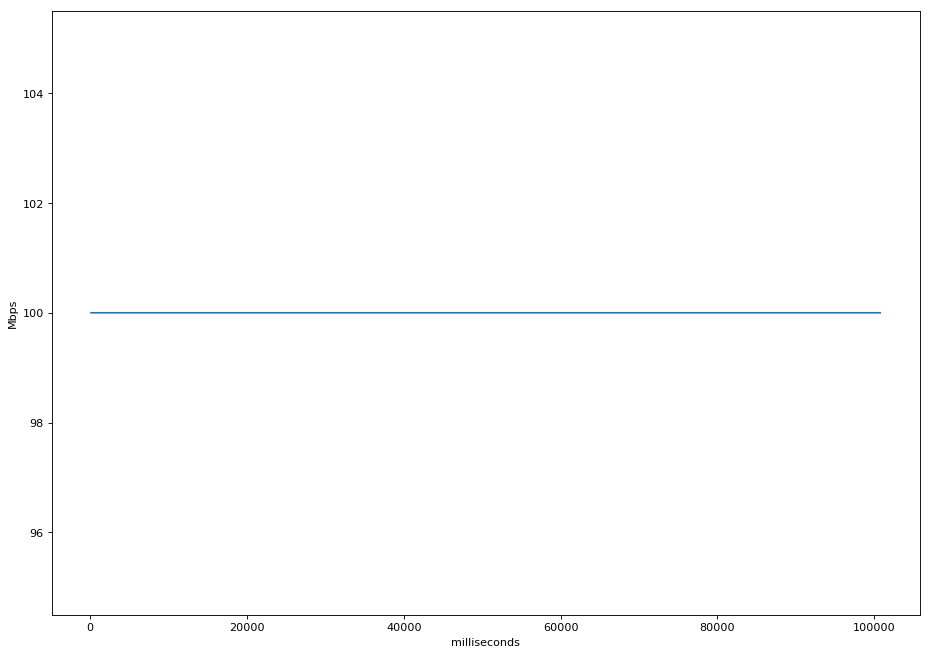

wash_dtn2-aofa_dtn2-10000:11:0


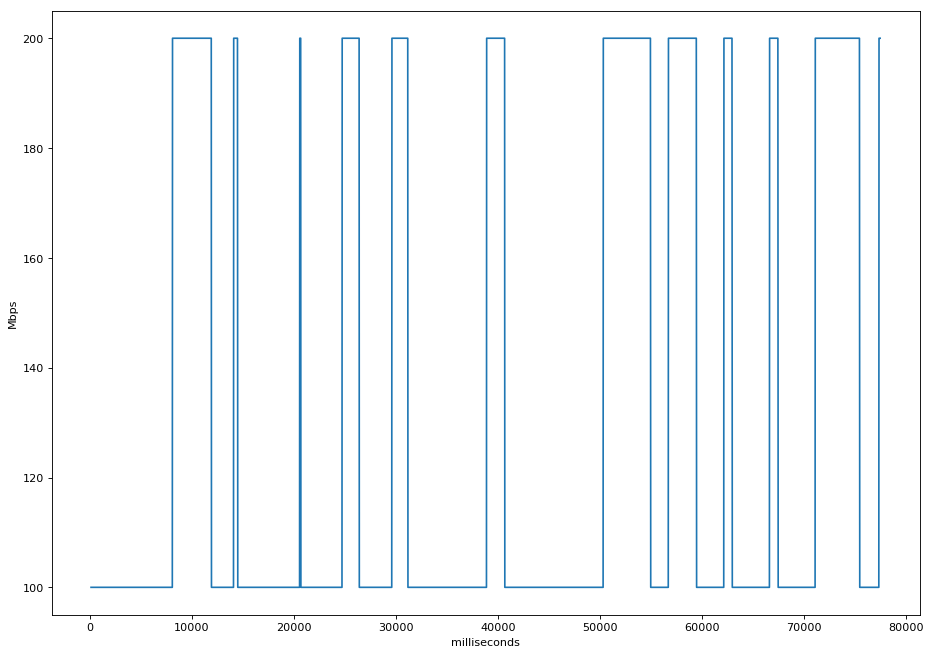

cern_dtn2-lbl_dtn2-10000:16:0


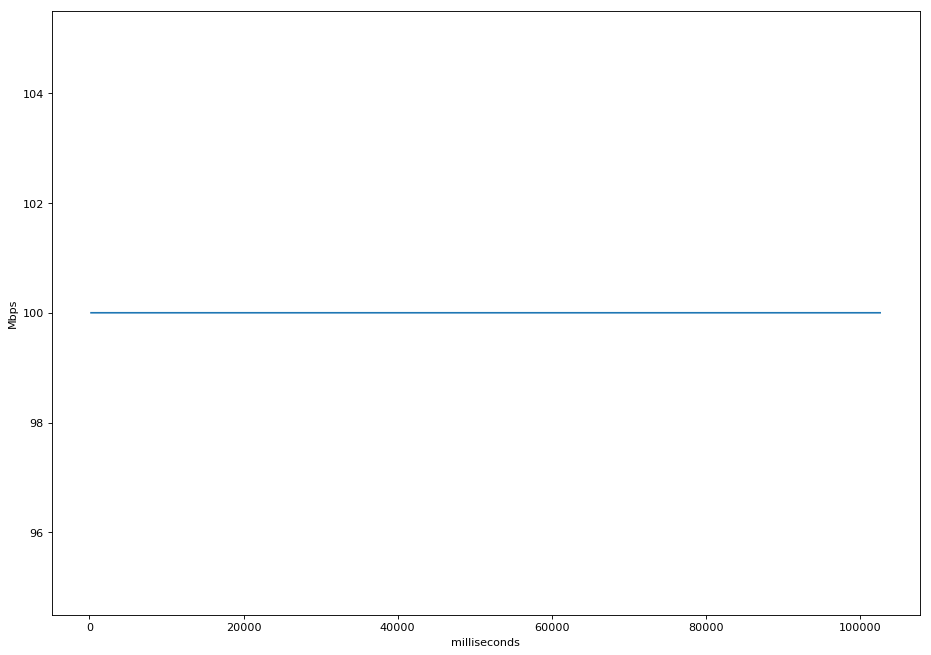

cern_dtn2-atla_dtn2-10000:9:0


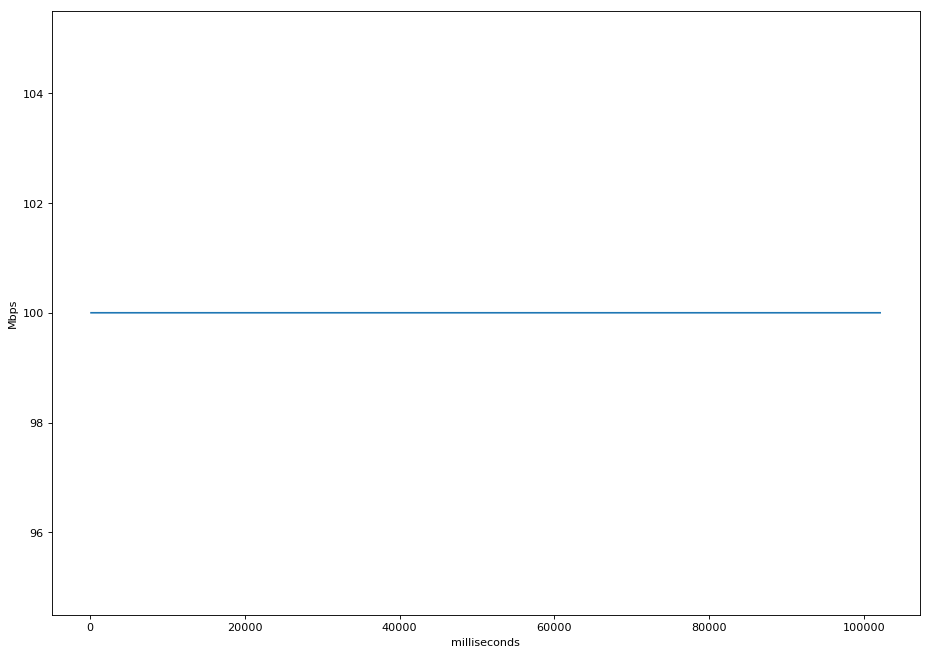

(457640, 1058.959753036499, 0.4321599557374553)
amst_dtn2-cern_dtn2-10000:16:0


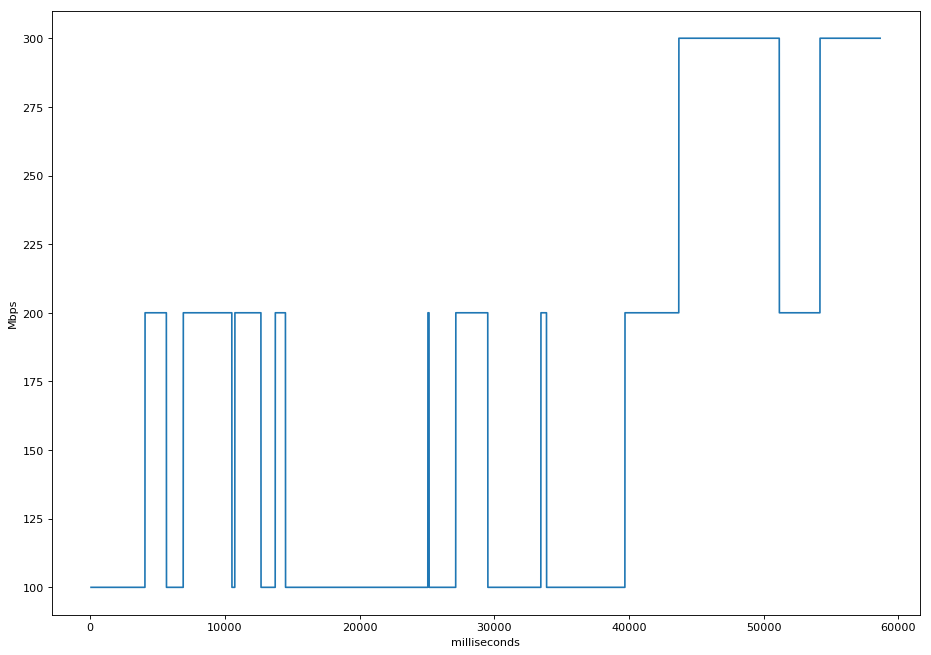

denv_dtn2-cern_dtn2-10000:30:0


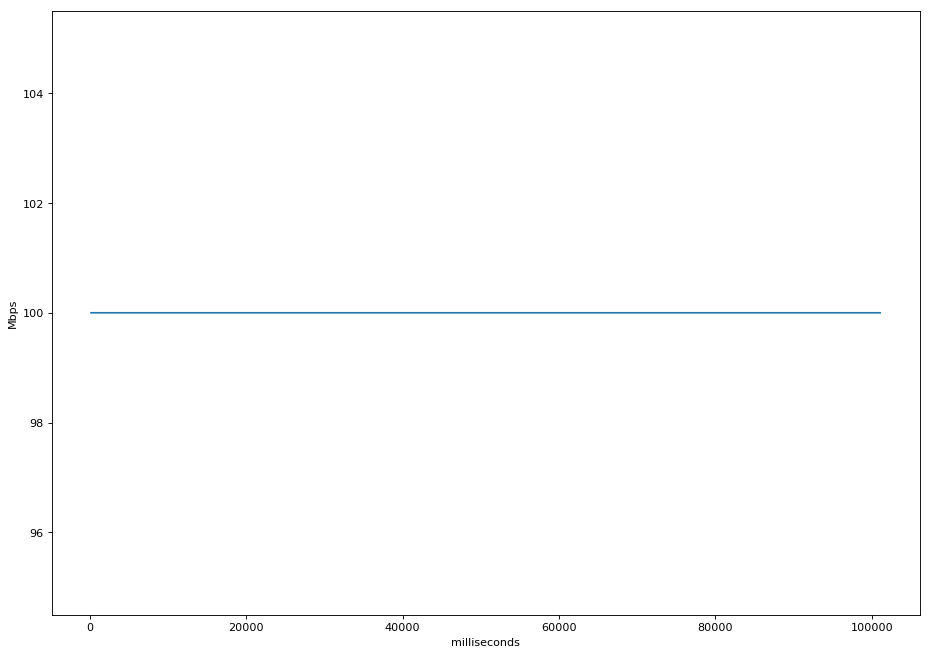

star_dtn2-cern_dtn2-10000:7:0


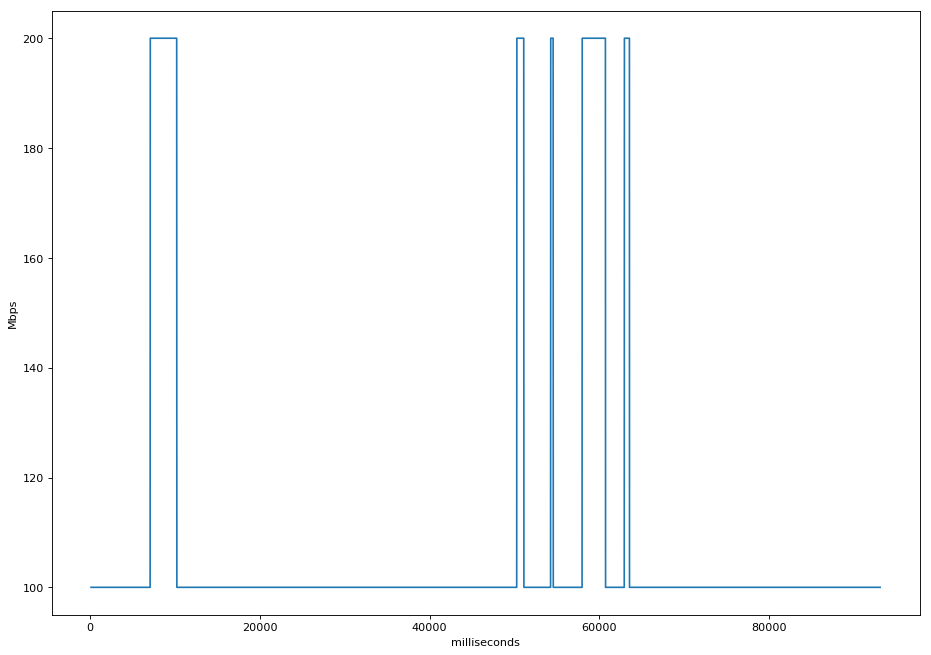

lbl_dtn2-denv_dtn2-10000:20:0
(457640, 1060.0439710617065, 0.43171794047528256)


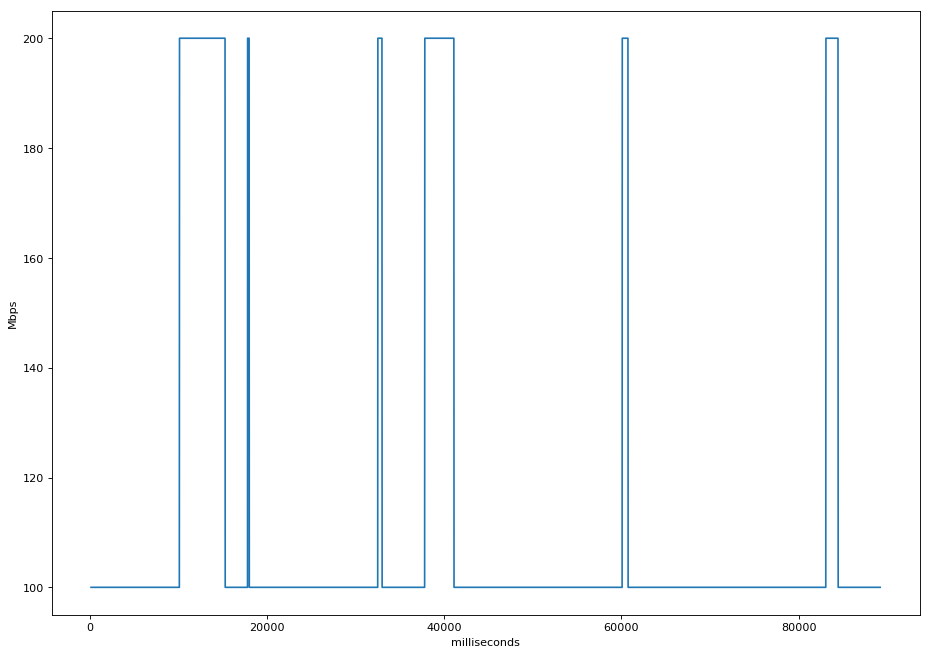

wash_dtn2-star_dtn2-10000:19:0(457640, 1061.3852739334106, 0.43117236618897303)



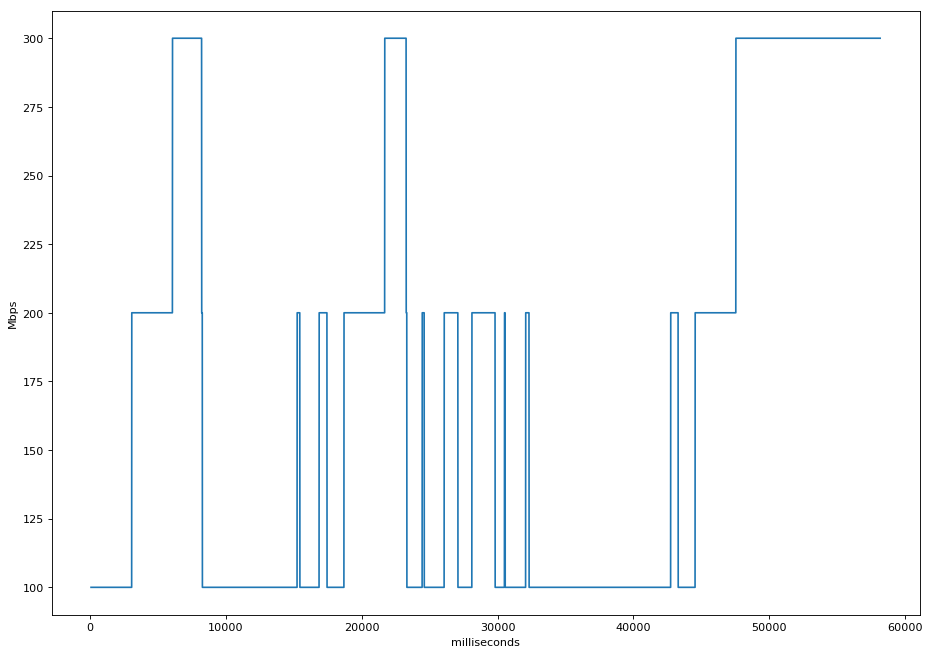

wash_dtn2-aofa_dtn2-10000:13:0


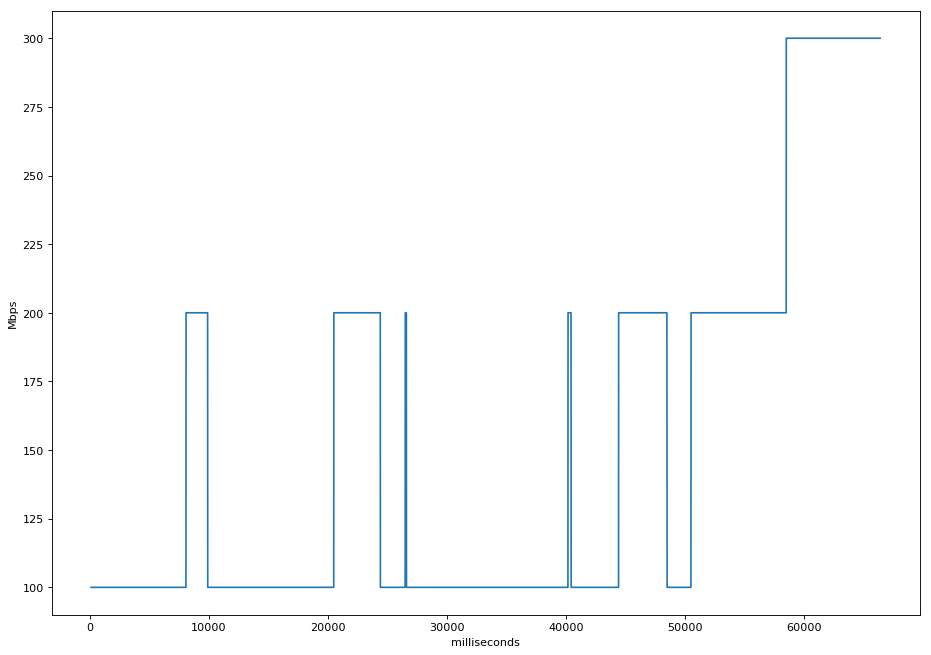

wash_dtn2-lbl_dtn2-10000:6:0


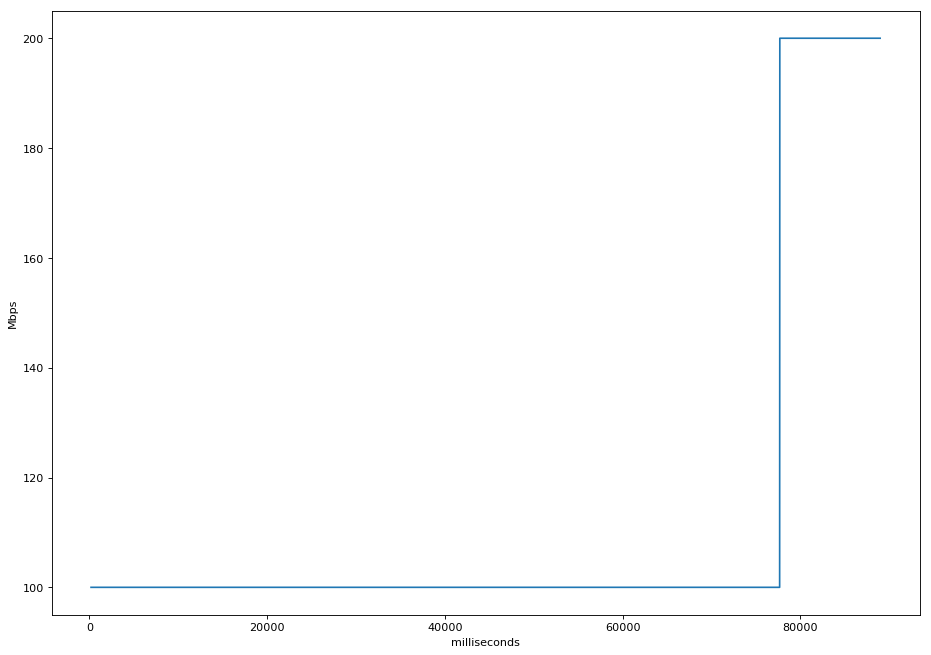

denv_dtn2-star_dtn2-10000:37:0
(457640, 1062.4195940494537, 0.430752597714889)


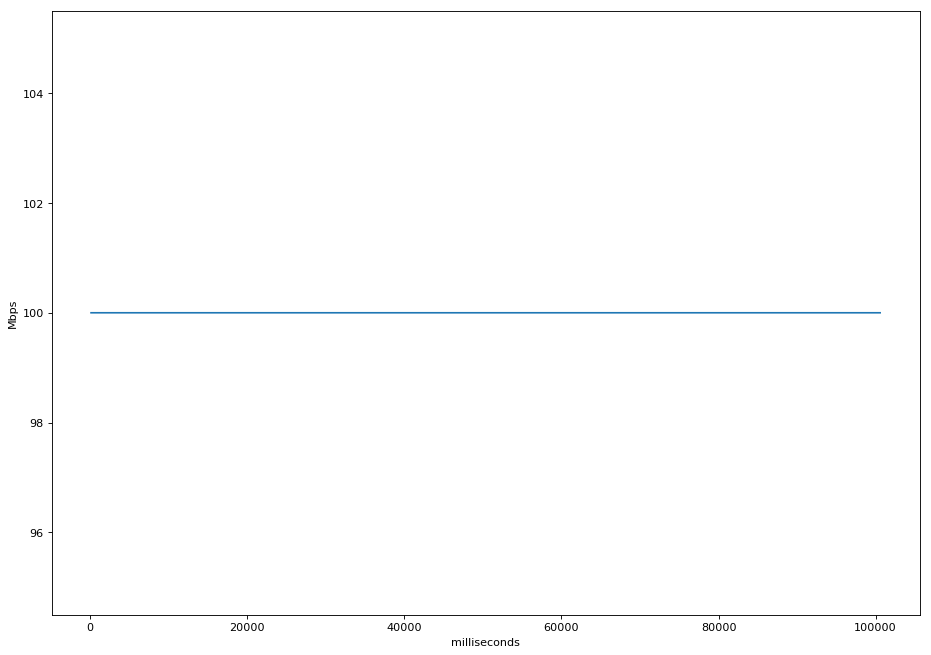

amst_dtn2-cern_dtn2-10000:30:0


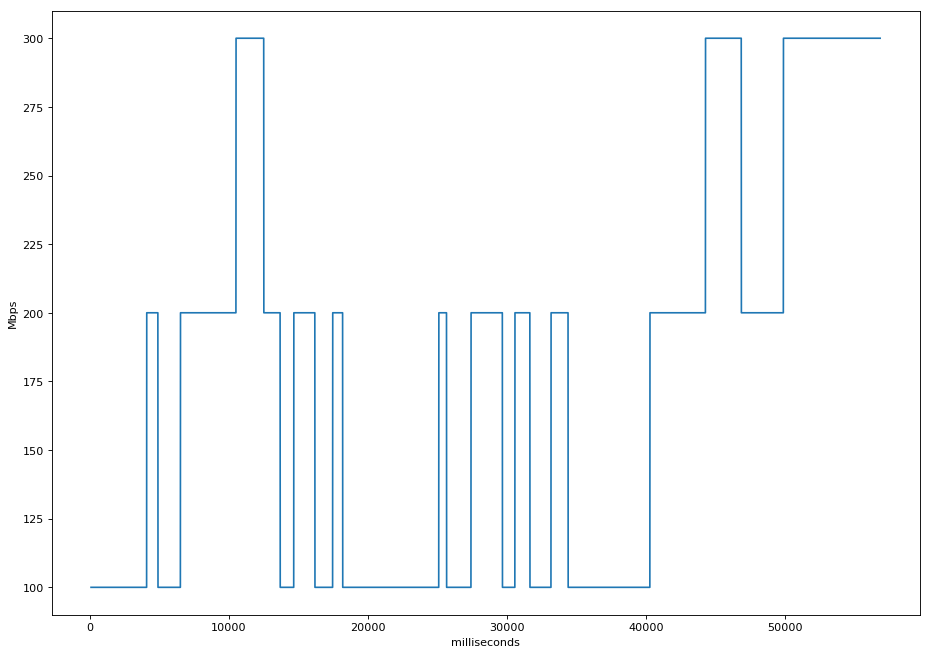

cern_dtn2-aofa_dtn2-10000:31:0


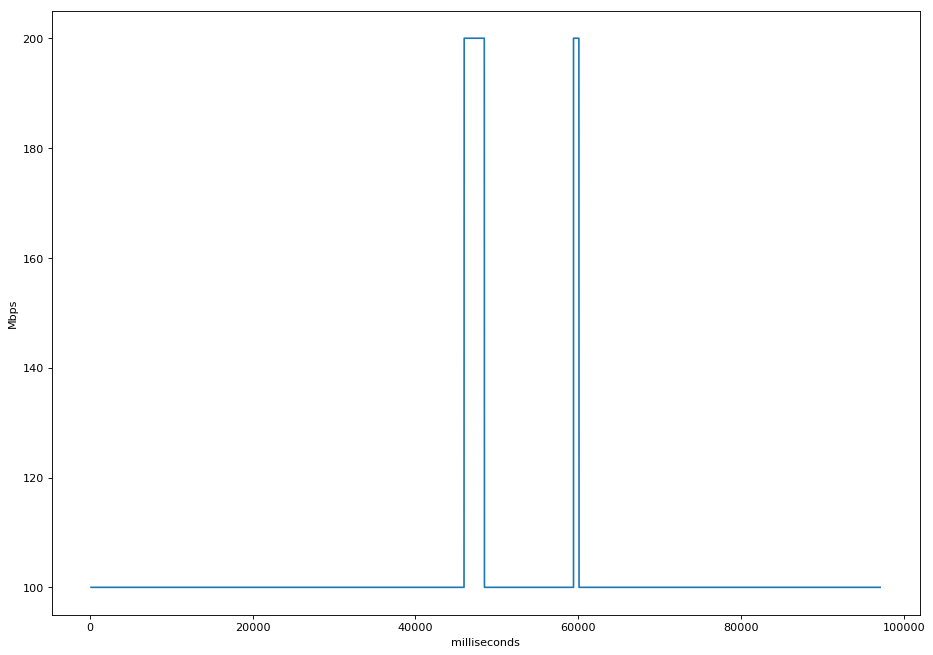

aofa_dtn2-star_dtn2-10000:27:0


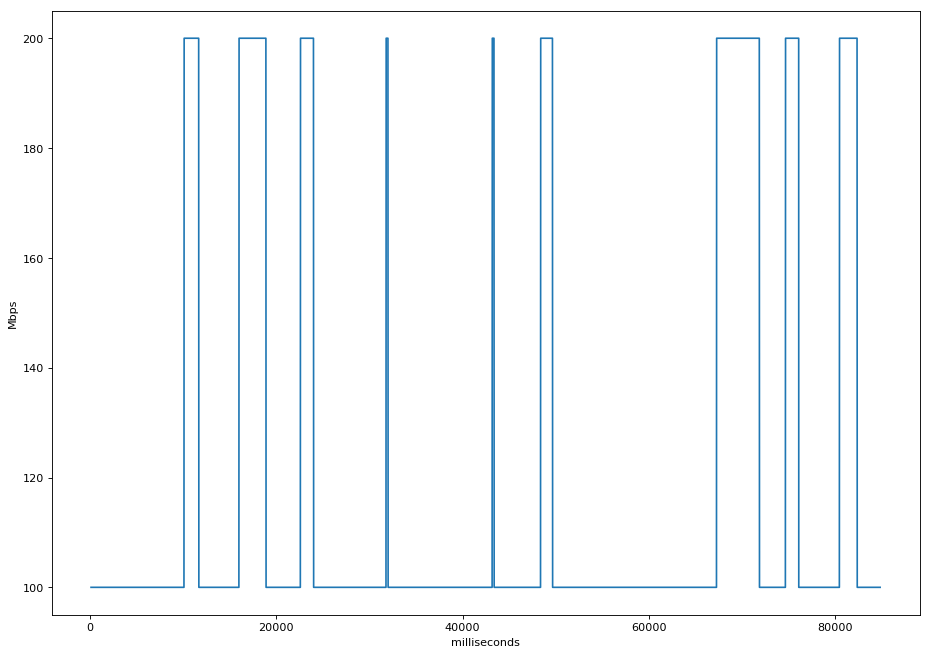

(457640, 1063.4232709407806, 0.4303460461187188)
wash_dtn2-star_dtn2-10000:3:0


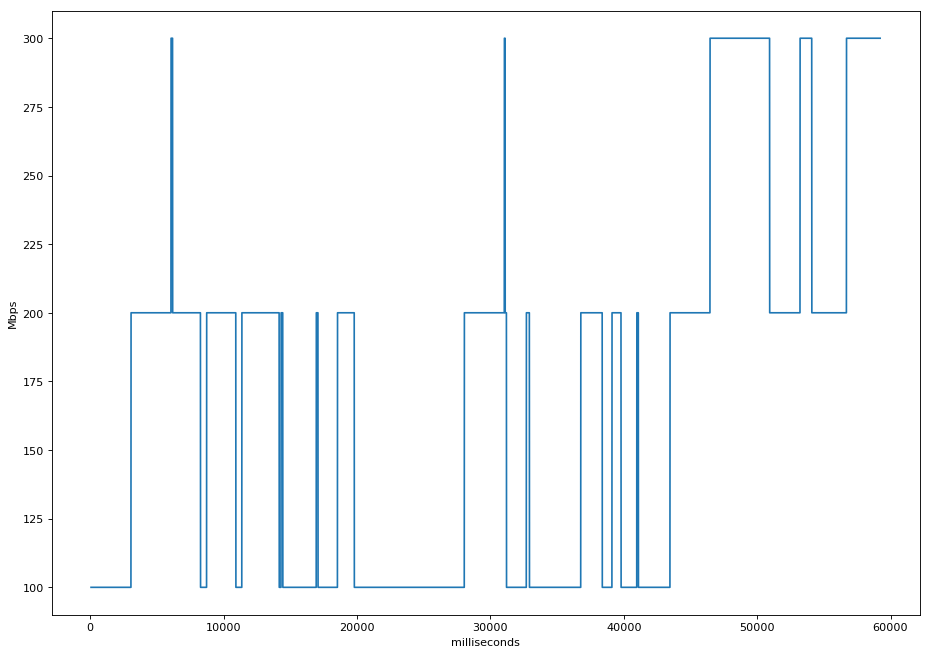

aofa_dtn2-atla_dtn2-10000:12:0


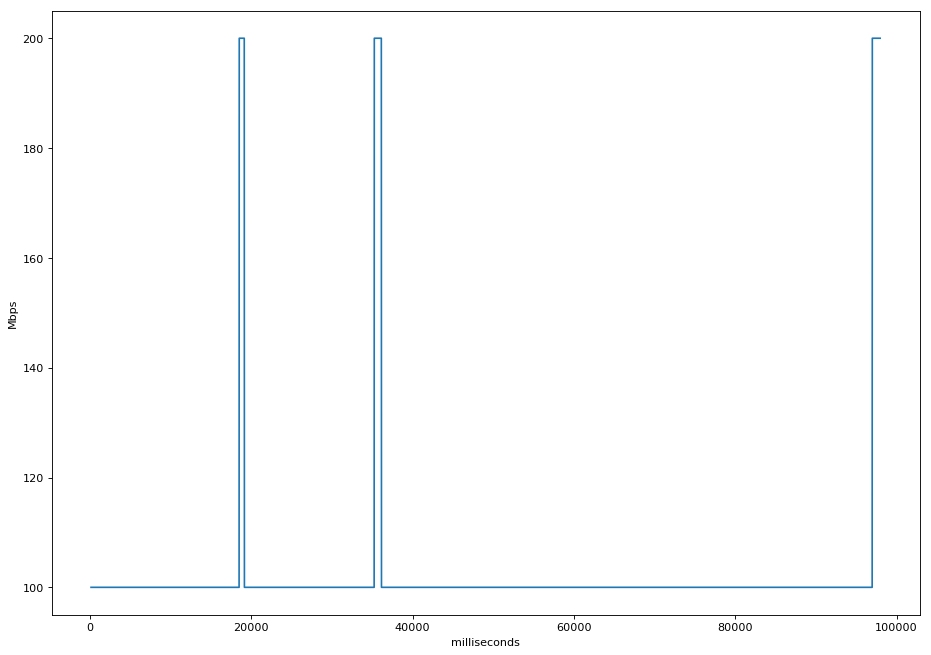

denv_dtn2-atla_dtn2-10000:4:0


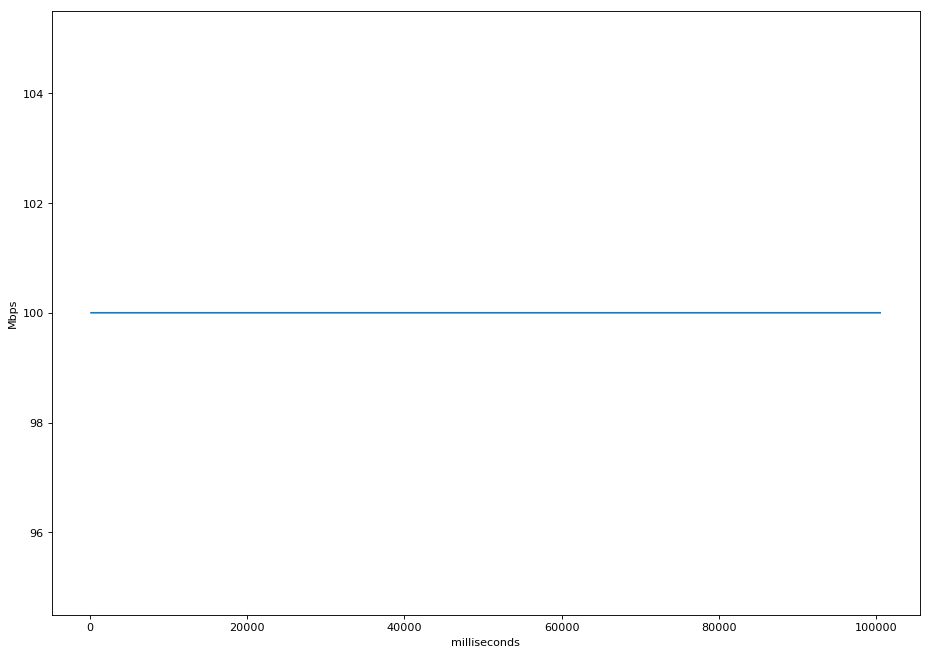

aofa_dtn2-lbl_dtn2-10000:13:0
(457640, 1064.4412319660187, 0.4299344916907632)


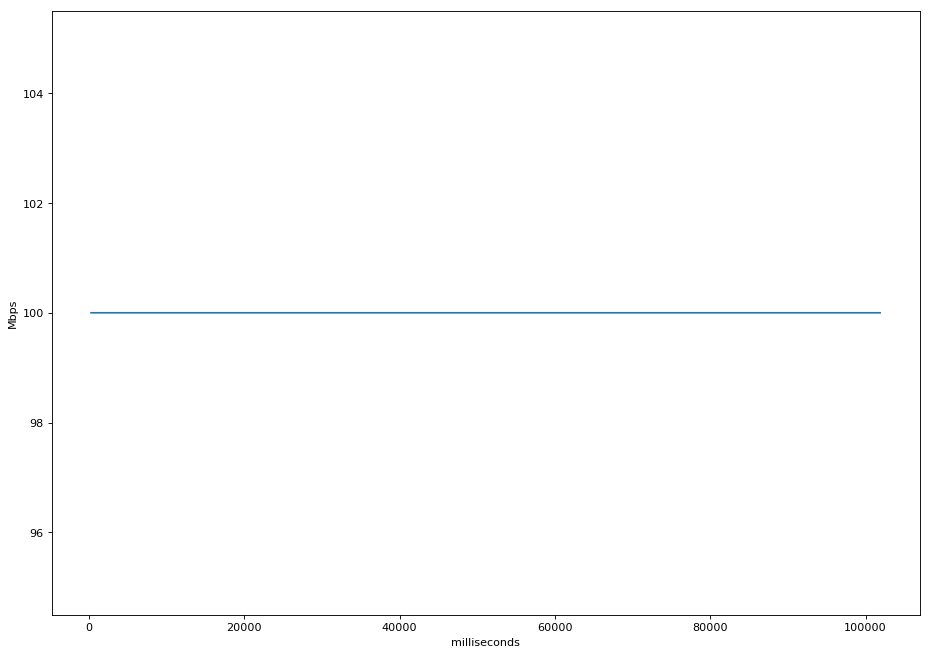

cern_dtn2-wash_dtn2-10000:29:0


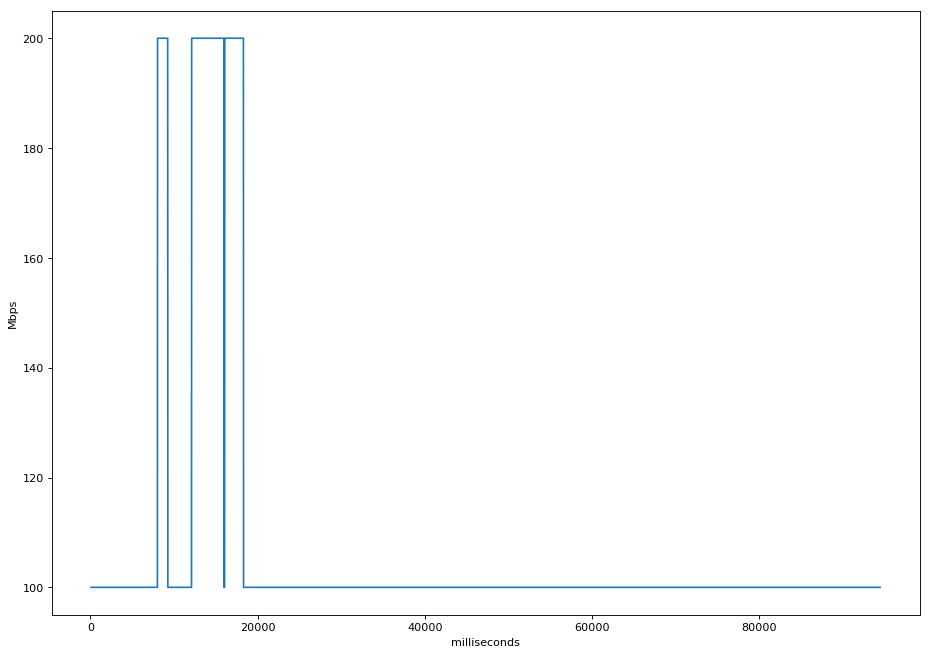

denv_dtn2-atla_dtn2-10000:38:0


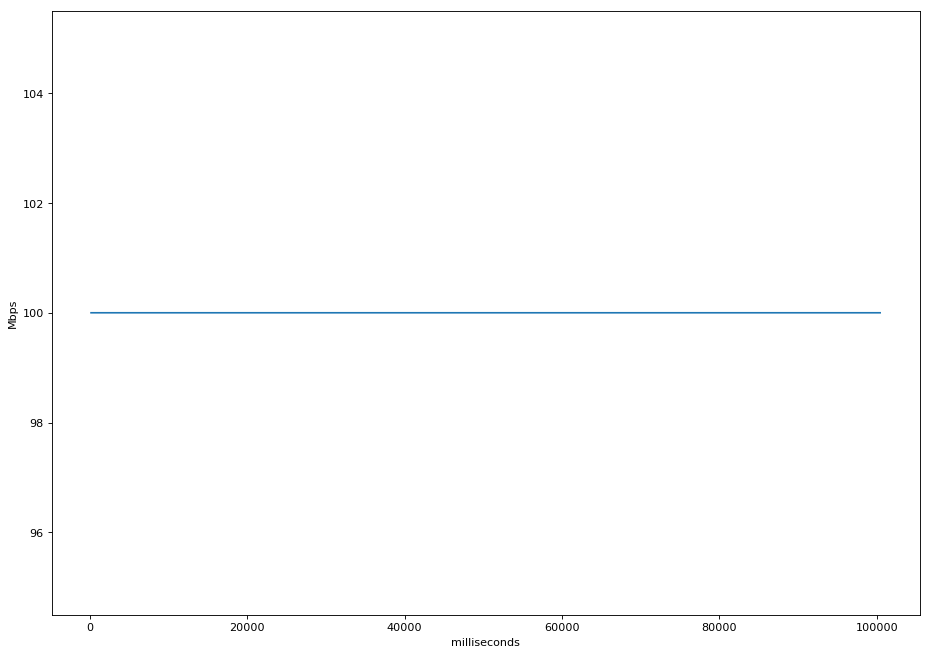

wash_dtn2-lbl_dtn2-10000:17:0


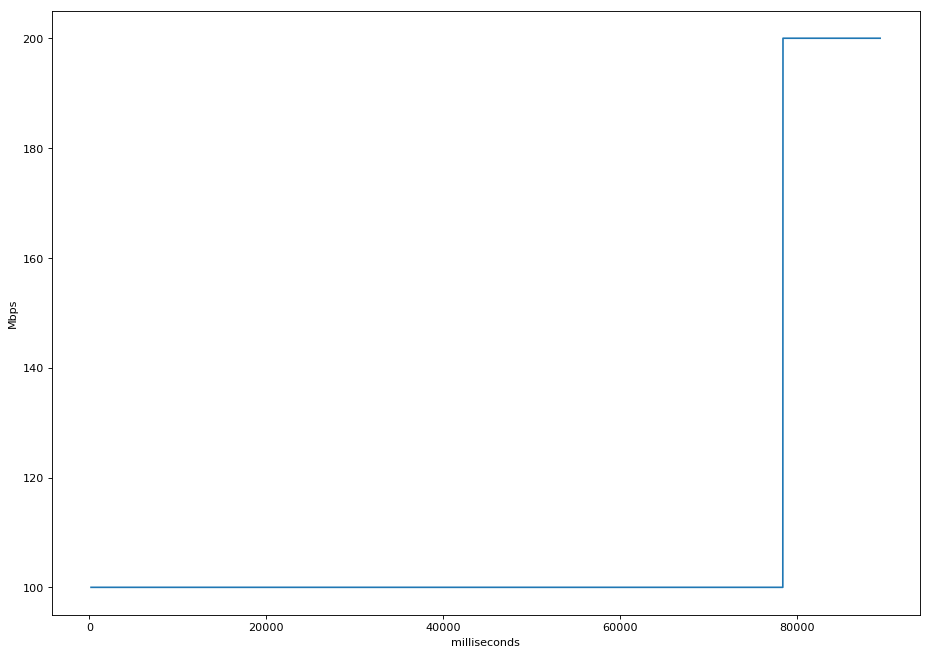

(457640, 1065.4473221302032, 0.4295285092884902)
 star_dtn2-denv_dtn2-10000:26:0


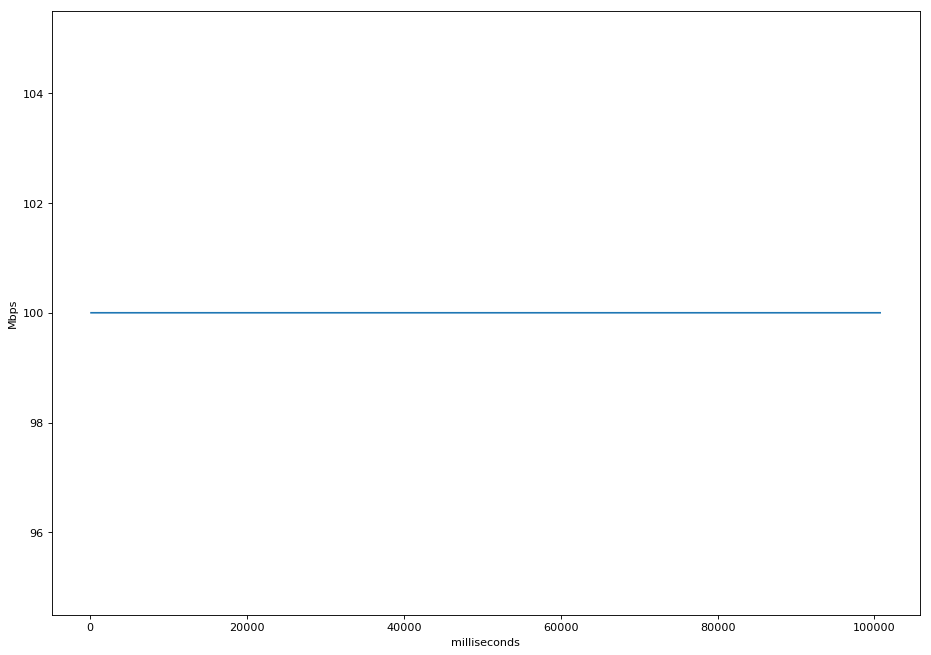

aofa_dtn2-cern_dtn2-10000:32:0


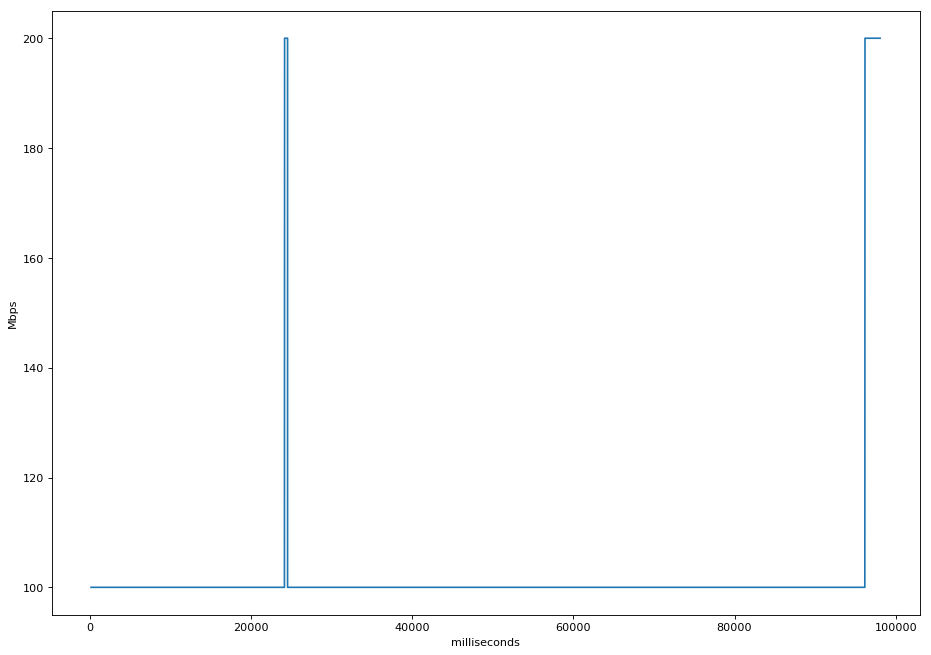

lbl_dtn2-atla_dtn2-10000:15:0


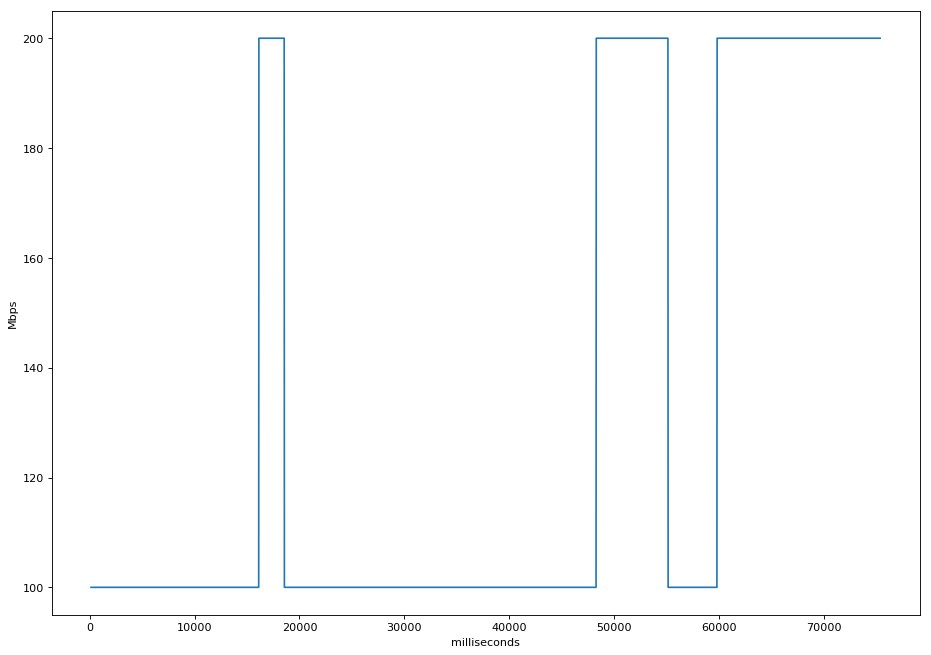

aofa_dtn2-amst_dtn2-10000:15:0
(457640, 1066.4864029884338, 0.4291100183908891)


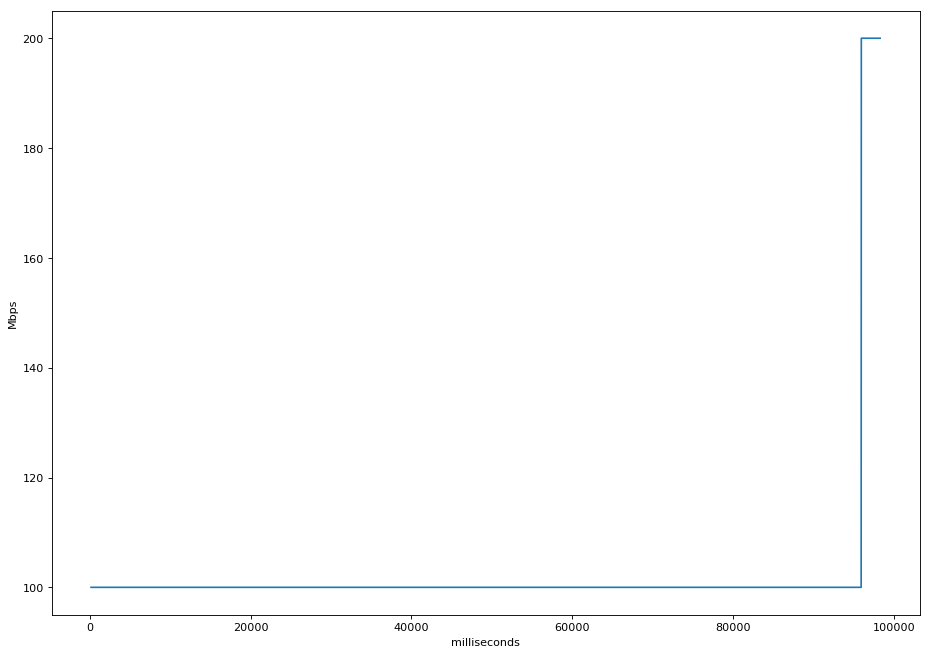

amst_dtn2-lbl_dtn2-10000:32:0


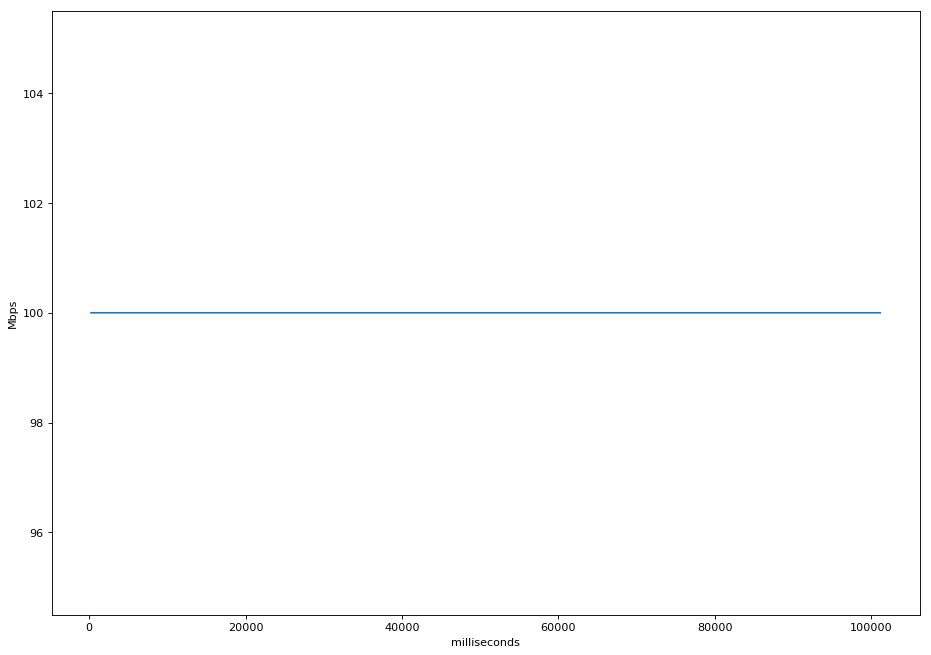

lbl_dtn2-star_dtn2-10000:17:0


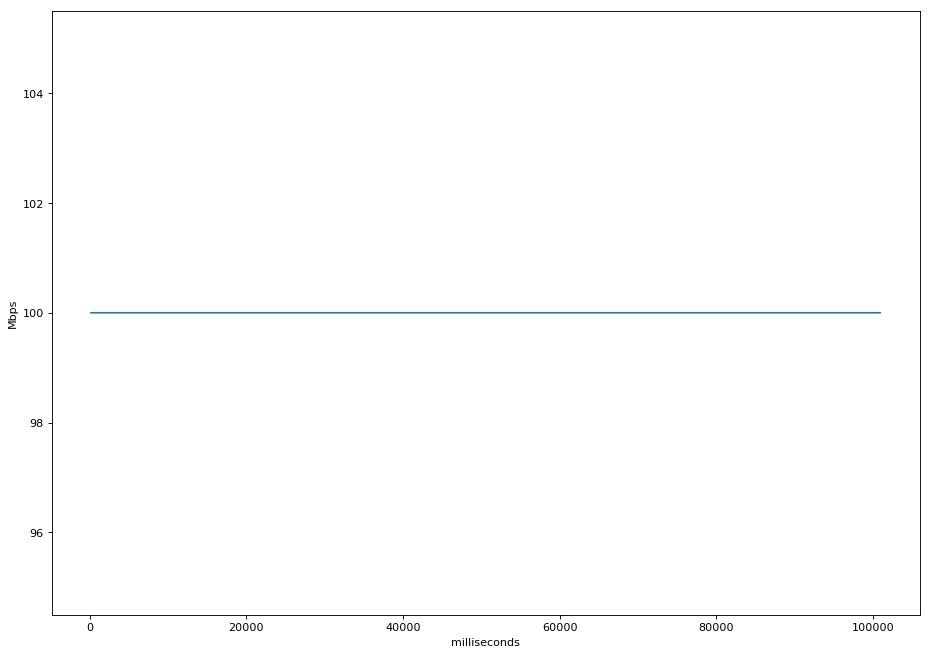

star_dtn2-lbl_dtn2-10000:20:0


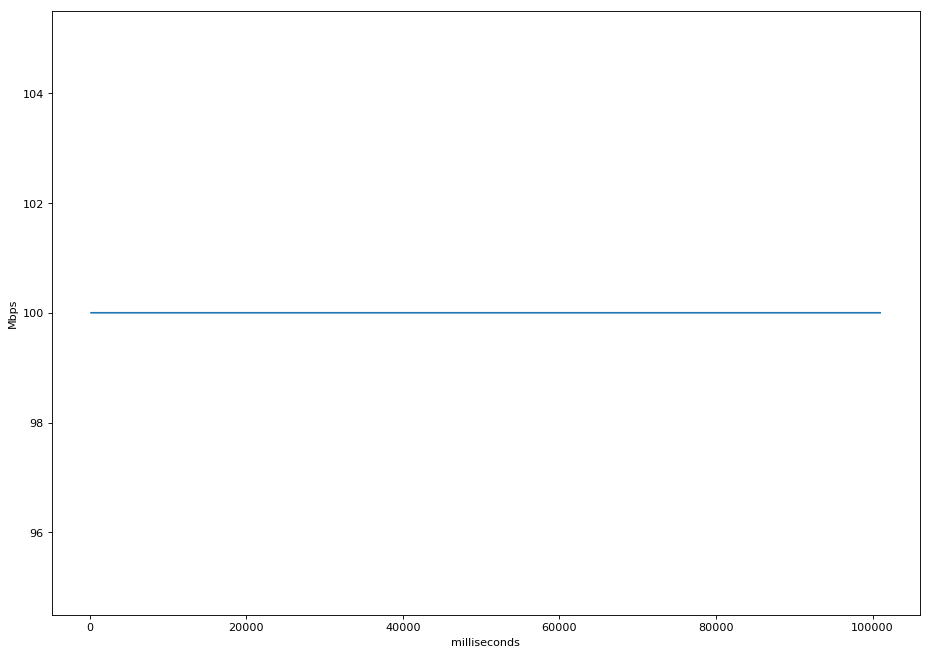

atla_dtn2-lbl_dtn2-10000:5:0
(457640, 1067.494085073471, 0.42870495153001487)


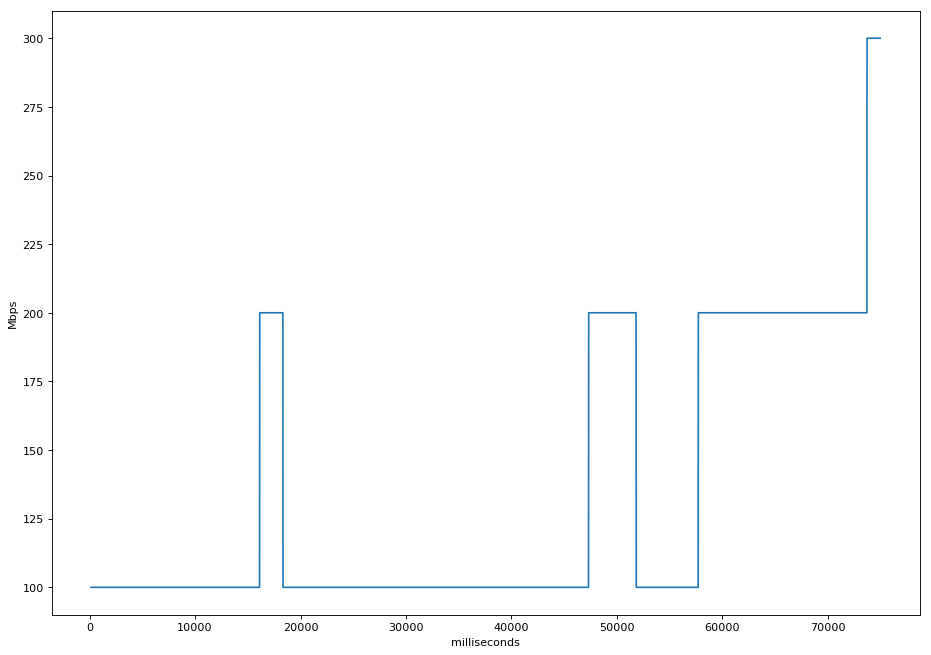

lbl_dtn2-cern_dtn2-10000:23:0


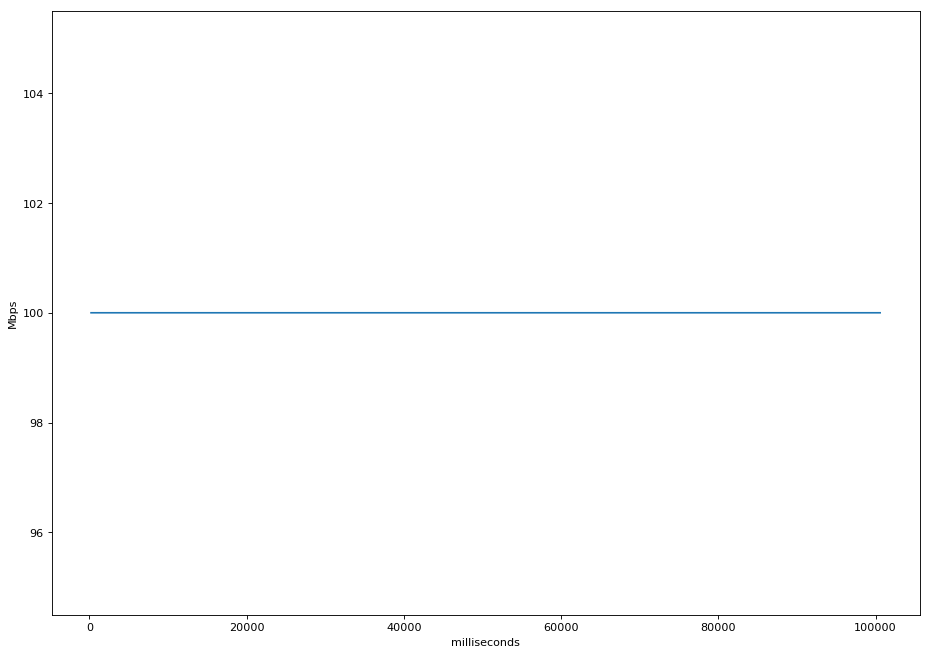

wash_dtn2-star_dtn2-10000:4:0


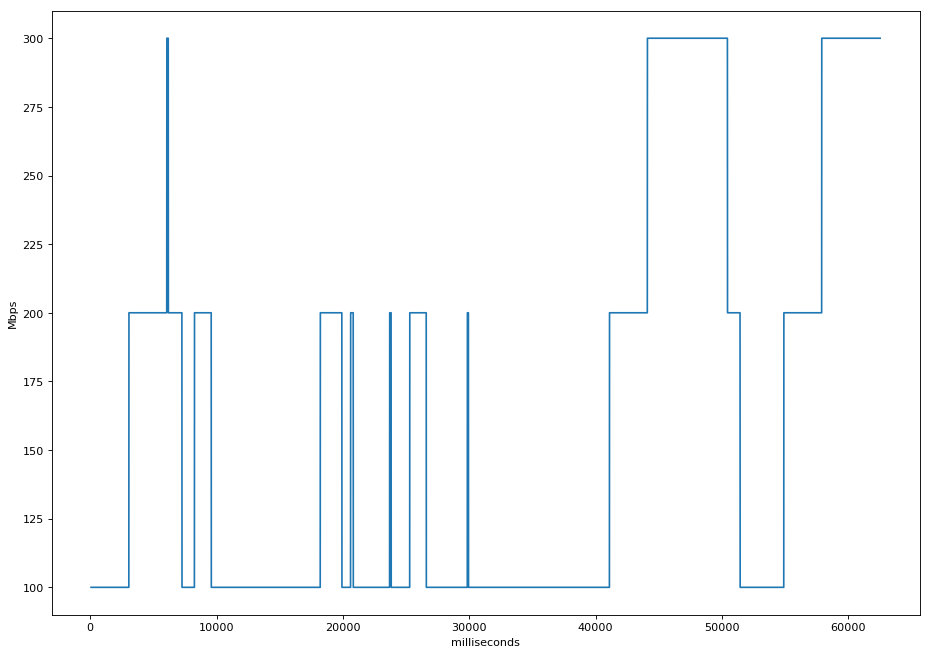

denv_dtn2-star_dtn2-10000:17:0
(457640, 1068.5422699451447, 0.4282844140770338)


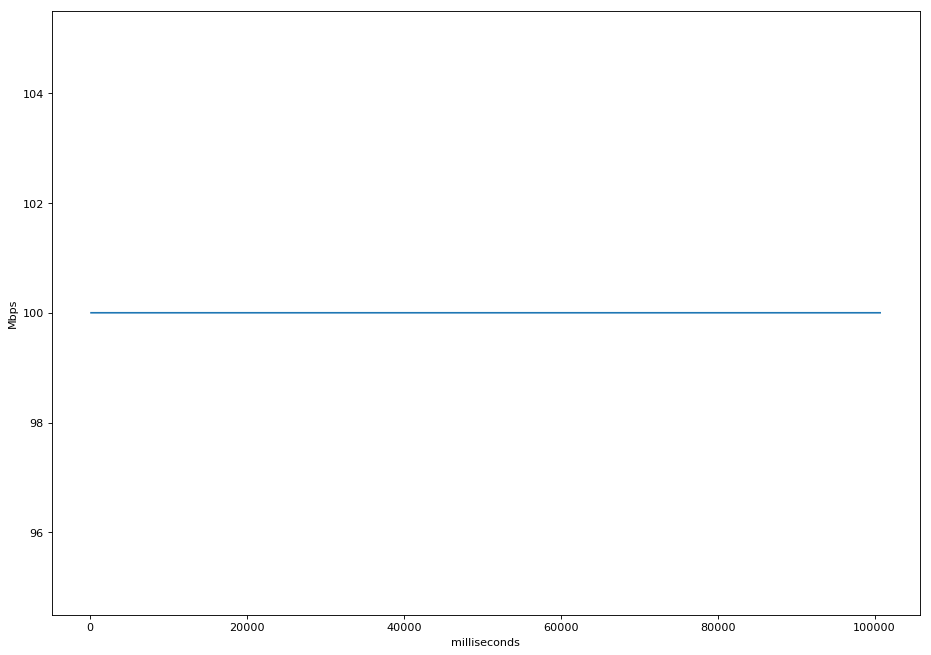

wash_dtn2-star_dtn2-10000:33:0


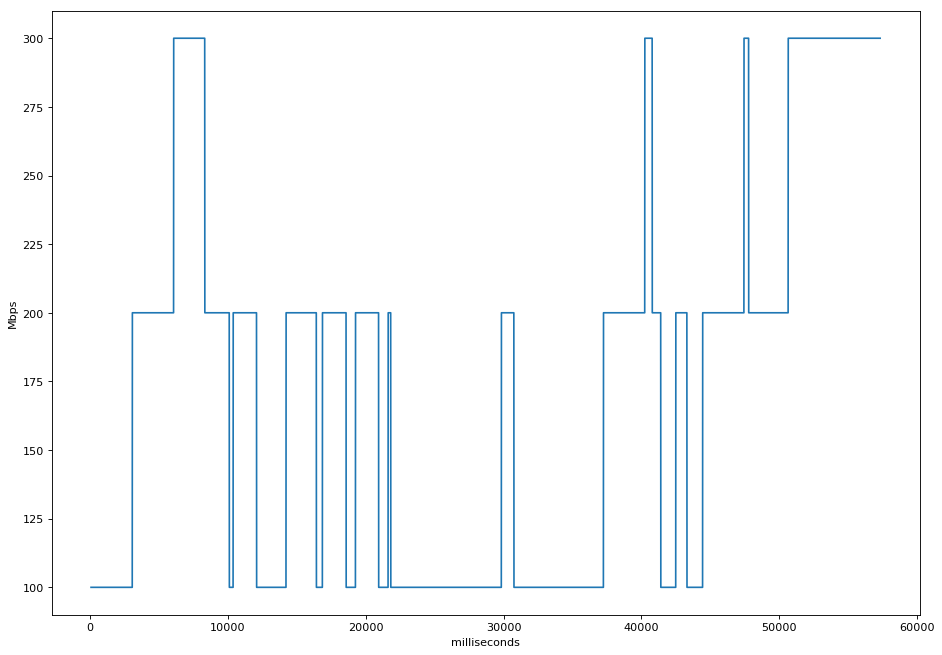

lbl_dtn2-denv_dtn2-10000:10:0


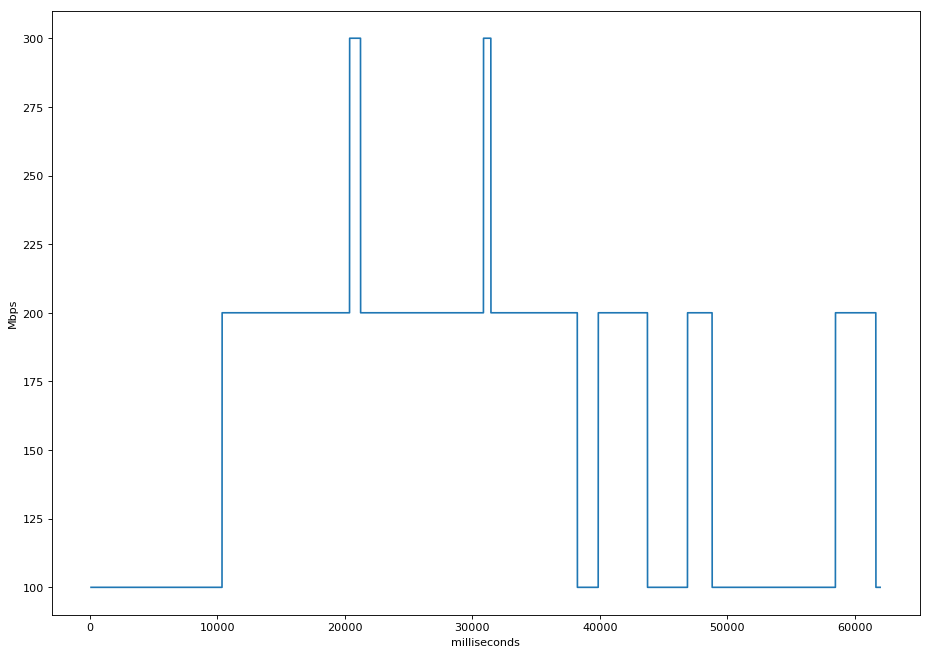

atla_dtn2-denv_dtn2-10000:6:0


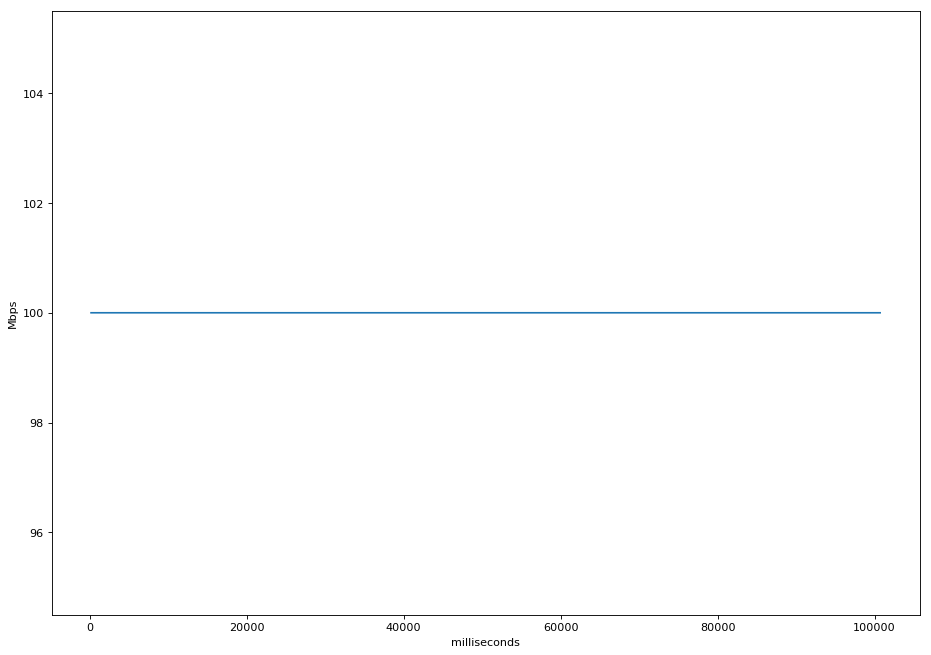

cern_dtn2-lbl_dtn2-10000:36:0
(457640, 1069.54465508461, 0.42788302276523166)


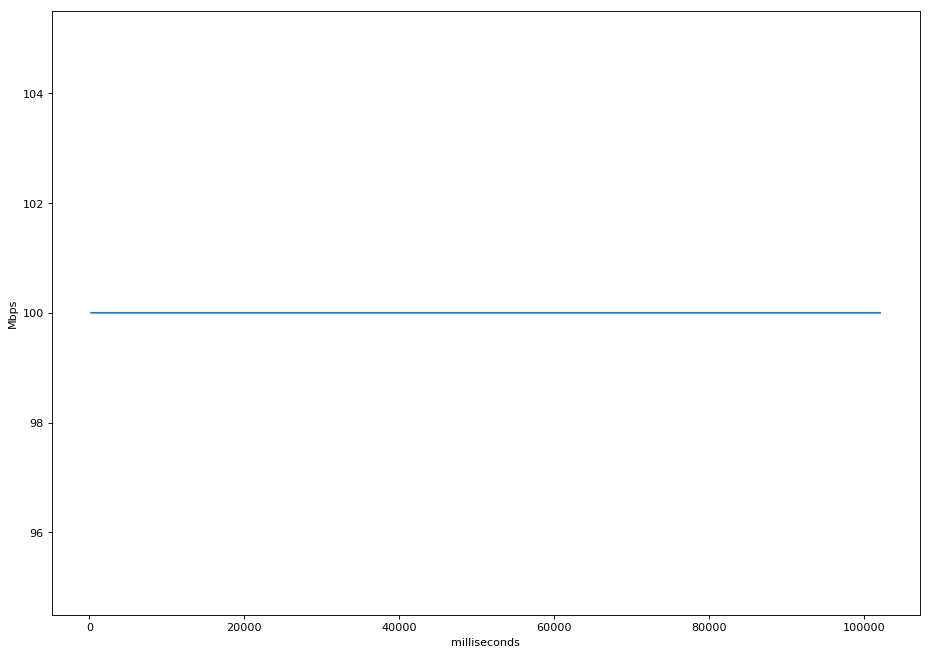

denv_dtn2-cern_dtn2-10000:8:0


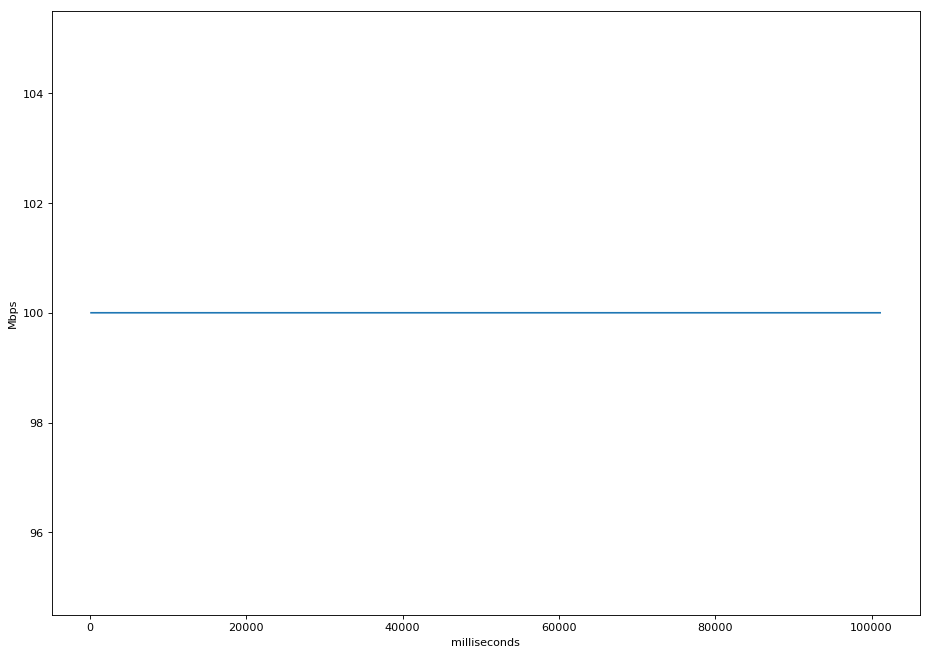

lbl_dtn2-atla_dtn2-10000:33:0


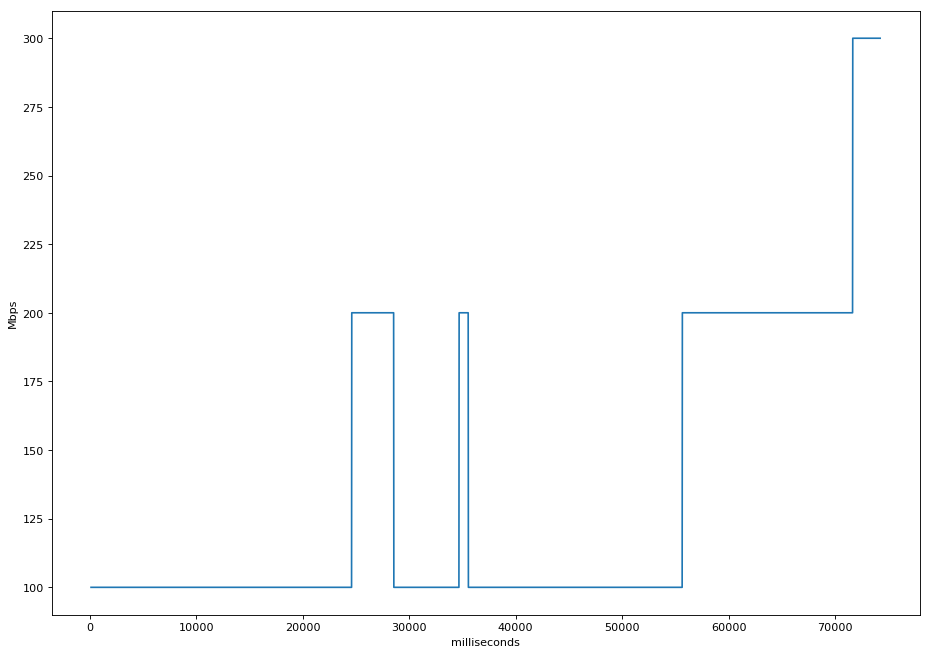

amst_dtn-star_dtn-800000:0:0
(457640, 1070.5493400096893, 0.427481464792513)


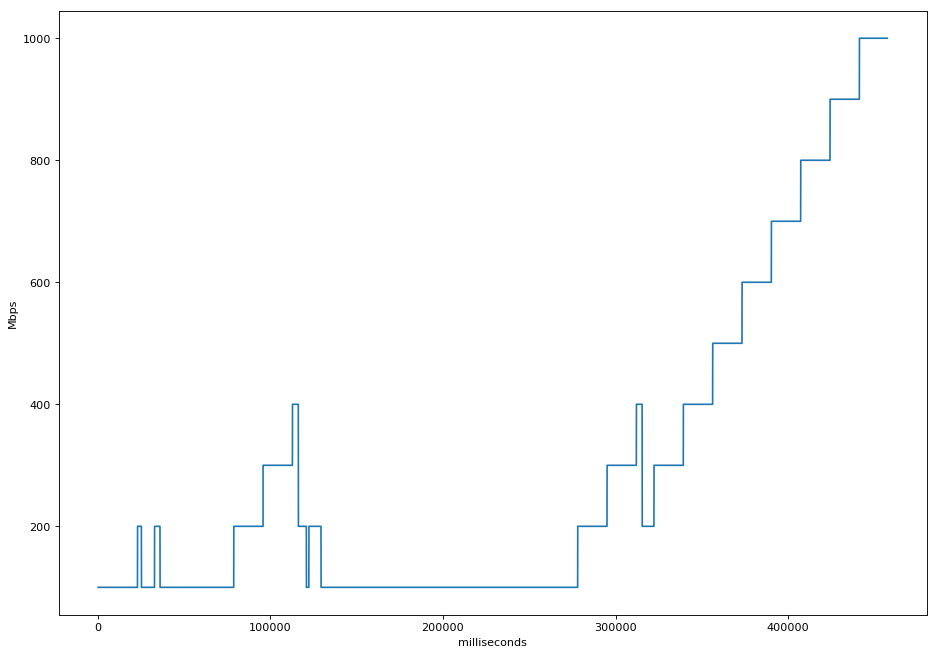

amst_dtn2-cern_dtn2-10000:28:0


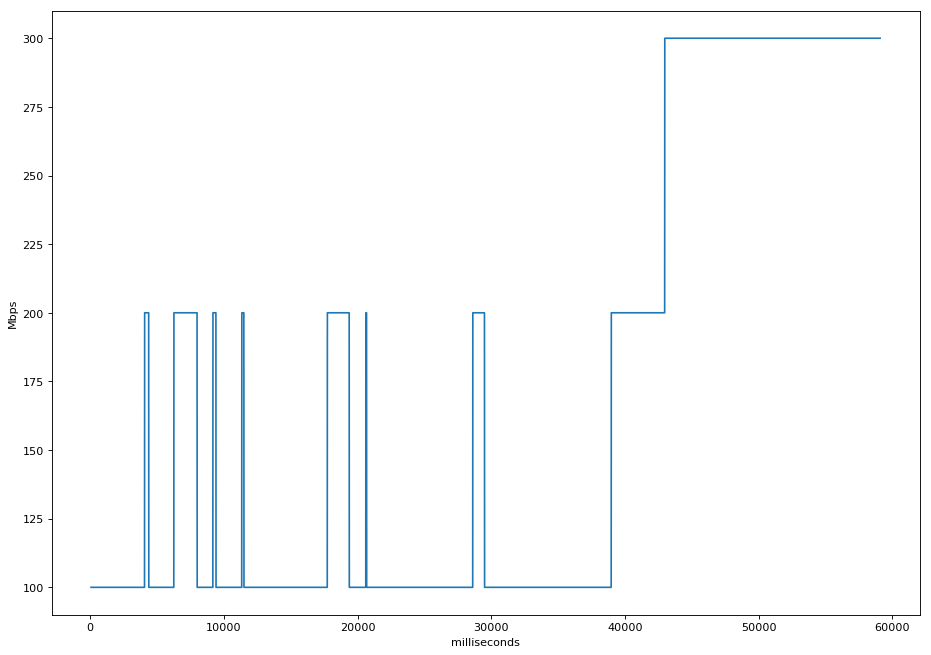

atla_dtn2-denv_dtn2-10000:8:0


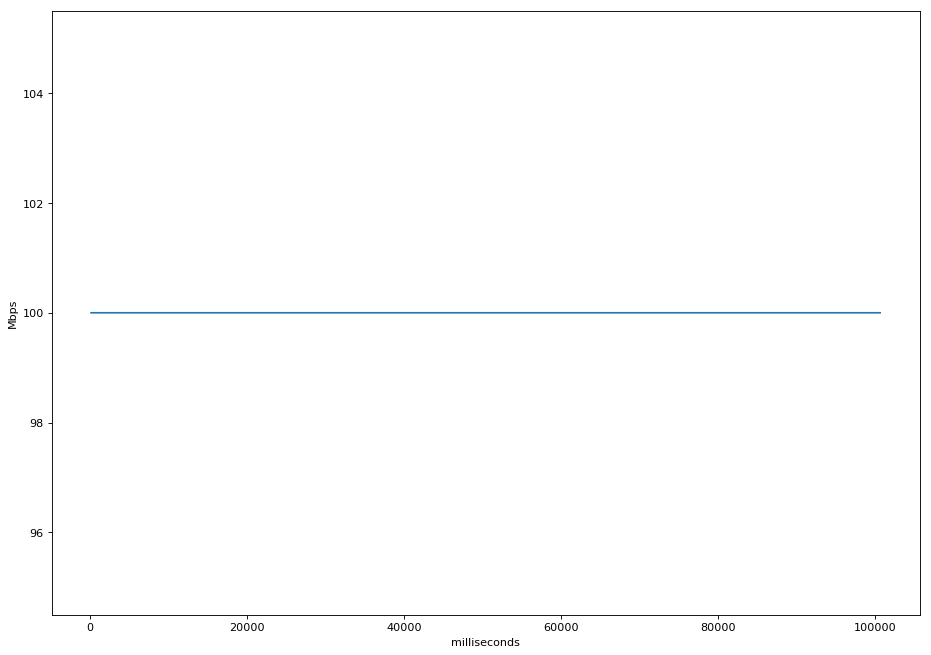

amst_dtn2-aofa_dtn2-10000:10:0


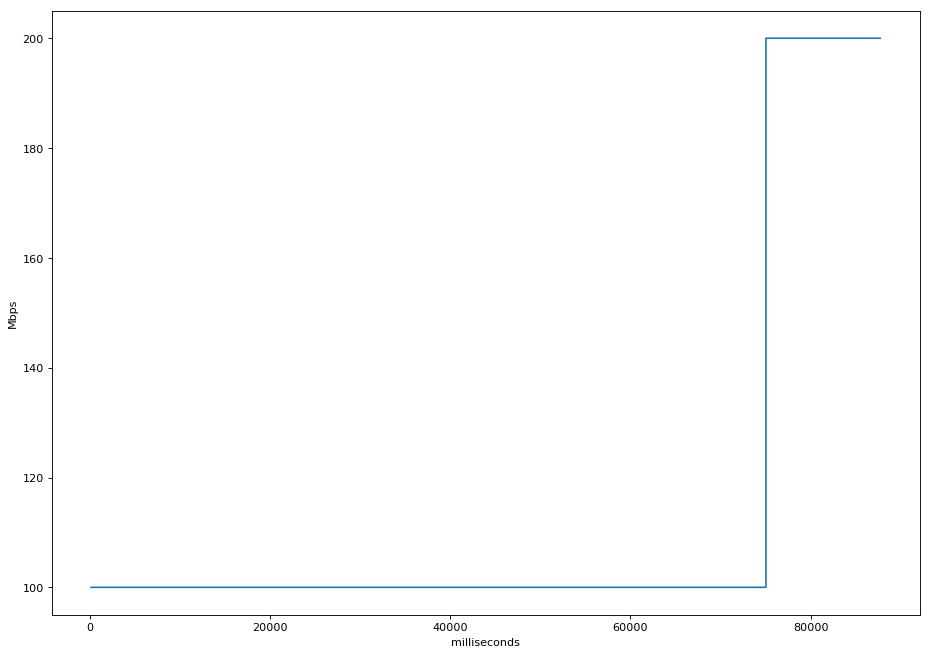

denv_dtn2-star_dtn2-10000:33:0
(457640, 1071.5523619651794, 0.42708132261563825)


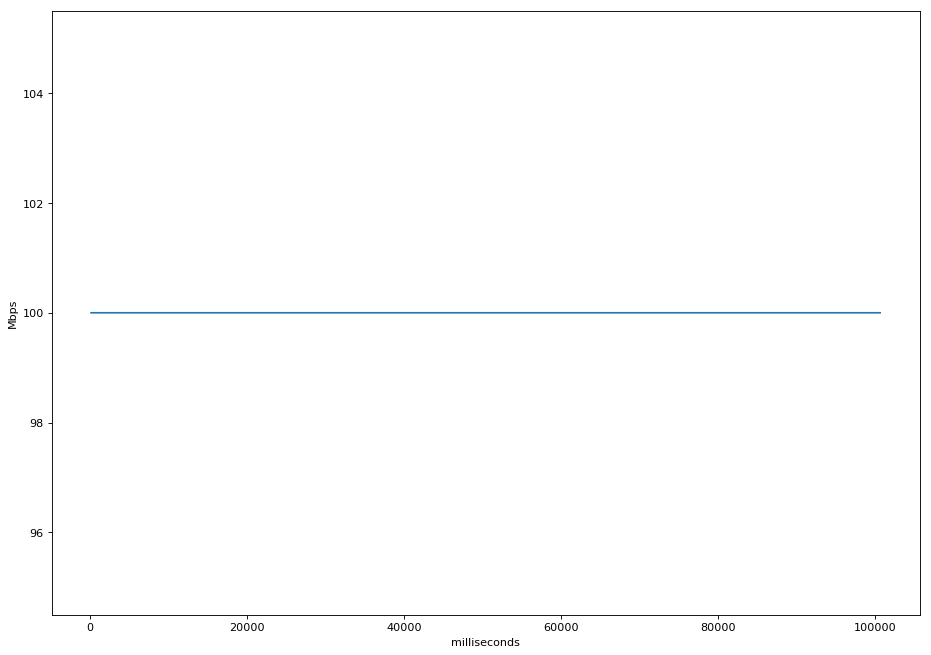

atla_dtn2-cern_dtn2-10000:22:0


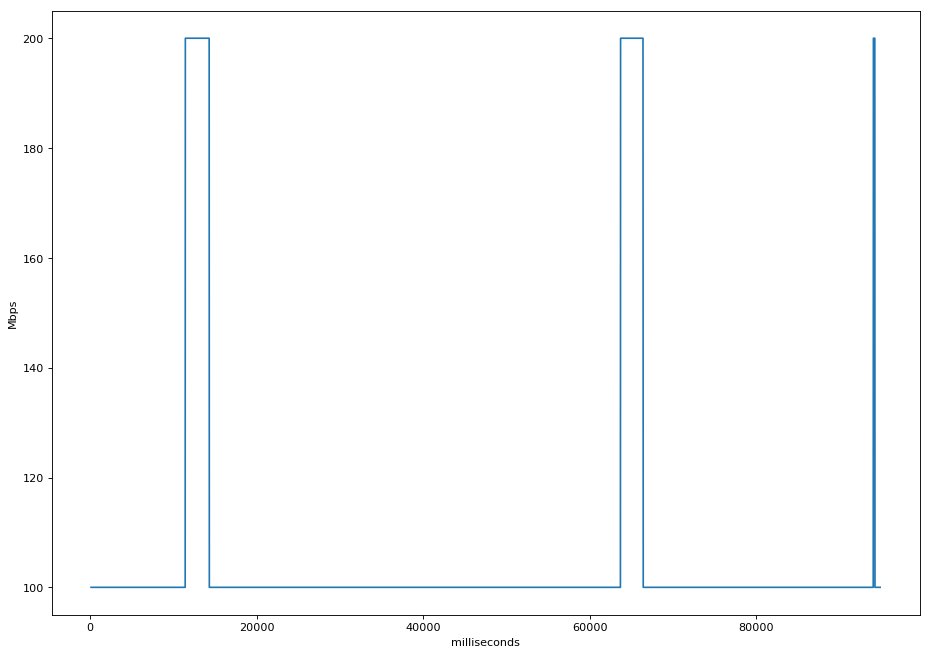

atla_dtn2-aofa_dtn2-10000:31:0


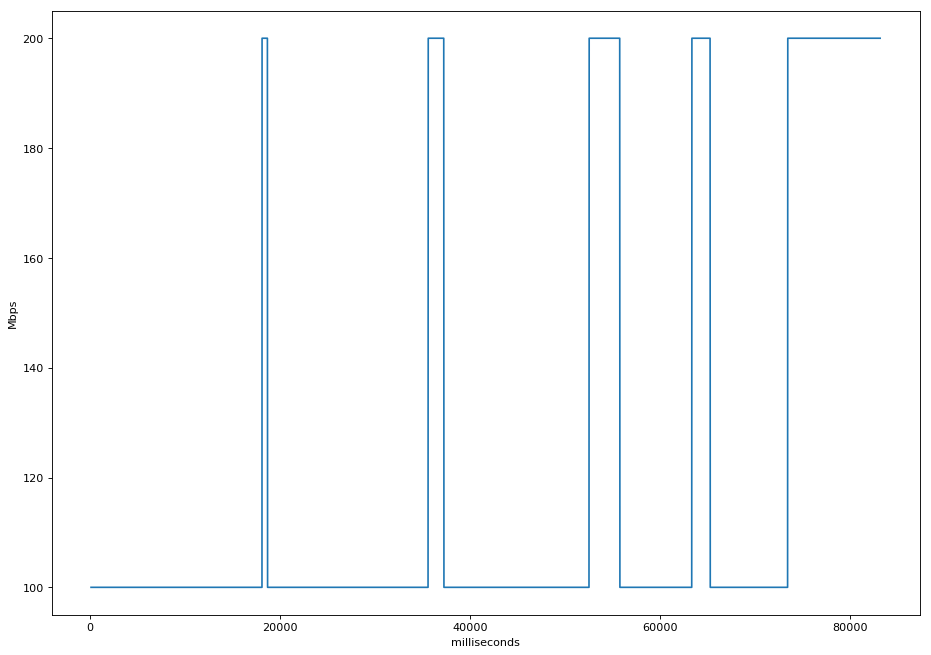

lbl_dtn-denv_dtn-800000:0:2
(457640, 1072.5656909942627, 0.4266778285400591)


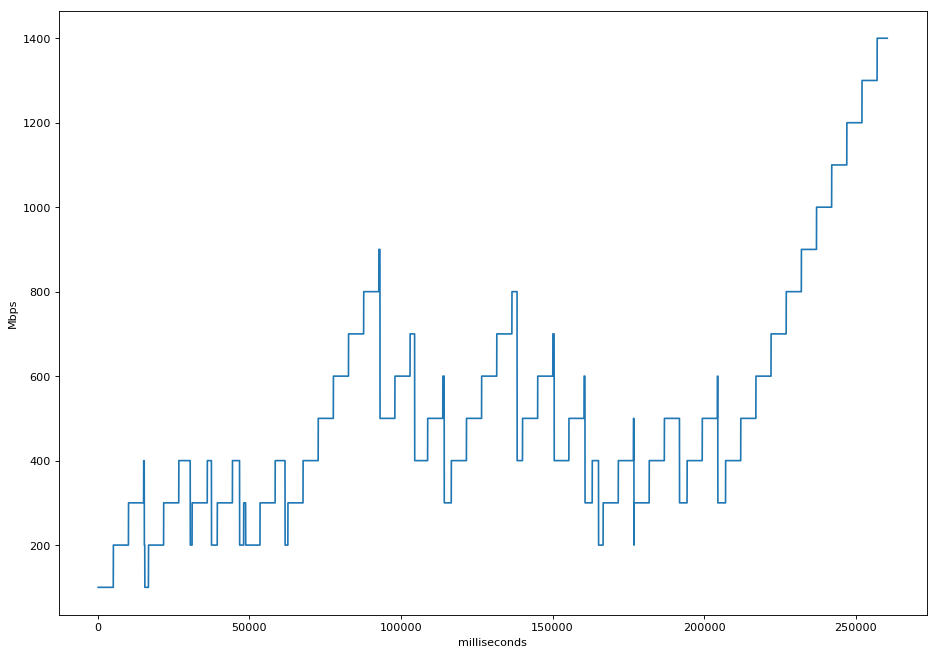

denv_dtn2-atla_dtn2-10000:12:0


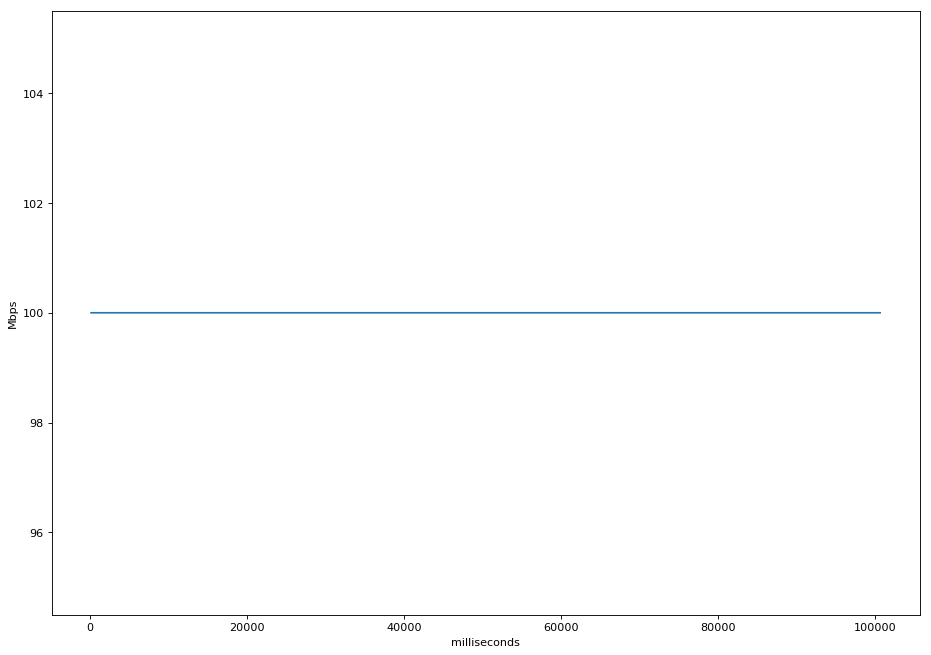

denv_dtn2-atla_dtn2-10000:10:0


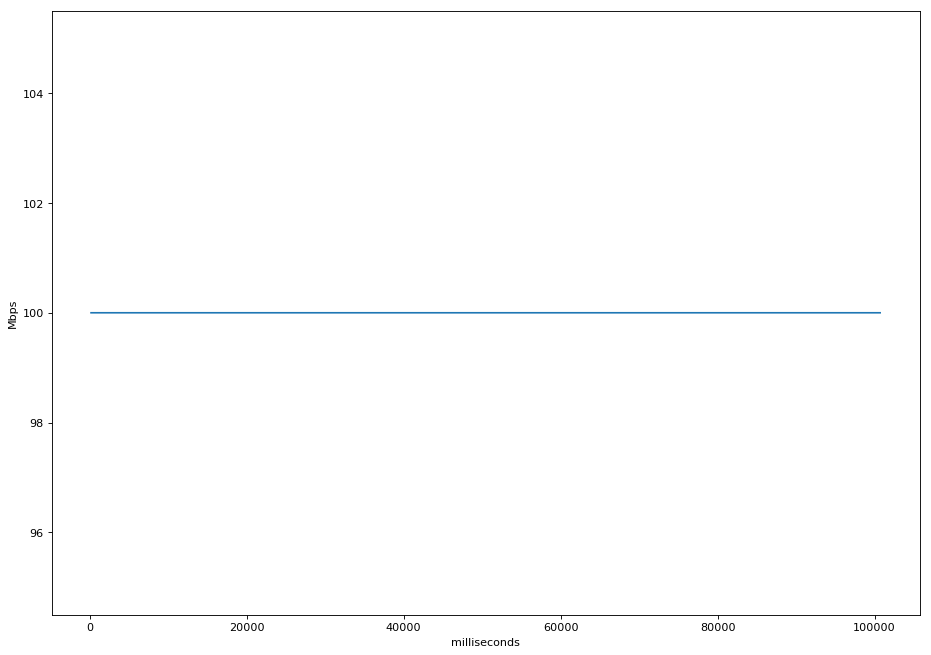

cern_dtn2-aofa_dtn2-10000:35:0


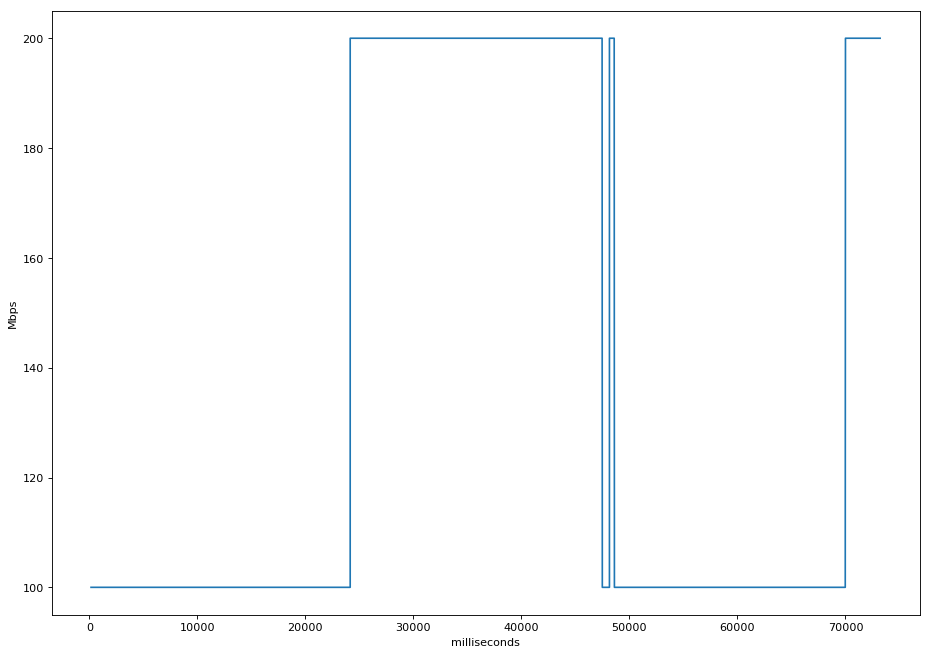

wash_dtn2-aofa_dtn2-10000:1:0
(457640, 1073.5712370872498, 0.4262781864775382)


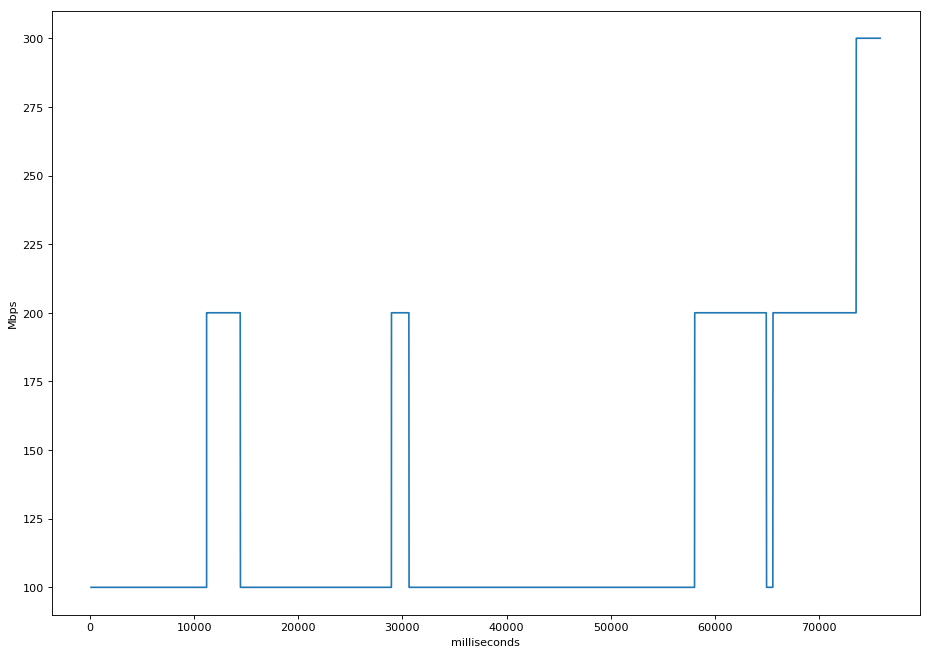

wash_dtn2-cern_dtn2-10000:32:0


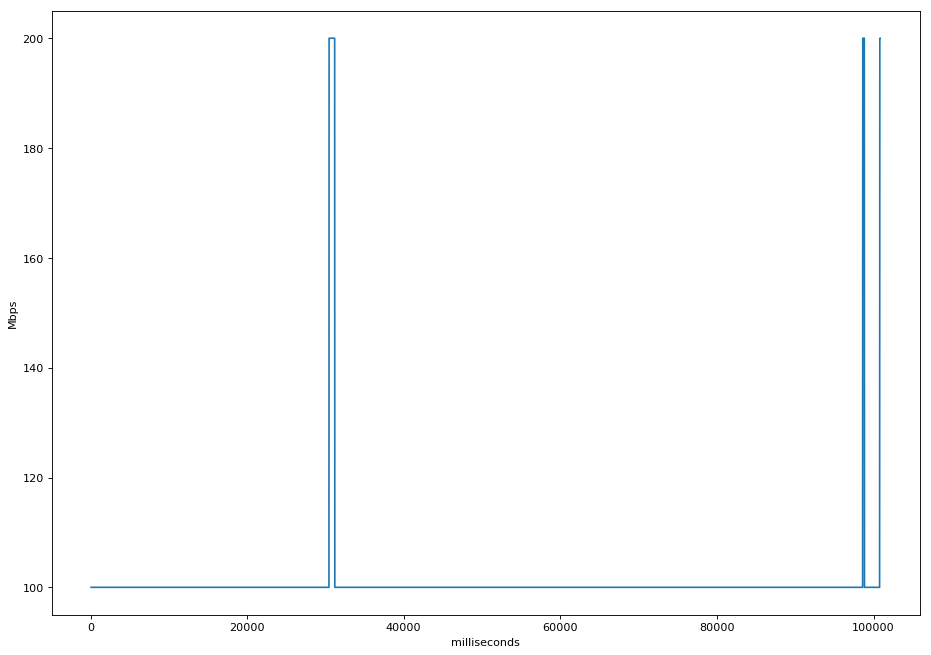

denv_dtn2-lbl_dtn2-10000:18:0


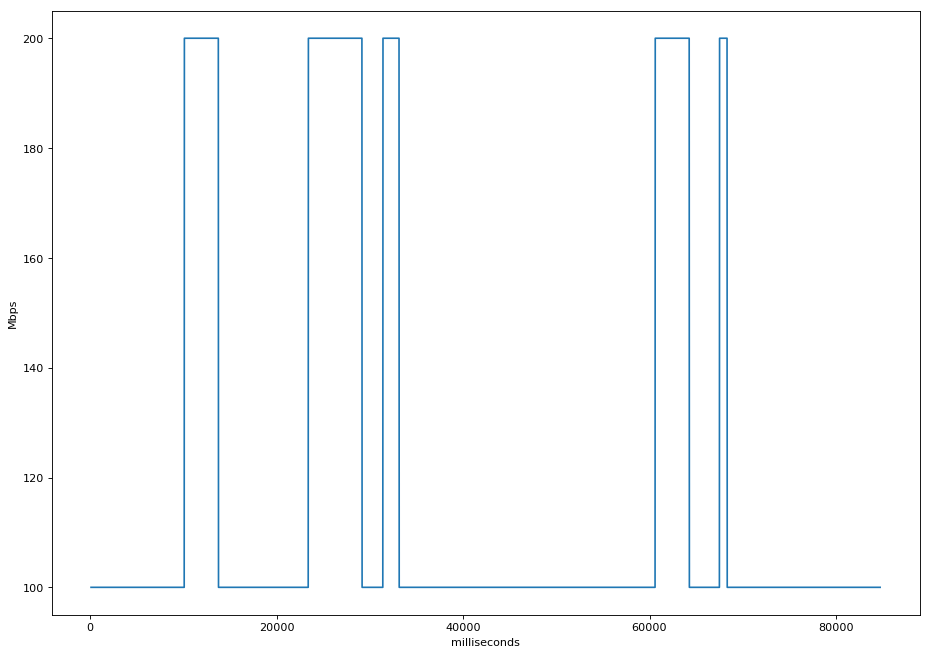

atla_dtn2-amst_dtn2-10000:3:0
(457640, 1074.616532087326, 0.42586353953729333)

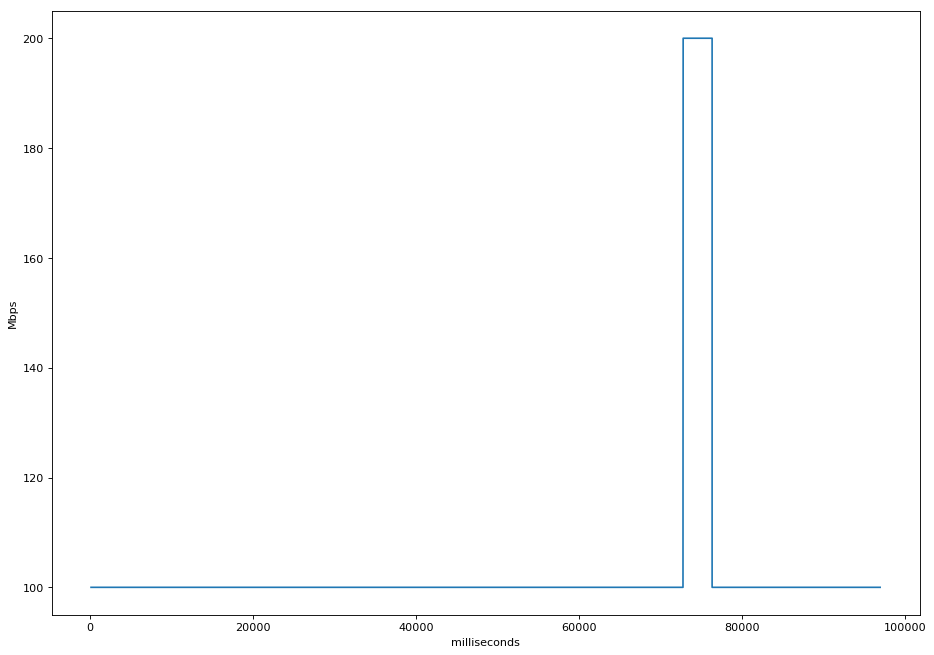


denv_dtn2-cern_dtn2-10000:0:0


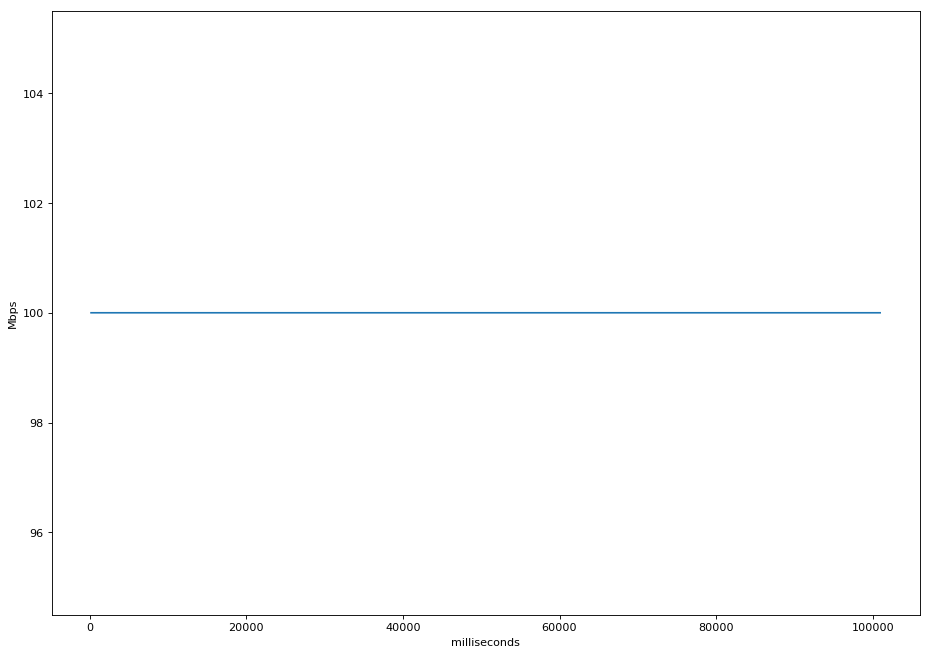

aofa_dtn2-amst_dtn2-10000:34:0


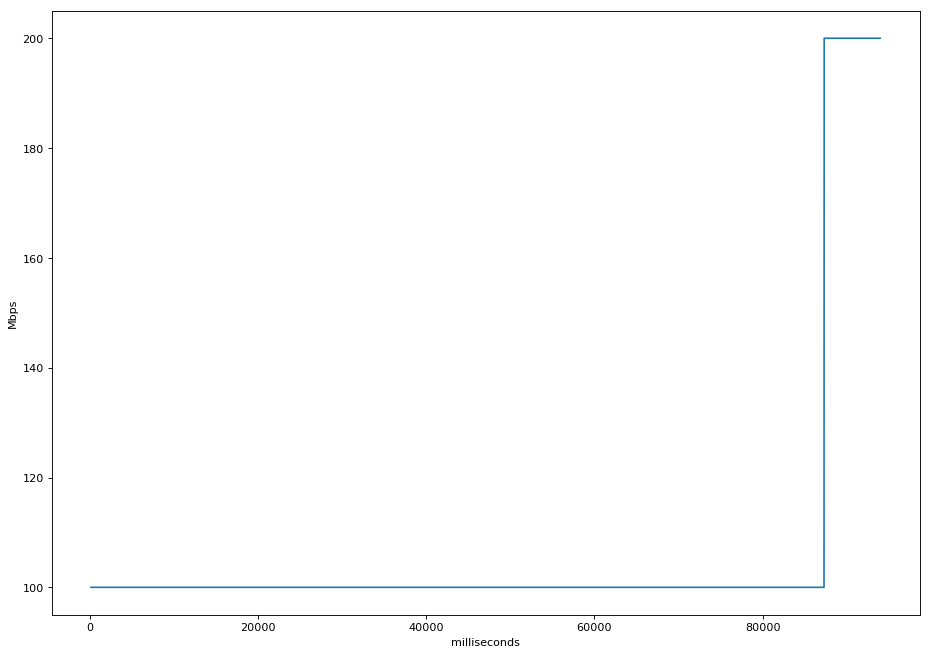

lbl_dtn2-star_dtn2-10000:18:0


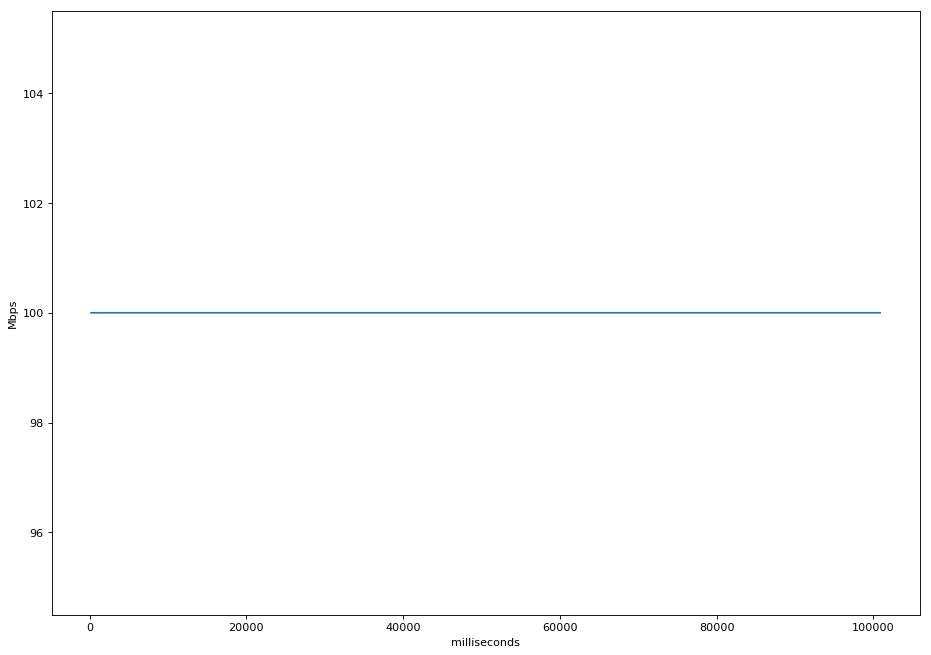

atla_dtn2-star_dtn2-10000:29:0
(457640, 1075.6235220432281, 0.4254648495699297)


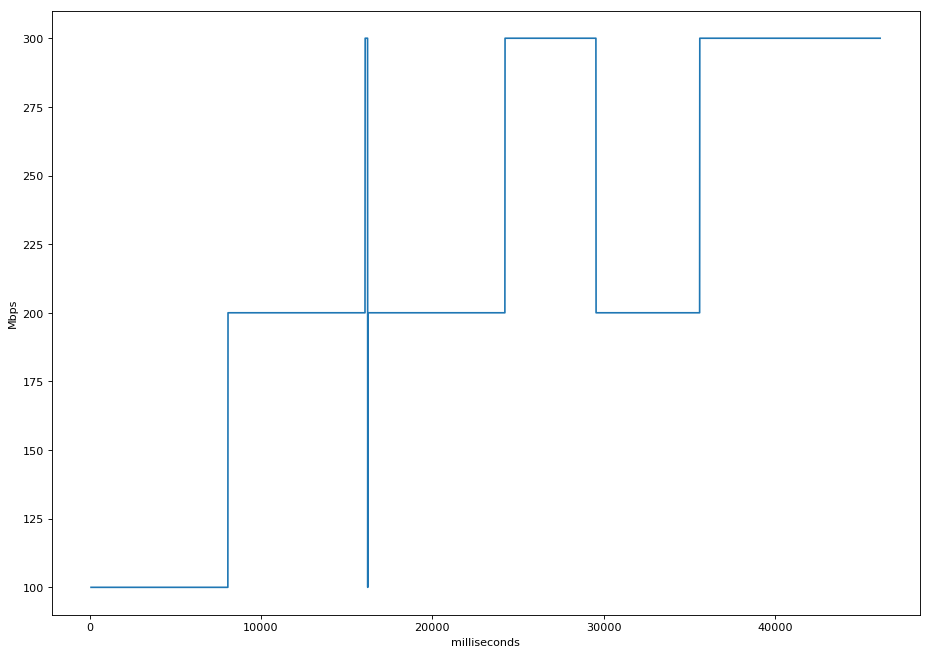

amst_dtn2-aofa_dtn2-10000:1:0


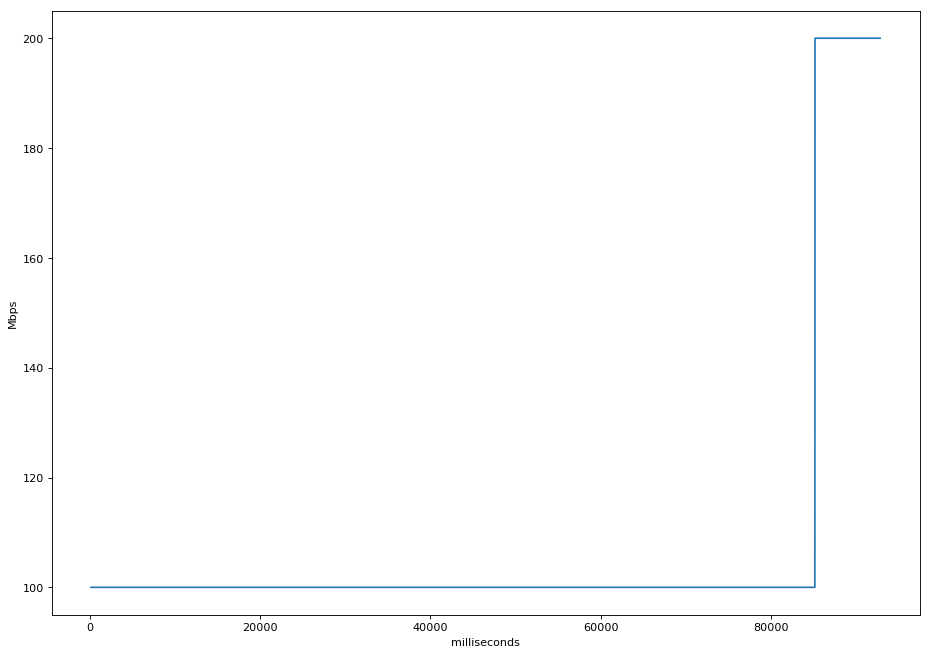

lbl_dtn2-wash_dtn2-10000:38:0


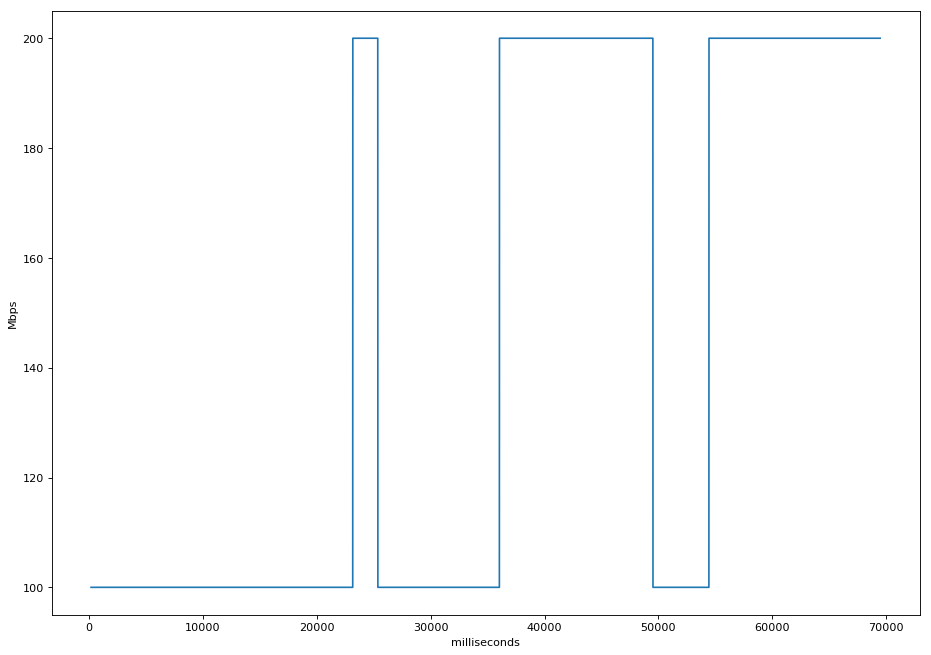

star_dtn2-cern_dtn2-10000:19:0


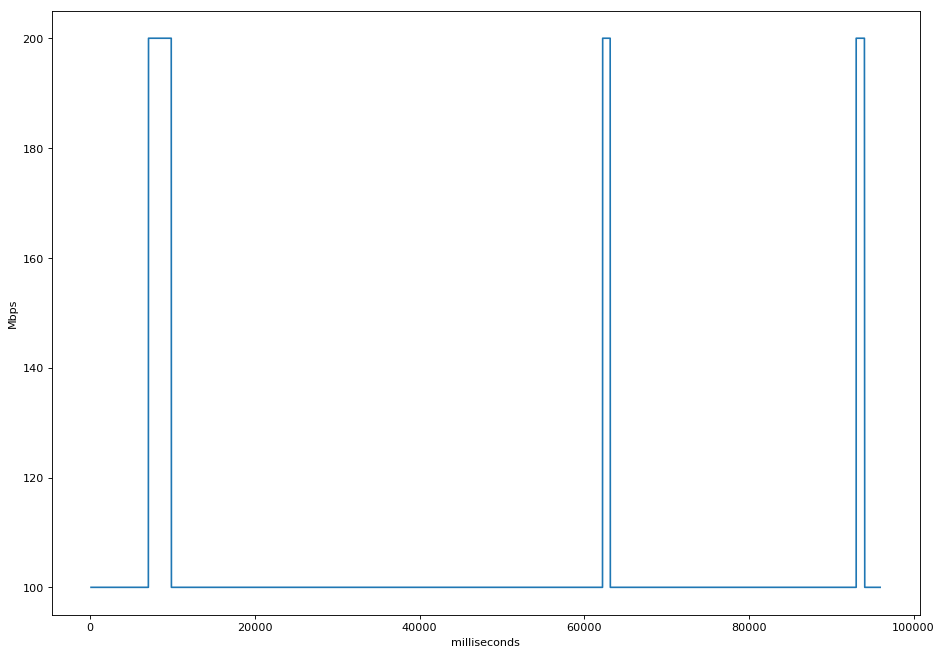

aofa_dtn2-denv_dtn2-10000:3:0
(457640, 1076.637470960617, 0.4250641579395115)


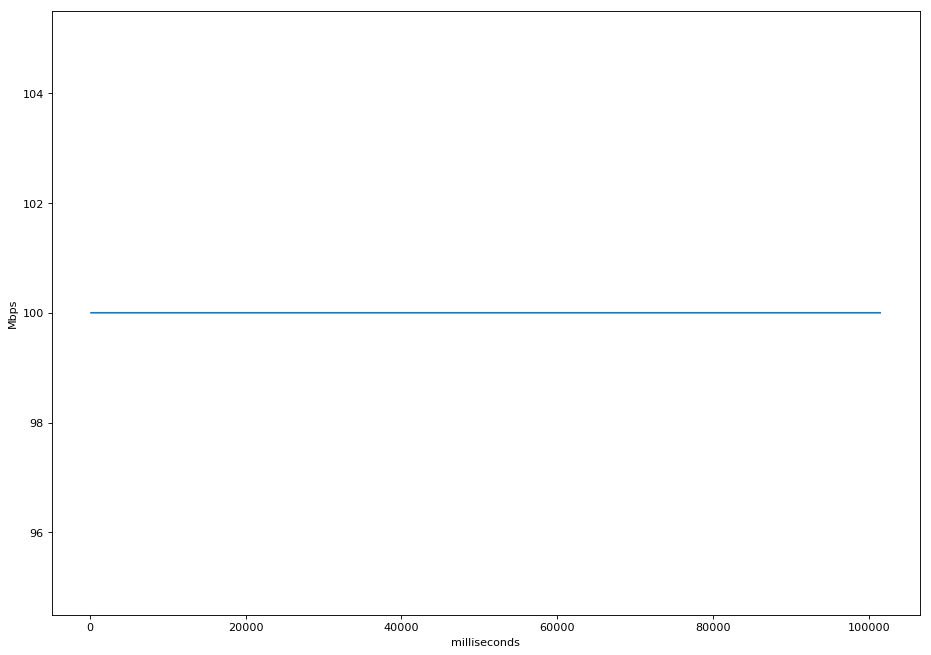

amst_dtn2-wash_dtn2-10000:4:0


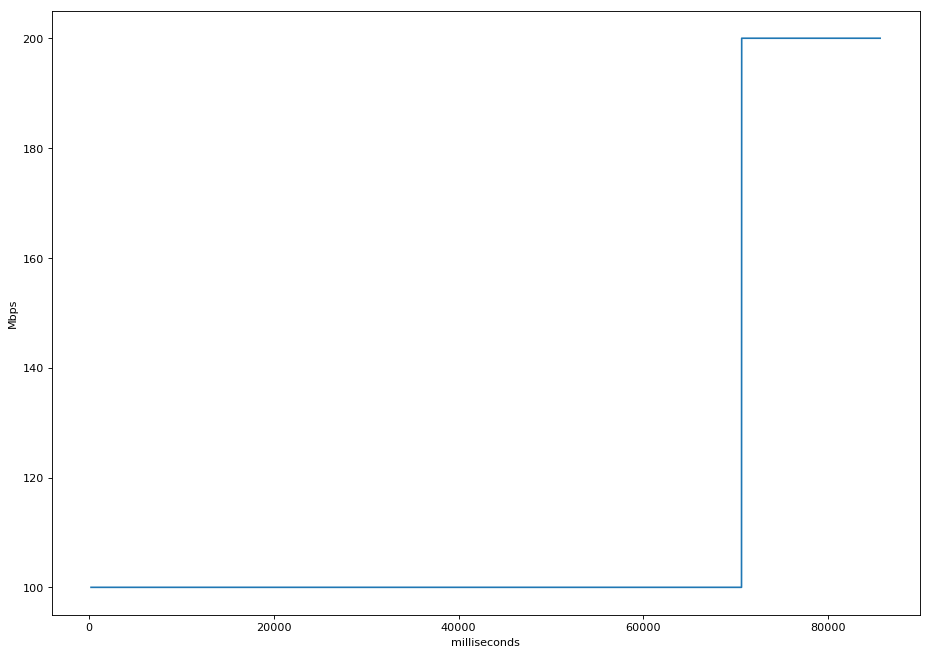

lbl_dtn2-wash_dtn2-10000:32:0


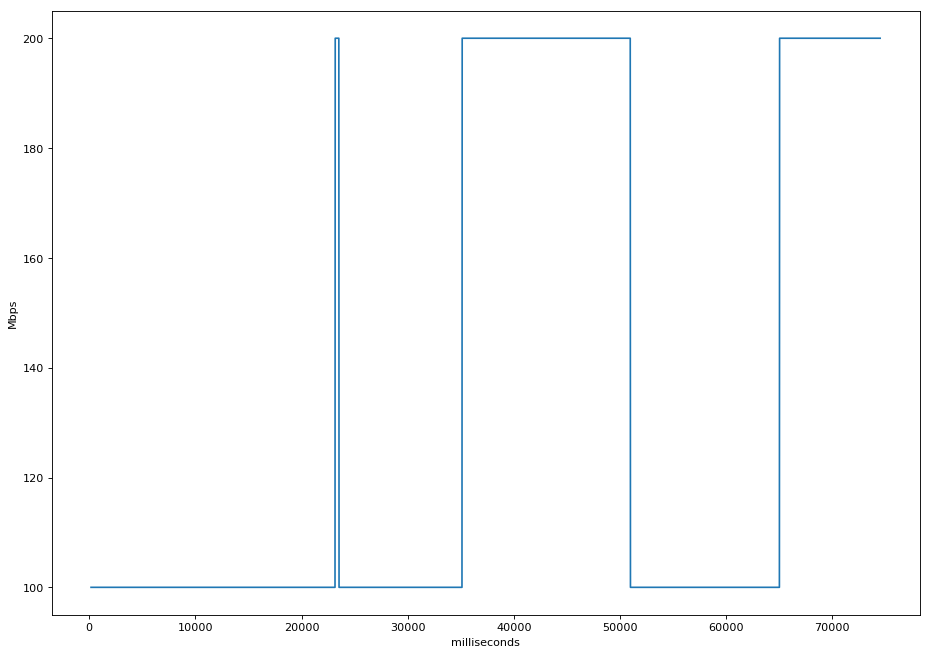

denv_dtn-lbl_dtn-800000:0:2
(457640, 1077.6464970111847, 0.4246661602568641)


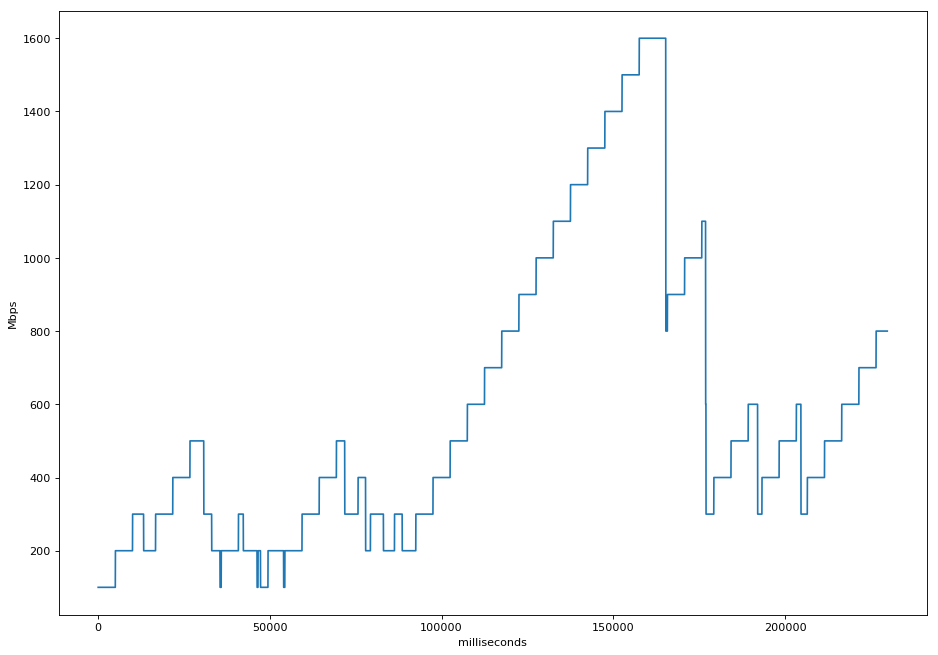

denv_dtn-lbl_dtn-800000:0:3


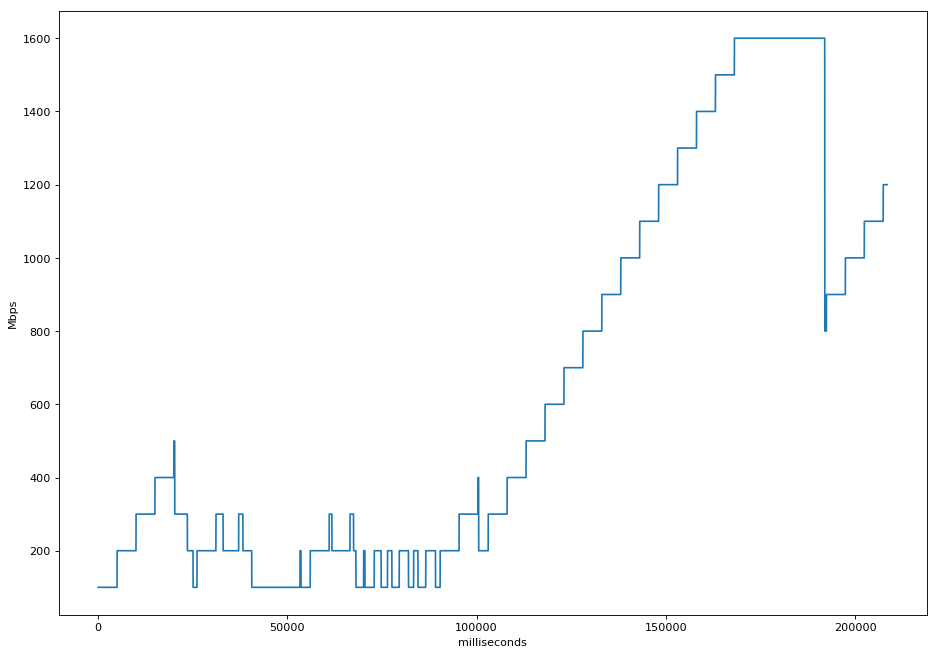

denv_dtn-lbl_dtn-800000:0:0


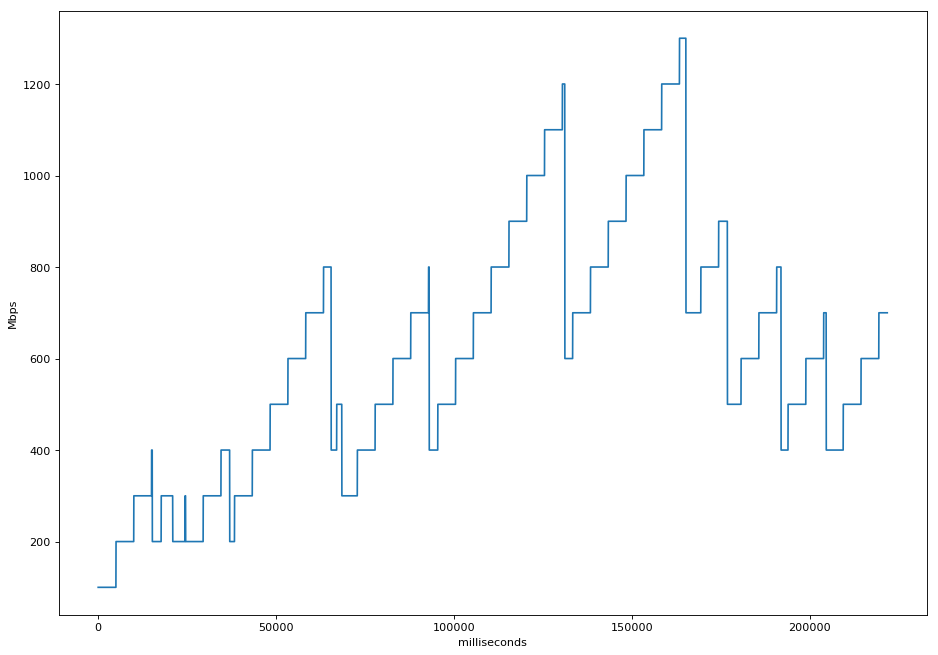

denv_dtn-lbl_dtn-800000:0:1


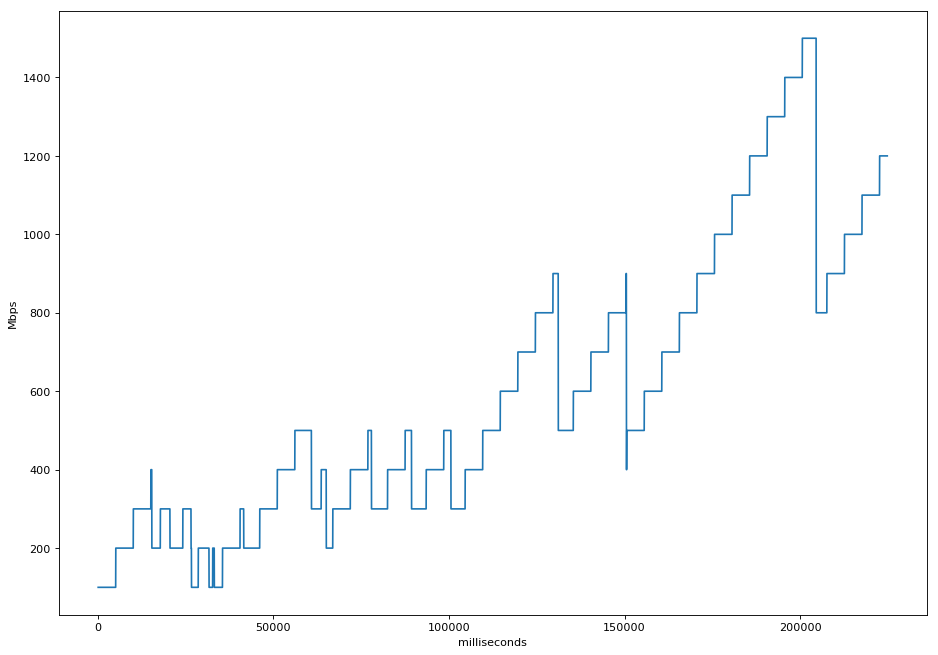

(457640, 1078.648400068283, 0.4242717089007219)
denv_dtn-lbl_dtn-800000:0:4


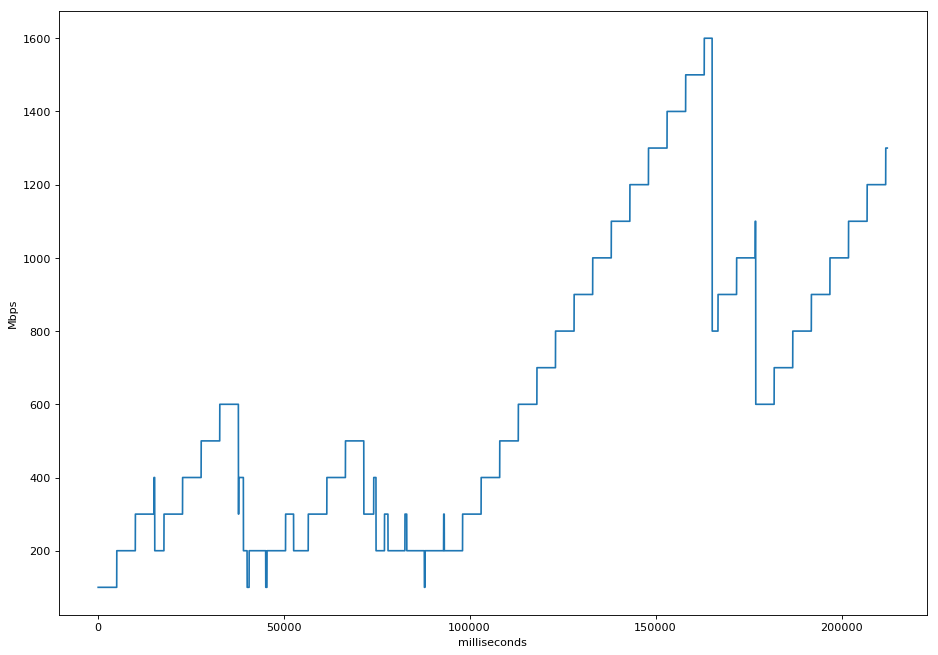

denv_dtn-lbl_dtn-800000:0:5


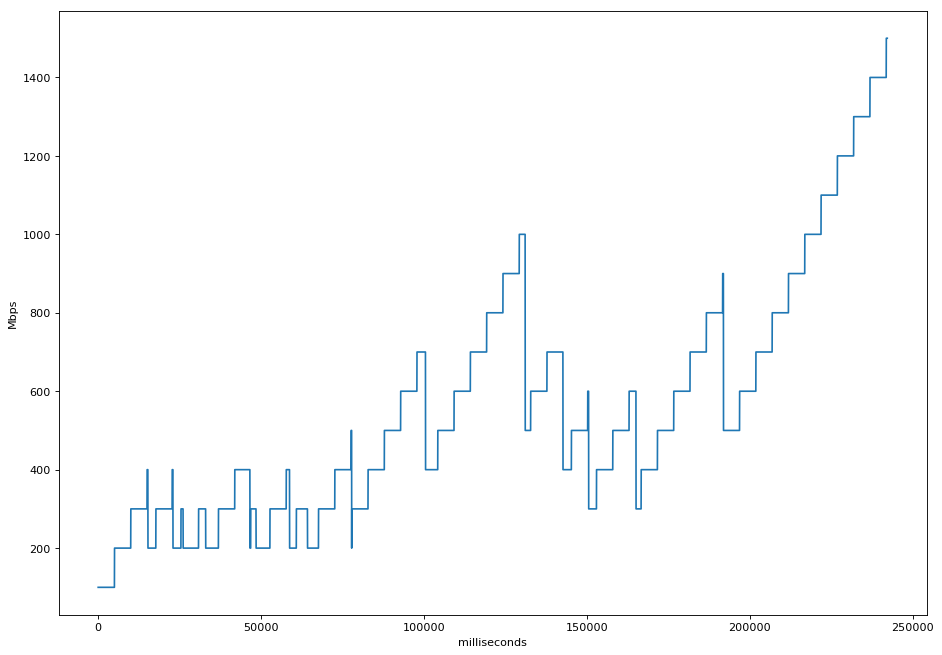

wash_dtn2-amst_dtn2-10000:29:0


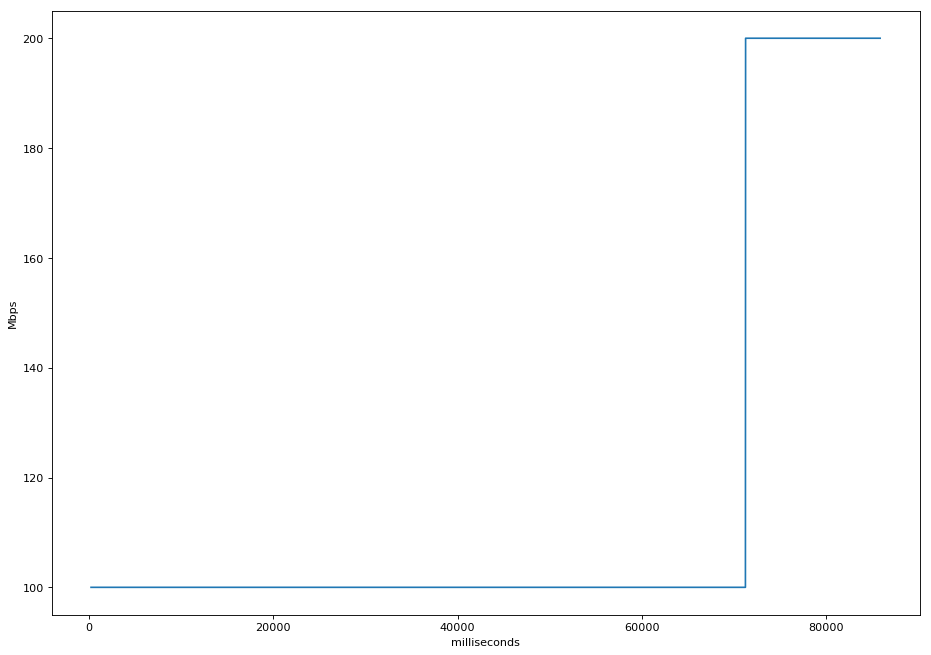

denv_dtn2-cern_dtn2-10000:32:0
(457640, 1079.7318451404572, 0.4238459781099332)


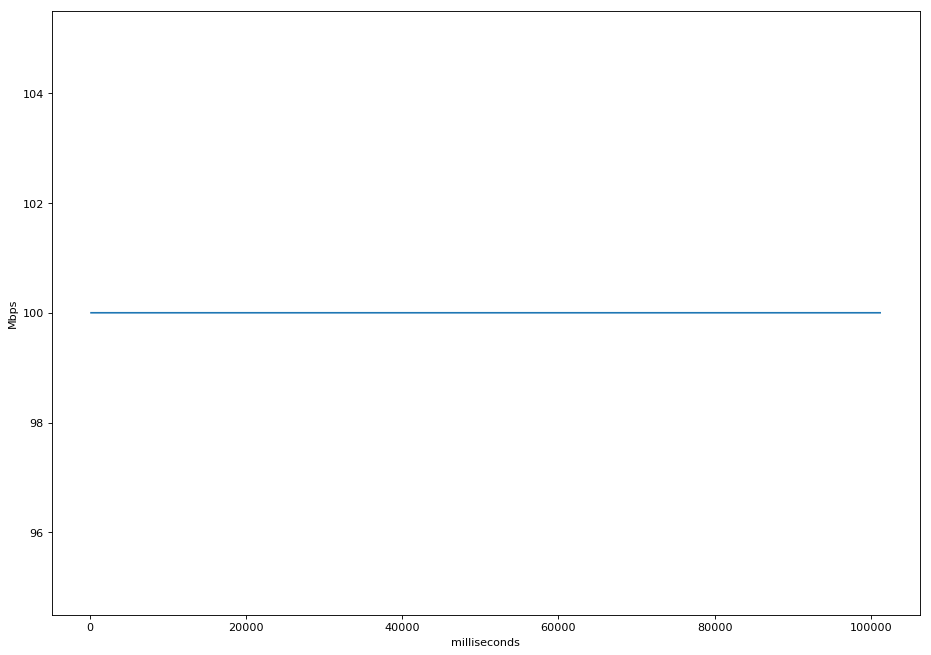

star_dtn2-lbl_dtn2-10000:10:0


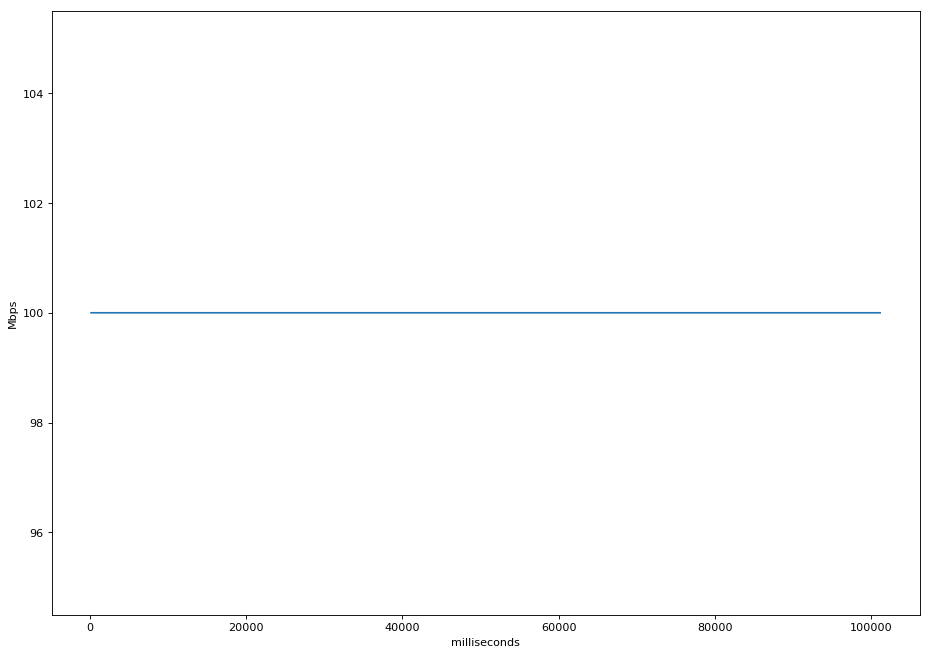

atla_dtn2-wash_dtn2-10000:10:0


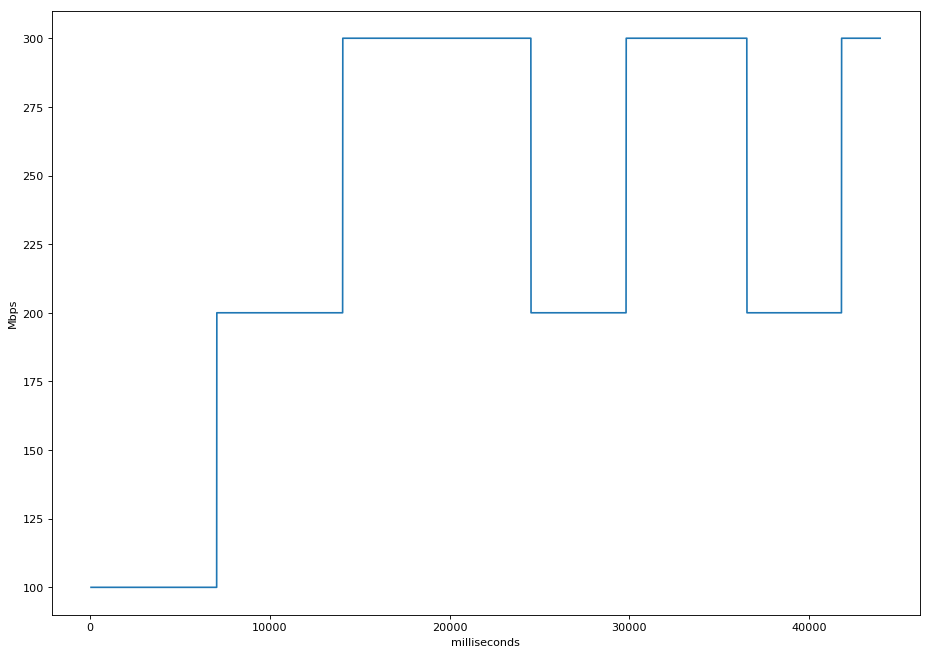

atla_dtn2-wash_dtn2-10000:37:0


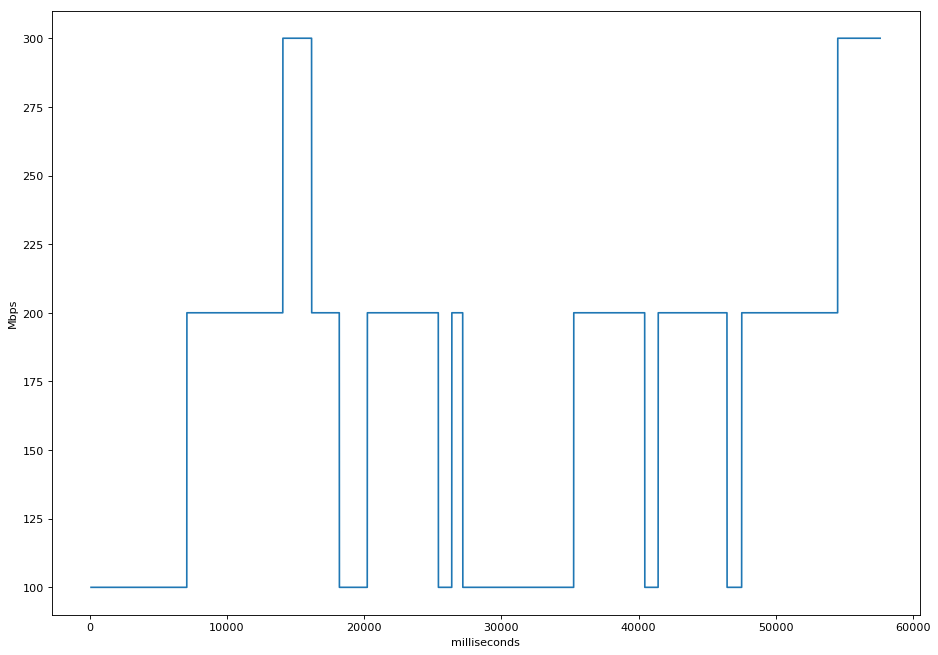

wash_dtn-lbl_dtn-800000:0:4
(457640, 1080.738914012909, 0.4234510241707959)


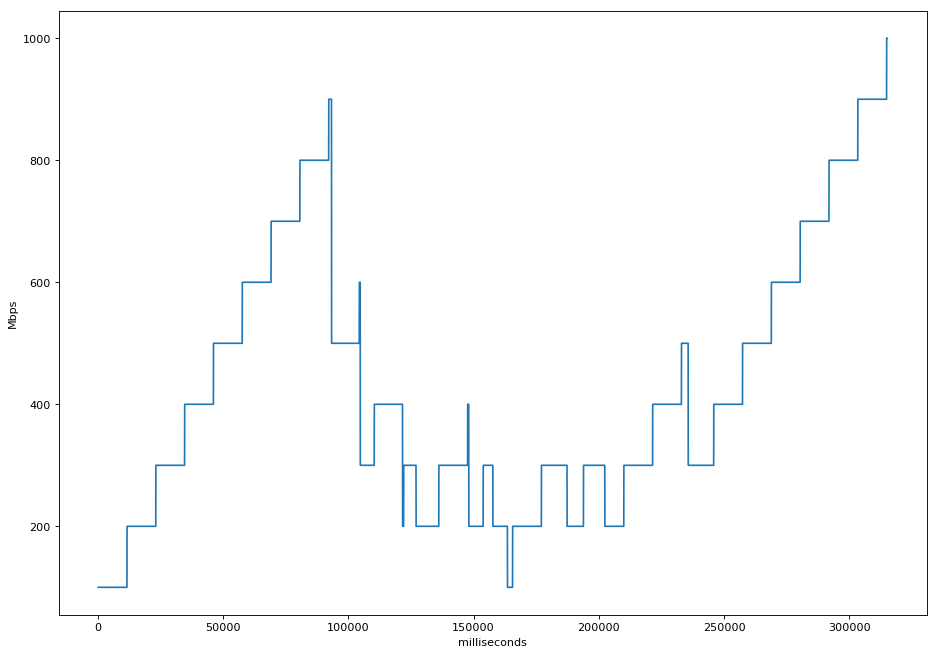

wash_dtn-lbl_dtn-800000:0:5


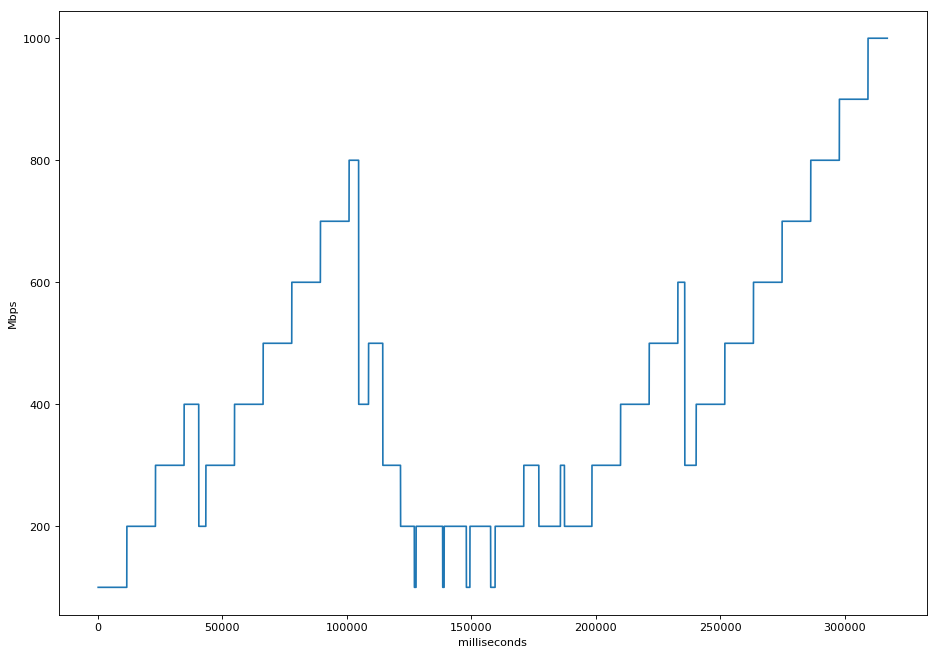

wash_dtn-lbl_dtn-800000:0:2


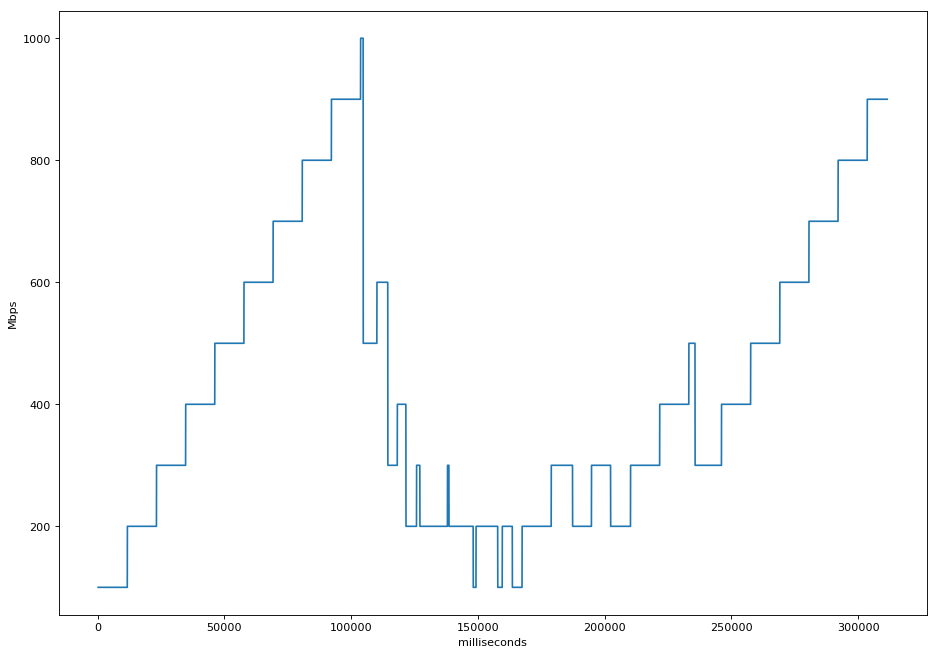

wash_dtn-lbl_dtn-800000:0:3
(457640, 1081.7407219409943, 0.42305886310616575)


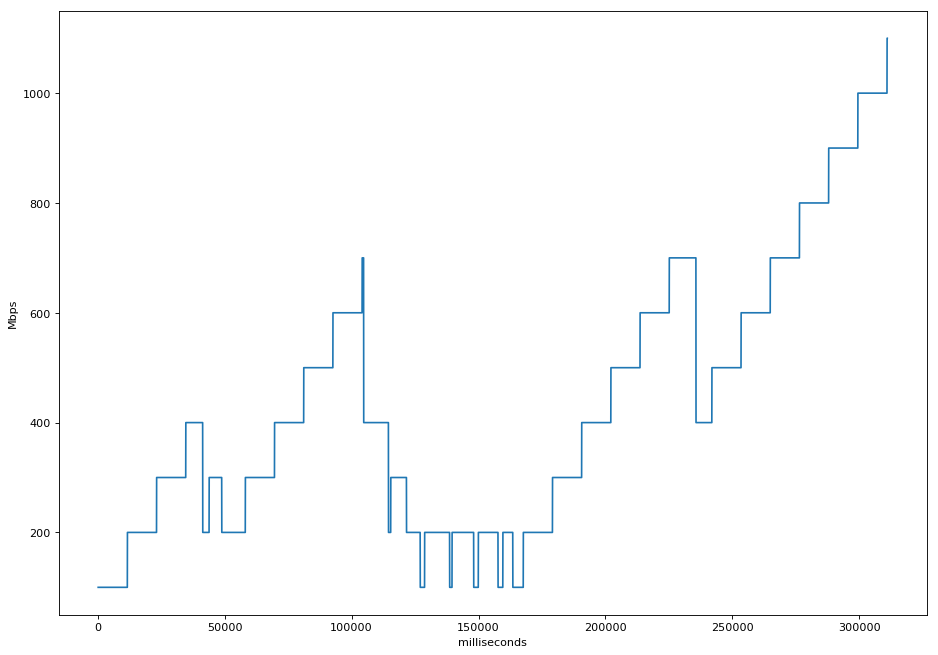

wash_dtn-lbl_dtn-800000:0:0


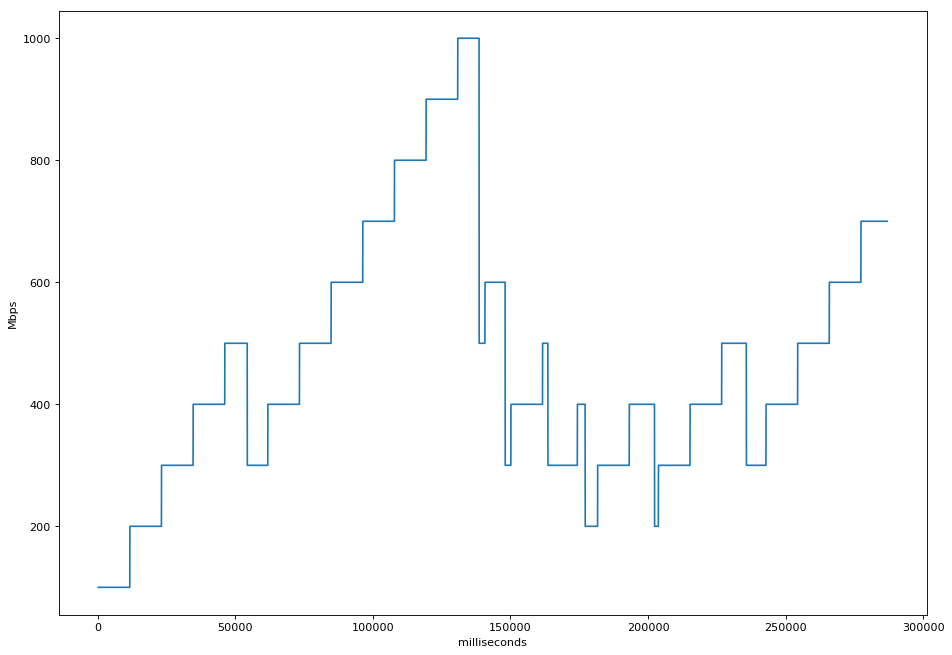

wash_dtn-lbl_dtn-800000:0:1


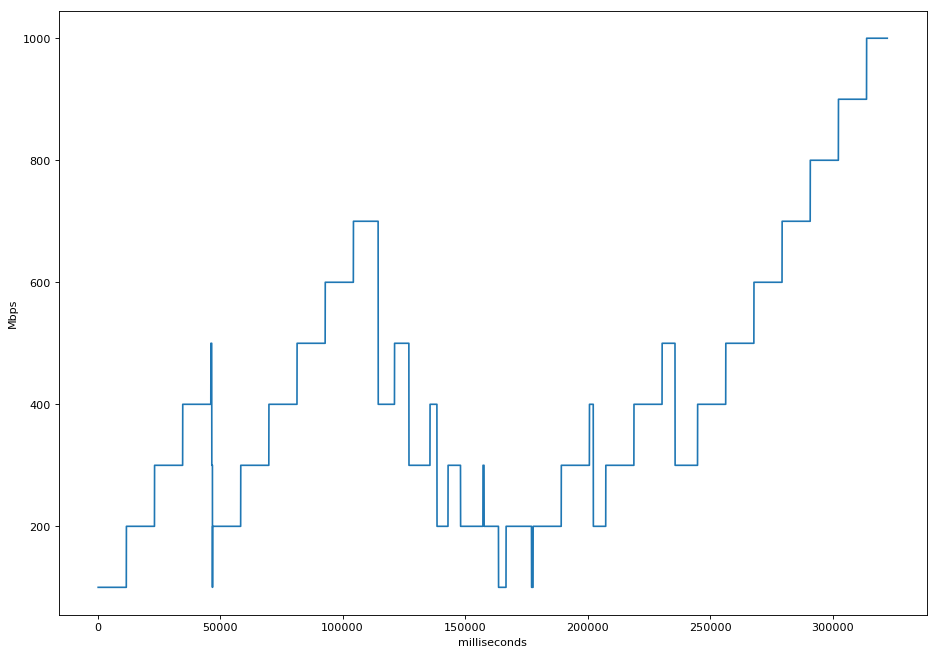

denv_dtn2-lbl_dtn2-10000:9:0
(457640, 1082.8145730495453, 0.42263930629520646)


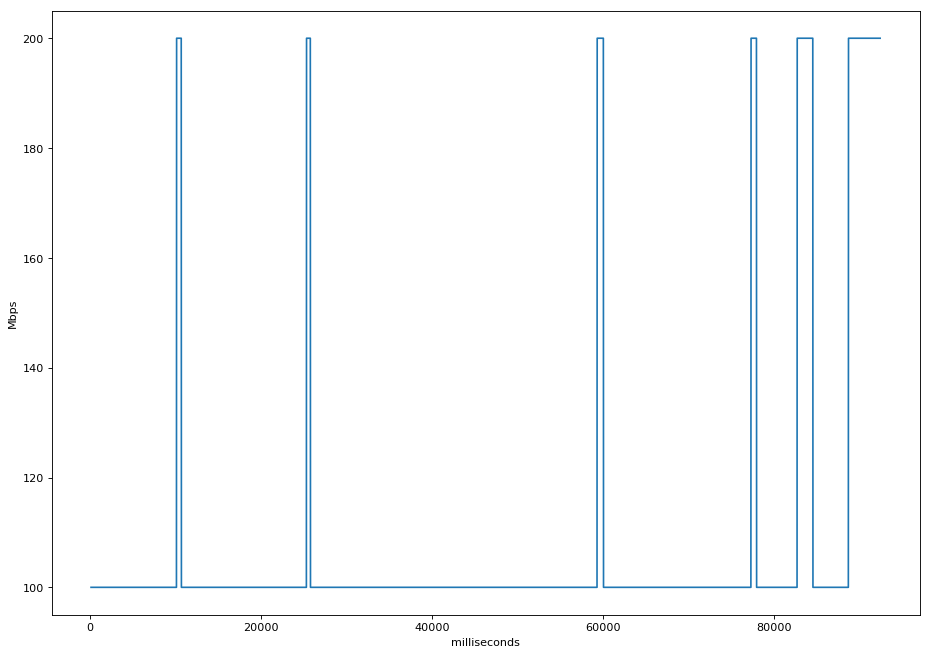

lbl_dtn2-wash_dtn2-10000:30:0


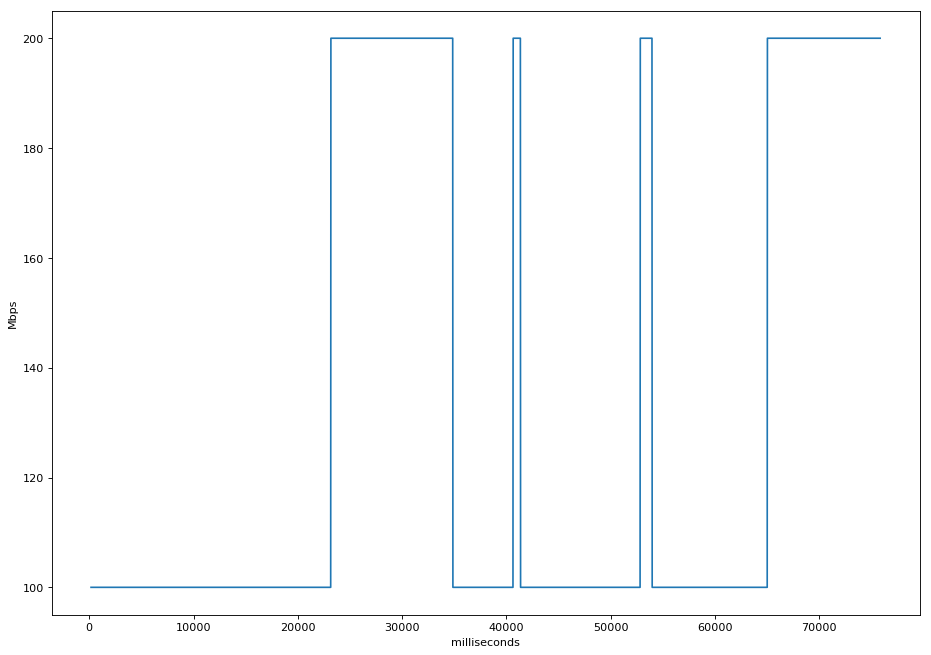

star_dtn2-cern_dtn2-10000:11:0


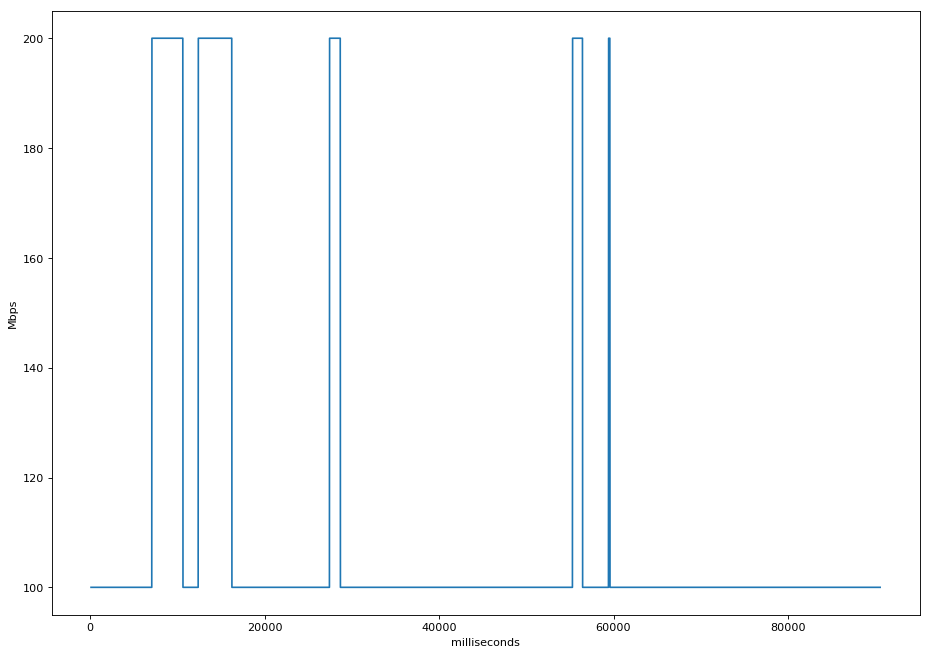

aofa_dtn2-atla_dtn2-10000:9:0


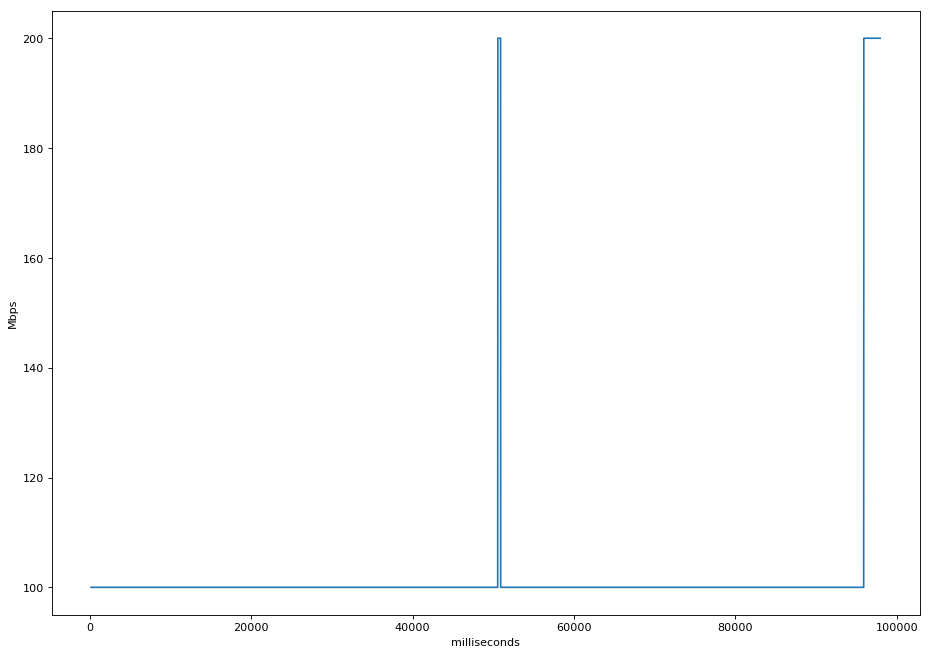

wash_dtn2-atla_dtn2-10000:25:0
(457640, 1083.817085981369, 0.422248371906426)


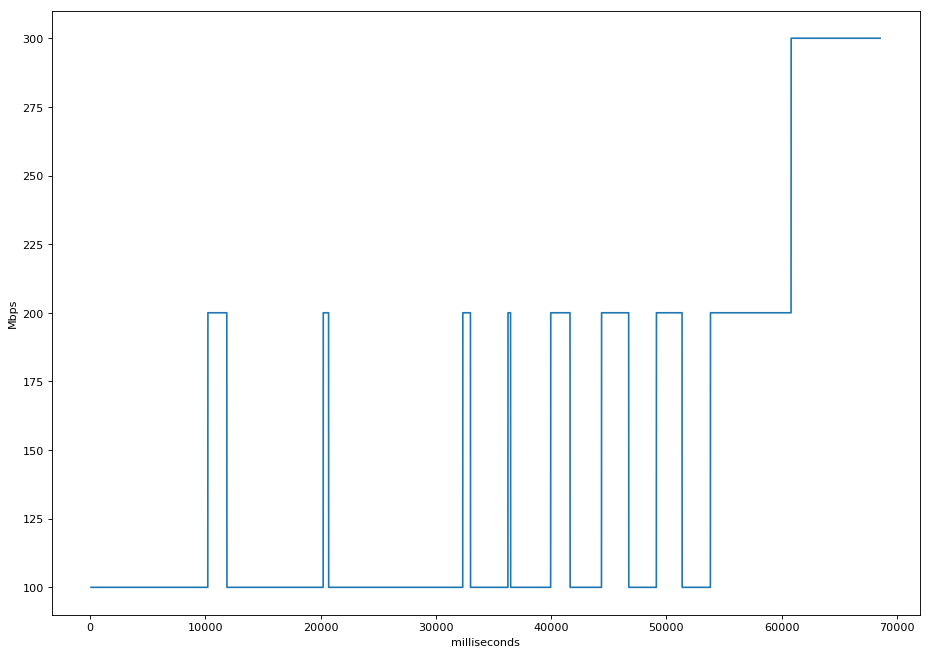

wash_dtn2-amst_dtn2-10000:37:0


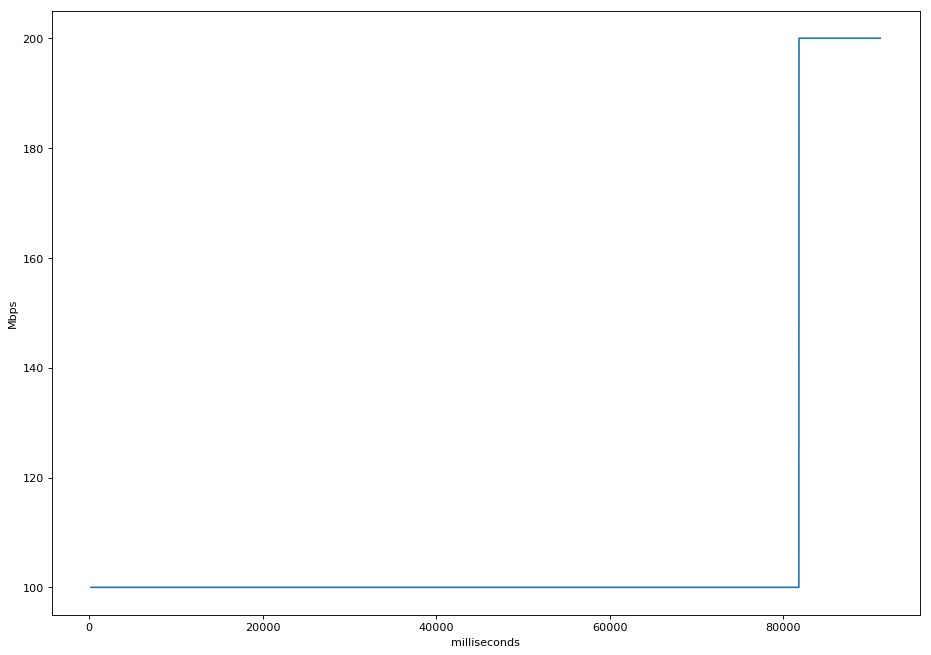

cern_dtn2-wash_dtn2-10000:28:0


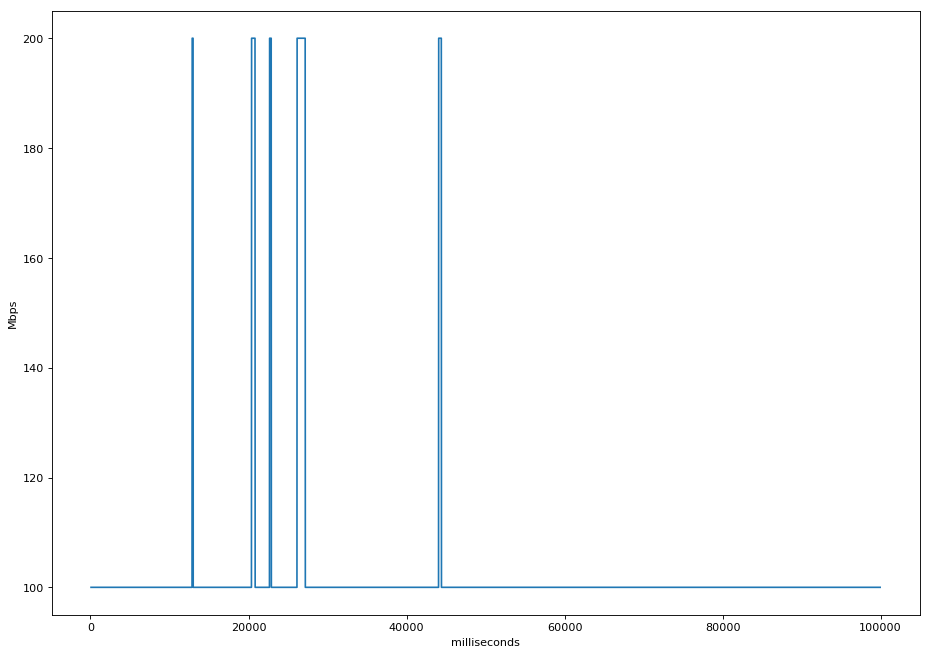

atla_dtn-denv_dtn-800000:0:5
(457640, 1084.8215880393982, 0.42185738654693844)


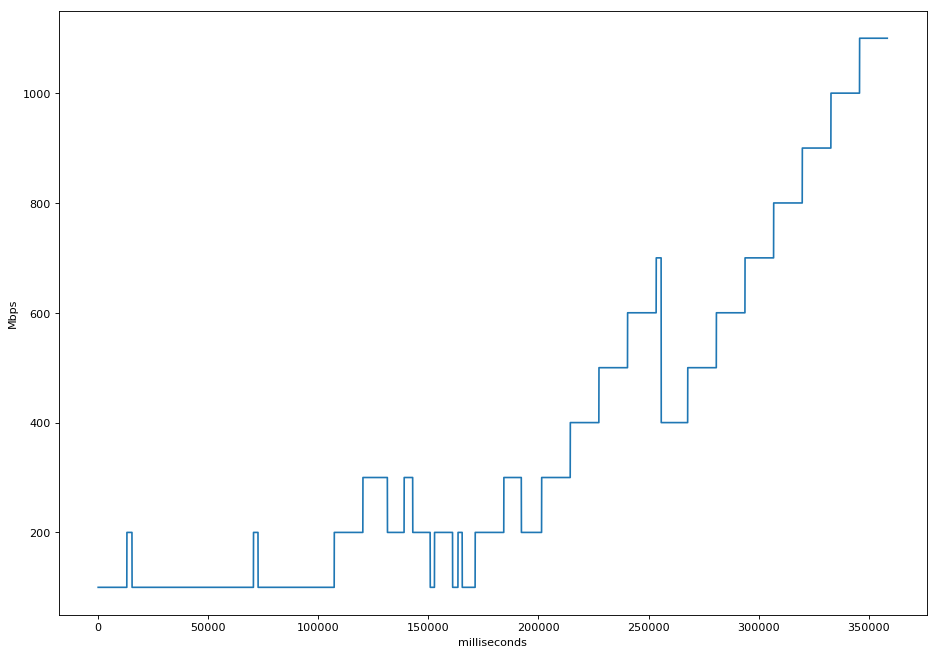

atla_dtn-denv_dtn-800000:0:4
(457640, 1086.193724155426, 0.4213244744677932)


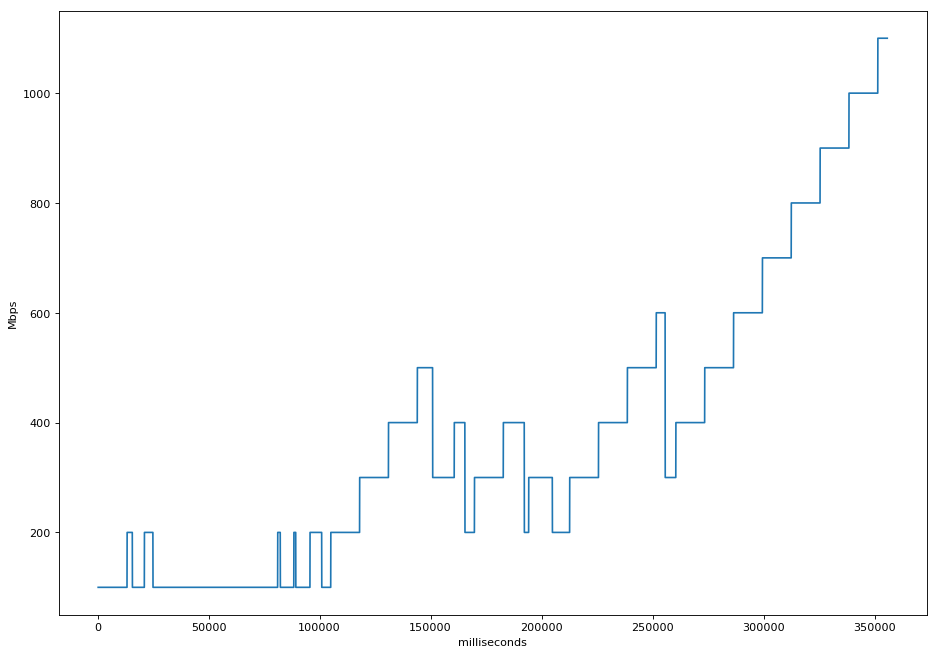

amst_dtn2-atla_dtn2-10000:21:0


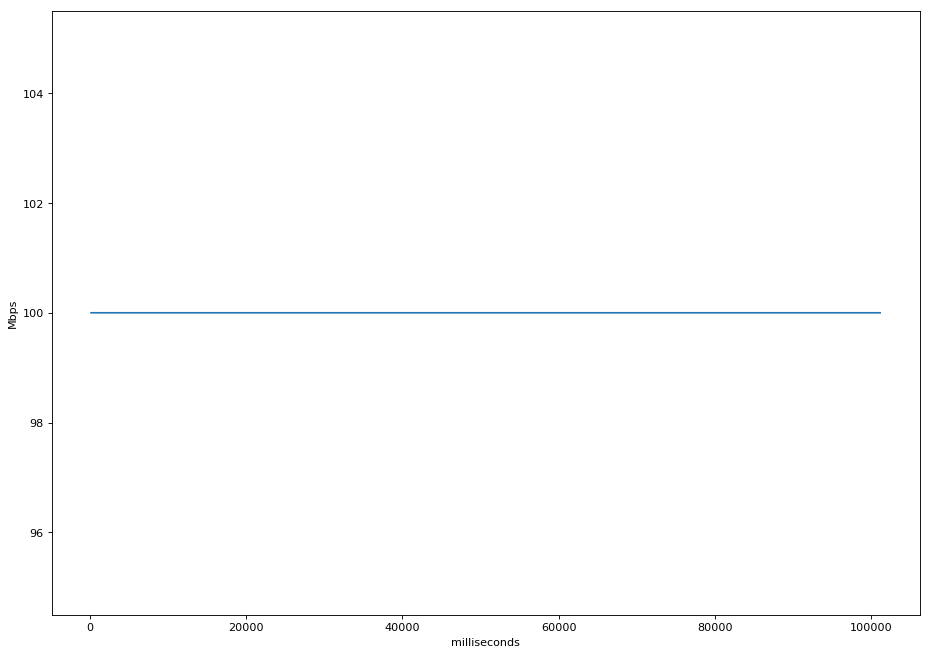

atla_dtn-denv_dtn-800000:0:1


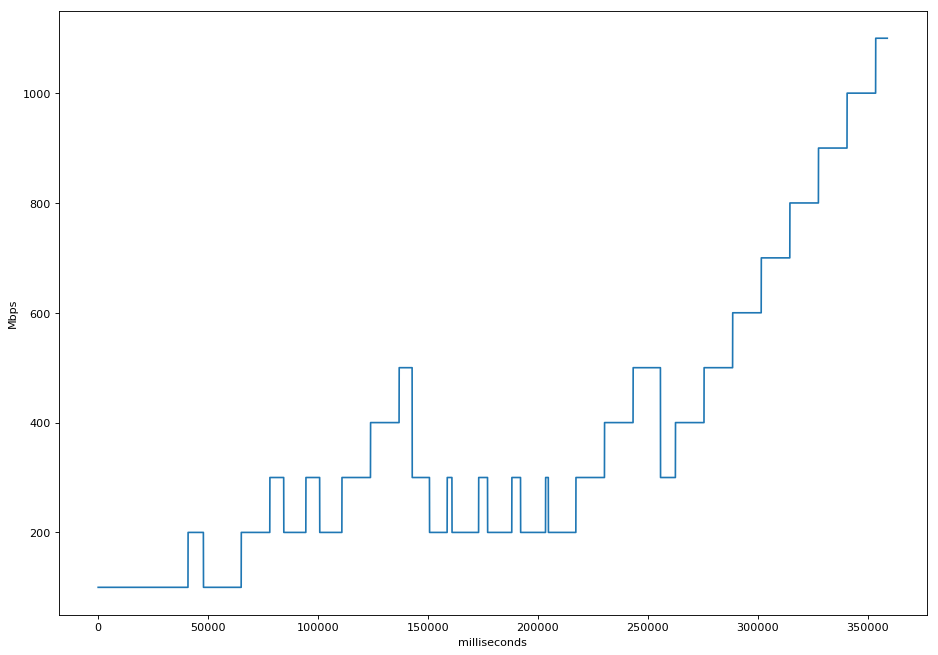

atla_dtn-denv_dtn-800000:0:0
(457640, 1087.2478849887848, 0.420915971710279)


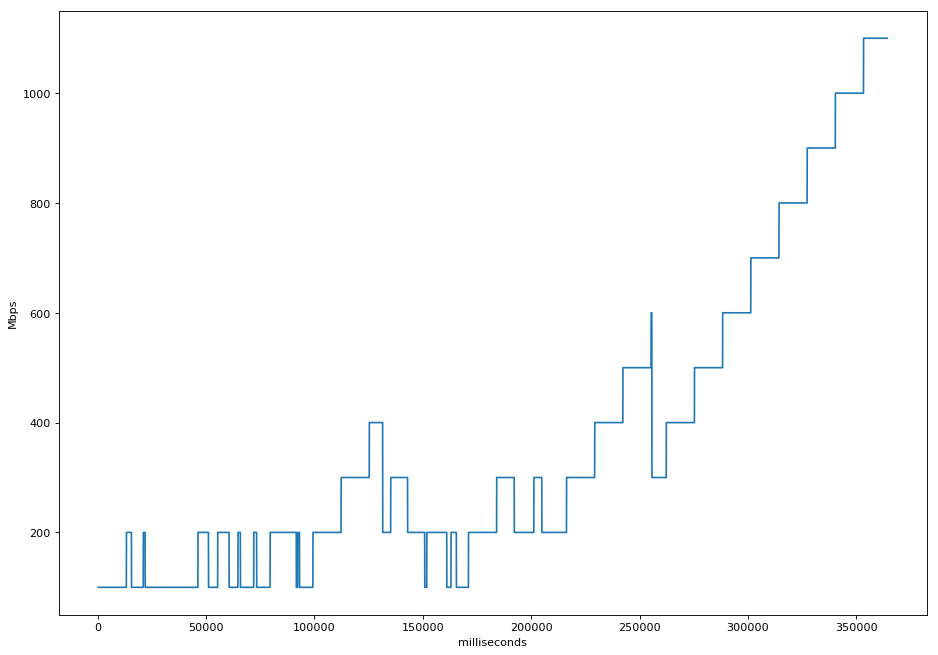

denv_dtn2-atla_dtn2-10000:39:0


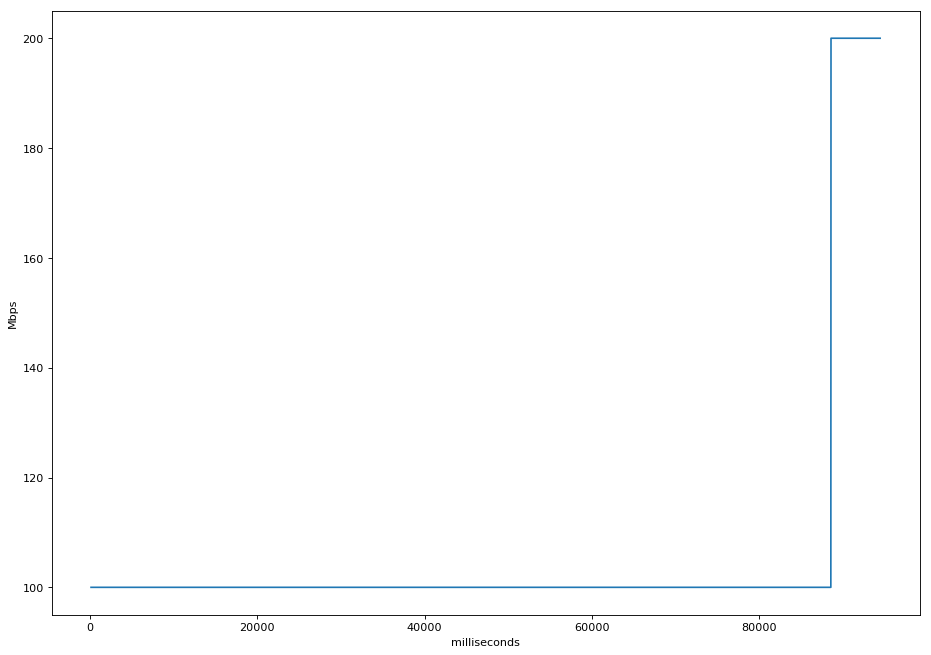

atla_dtn-denv_dtn-800000:0:2


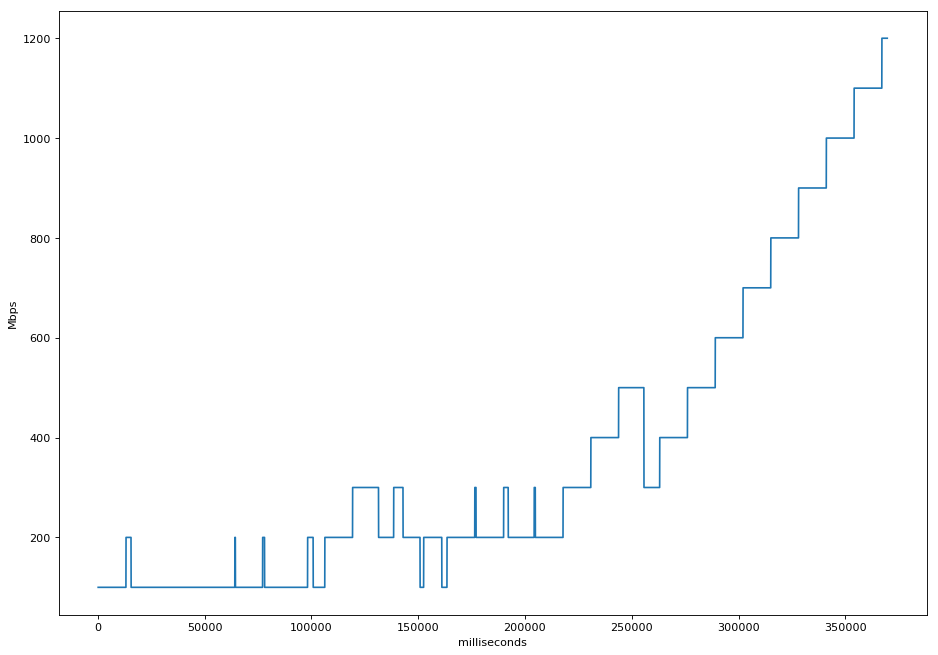

aofa_dtn2-cern_dtn2-10000:1:0


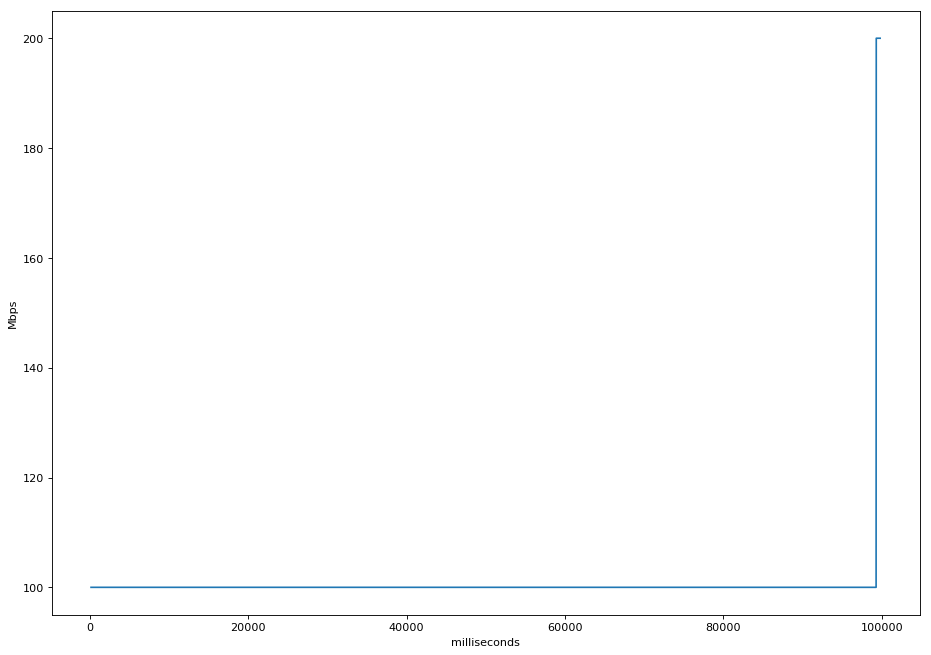

(457640, 1088.2497100830078, 0.4205284832697937)
atla_dtn2-star_dtn2-10000:35:0


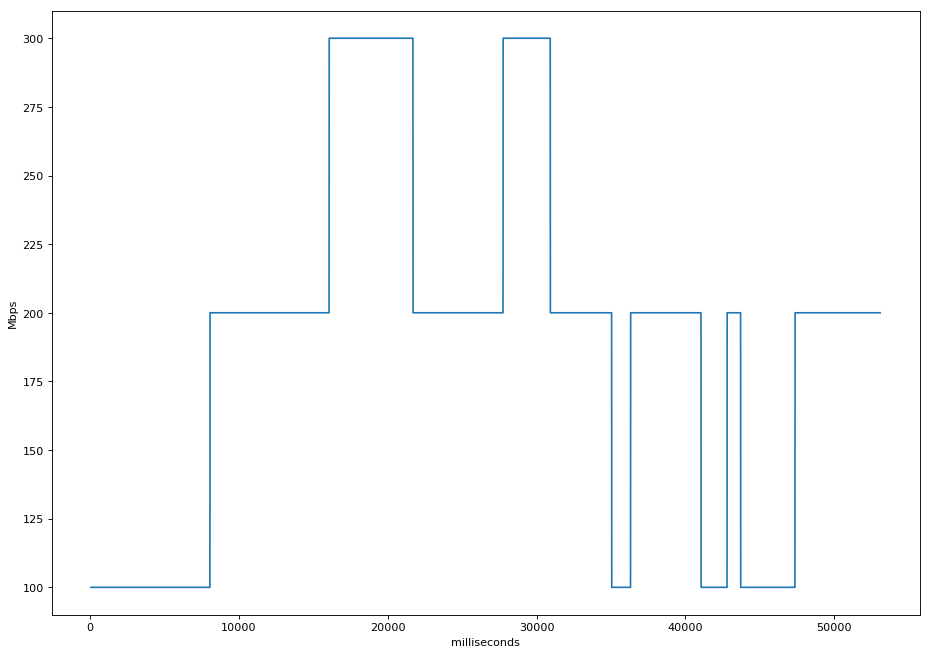

amst_dtn2-star_dtn2-10000:7:0


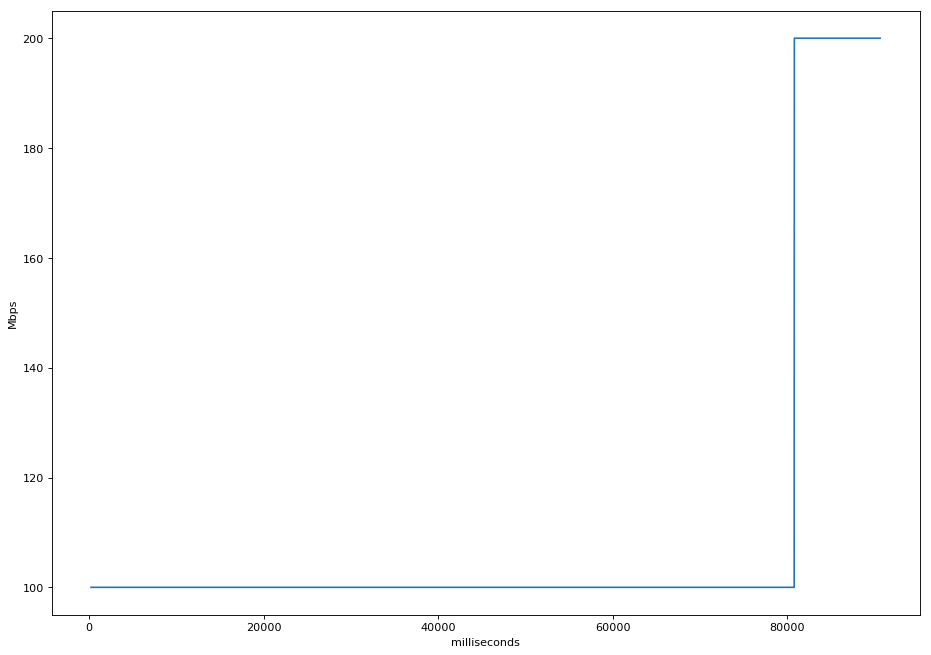

denv_dtn2-cern_dtn2-10000:35:0


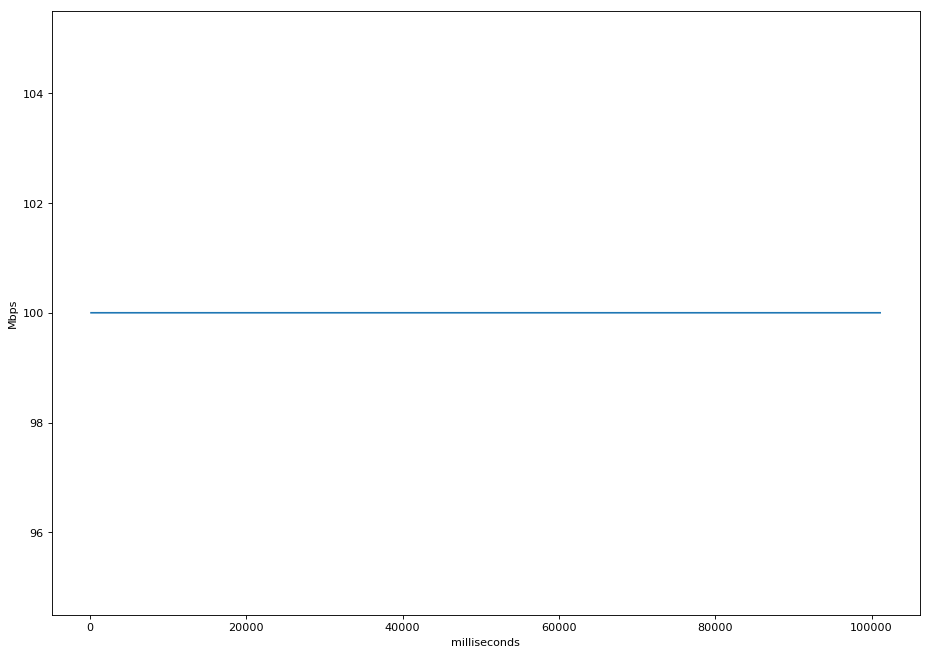

aofa_dtn2-wash_dtn2-10000:38:0
(457640, 1089.3071739673615, 0.4201202479308303)

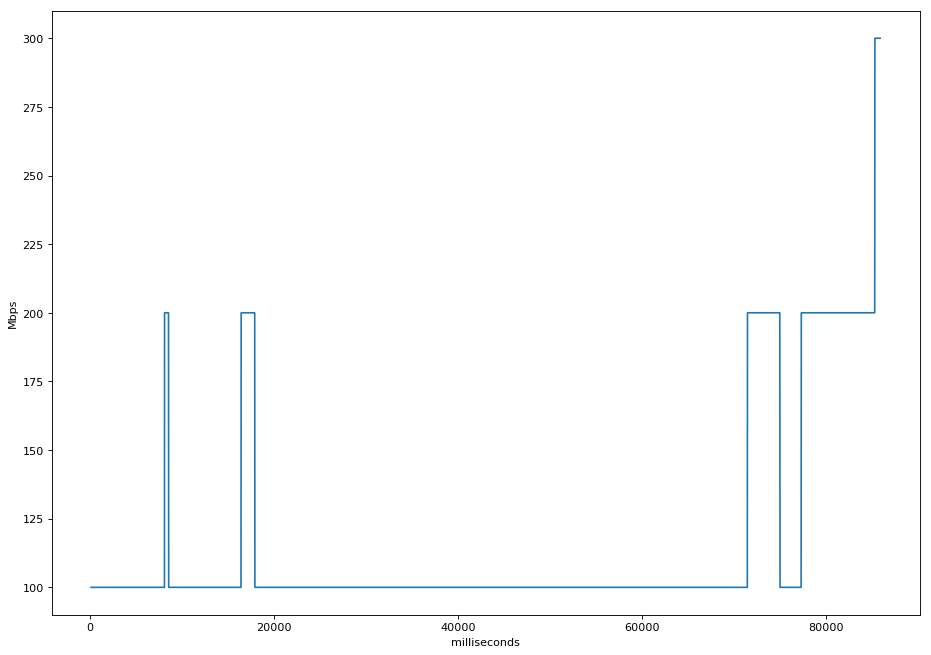


amst_dtn2-aofa_dtn2-10000:38:0


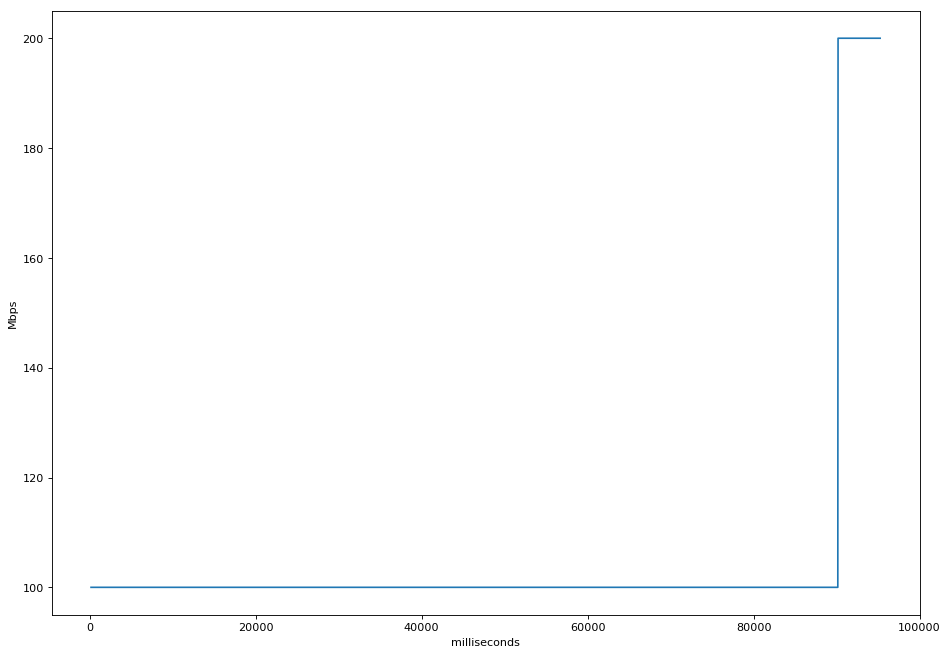

star_dtn2-cern_dtn2-10000:35:0


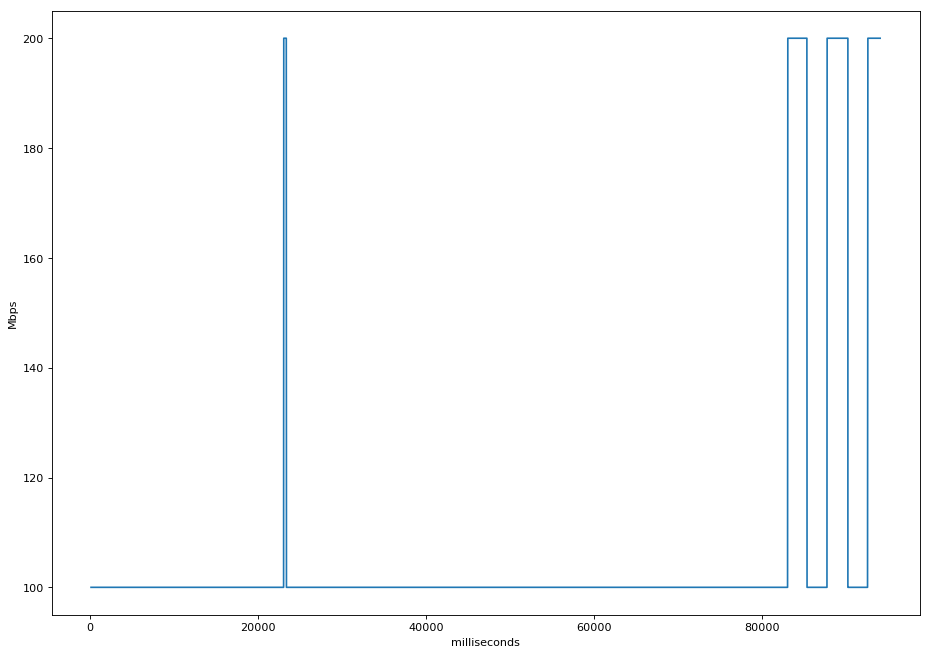

star_dtn2-amst_dtn2-10000:2:0


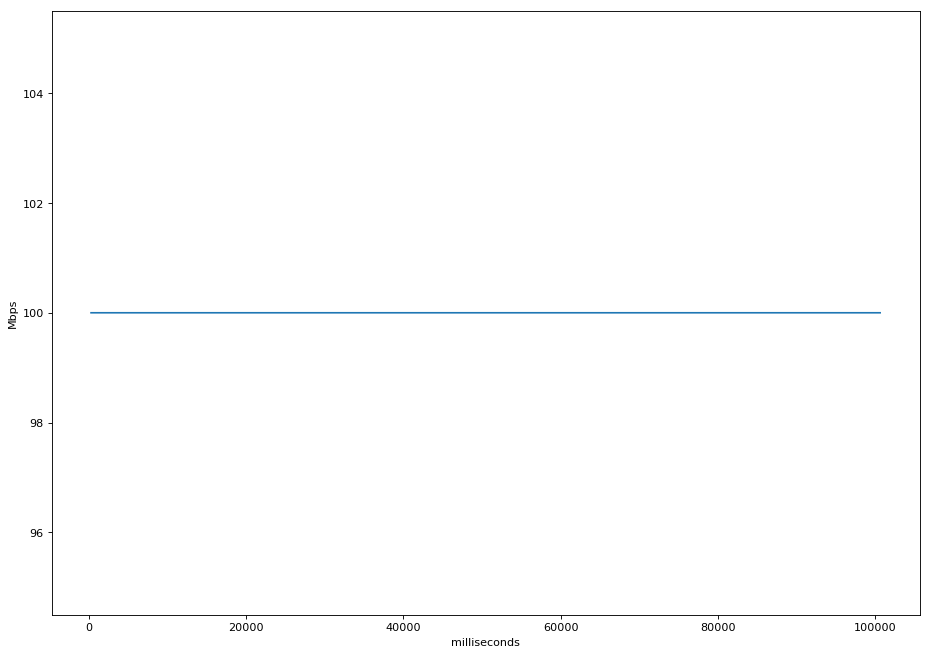

star_dtn2-aofa_dtn2-10000:37:0
(457640, 1090.3077890872955, 0.41973468829668154)


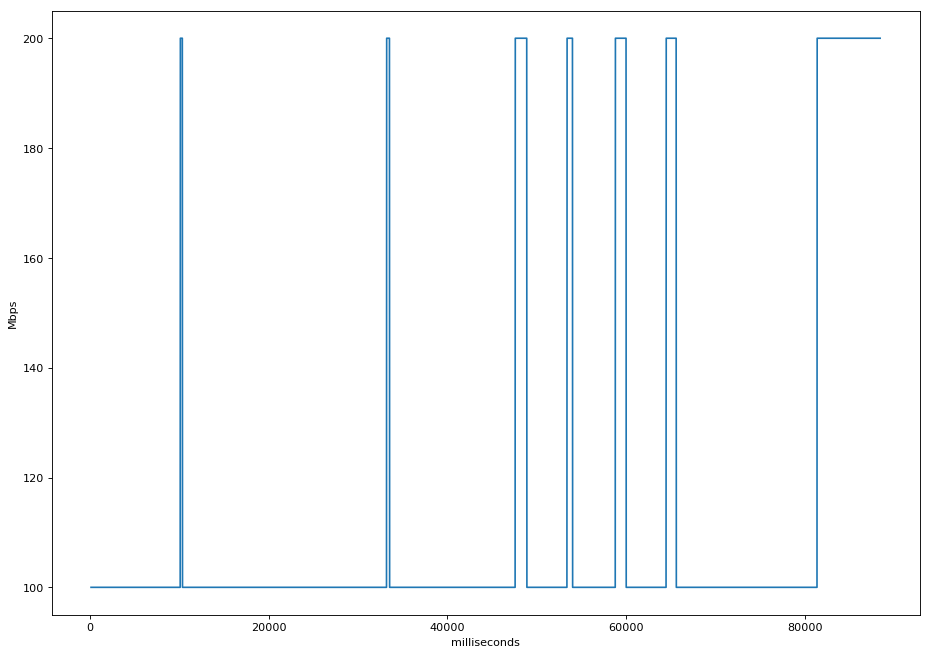

star_dtn2-amst_dtn2-10000:30:0


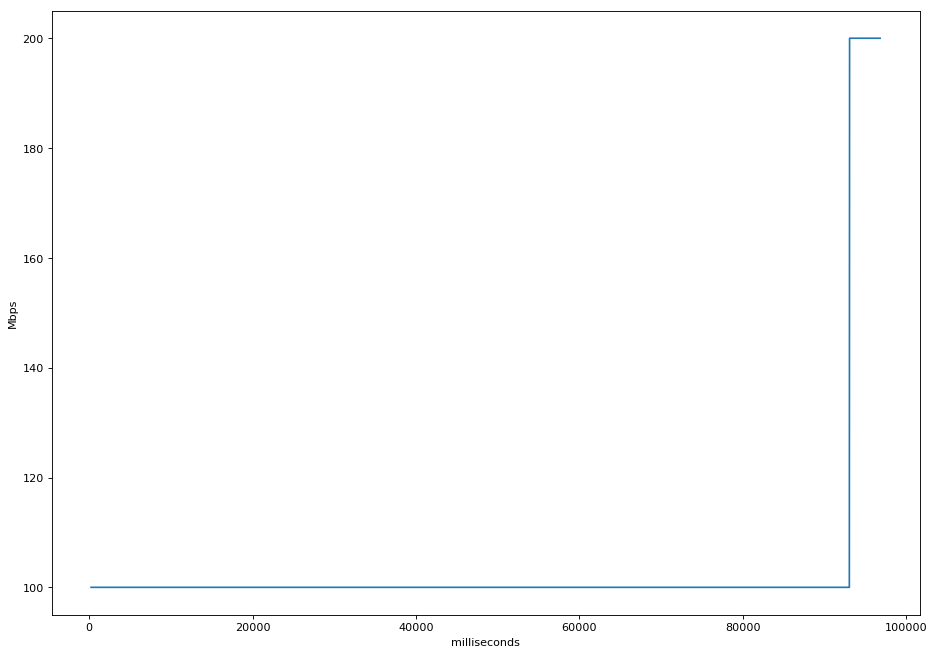

denv_dtn2-aofa_dtn2-10000:21:0


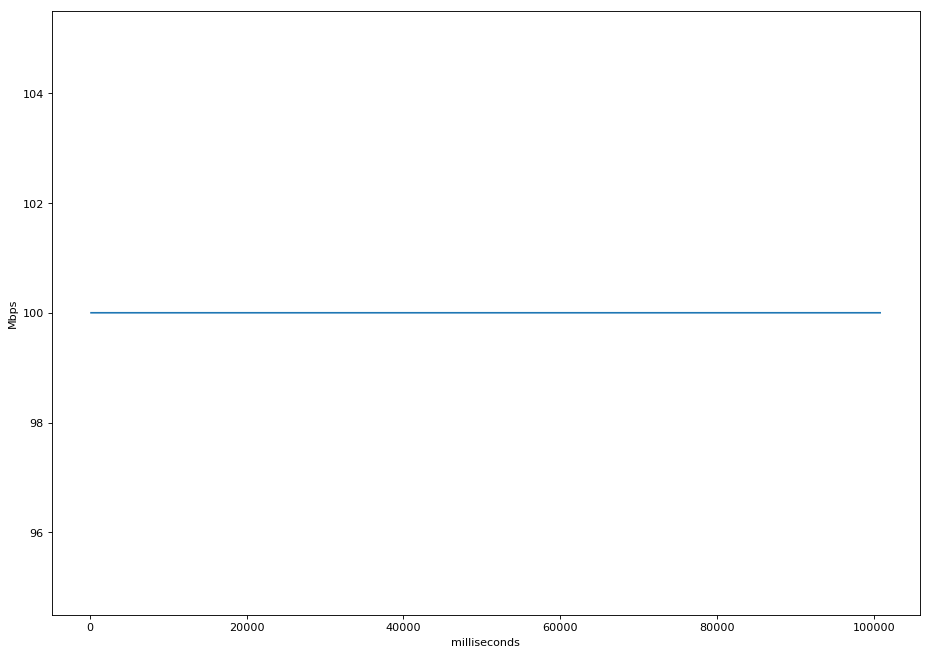

cern_dtn2-denv_dtn2-10000:20:0


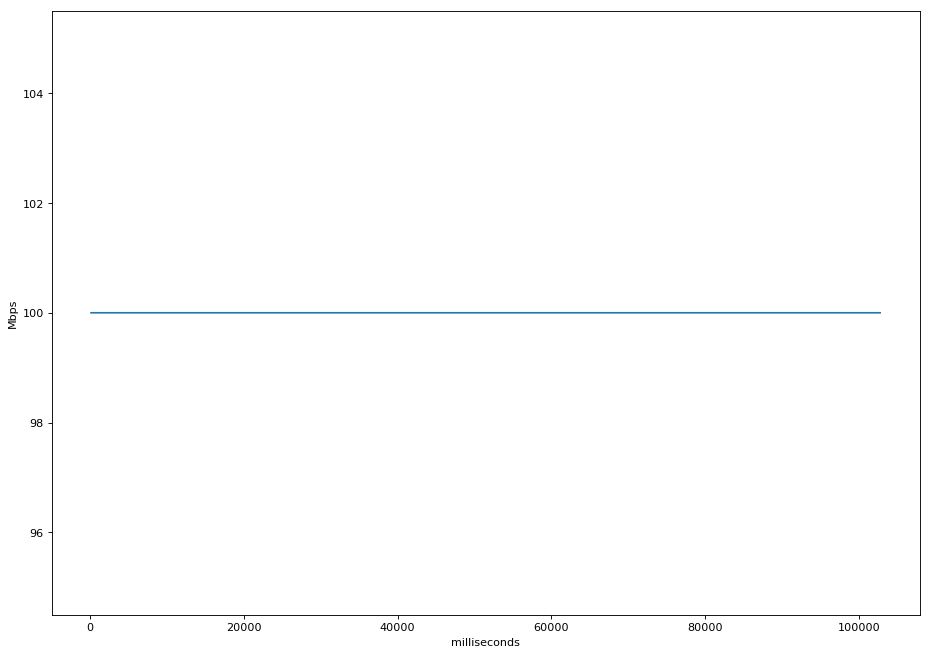

star_dtn2-amst_dtn2-10000:32:0
(457640, 1091.3670160770416, 0.4193273145133189)


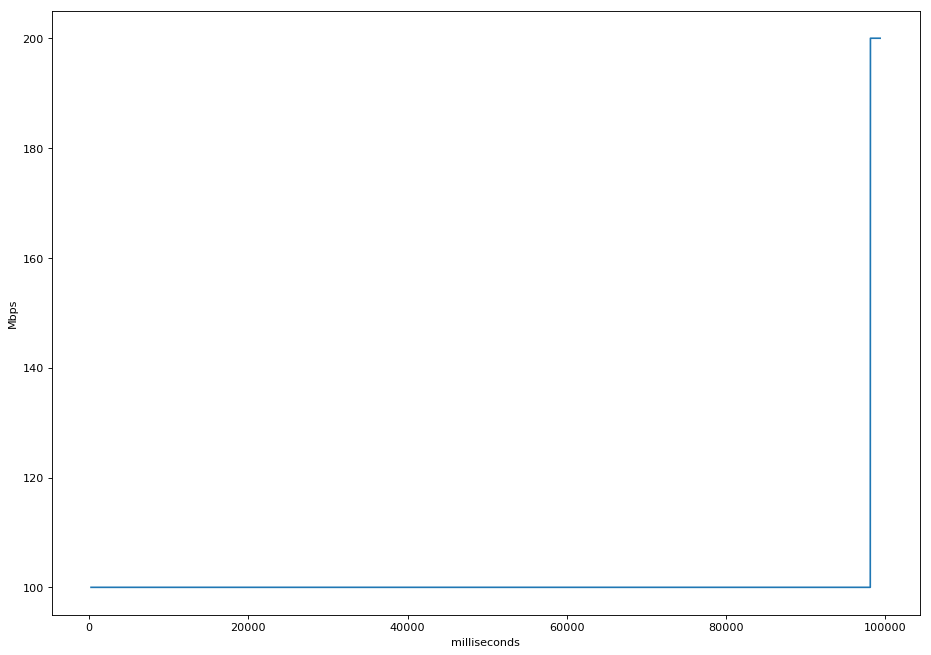

amst_dtn2-lbl_dtn2-10000:24:0


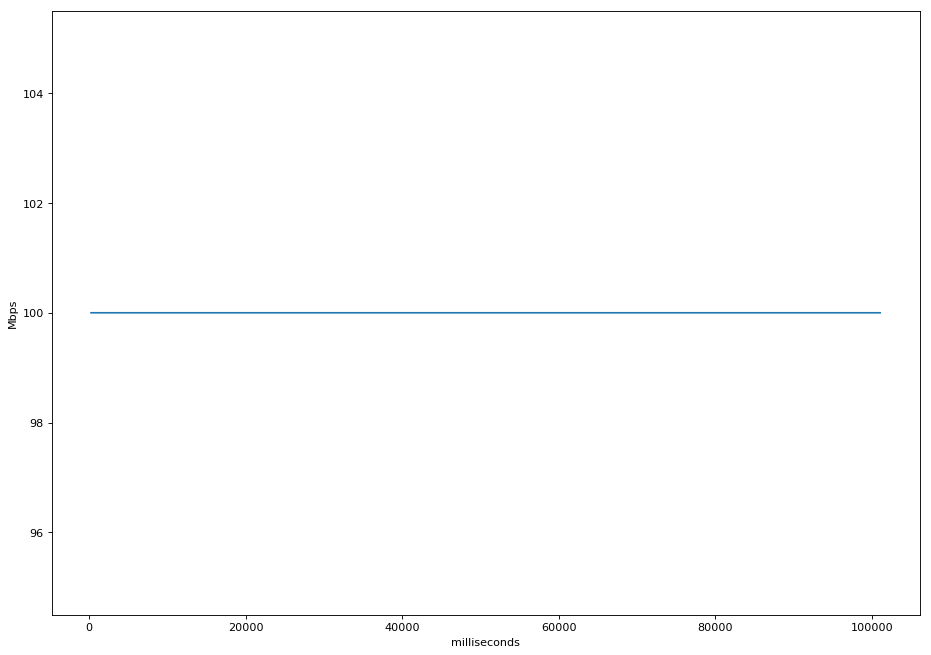

aofa_dtn2-atla_dtn2-10000:35:0


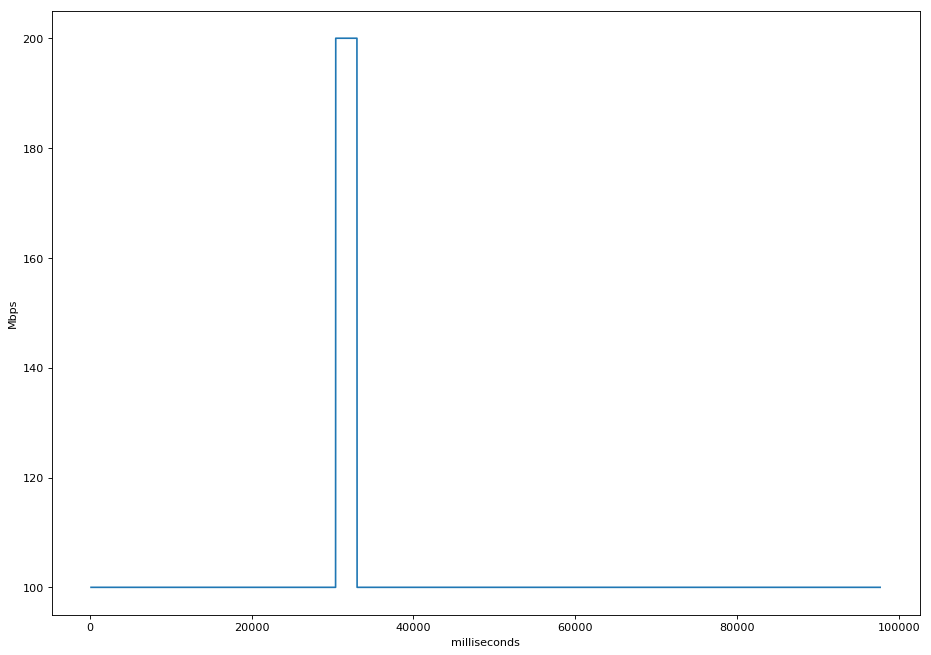

aofa_dtn2-amst_dtn2-10000:26:0


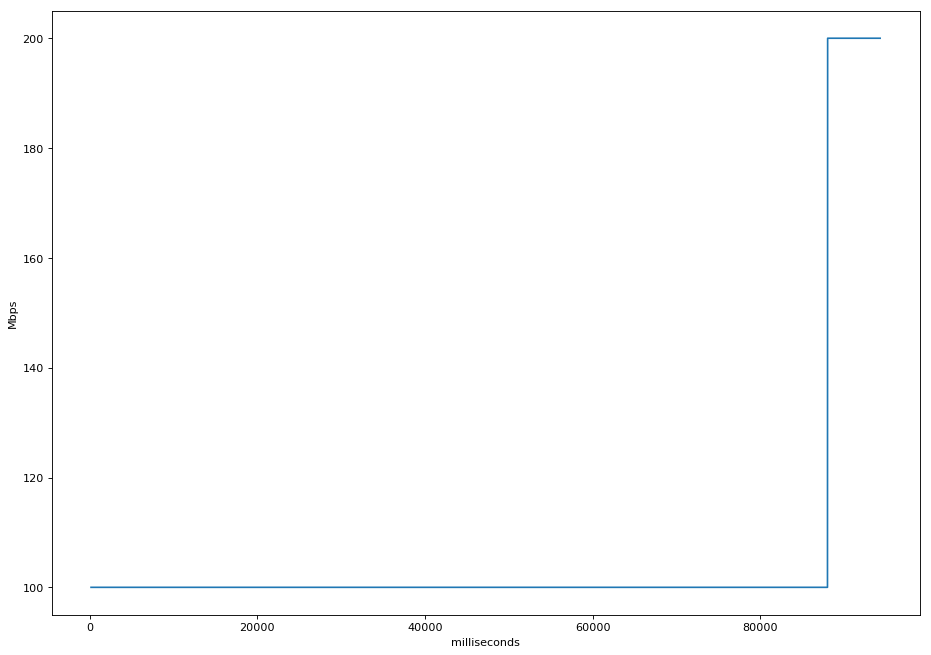

denv_dtn2-aofa_dtn2-10000:1:0
(457640, 1092.434471130371, 0.4189175754647029)


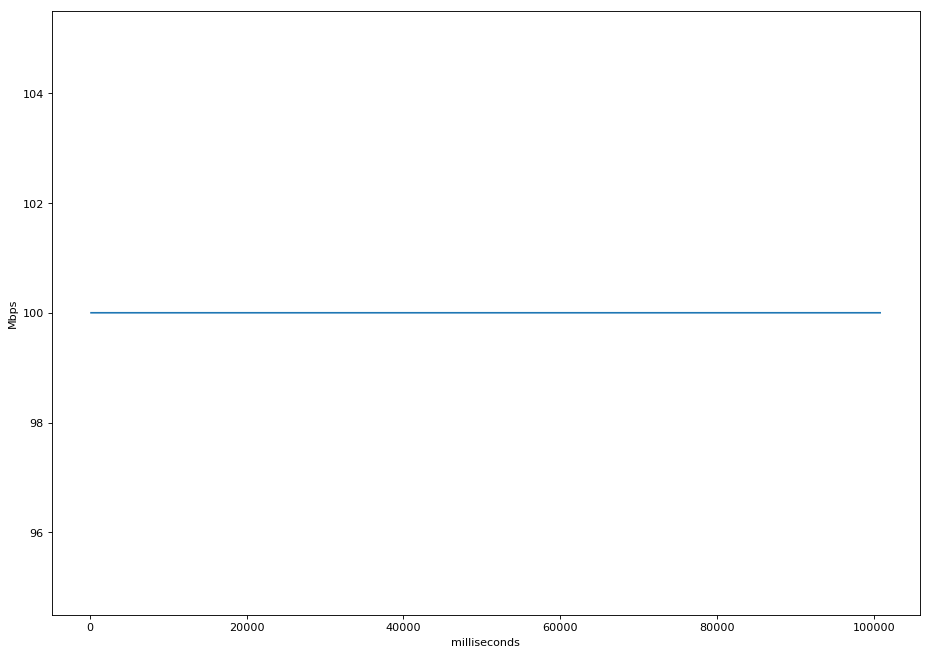

denv_dtn2-aofa_dtn2-10000:13:0


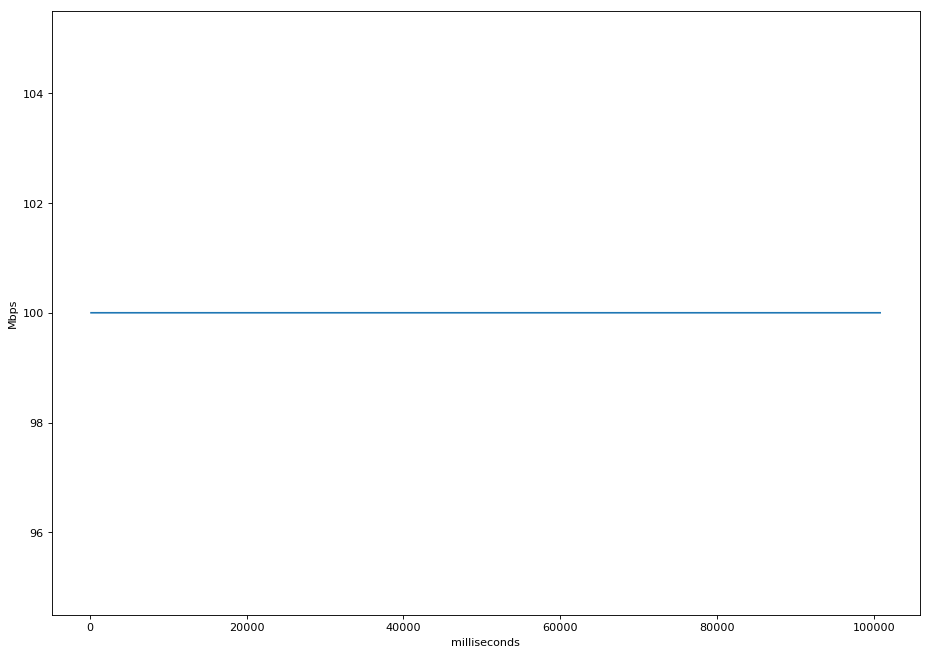

aofa_dtn2-amst_dtn2-10000:4:0


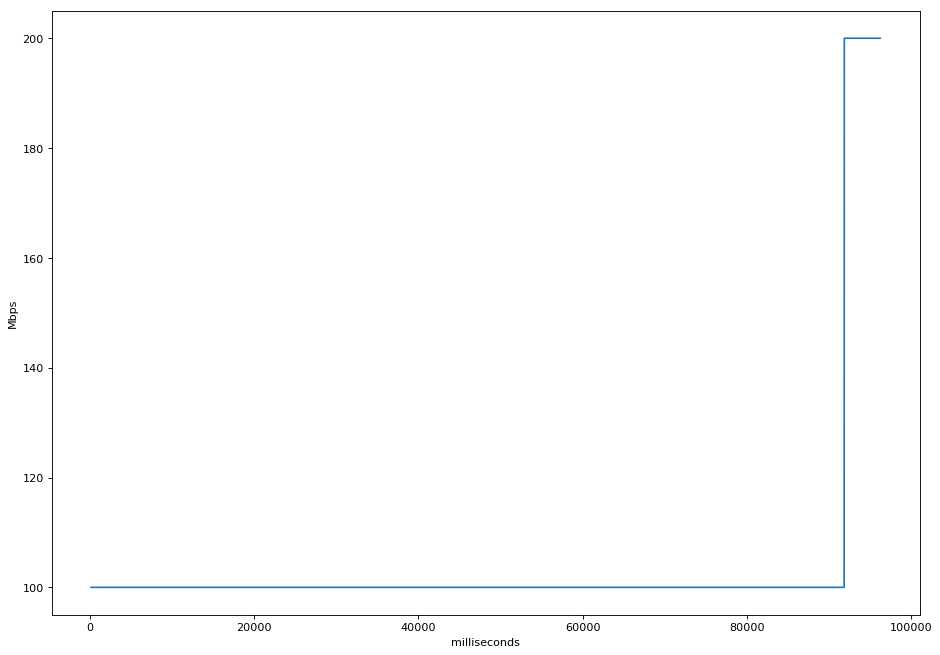

lbl_dtn2-atla_dtn2-10000:4:0


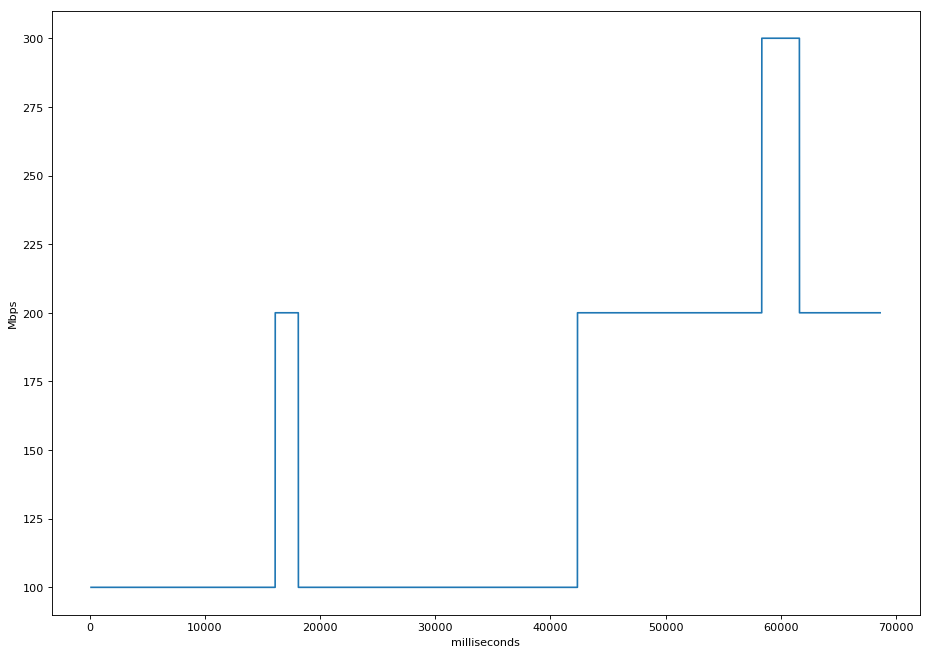

aofa_dtn2-amst_dtn2-10000:14:0
(457640, 1093.4397621154785, 0.41853242936273294)


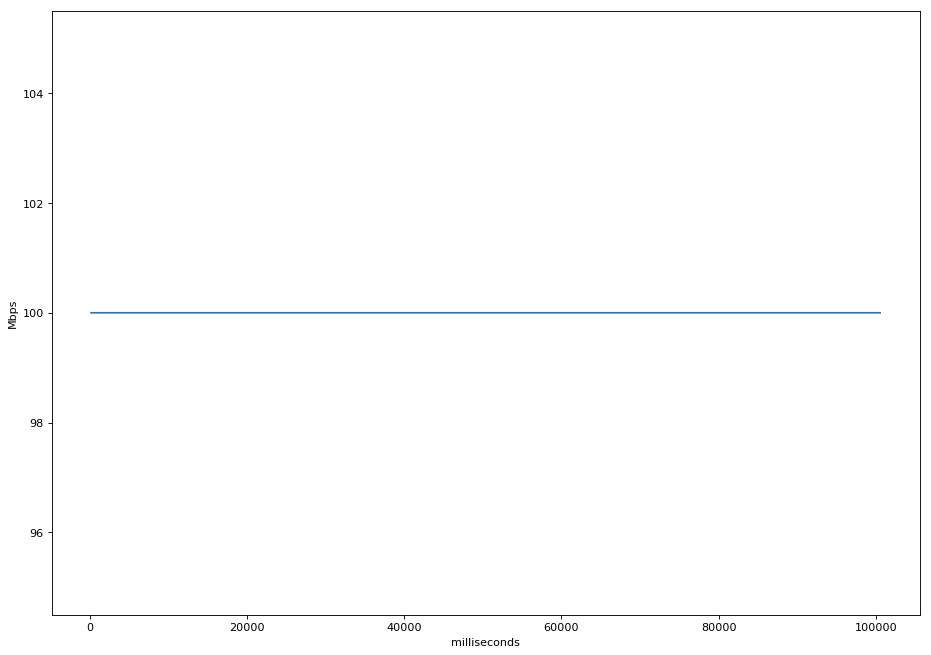

atla_dtn2-aofa_dtn2-10000:38:0


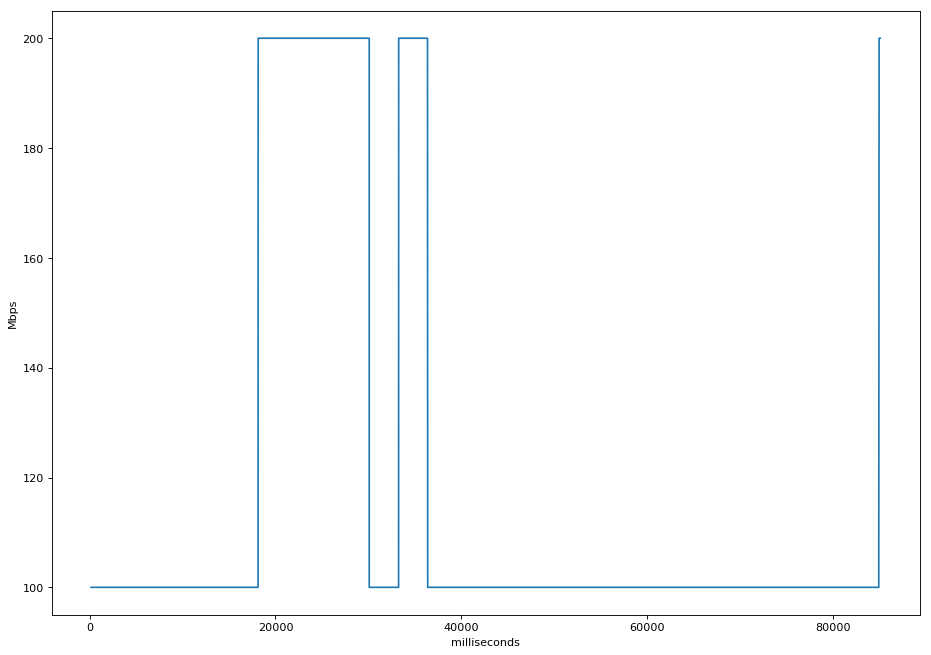

lbl_dtn2-denv_dtn2-10000:31:0


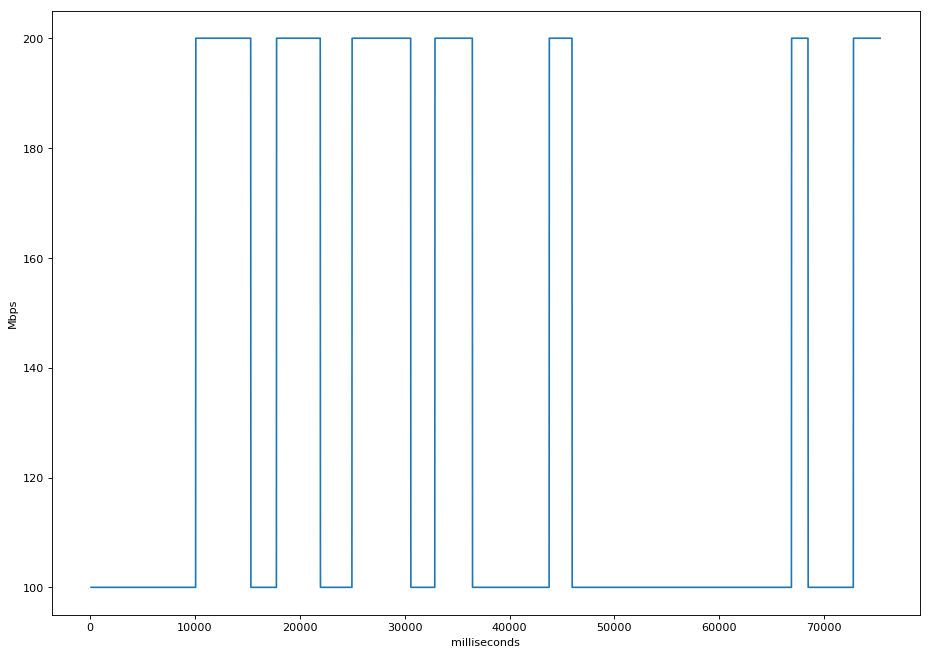

cern_dtn2-atla_dtn2-10000:13:0


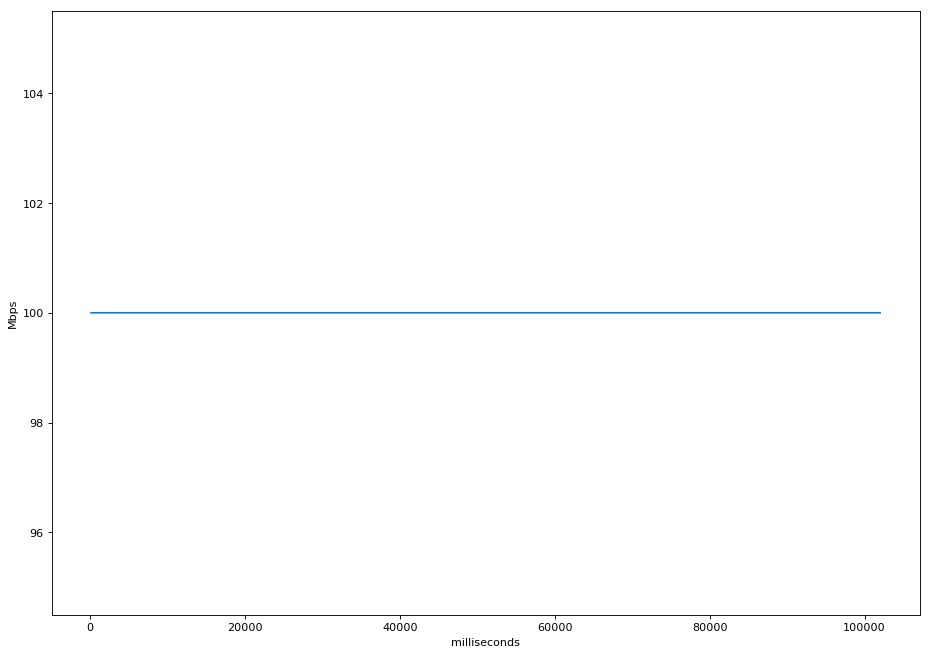

(457640, 1094.4459021091461, 0.4181476664292547)
lbl_dtn2-cern_dtn2-10000:37:0


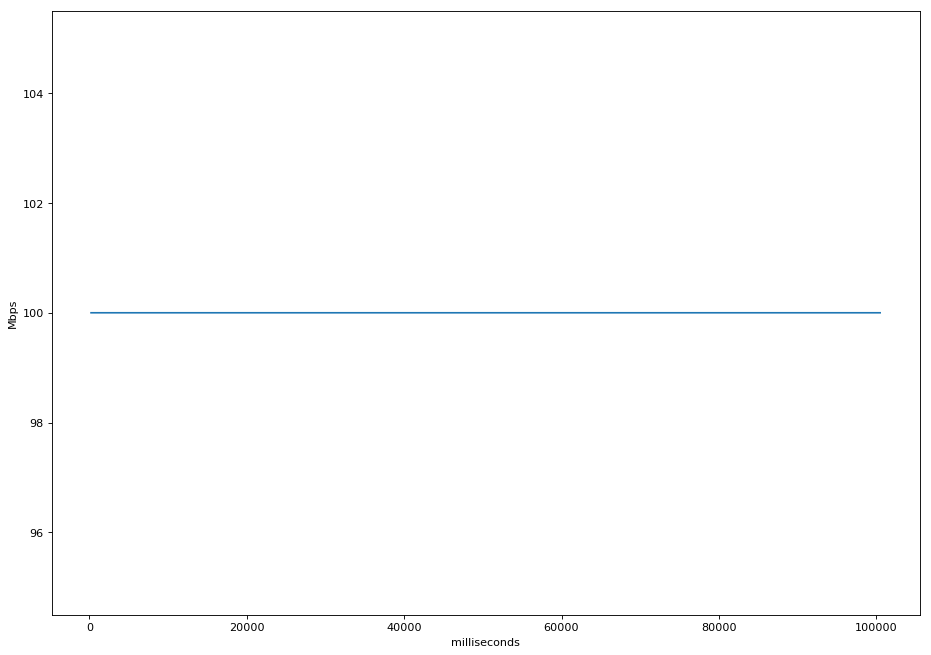

cern_dtn2-star_dtn2-10000:18:0


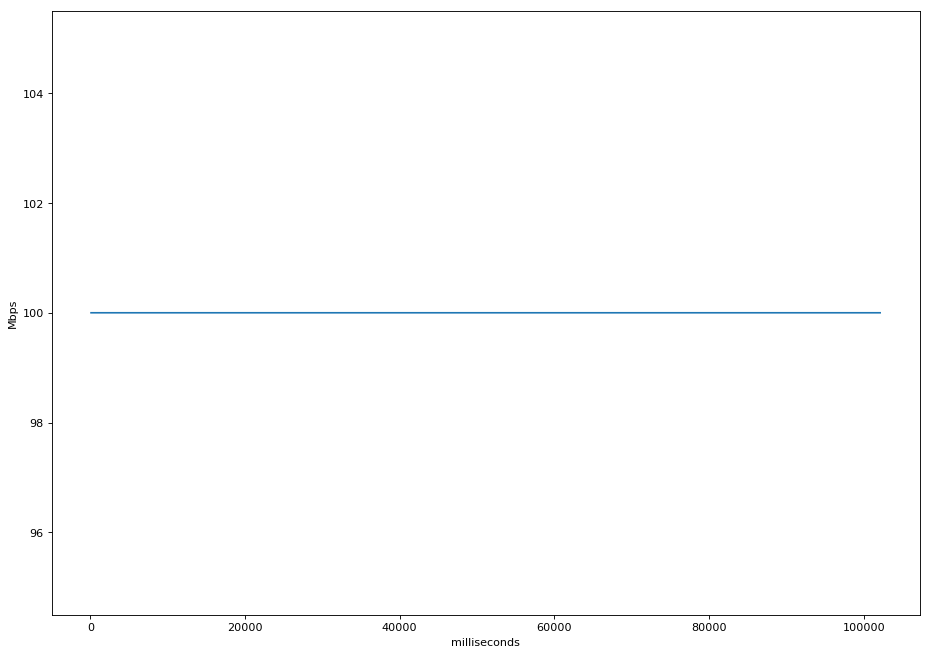

amst_dtn2-denv_dtn2-10000:39:0


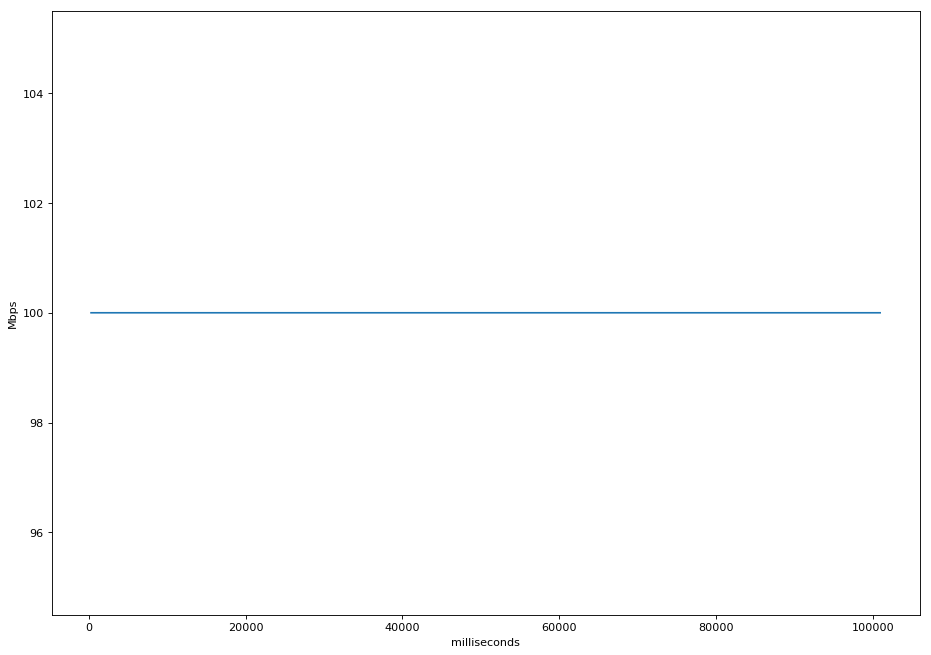

aofa_dtn2-lbl_dtn2-10000:33:0
(457640, 1095.5085201263428, 0.41774207282953973)


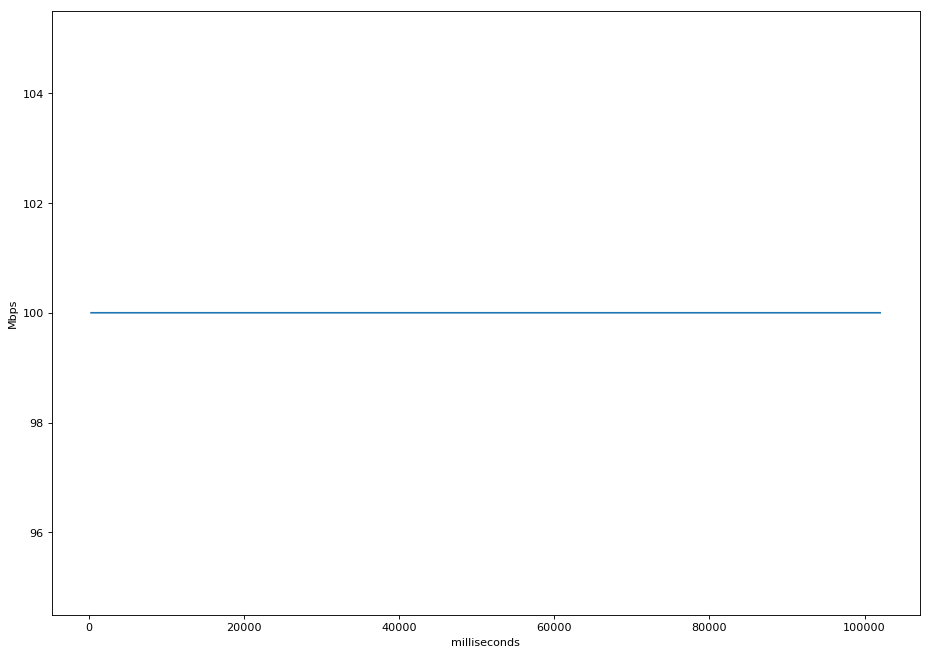

aofa_dtn2-star_dtn2-10000:21:0


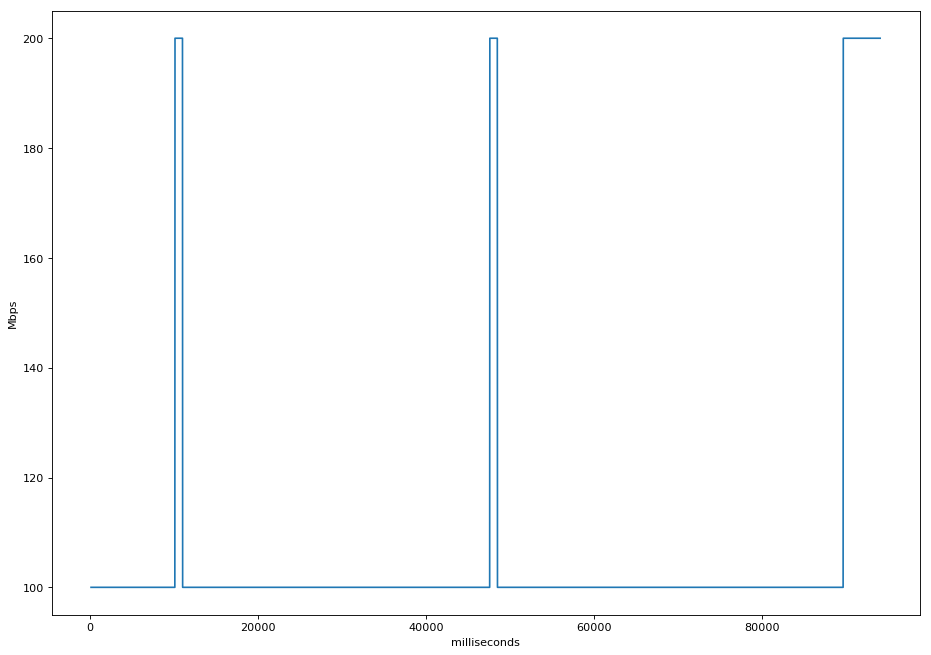

wash_dtn2-denv_dtn2-10000:7:0


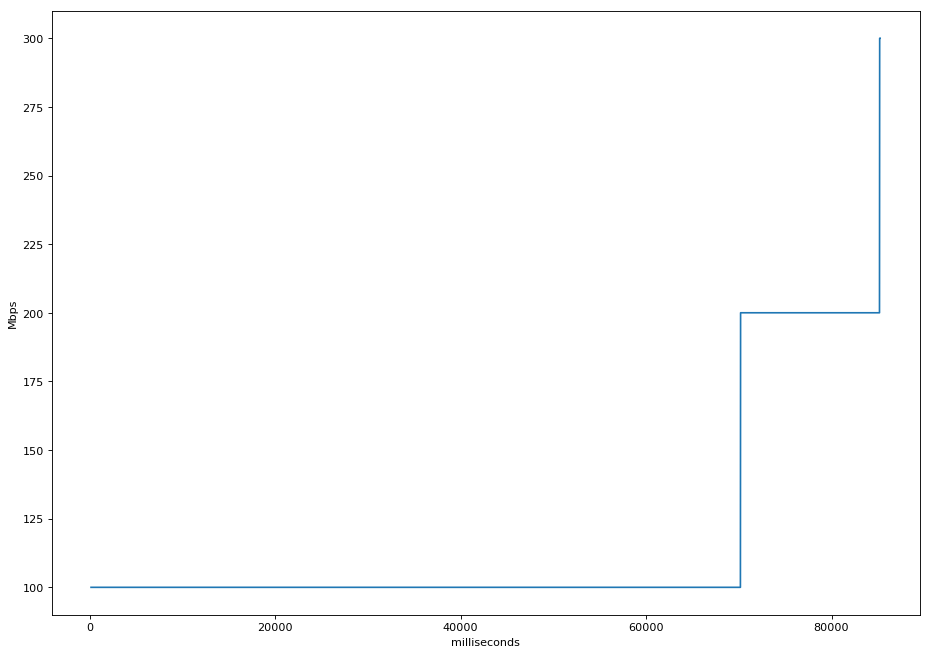

atla_dtn2-aofa_dtn2-10000:24:0


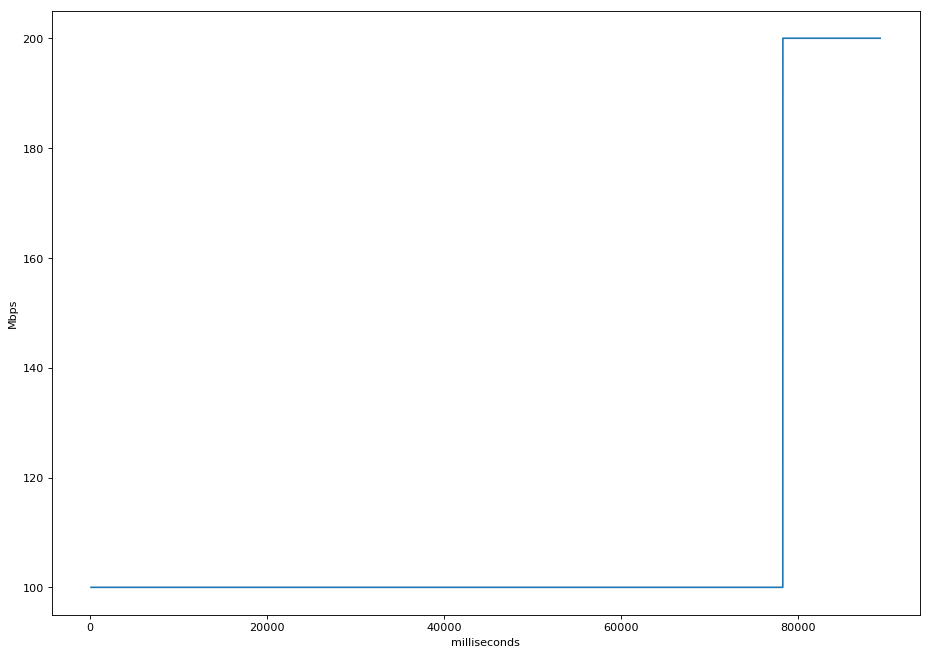

cern_dtn2-lbl_dtn2-10000:14:0
(457640, 1096.521362066269, 0.41735621013131)


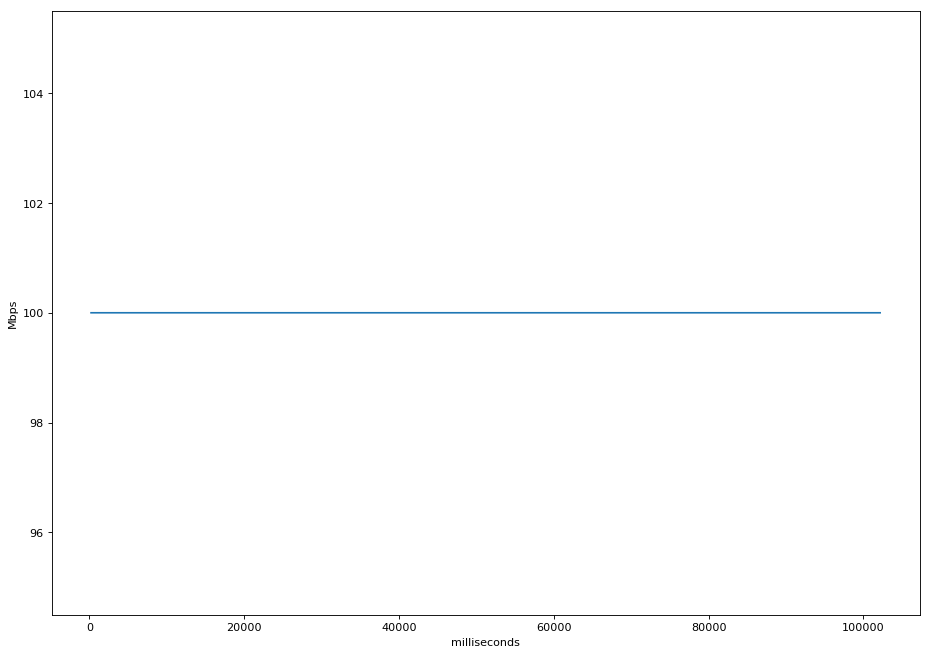

cern_dtn2-lbl_dtn2-10000:12:0


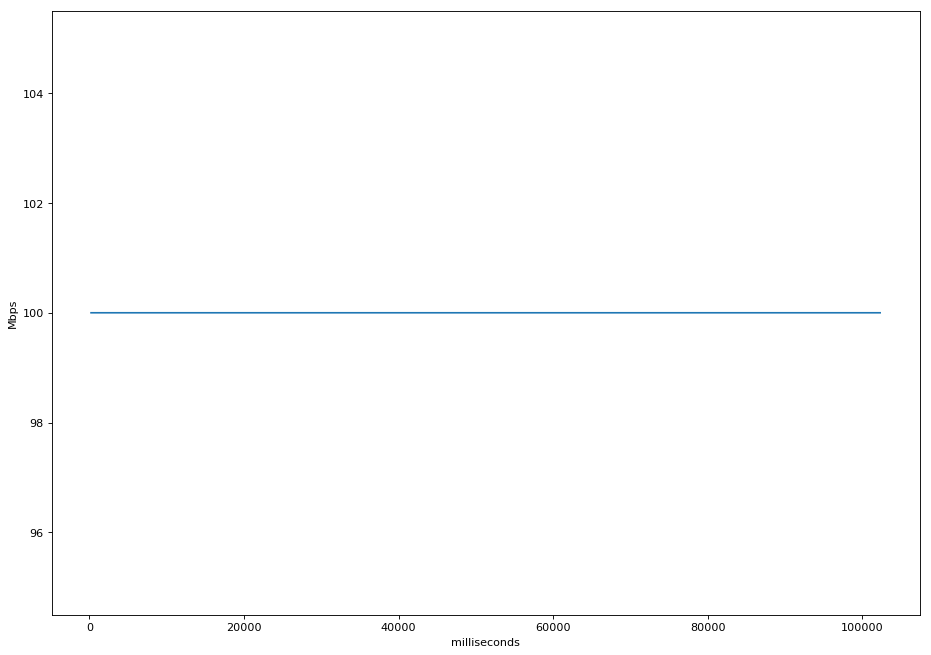

star_dtn2-denv_dtn2-10000:14:0


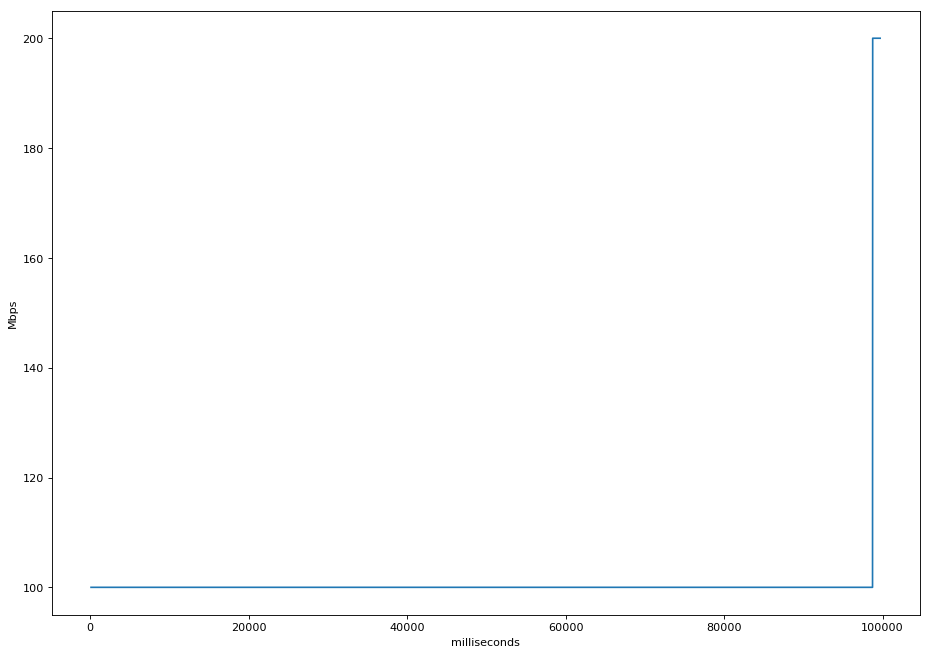

atla_dtn2-cern_dtn2-10000:14:0


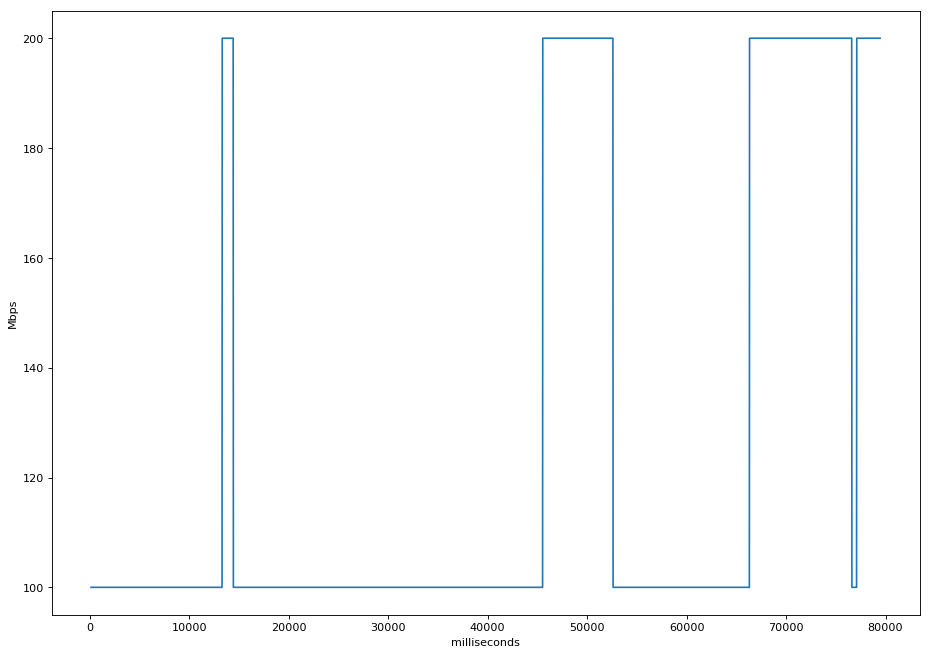

star_dtn2-denv_dtn2-10000:24:0
(457640, 1097.6266350746155, 0.4169359465014168)


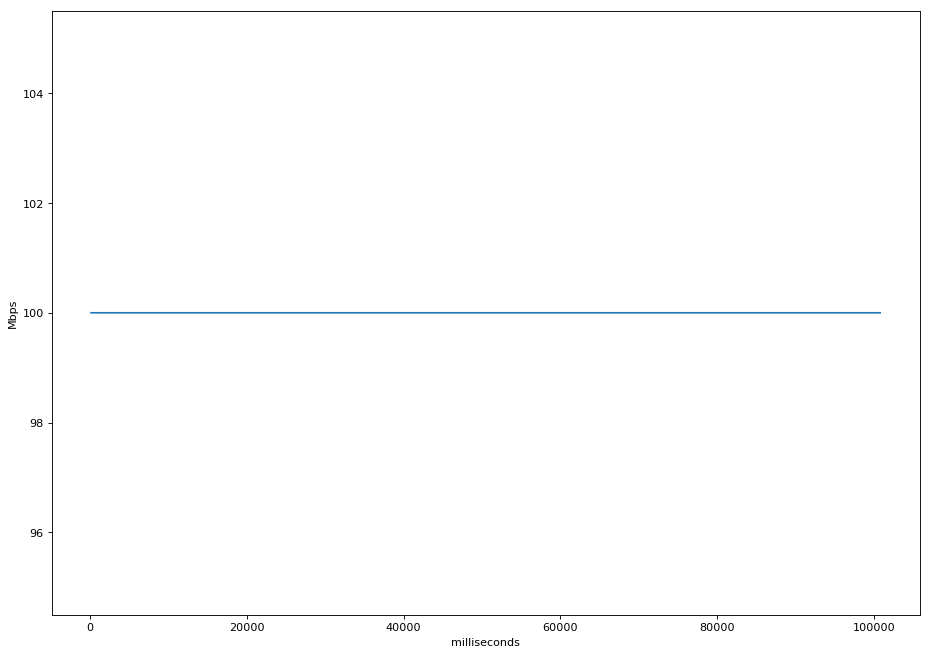

amst_dtn2-aofa_dtn2-10000:9:0


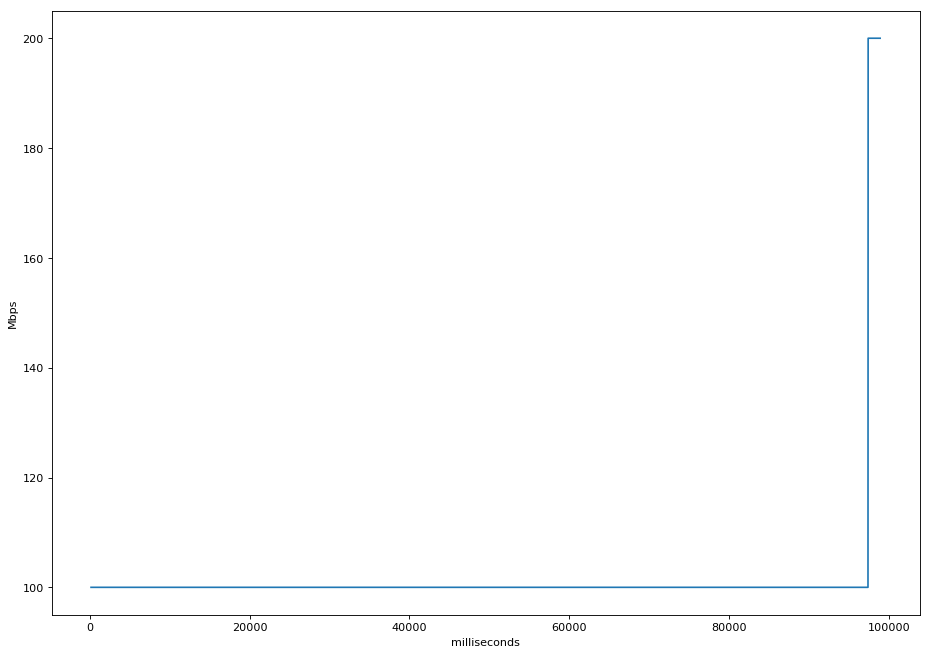

cern_dtn2-amst_dtn2-10000:0:0


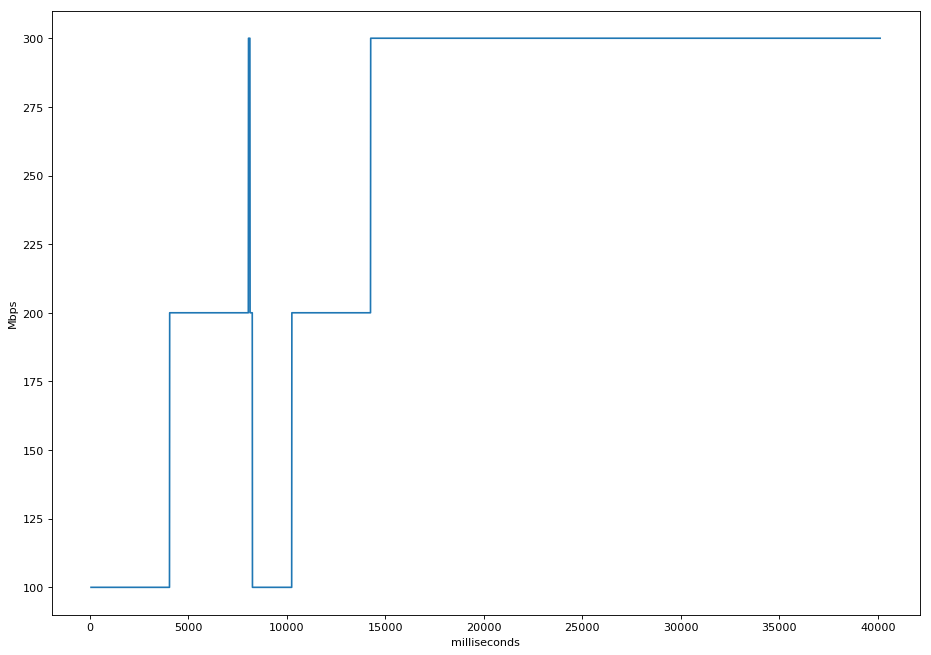

wash_dtn2-lbl_dtn2-10000:31:0


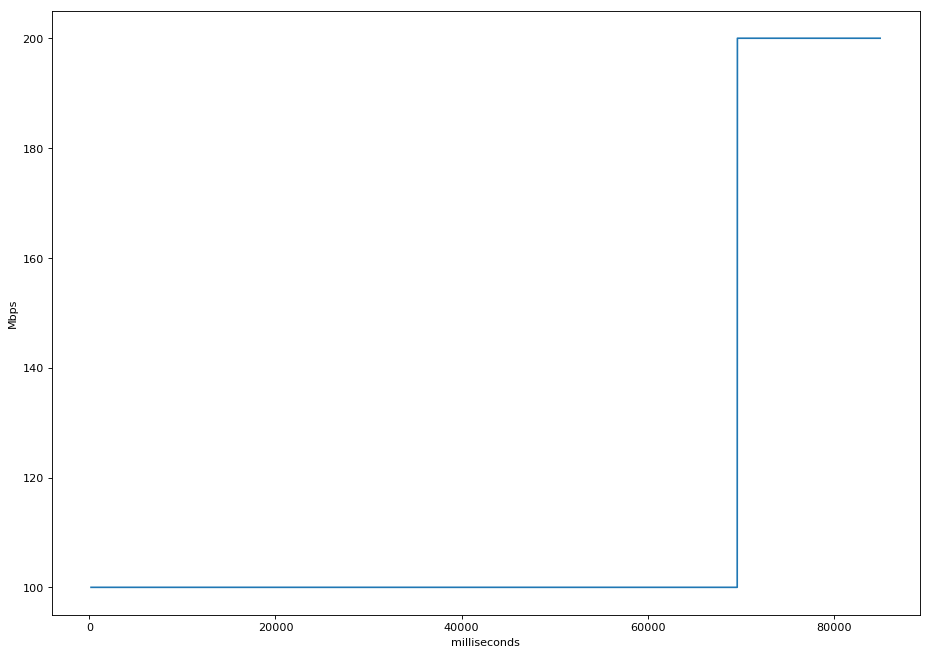

lbl_dtn-denv_dtn-800000:0:4
(457640, 1098.6303780078888, 0.4165550208340533)


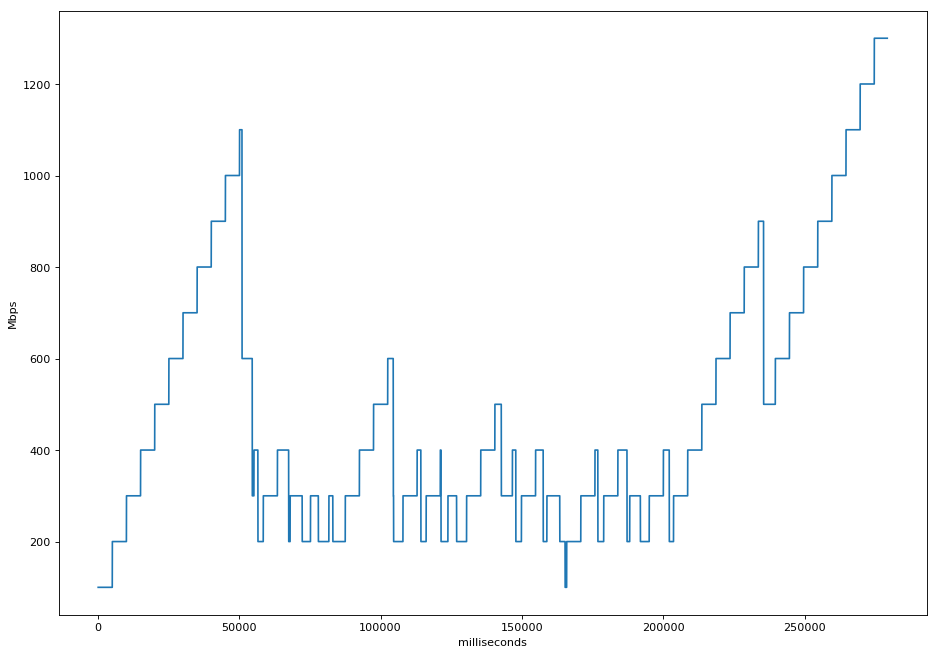

lbl_dtn-denv_dtn-800000:0:5


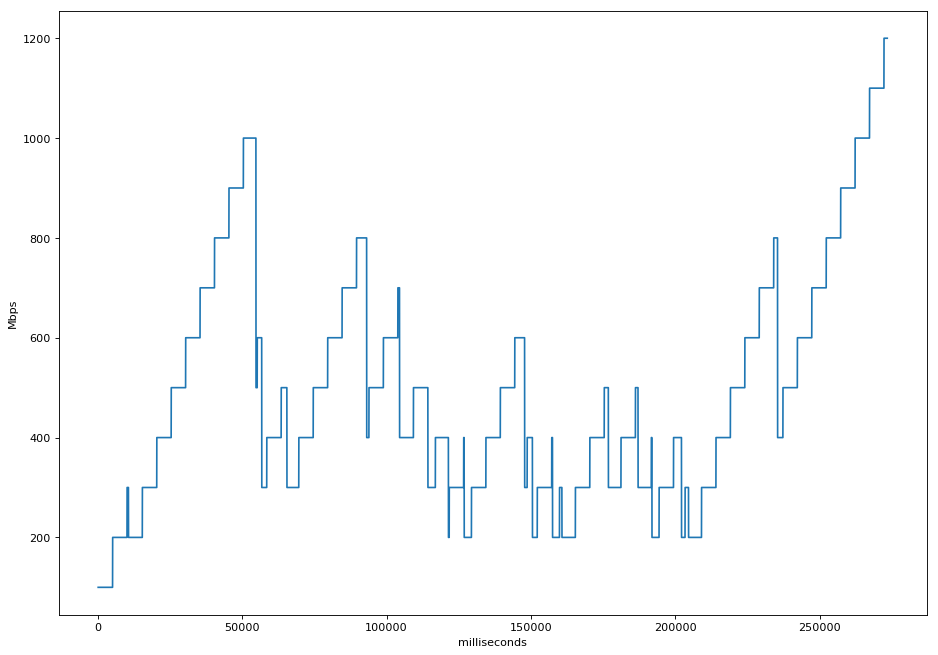

aofa_dtn2-star_dtn2-10000:19:0


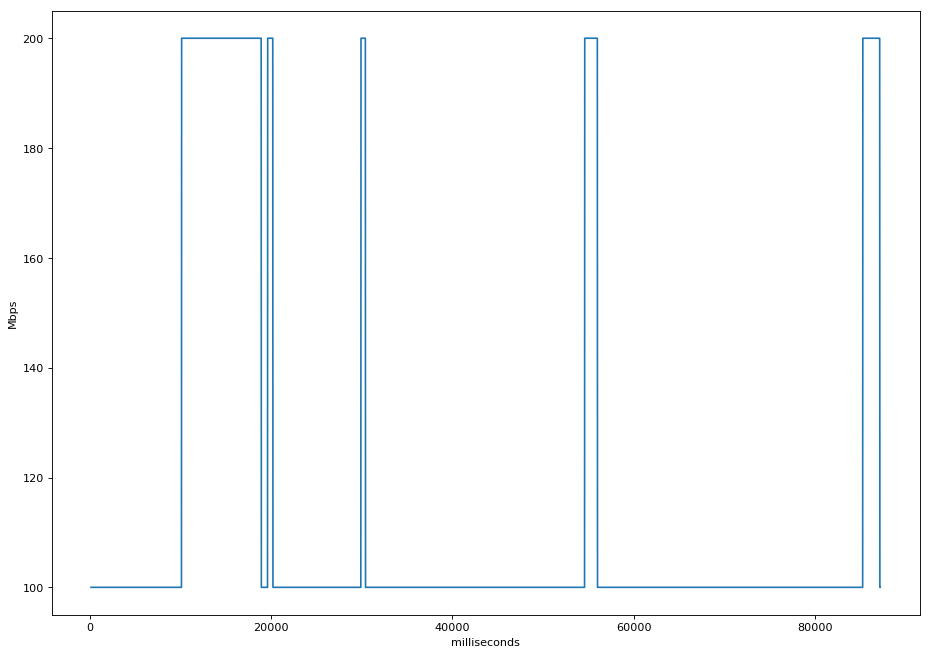

lbl_dtn-denv_dtn-800000:0:3
(457640, 1099.638365983963, 0.4161731839817184)


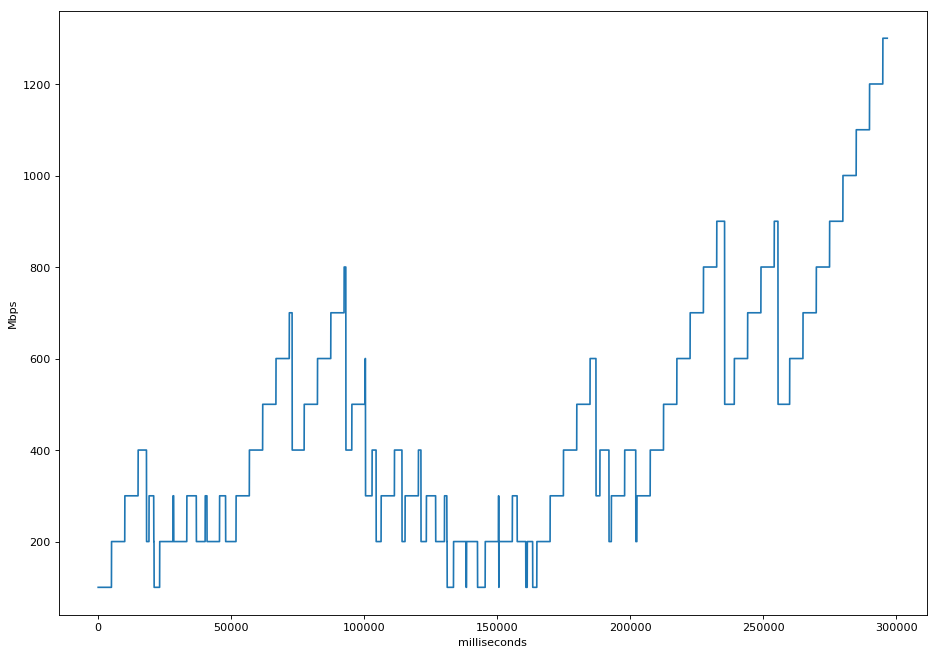

lbl_dtn-denv_dtn-800000:0:0


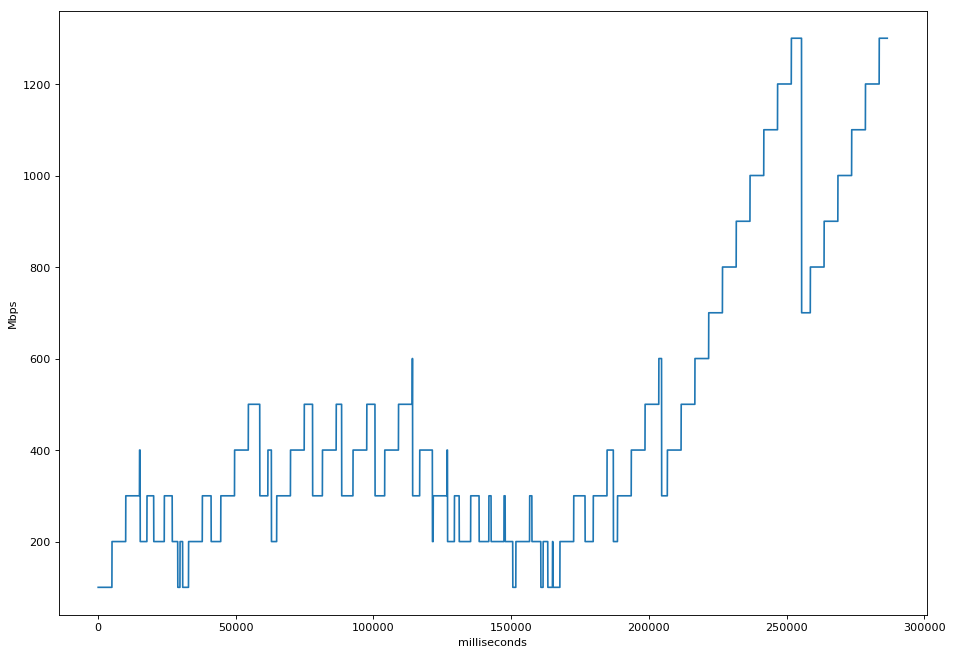

lbl_dtn-denv_dtn-800000:0:1


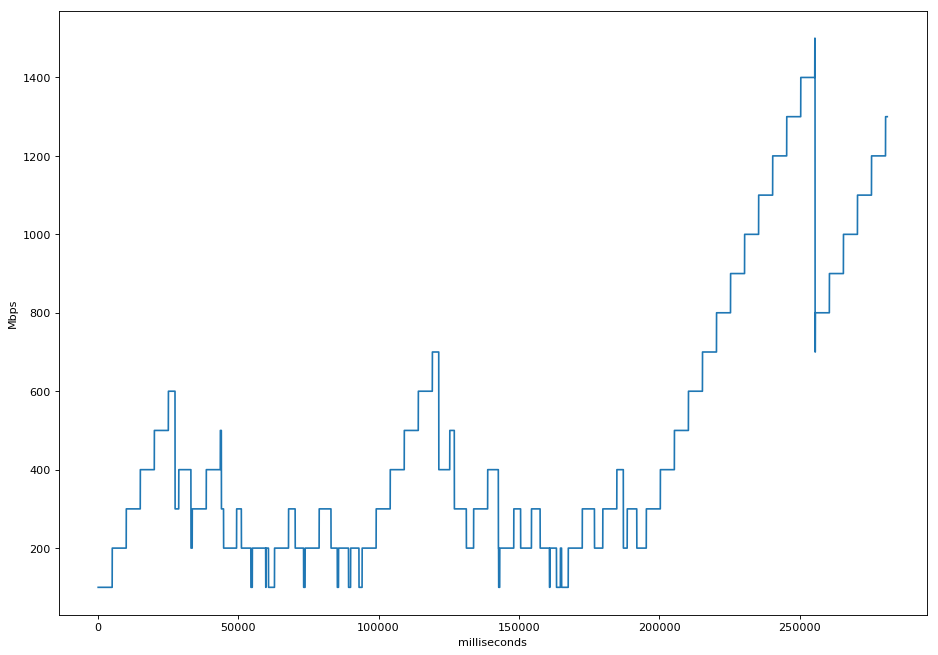

amst_dtn2-lbl_dtn2-10000:5:0


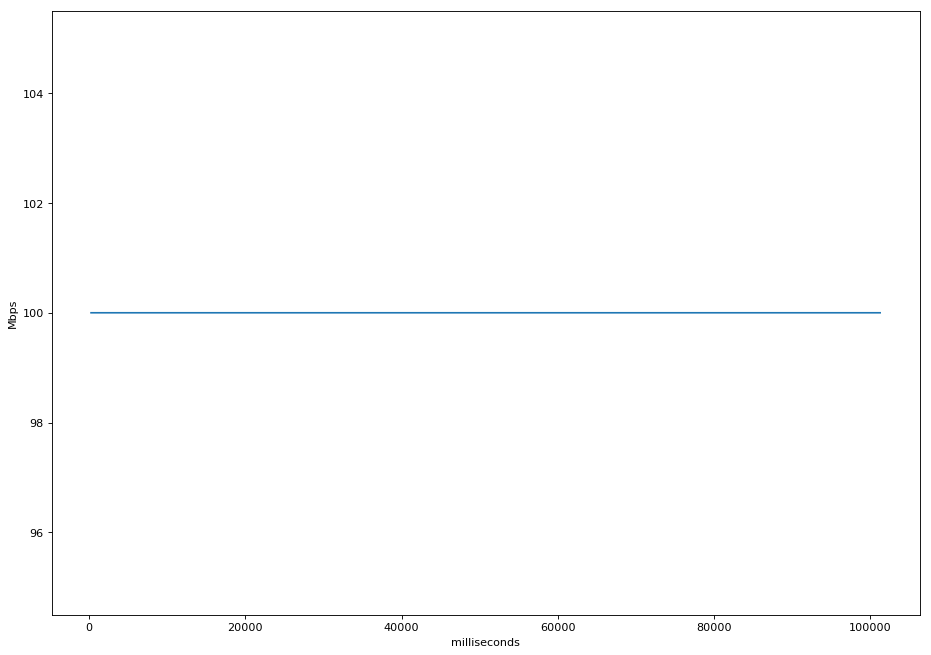

(457640, 1100.6434609889984, 0.4157931393957324)
amst_dtn2-star_dtn2-10000:14:0


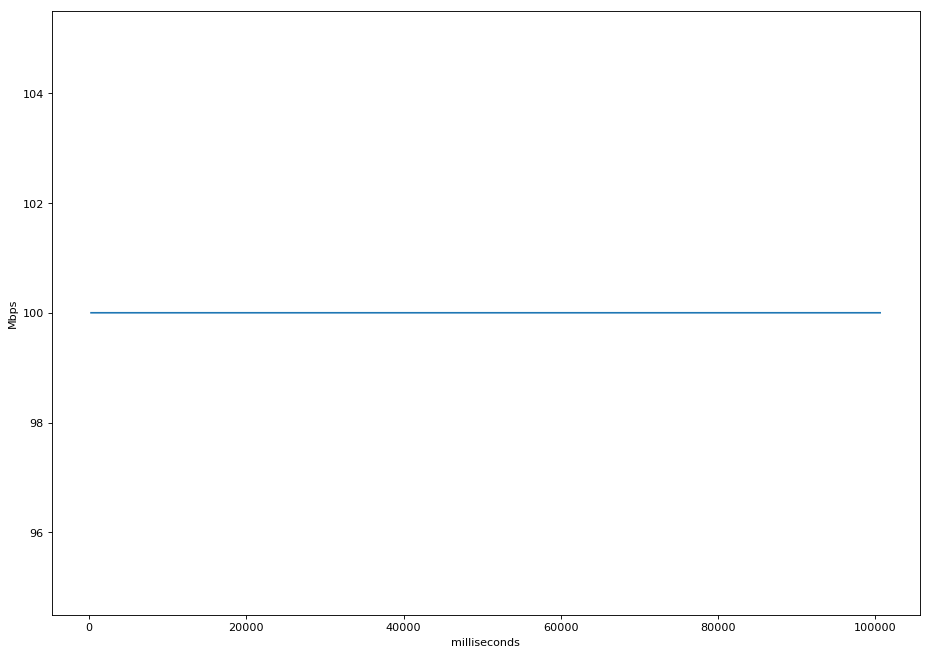

lbl_dtn2-star_dtn2-10000:7:0


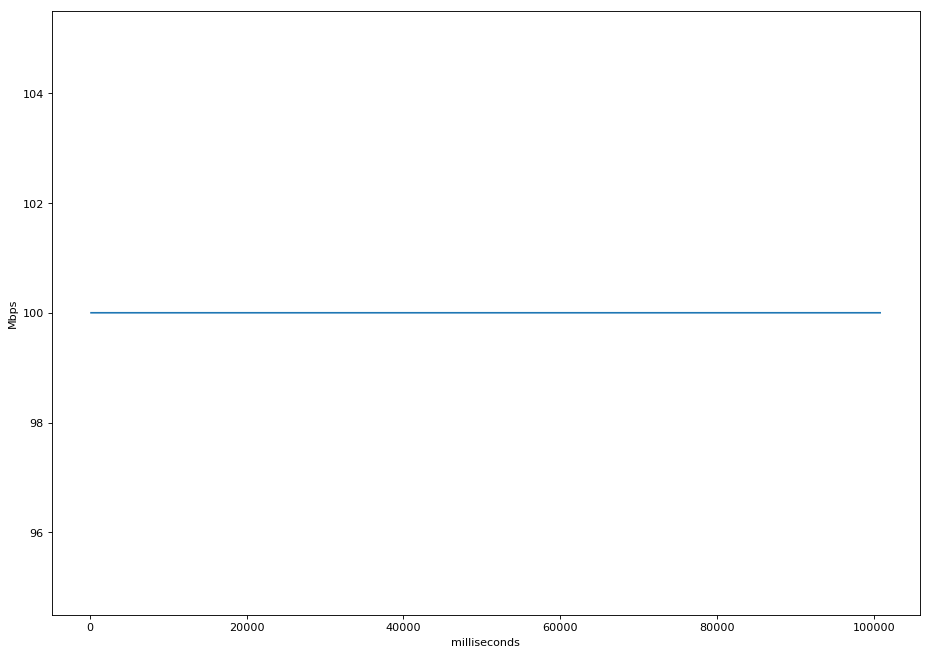

star_dtn2-wash_dtn2-10000:22:0


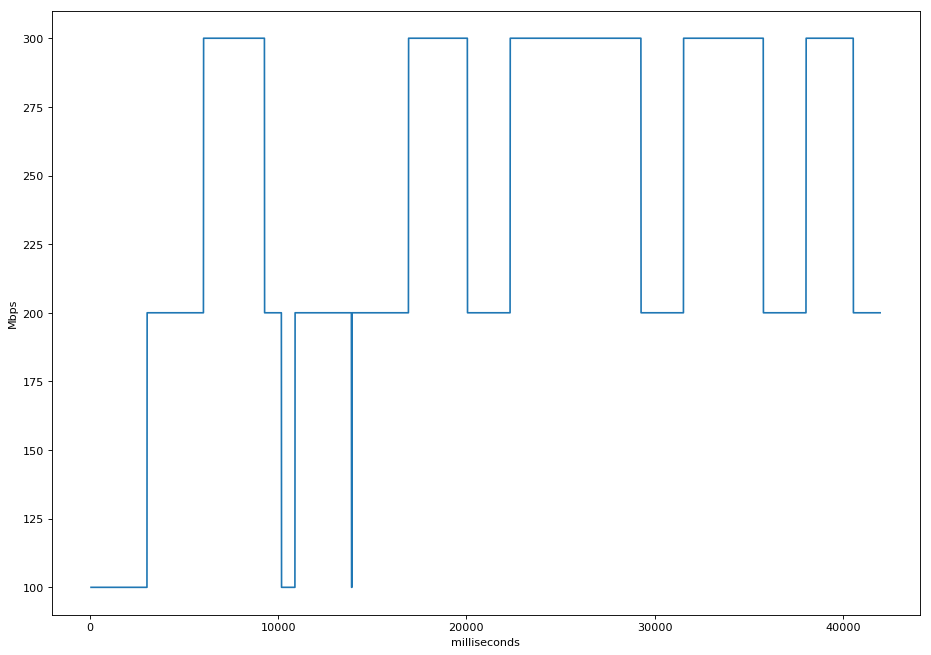

amst_dtn2-wash_dtn2-10000:34:0
(457640, 1101.6497111320496, 0.4154133526978657)


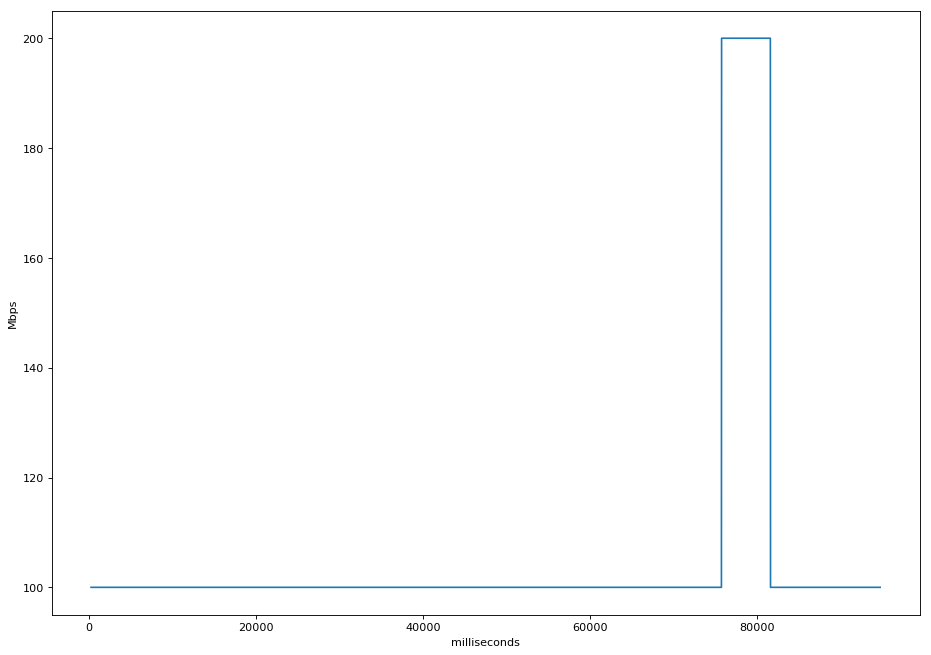

cern_dtn2-denv_dtn2-10000:38:0


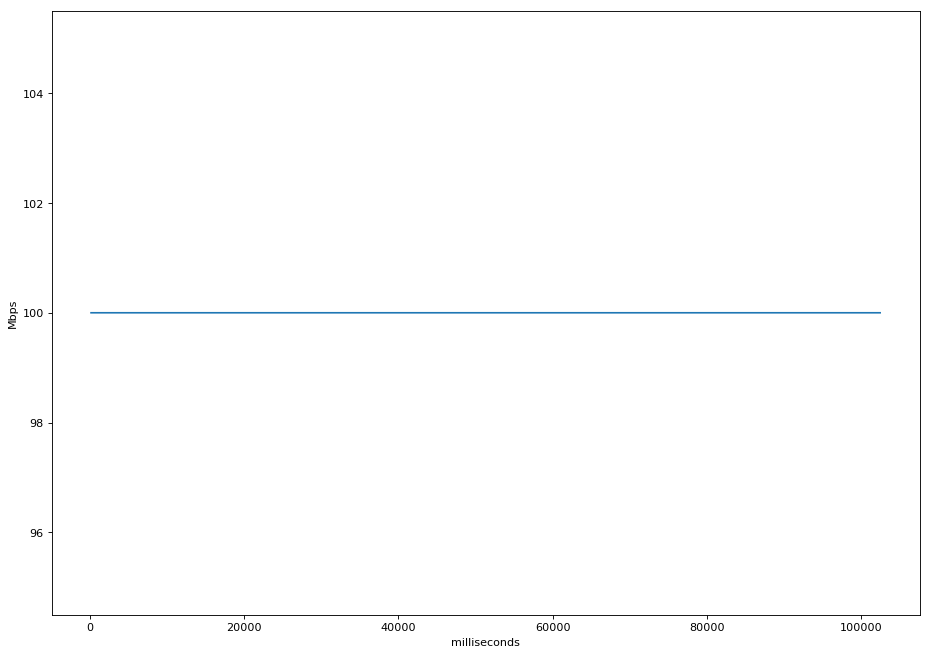

aofa_dtn2-lbl_dtn2-10000:39:0


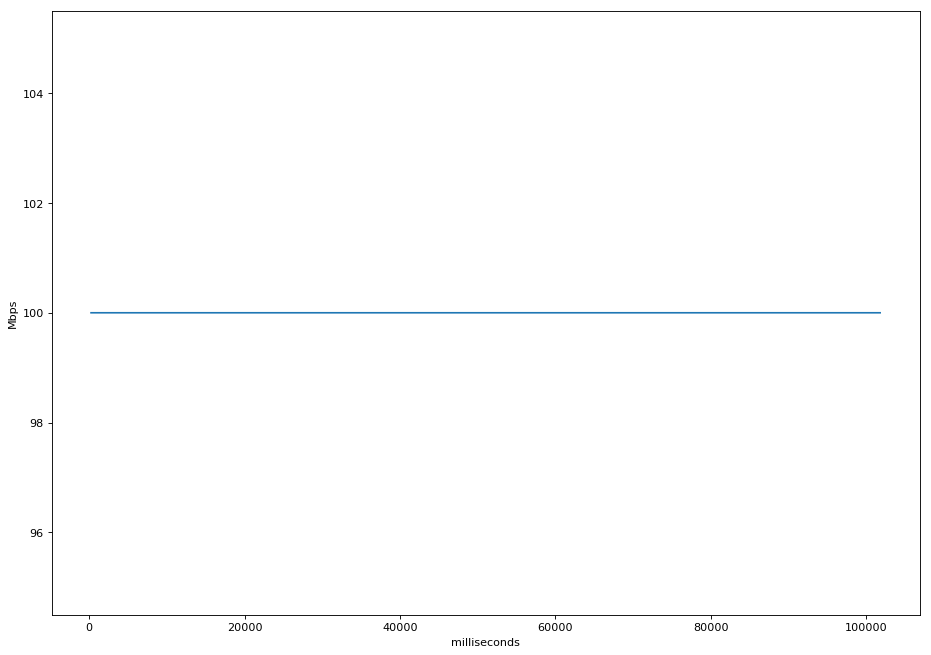

aofa_dtn2-amst_dtn2-10000:10:0


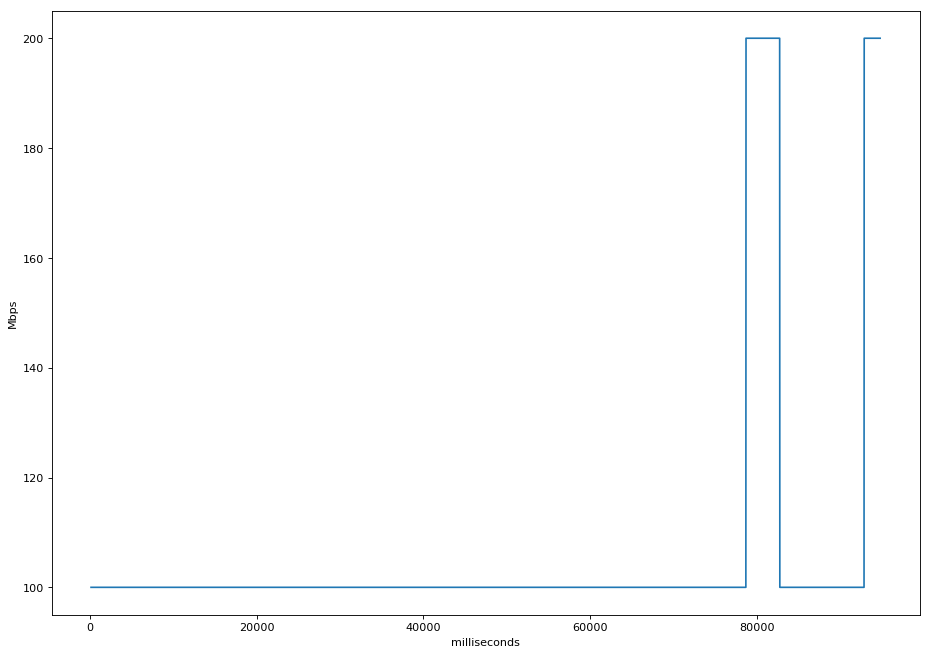

wash_dtn2-lbl_dtn2-10000:12:0
(457640, 1102.6519379615784, 0.4150357735243434)


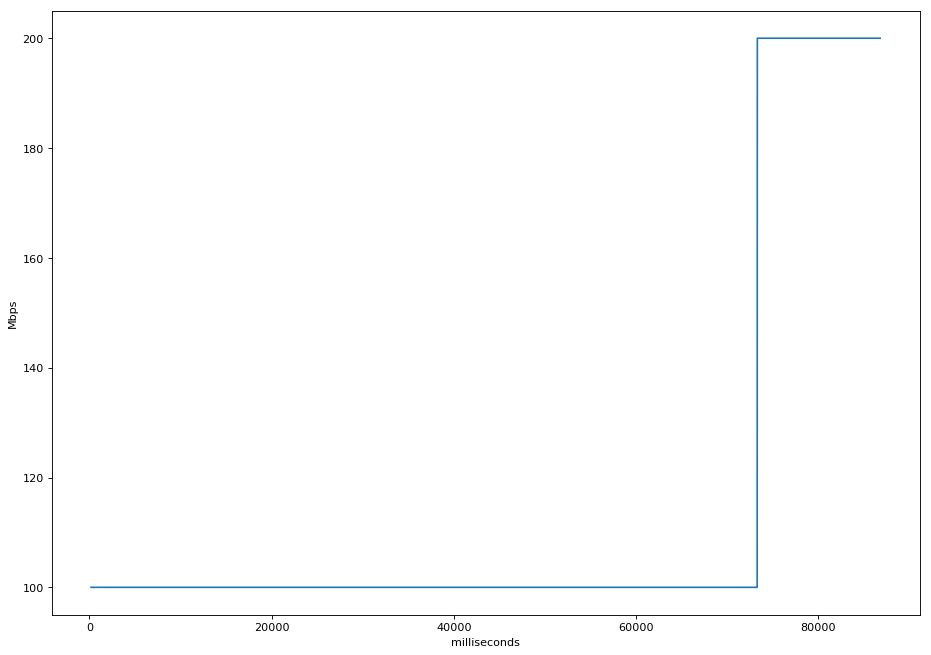

atla_dtn2-lbl_dtn2-10000:15:0


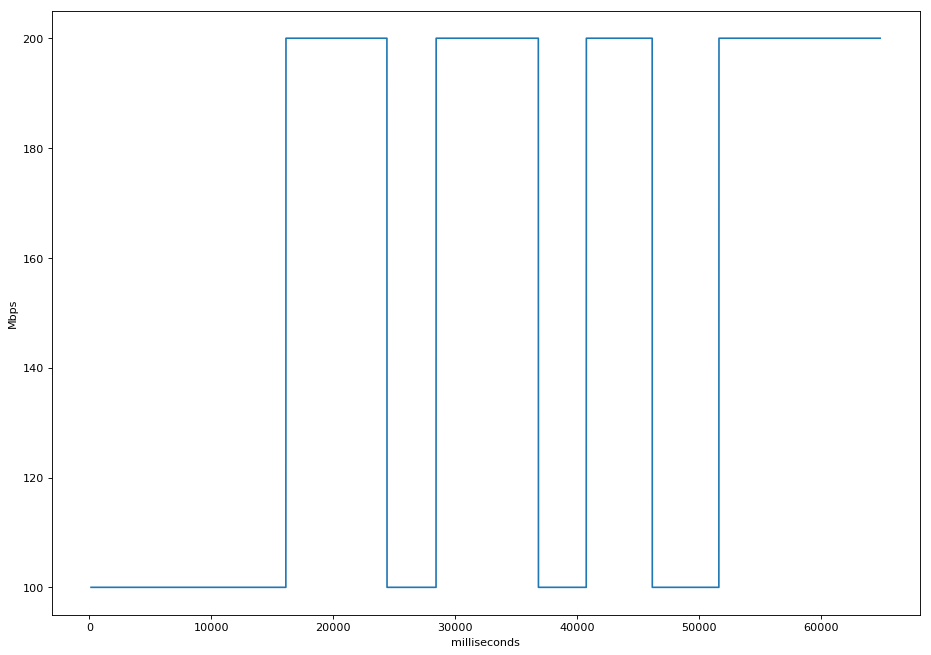

atla_dtn2-lbl_dtn2-10000:23:0


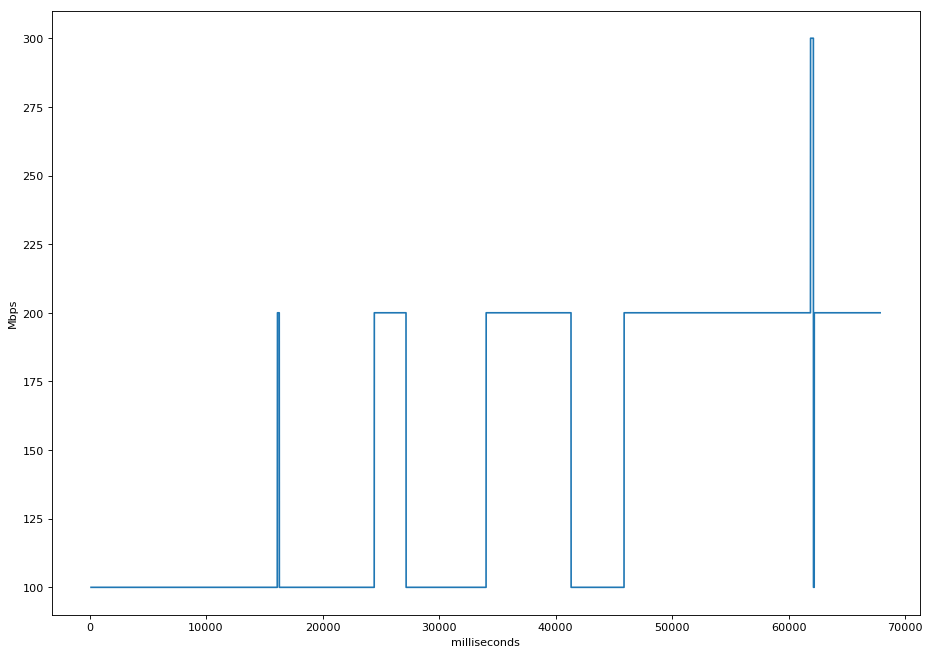

denv_dtn2-atla_dtn2-10000:7:0
(457640, 1103.7062950134277, 0.41463929495340274)

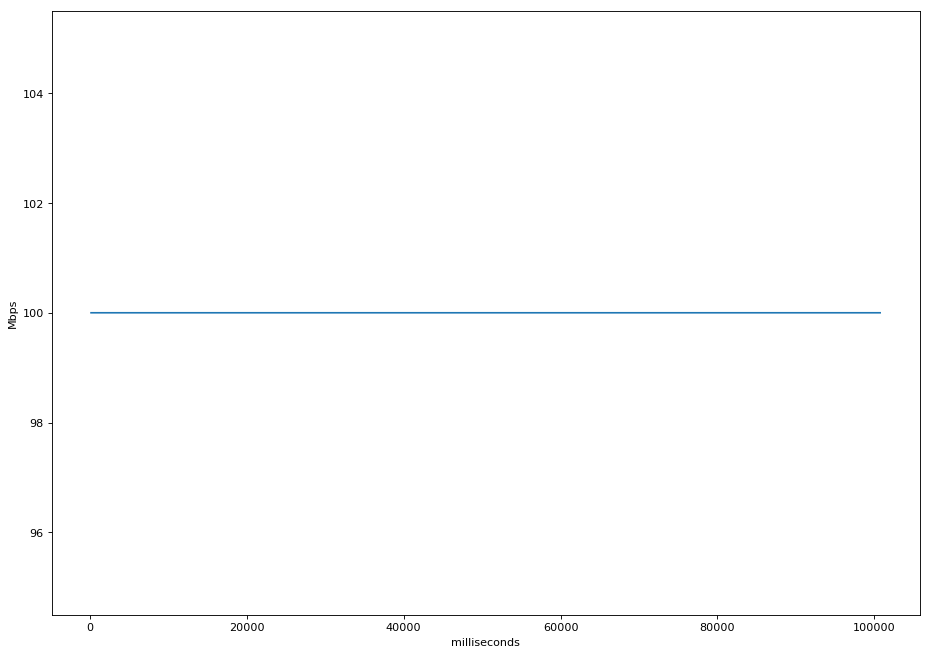


denv_dtn2-atla_dtn2-10000:2:0


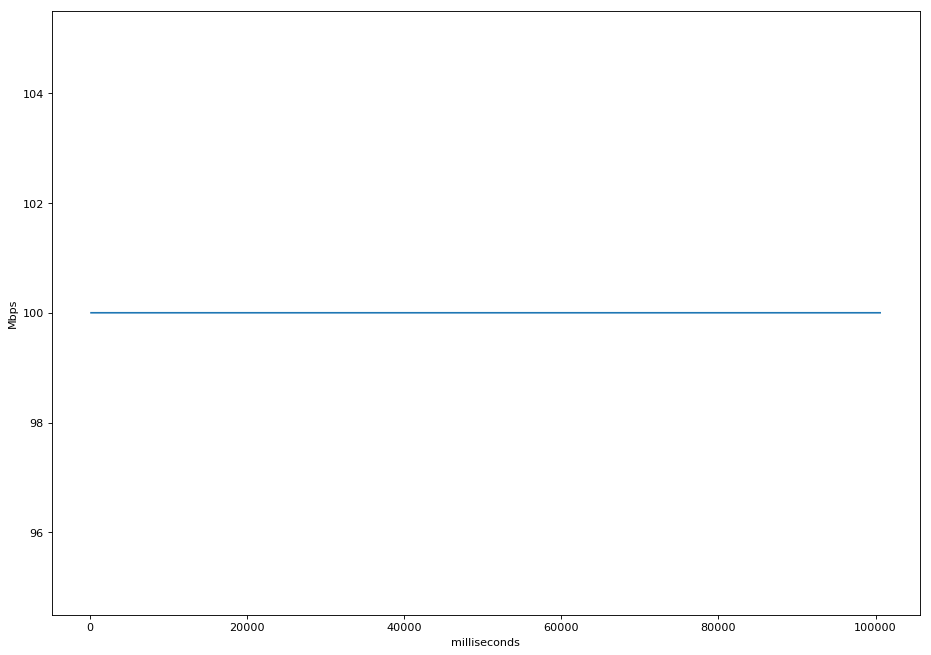

wash_dtn2-star_dtn2-10000:8:0


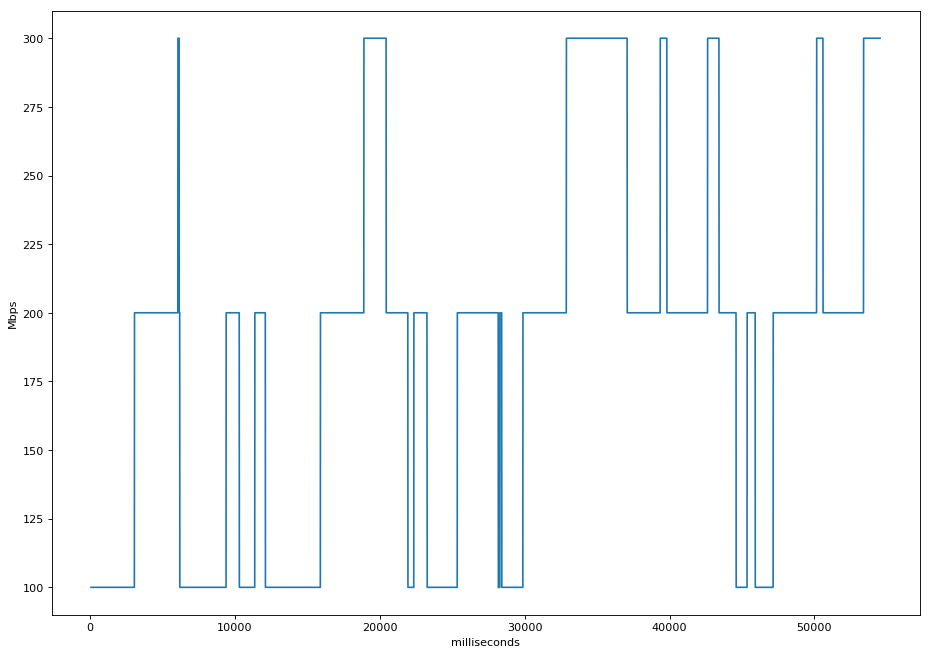

cern_dtn2-aofa_dtn2-10000:24:0


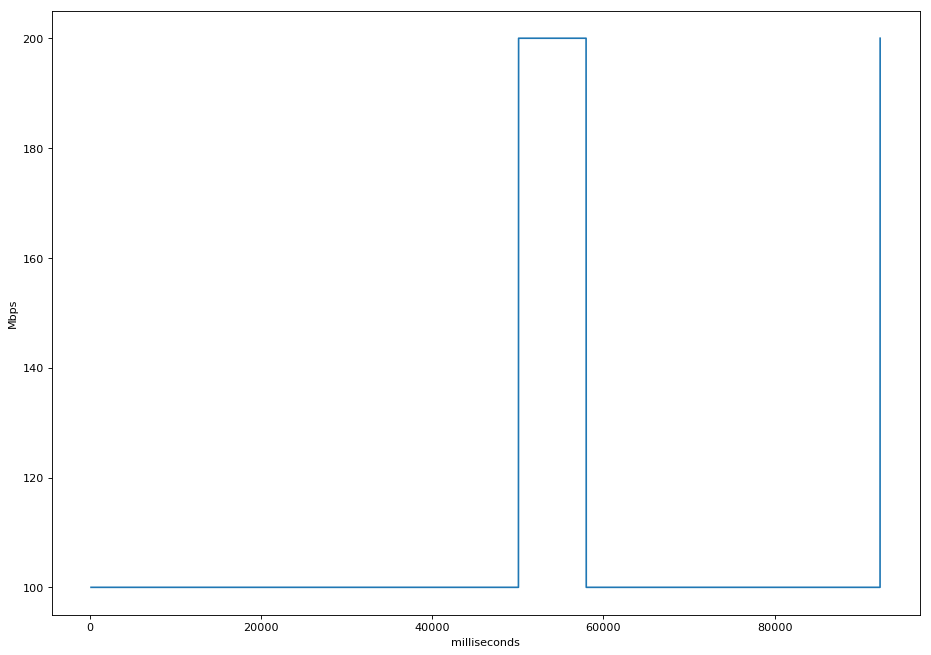

amst_dtn2-aofa_dtn2-10000:36:0
(457640, 1104.751543045044, 0.4142469887288862)


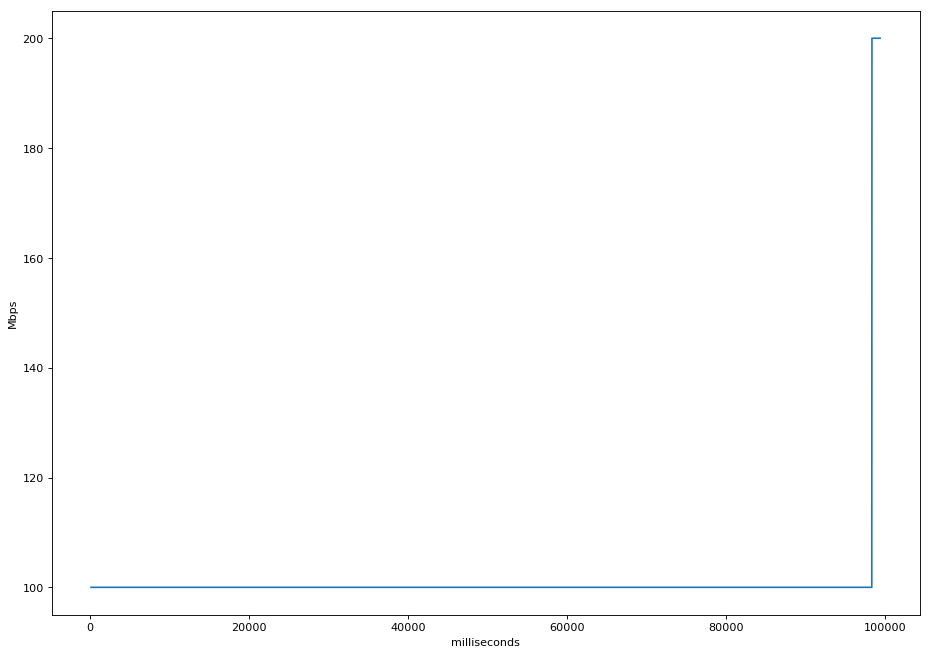

atla_dtn-denv_dtn-800000:0:3


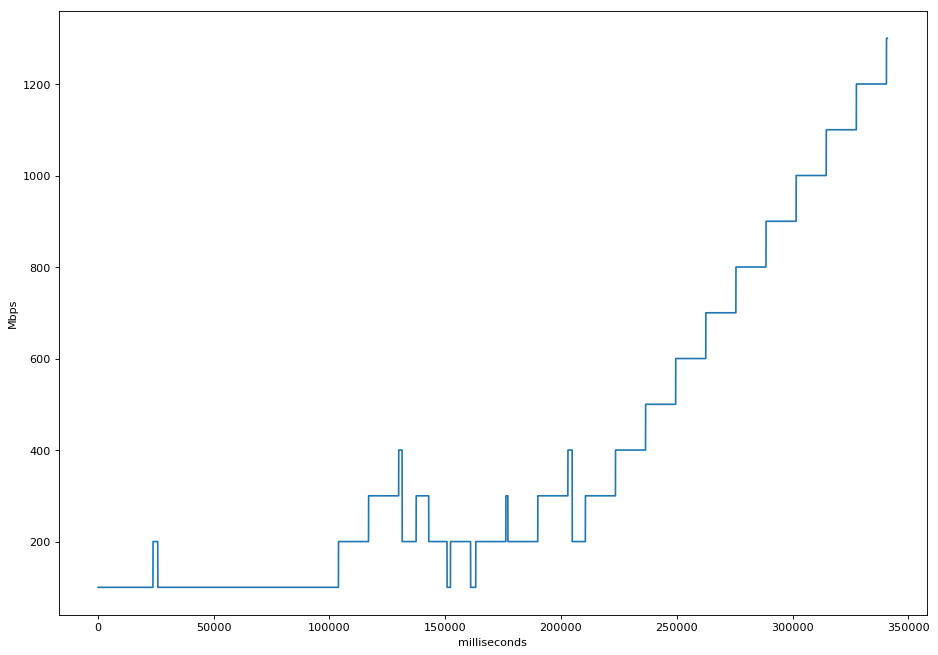

aofa_dtn2-amst_dtn2-10000:16:0


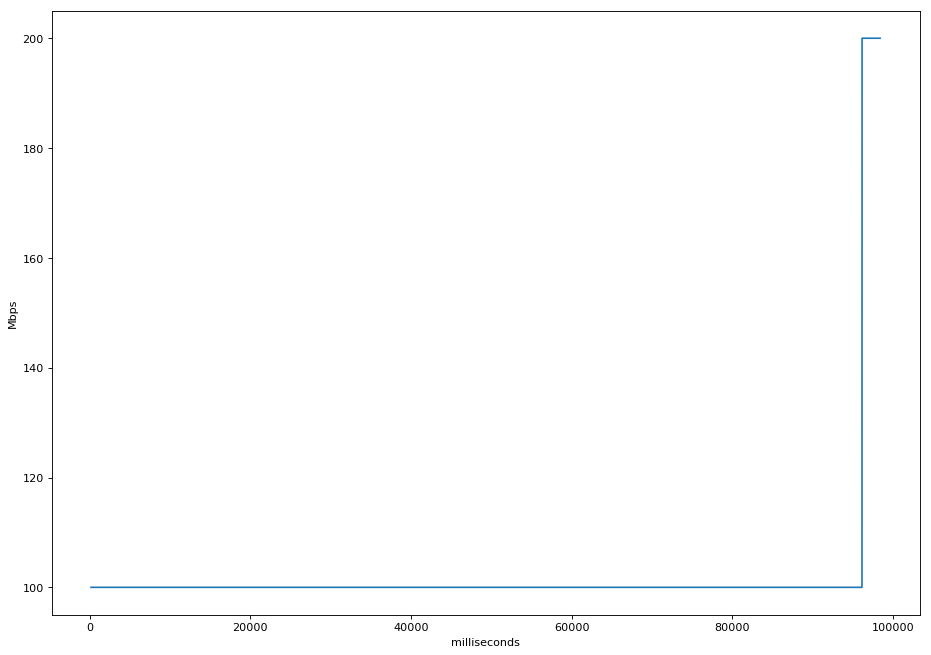

atla_dtn2-wash_dtn2-10000:13:0


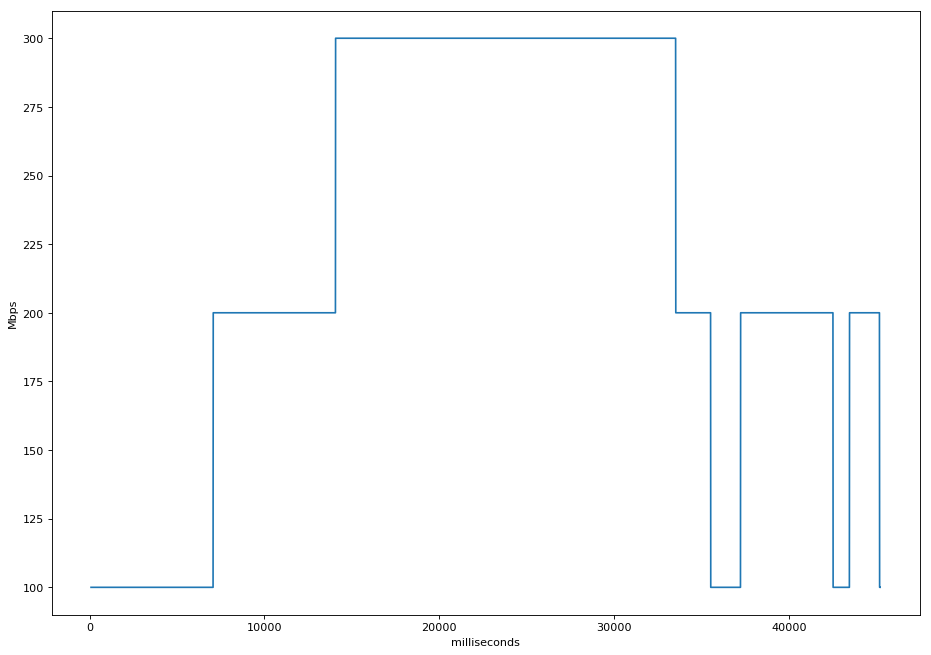

(457640, 1105.756844997406, 0.41387037491146944)
atla_dtn2-star_dtn2-10000:2:0


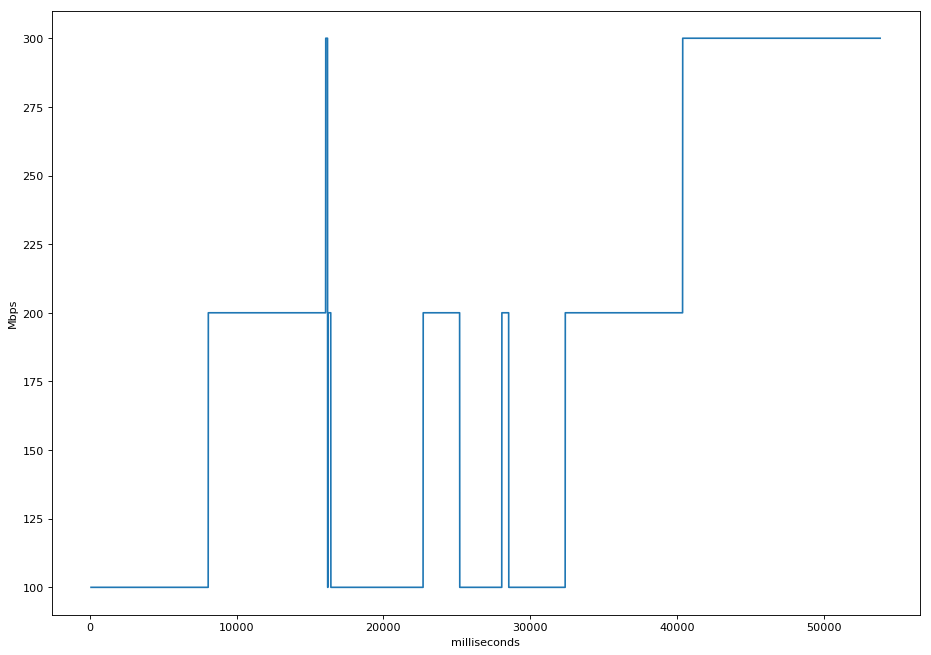

wash_dtn2-amst_dtn2-10000:23:0


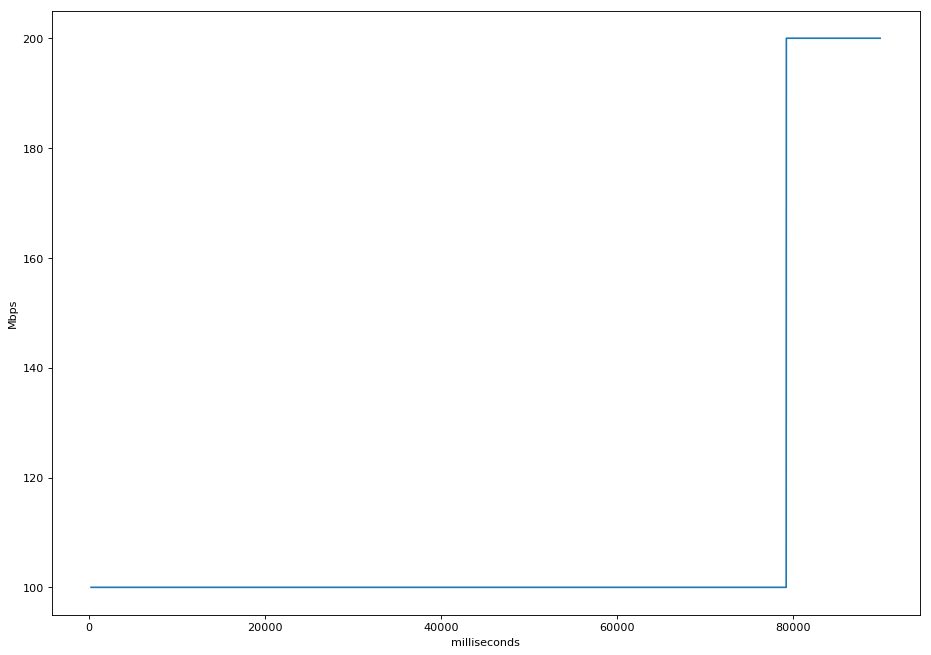

wash_dtn2-atla_dtn2-10000:15:0


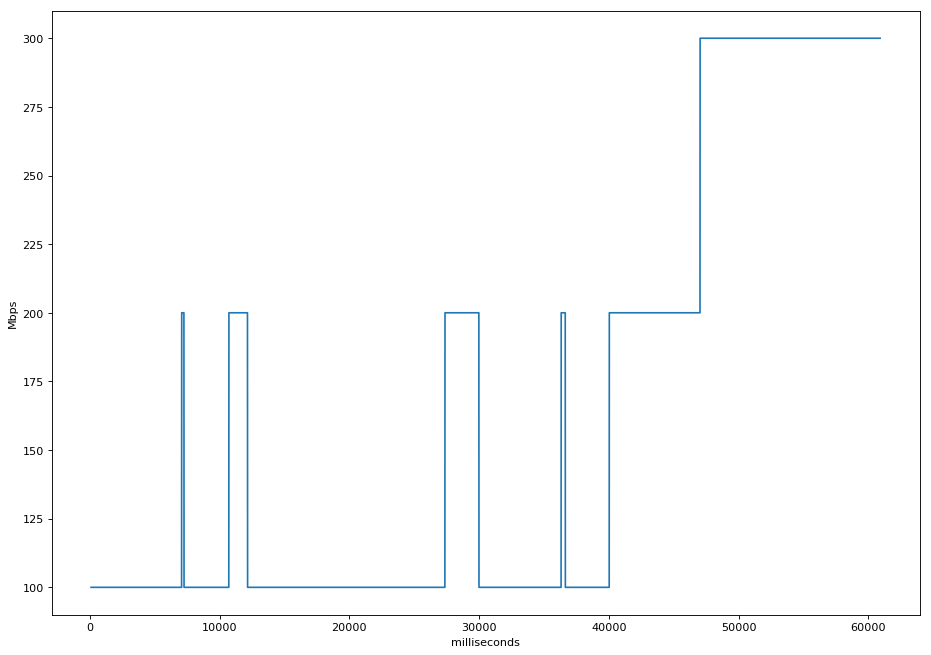

aofa_dtn2-atla_dtn2-10000:29:0
(457640, 1106.7614171504974, 0.4134947179295916)


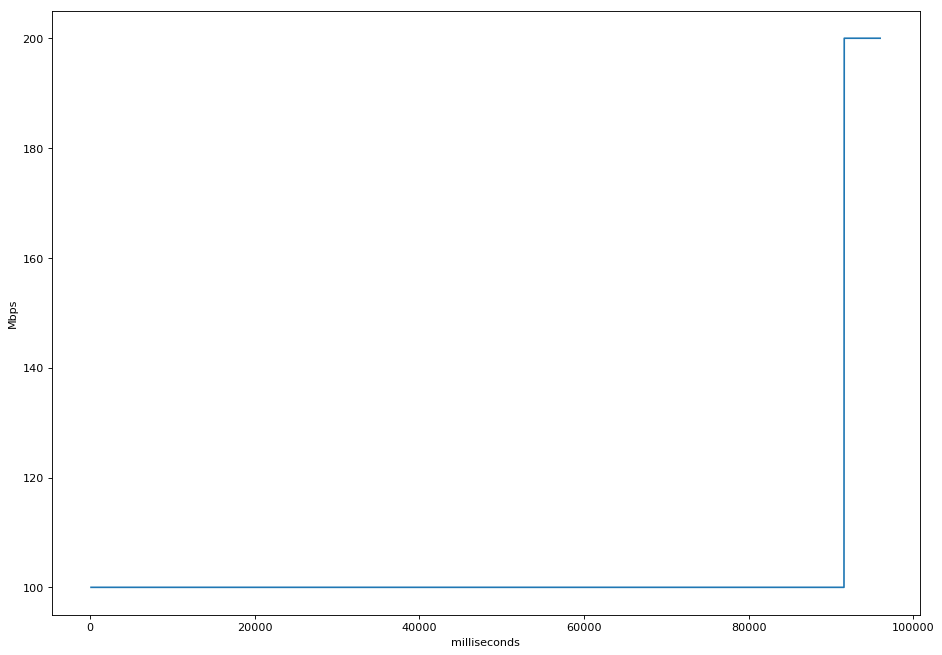

aofa_dtn2-amst_dtn2-10000:36:0


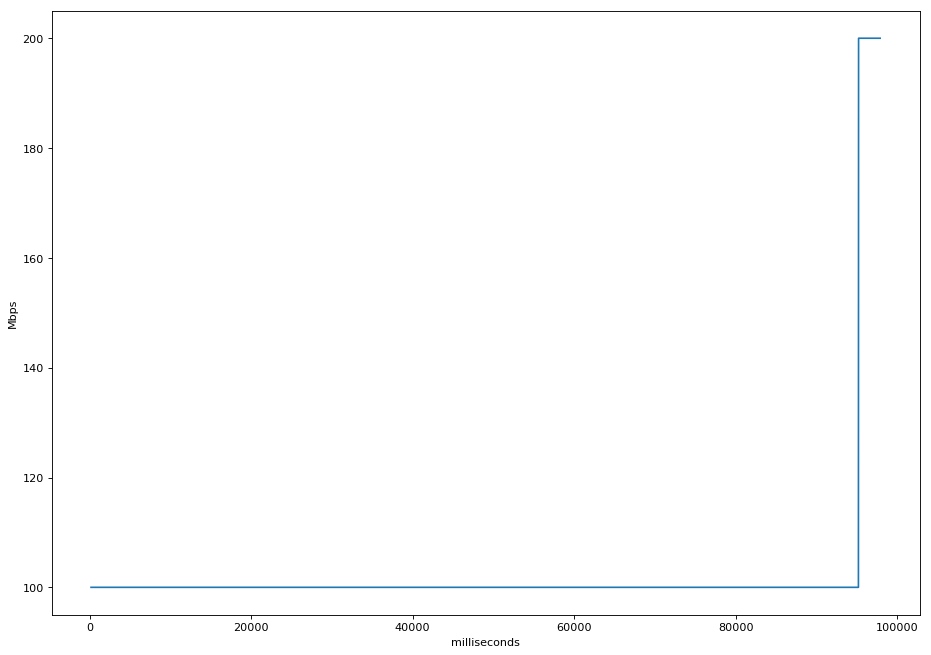

wash_dtn2-lbl_dtn2-10000:10:0


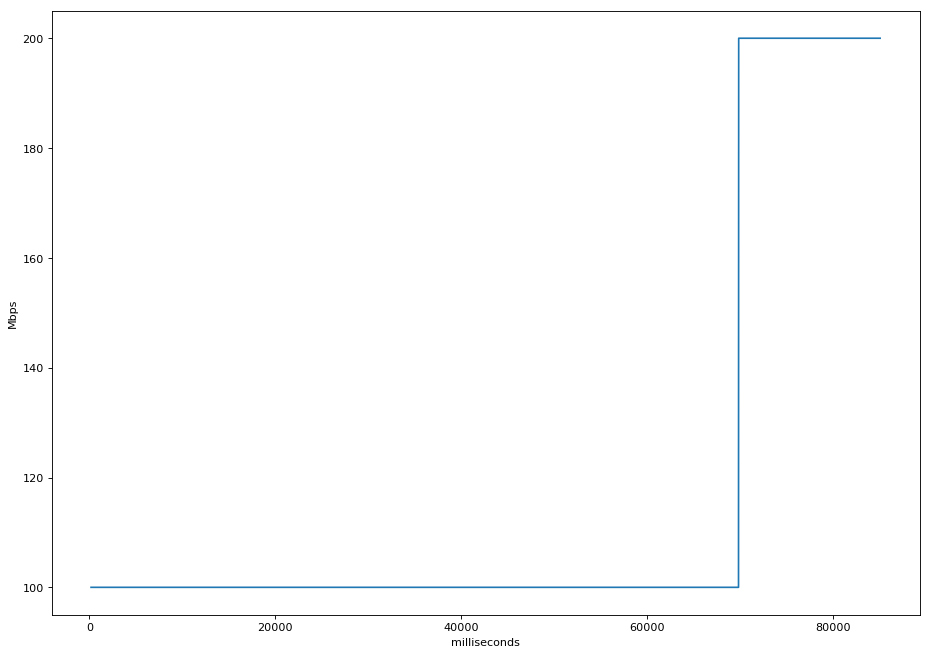

atla_dtn2-lbl_dtn2-10000:12:0


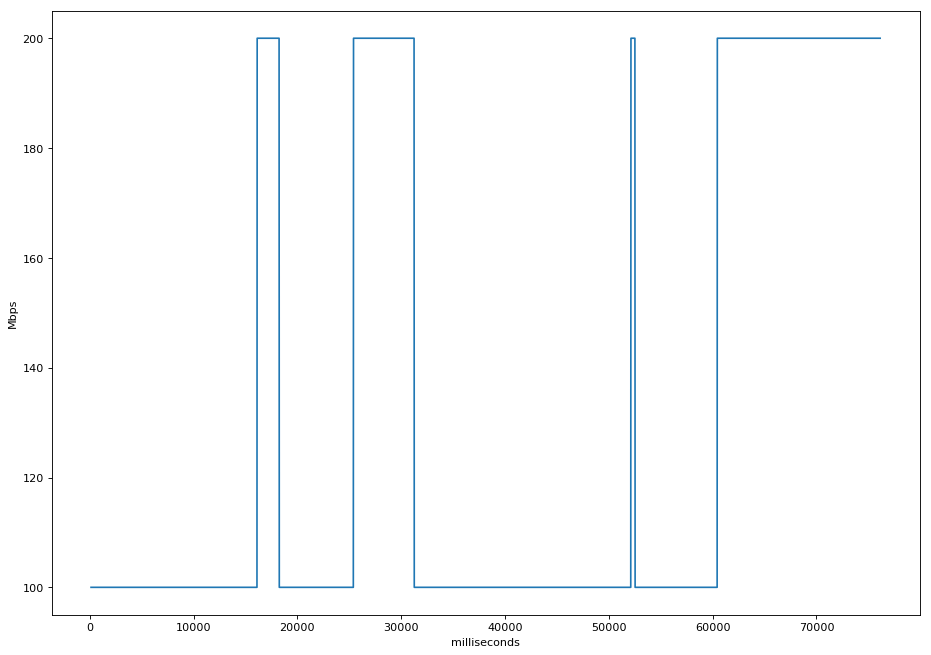

aofa_dtn2-wash_dtn2-10000:2:0
(457640, 1107.7626550197601, 0.4131209857330284)


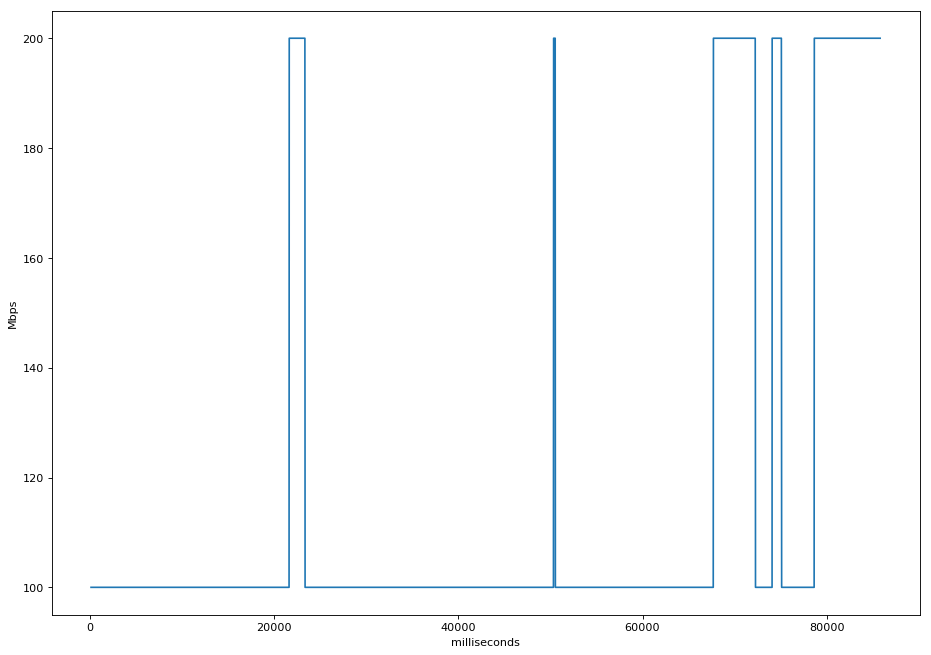

atla_dtn2-aofa_dtn2-10000:28:0


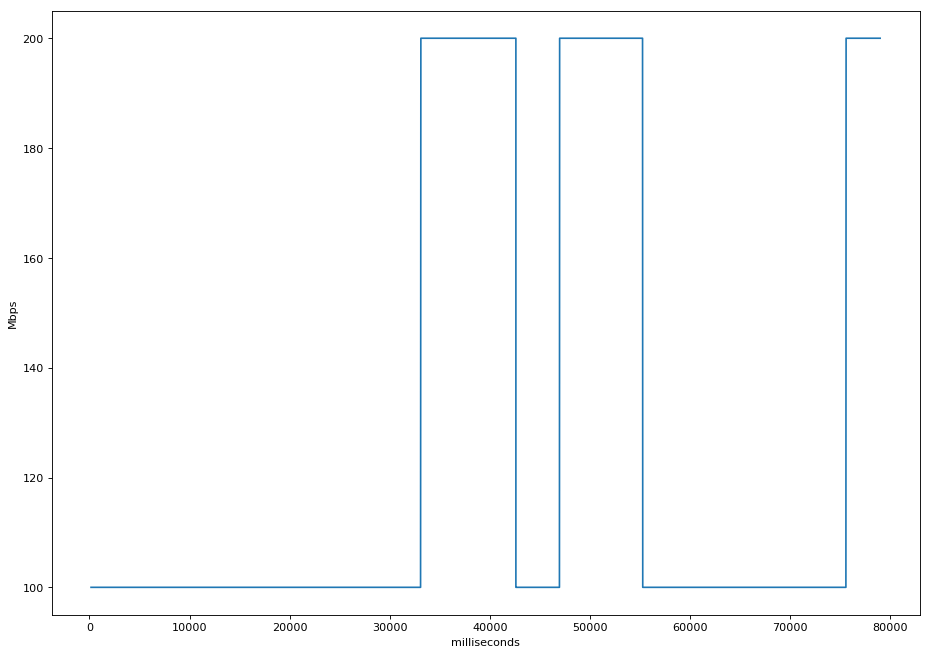

atla_dtn2-wash_dtn2-10000:21:0


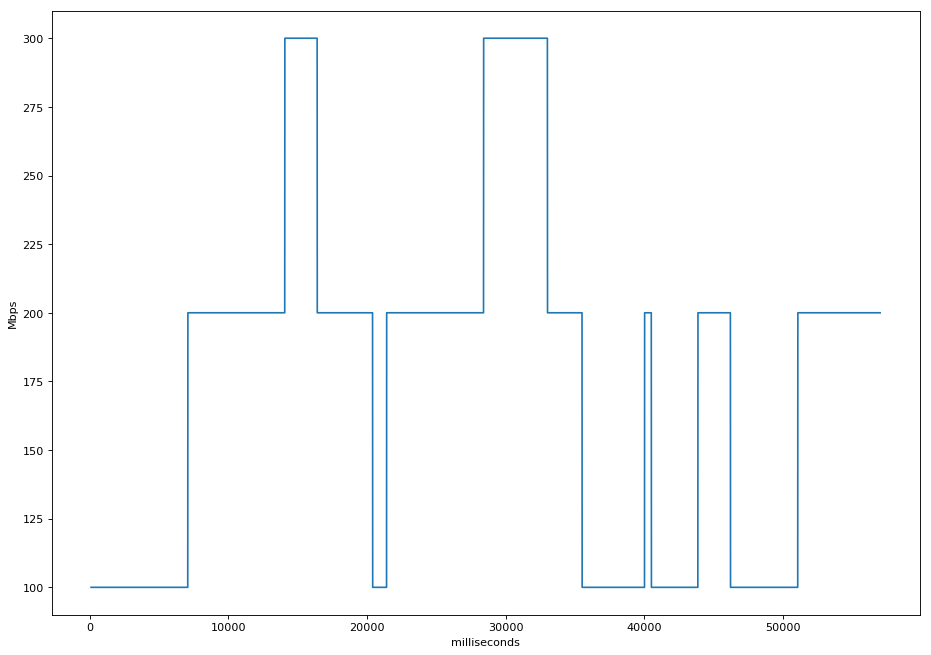

star_dtn2-cern_dtn2-10000:23:0
(457640, 1108.8077681064606, 0.41273159619139715)

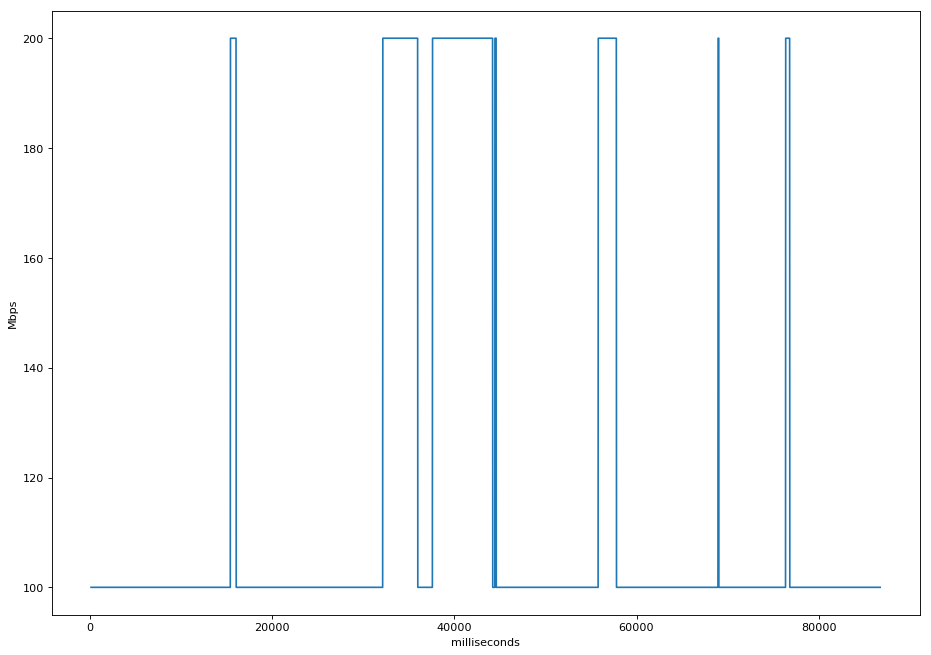


atla_dtn2-amst_dtn2-10000:0:0


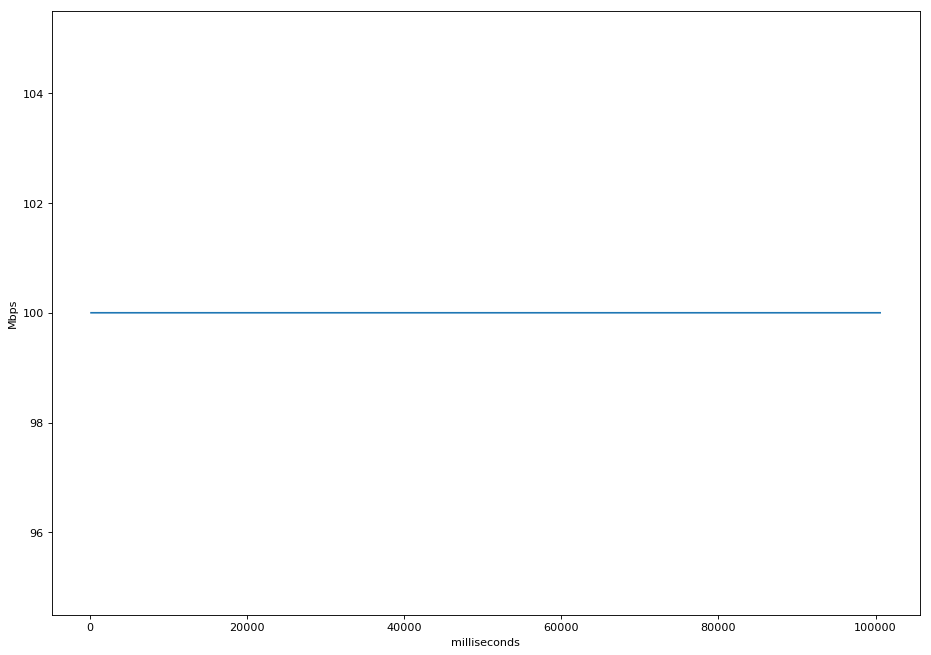

star_dtn2-wash_dtn2-10000:36:0


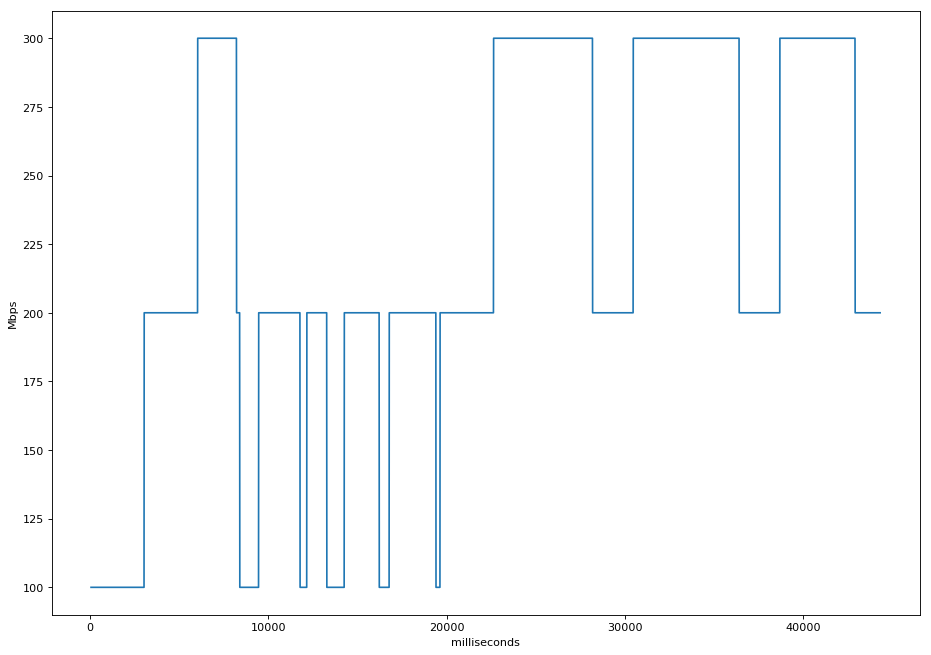

lbl_dtn2-aofa_dtn2-10000:19:0


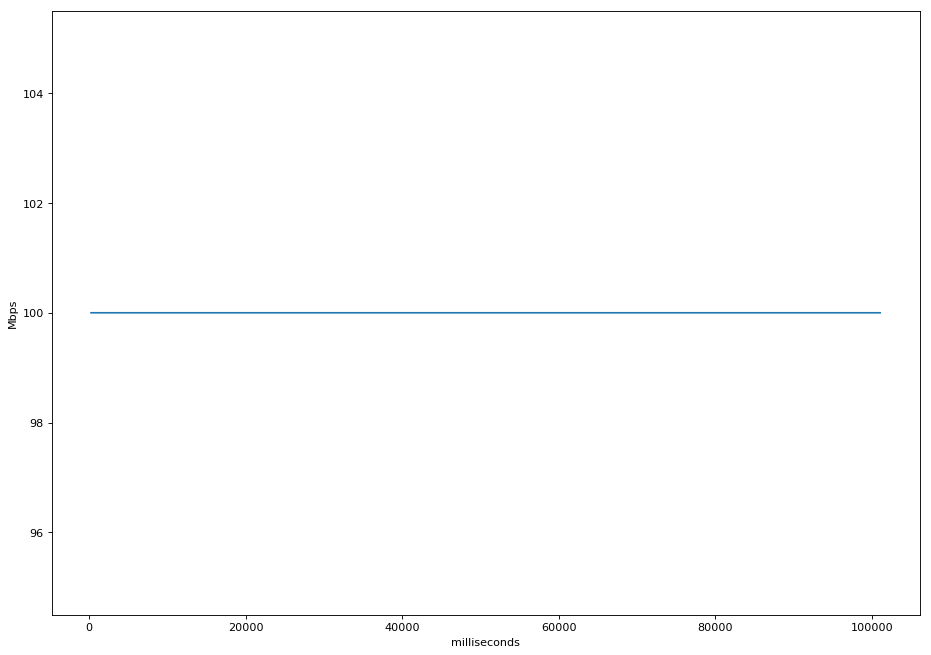

wash_dtn2-cern_dtn2-10000:14:0
(457640, 1109.8086590766907, 0.41235937047088395)


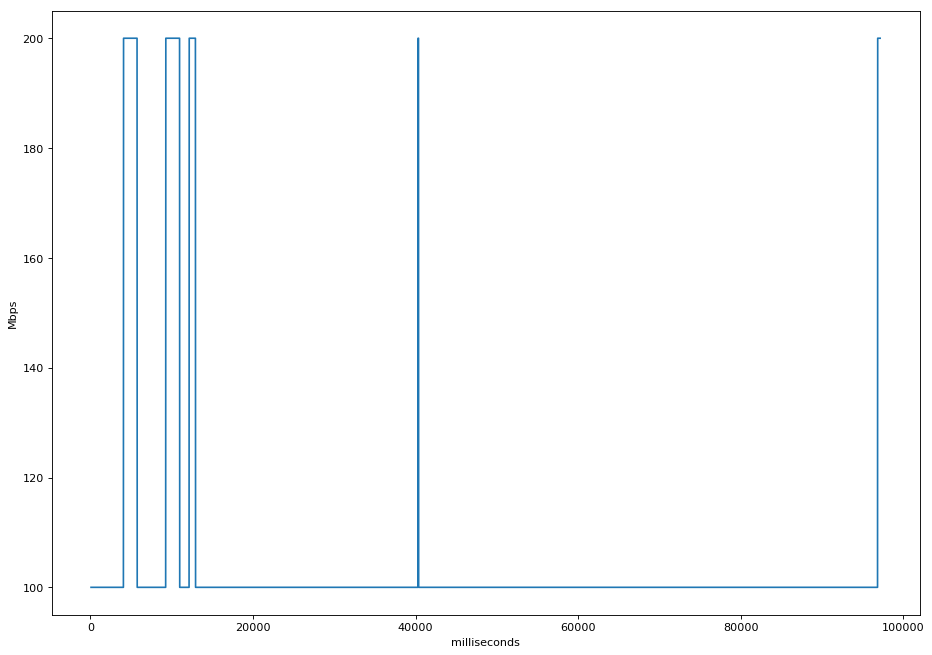

cern_dtn2-amst_dtn2-10000:10:0


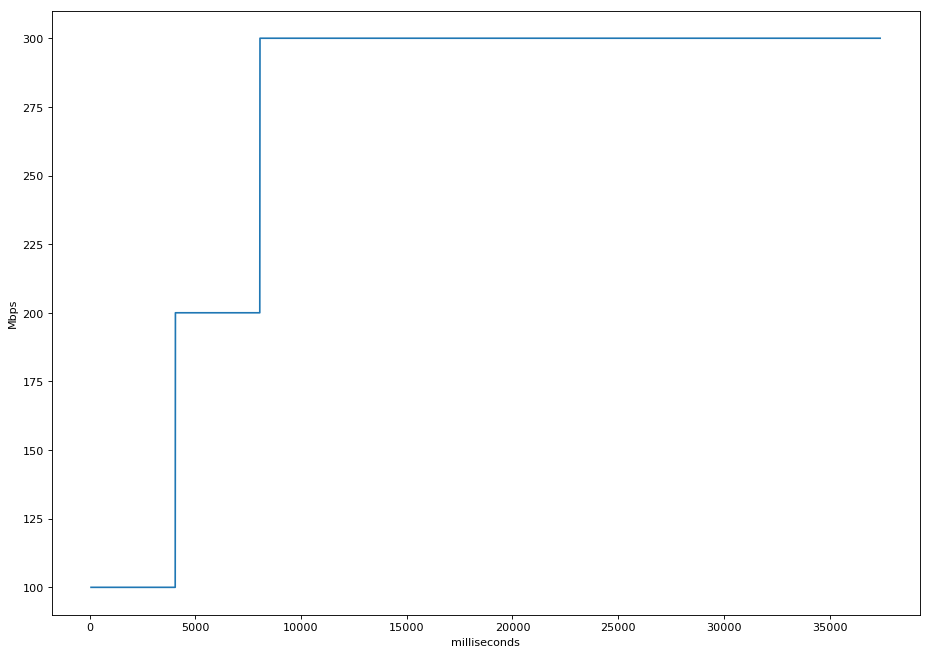

lbl_dtn2-amst_dtn2-10000:36:0


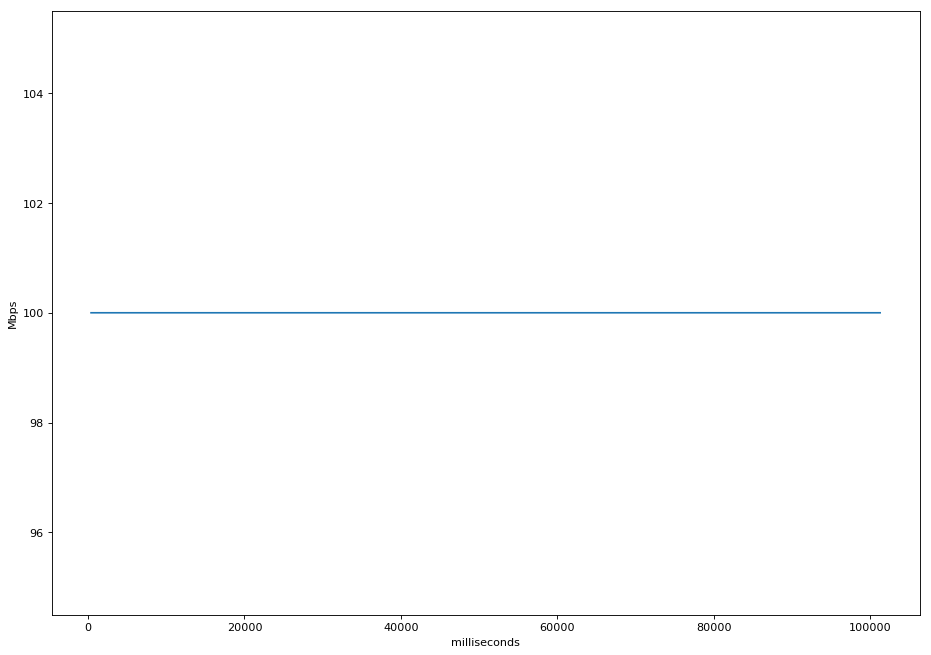

cern_dtn2-denv_dtn2-10000:26:0
(457640, 1110.8862991333008, 0.41195935205704204)


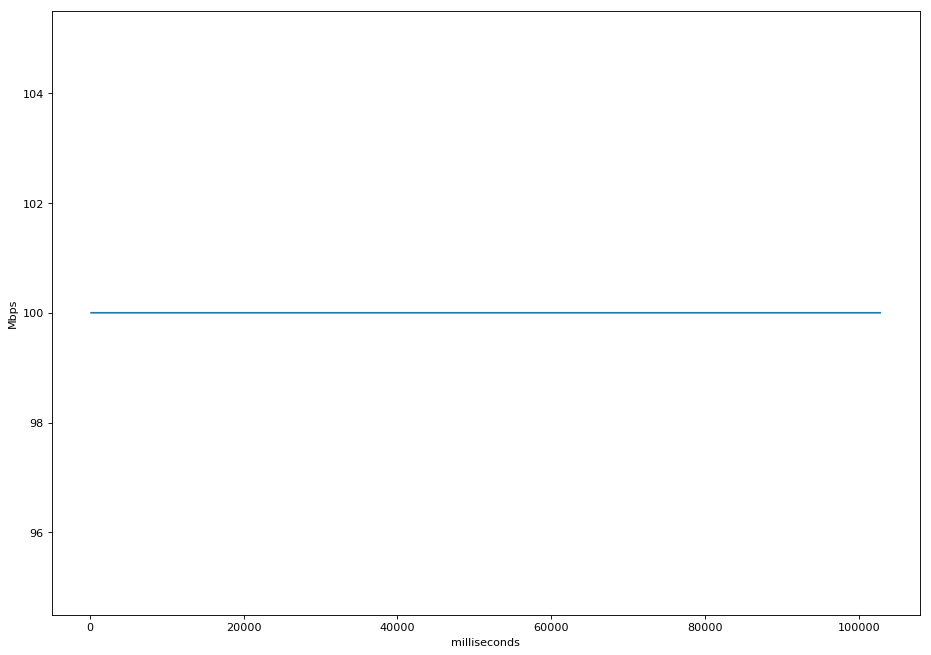

aofa_dtn2-wash_dtn2-10000:24:0


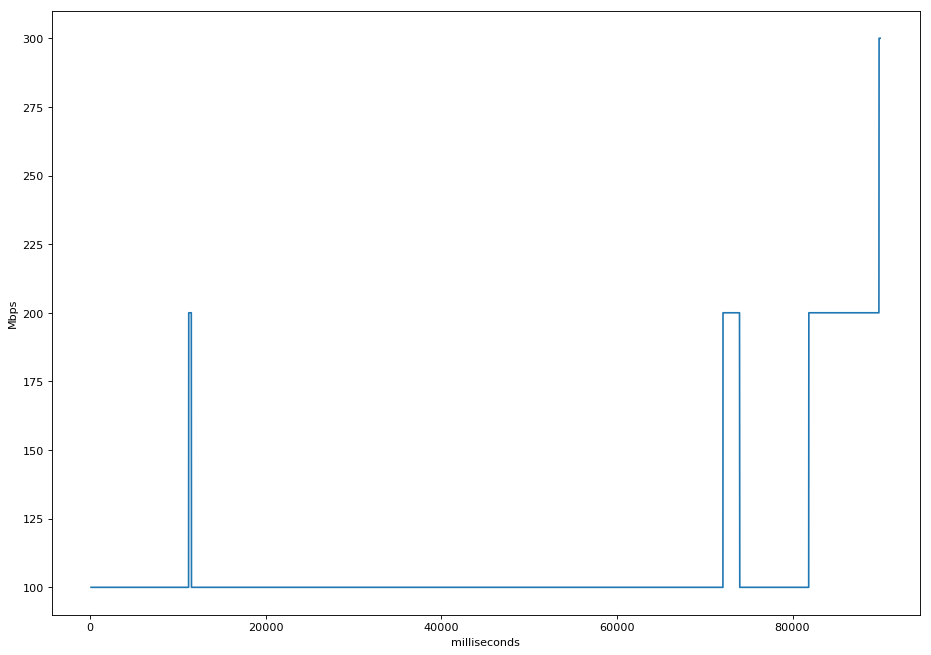

cern_dtn2-aofa_dtn2-10000:34:0


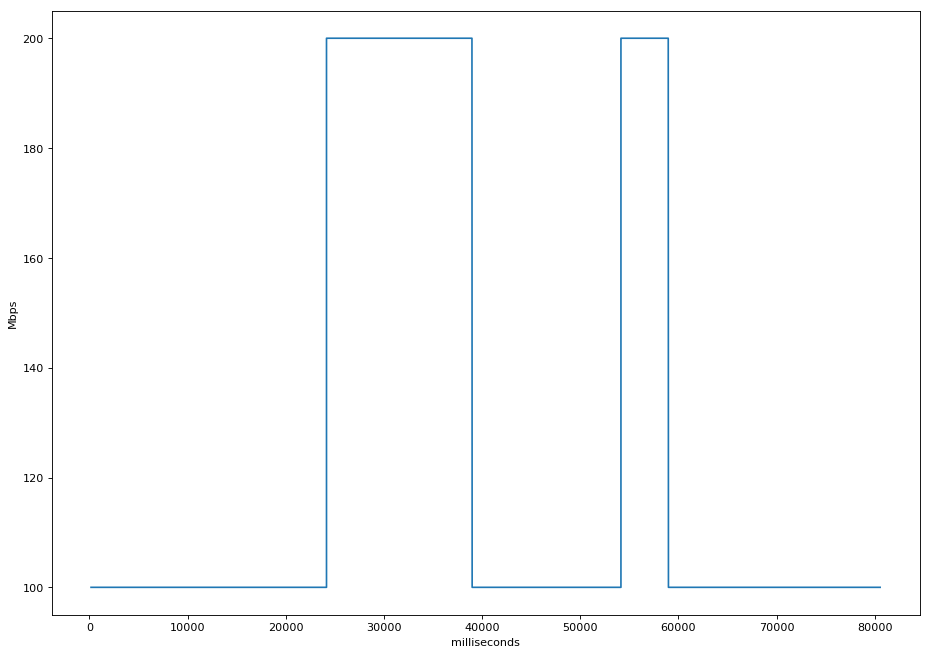

lbl_dtn2-wash_dtn2-10000:12:0


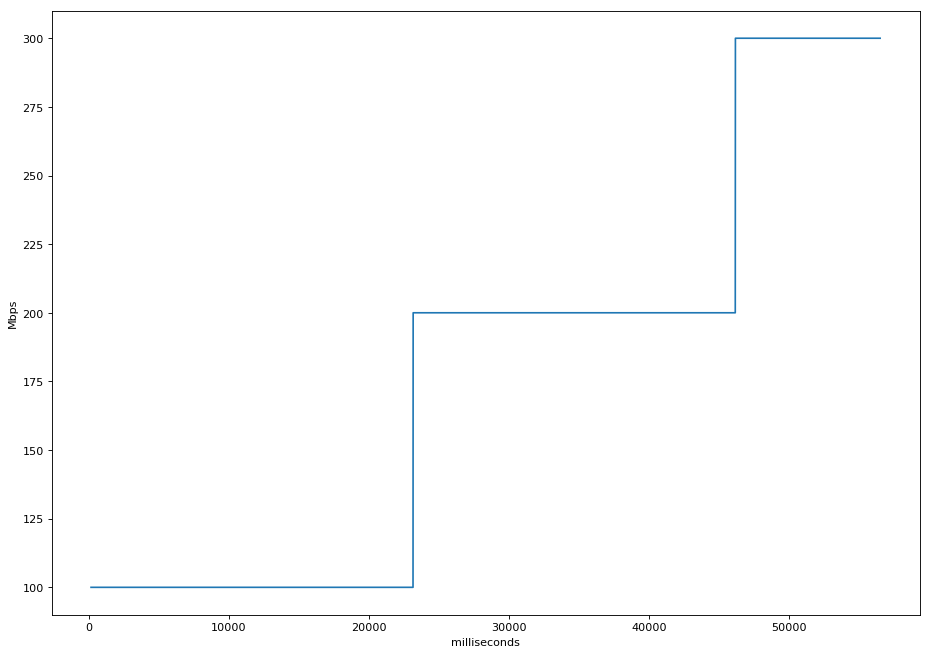

star_dtn2-lbl_dtn2-10000:39:0
(457640, 1111.897343158722, 0.41158475898496005)


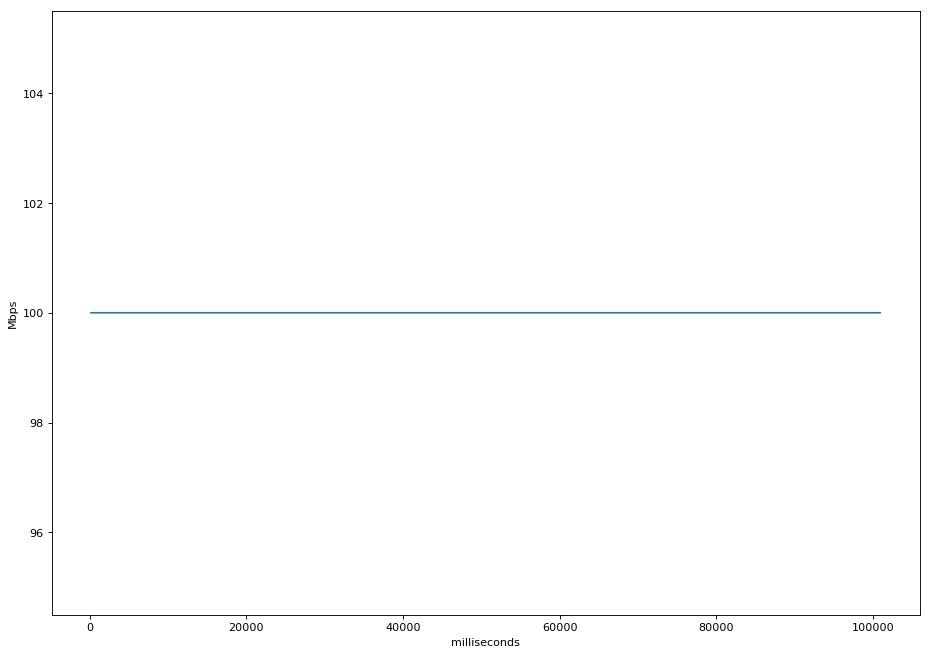

wash_dtn2-cern_dtn2-10000:24:0


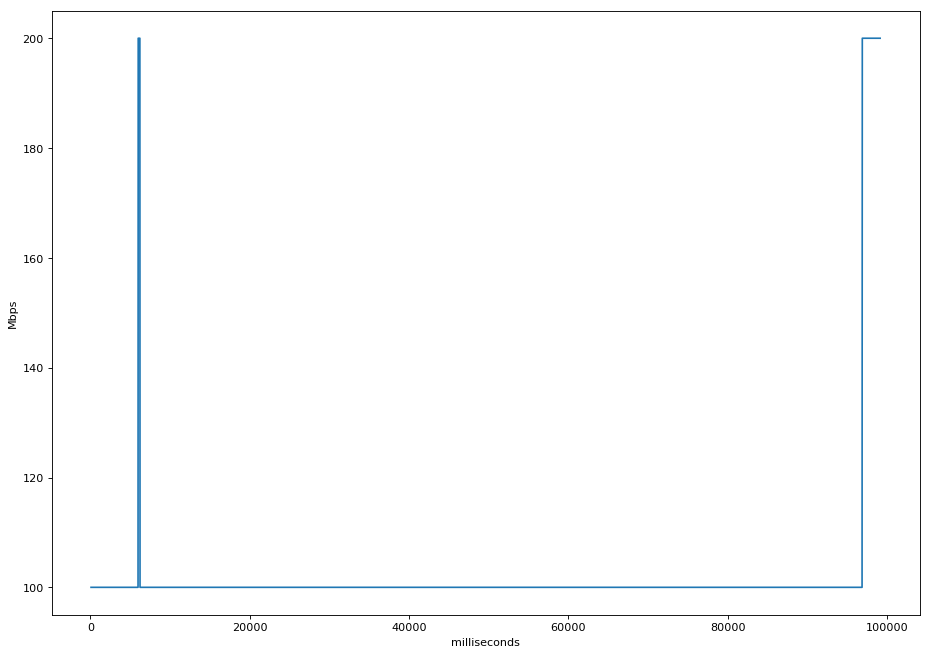

denv_dtn2-cern_dtn2-10000:31:0


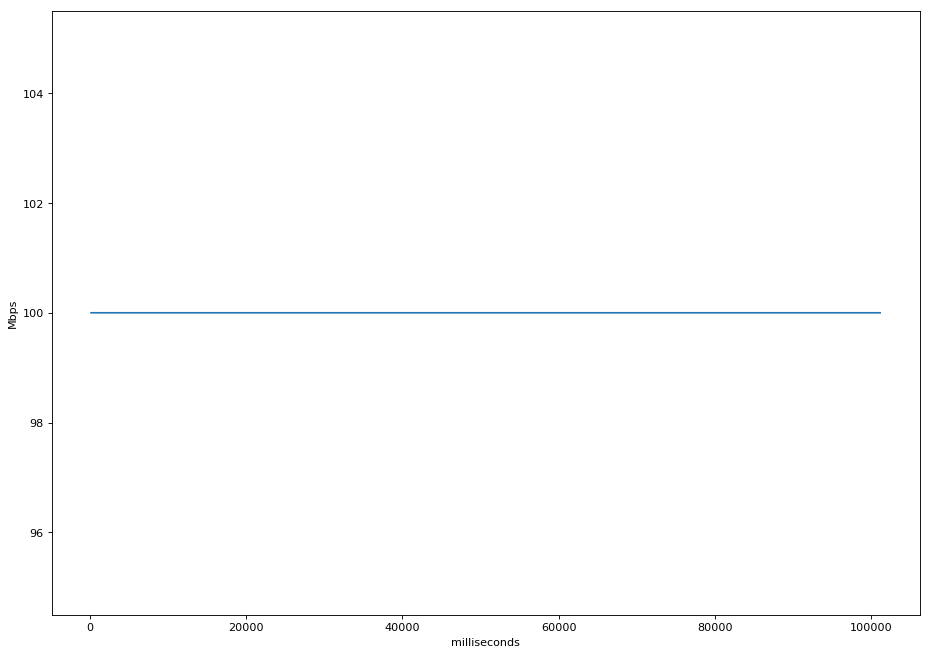

denv_dtn2-aofa_dtn2-10000:23:0
(457640, 1112.9586651325226, 0.4111922700610878)

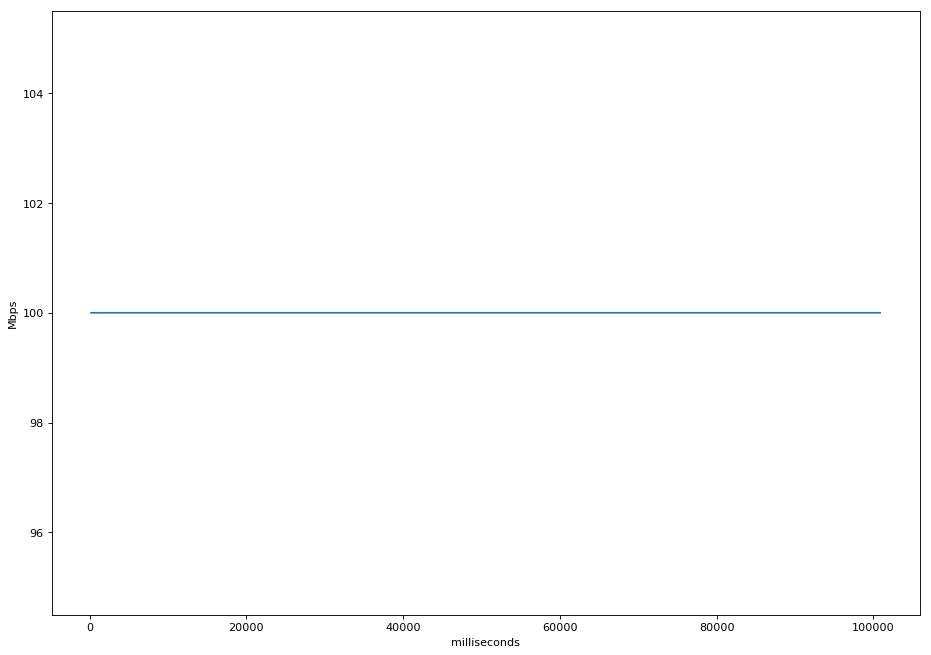


atla_dtn2-cern_dtn2-10000:34:0


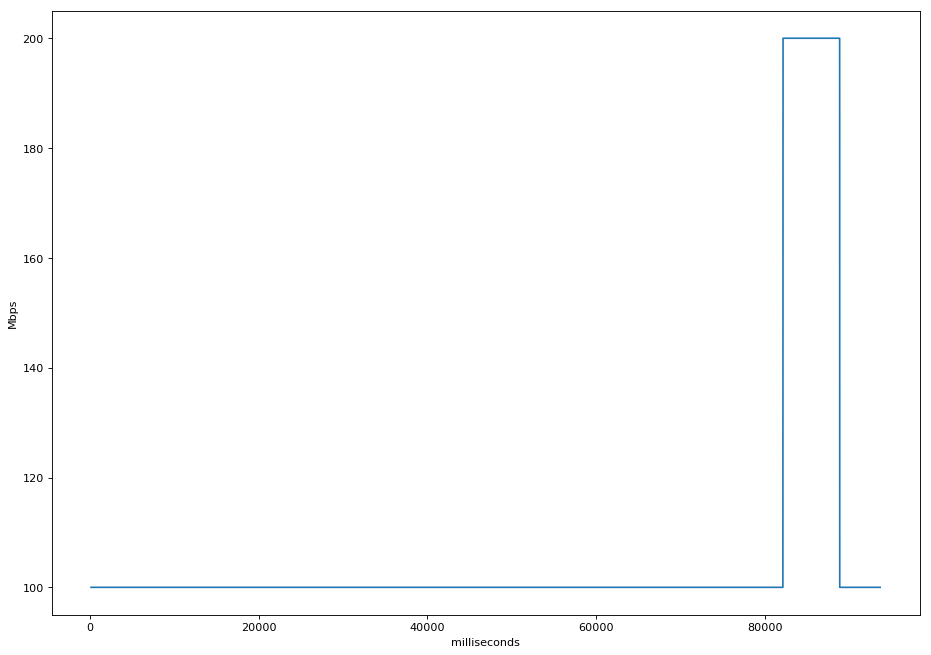

star_dtn2-amst_dtn2-10000:6:0


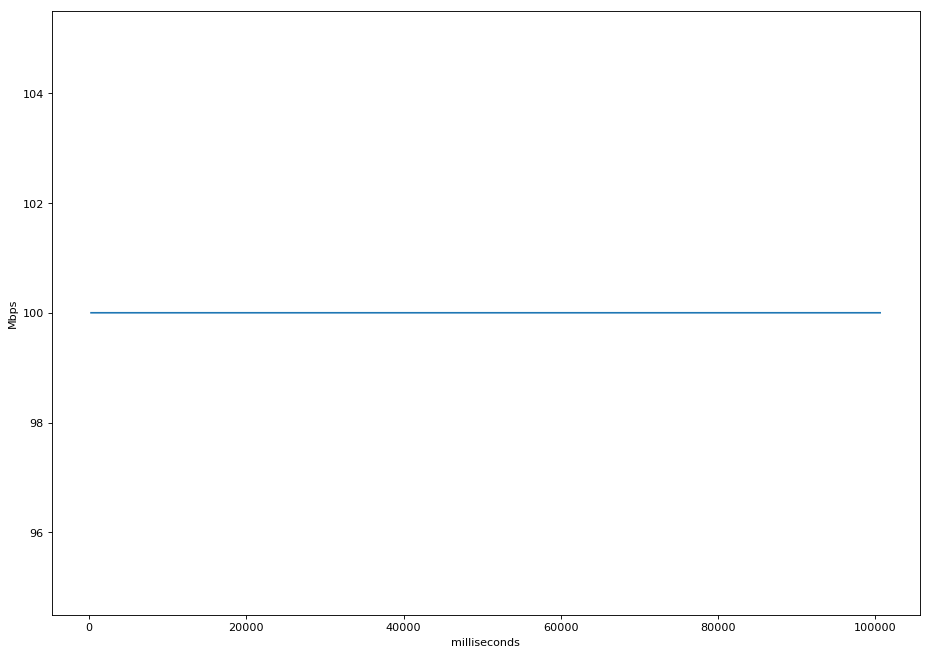

star_dtn2-aofa_dtn2-10000:28:0


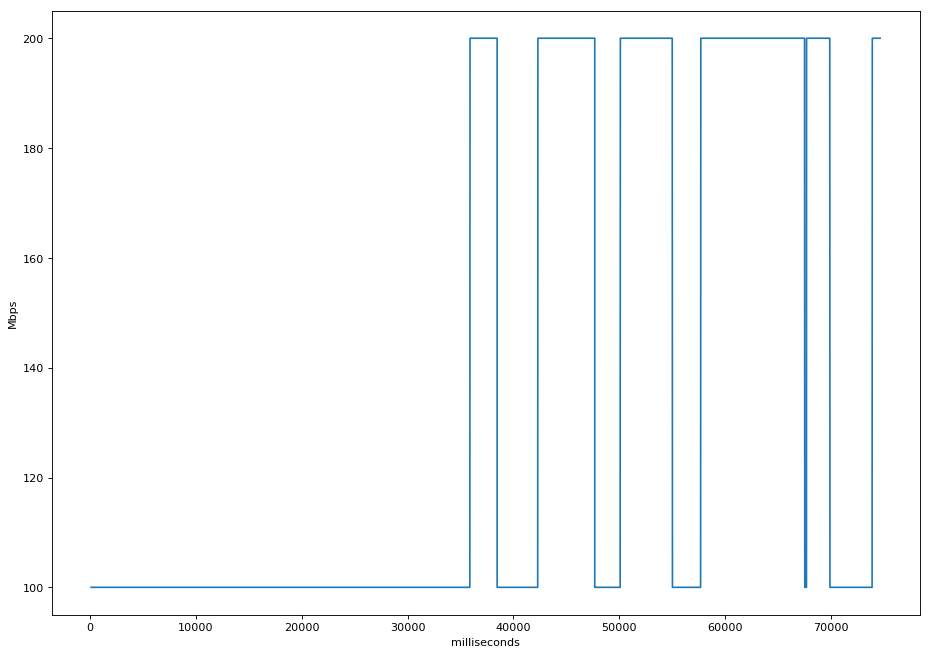

amst_dtn2-star_dtn2-10000:6:0(457640, 1115.214828968048, 0.4103603970397992)



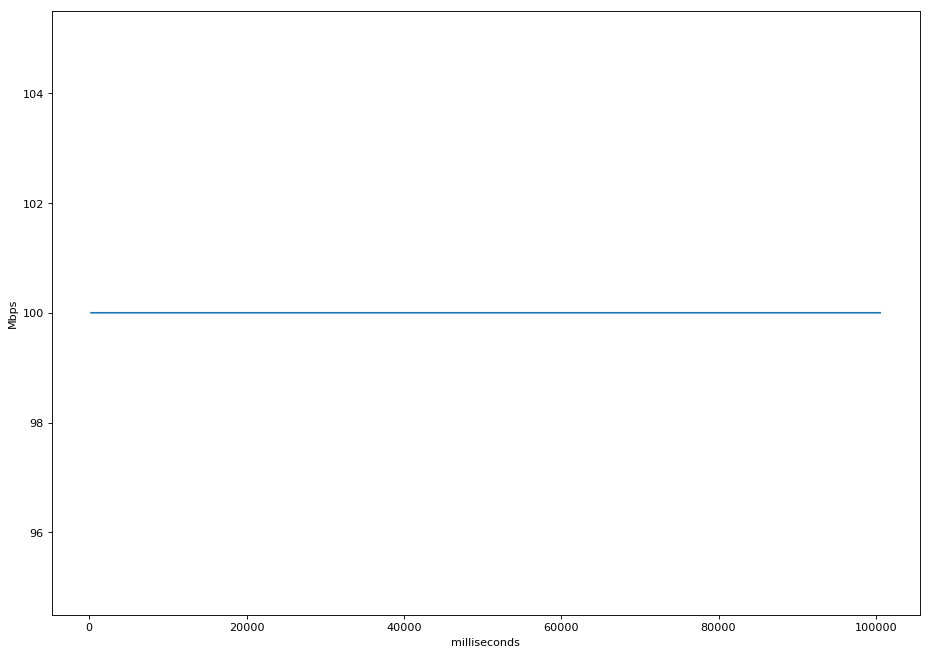

star_dtn2-amst_dtn2-10000:0:0


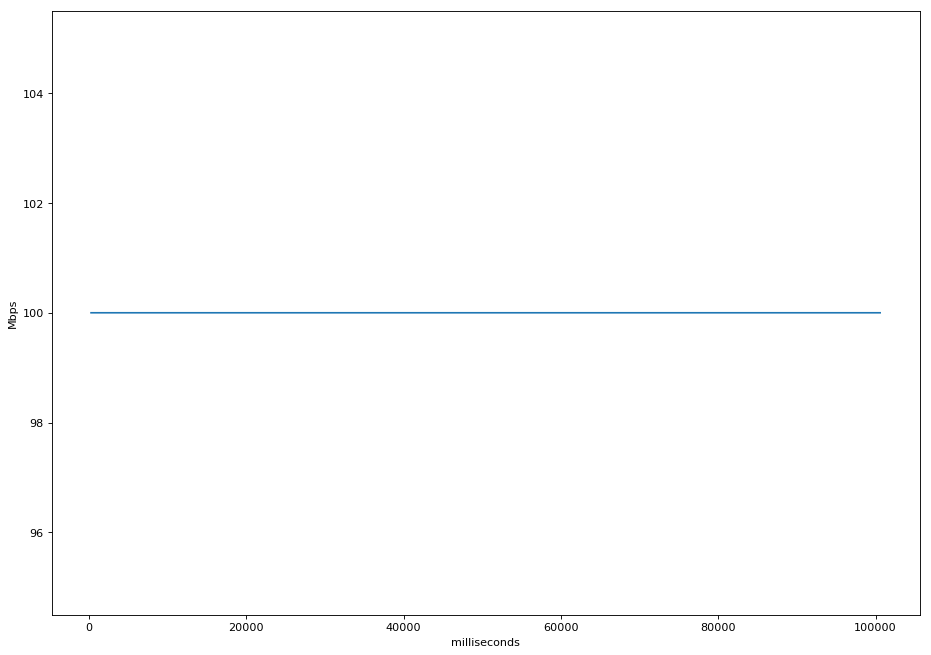

star_dtn2-lbl_dtn2-10000:17:0


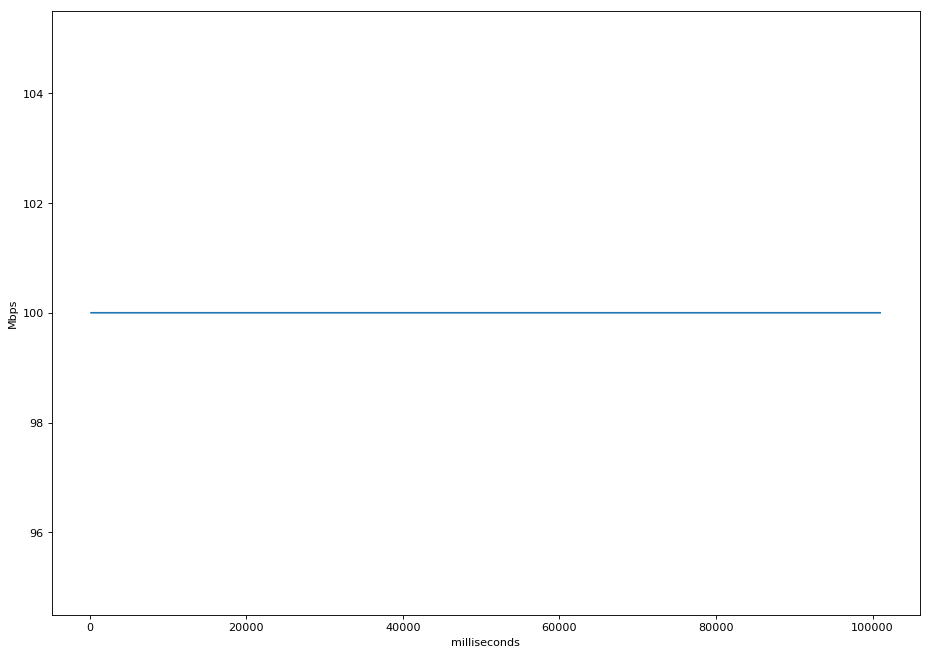

cern_dtn2-wash_dtn2-10000:33:0
(457640, 1116.2707970142365, 0.40997220497399023)


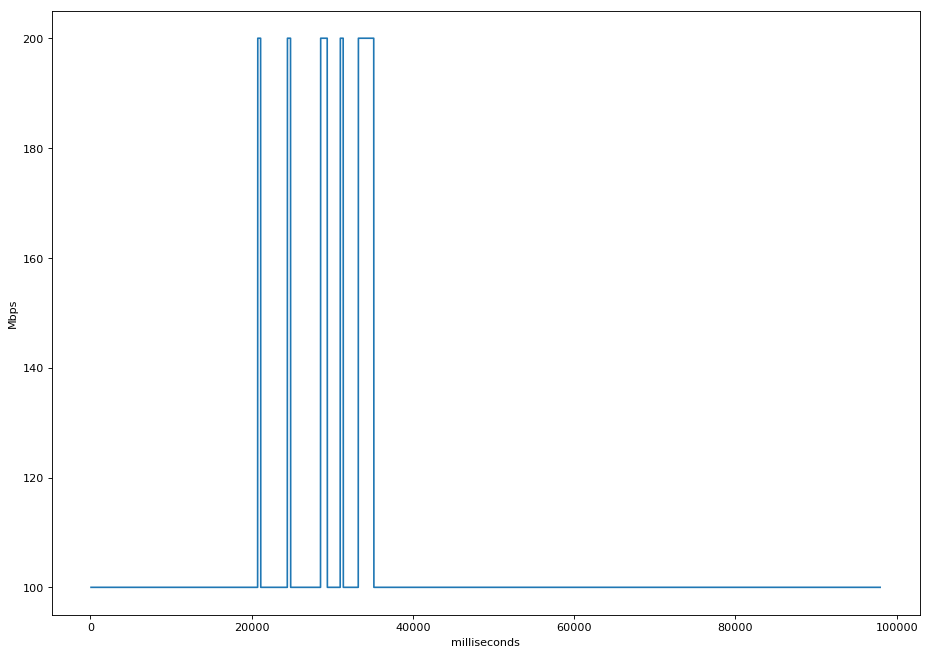

aofa_dtn2-atla_dtn2-10000:31:0


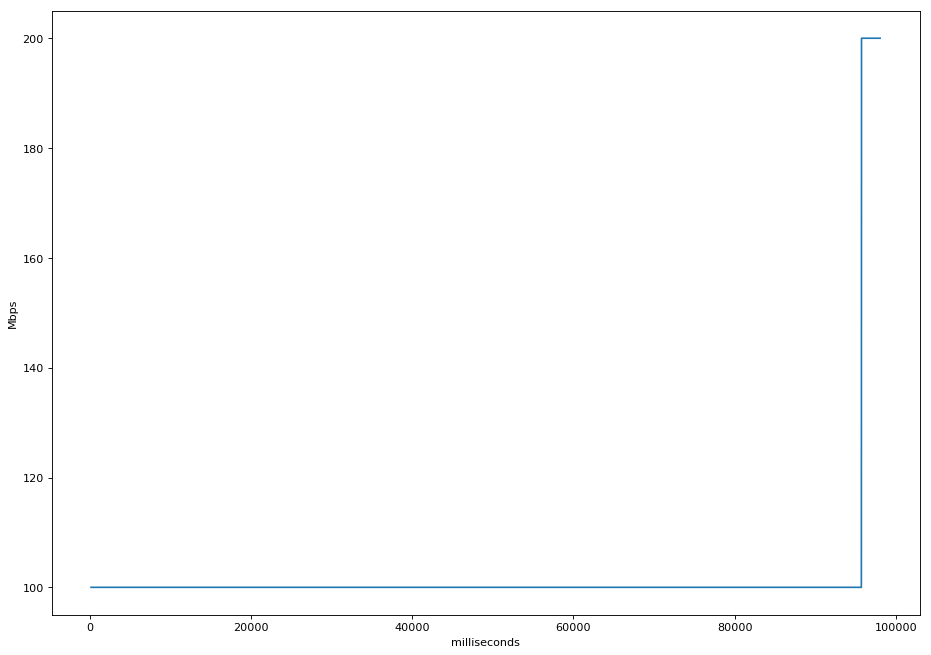

denv_dtn2-aofa_dtn2-10000:5:0


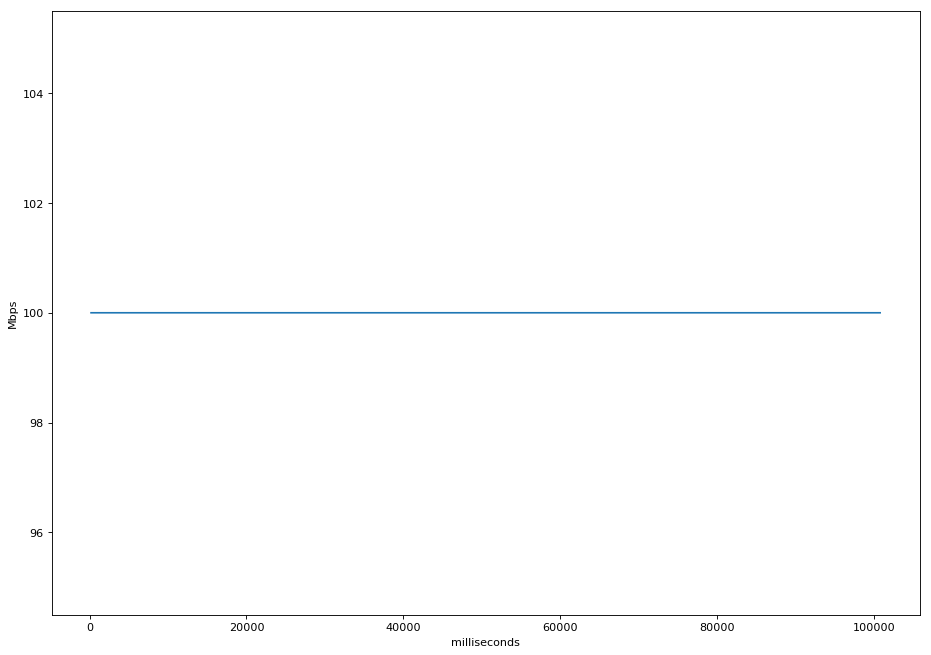

amst_dtn2-denv_dtn2-10000:35:0


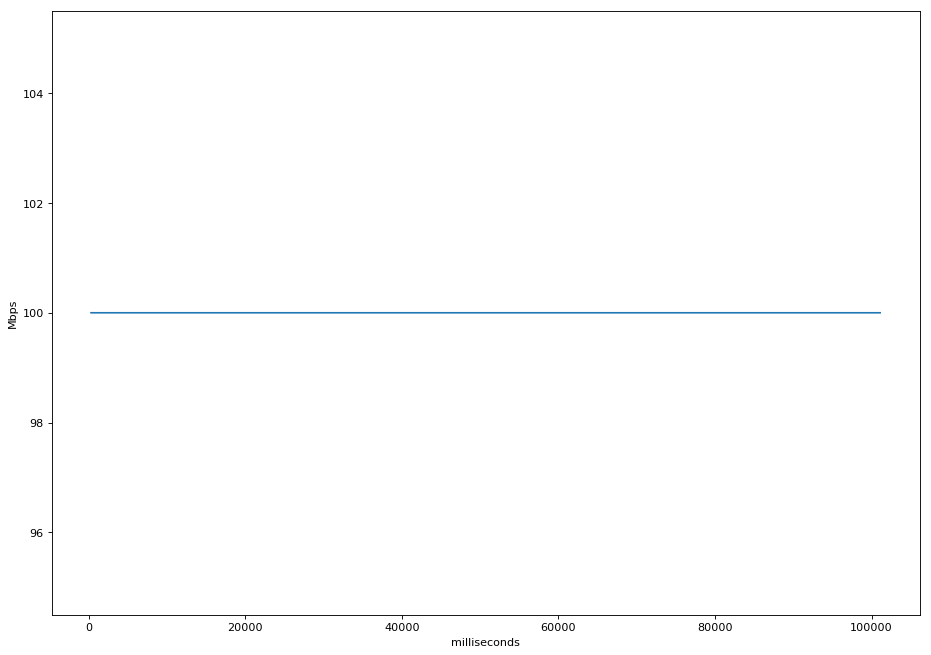

(457640, 1117.2746880054474, 0.4096038377249702)
star_dtn2-aofa_dtn2-10000:4:0


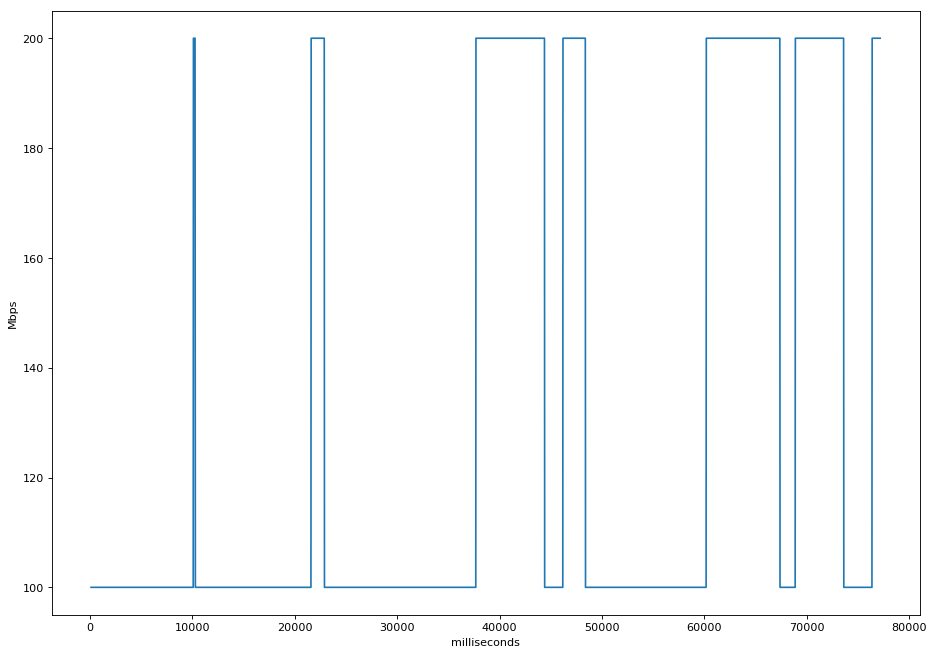

star_dtn-cern_dtn-800000:0:0


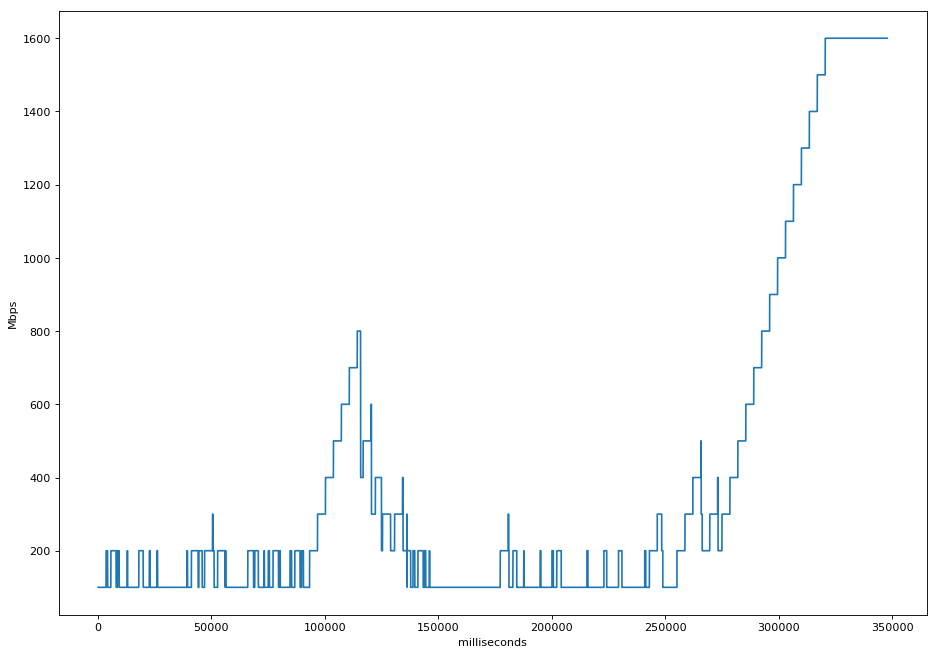

star_dtn-cern_dtn-800000:0:1


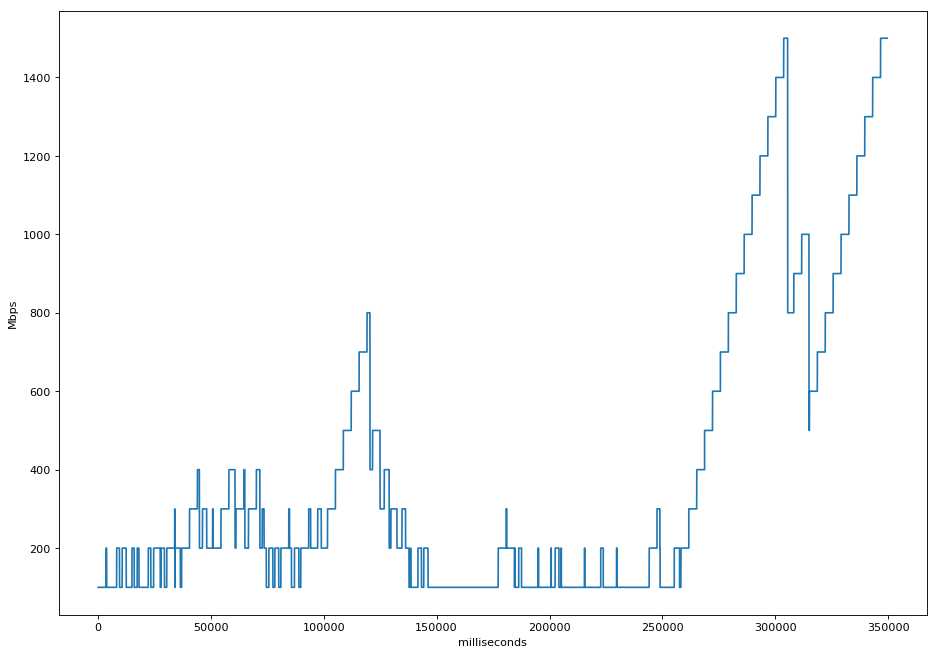

(457640, 1118.2812960147858, 0.40923513755518376)
star_dtn-cern_dtn-800000:0:2


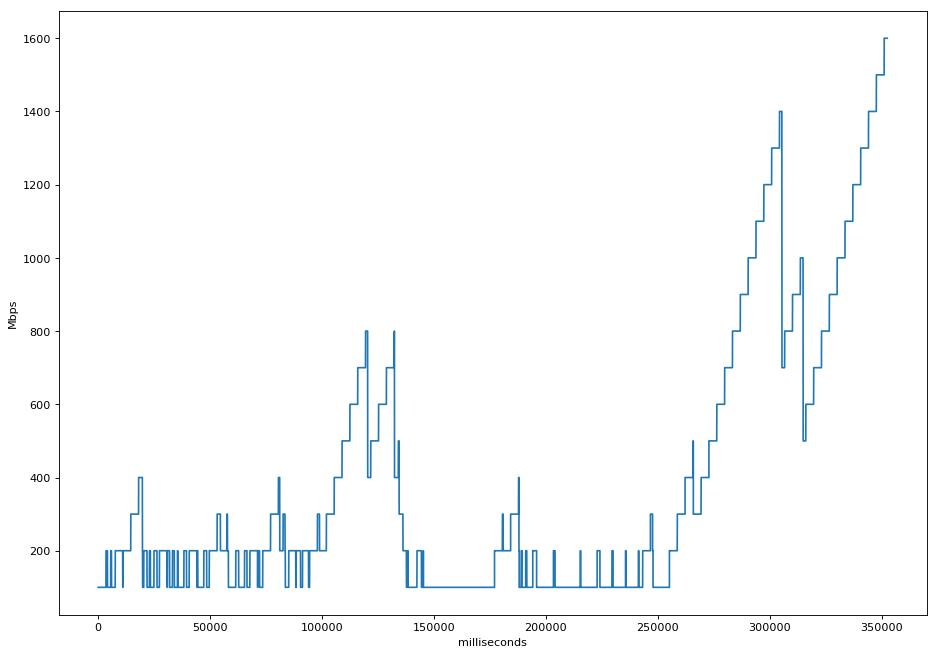

star_dtn-cern_dtn-800000:0:3


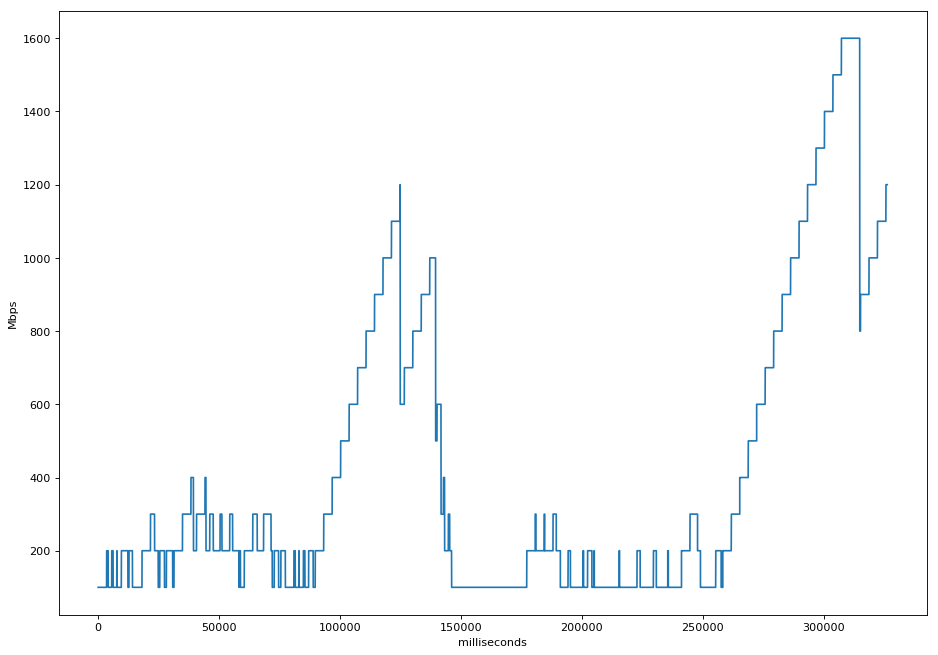

star_dtn-cern_dtn-800000:0:4
(457640, 1119.3395249843597, 0.4088482446882187)

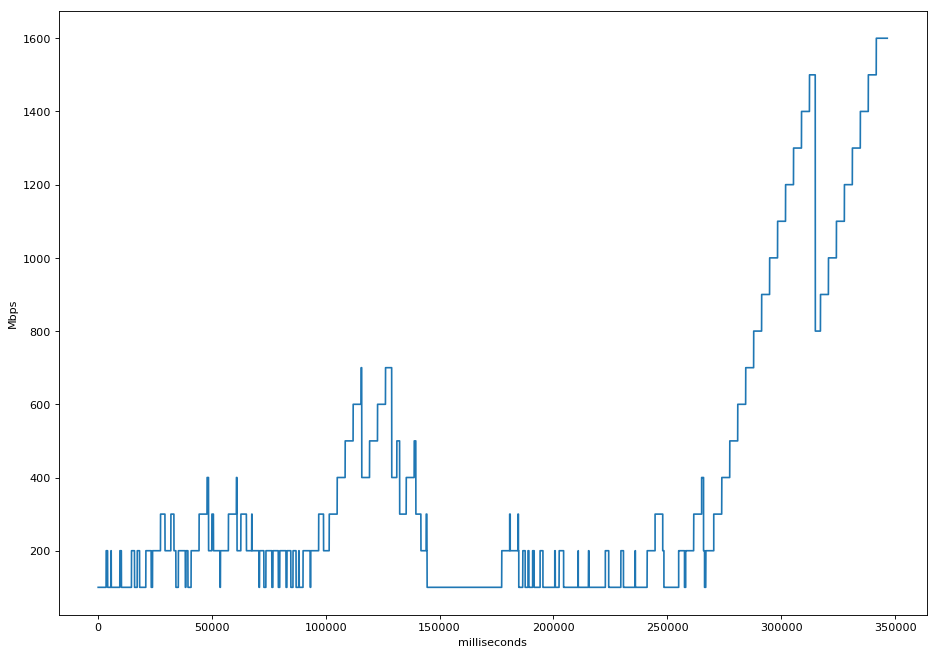


star_dtn-cern_dtn-800000:0:5


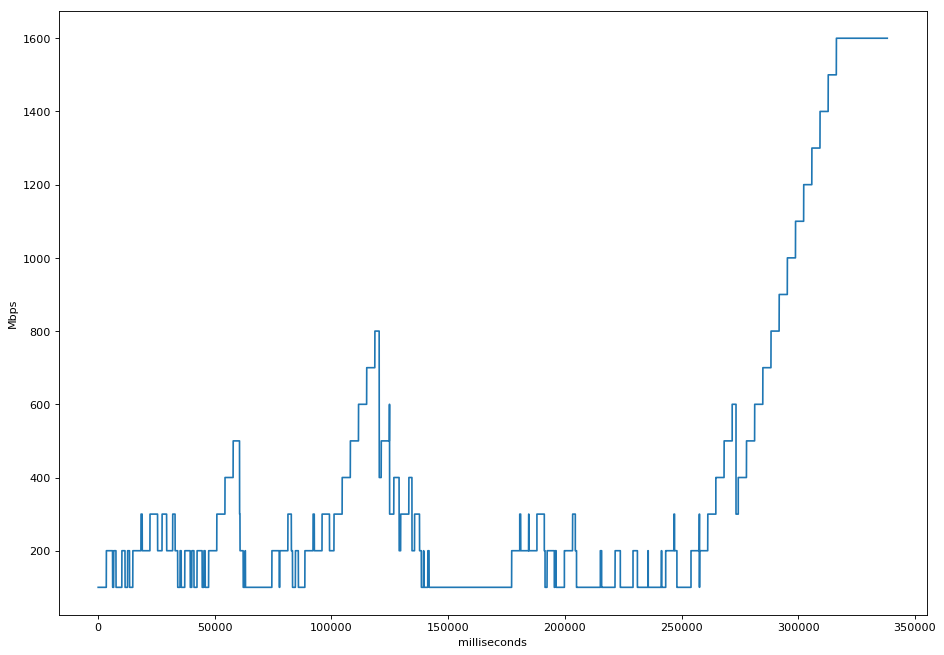

star_dtn2-wash_dtn2-10000:38:0


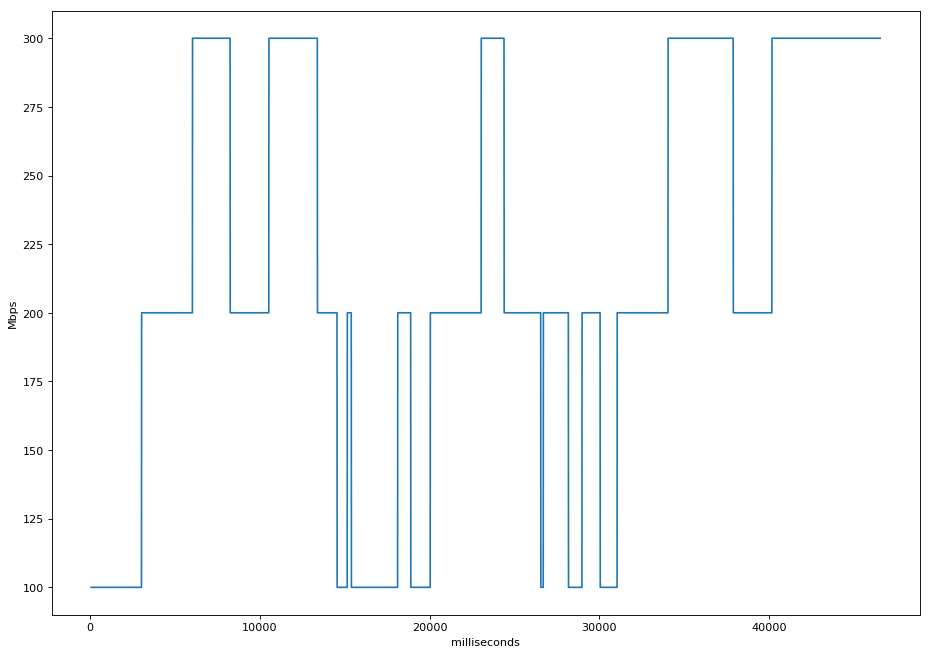

aofa_dtn2-cern_dtn2-10000:23:0


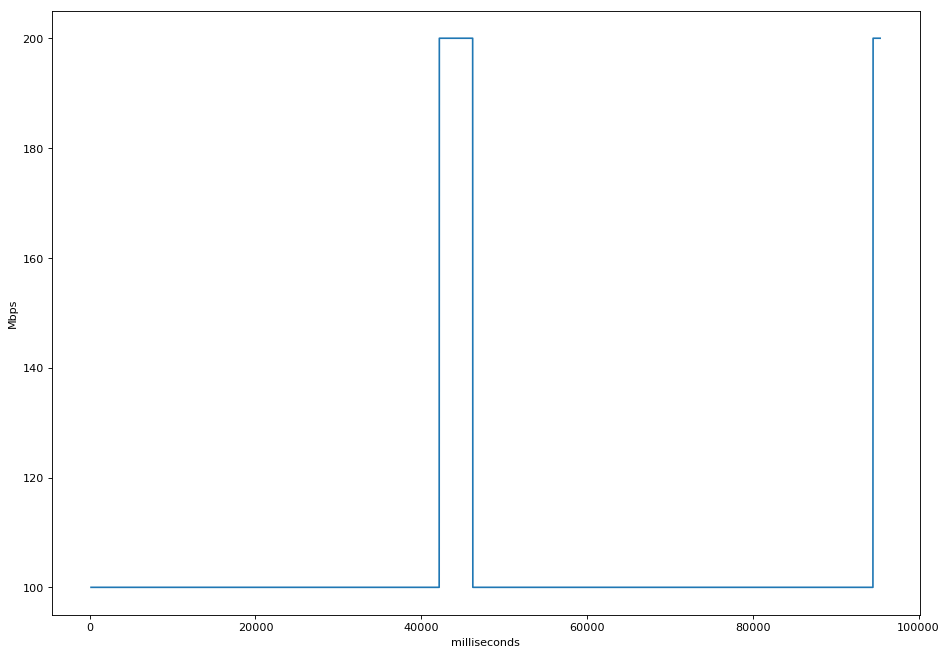

(457640, 1120.3434641361237, 0.40848187600476416)
aofa_dtn2-amst_dtn2-10000:0:0


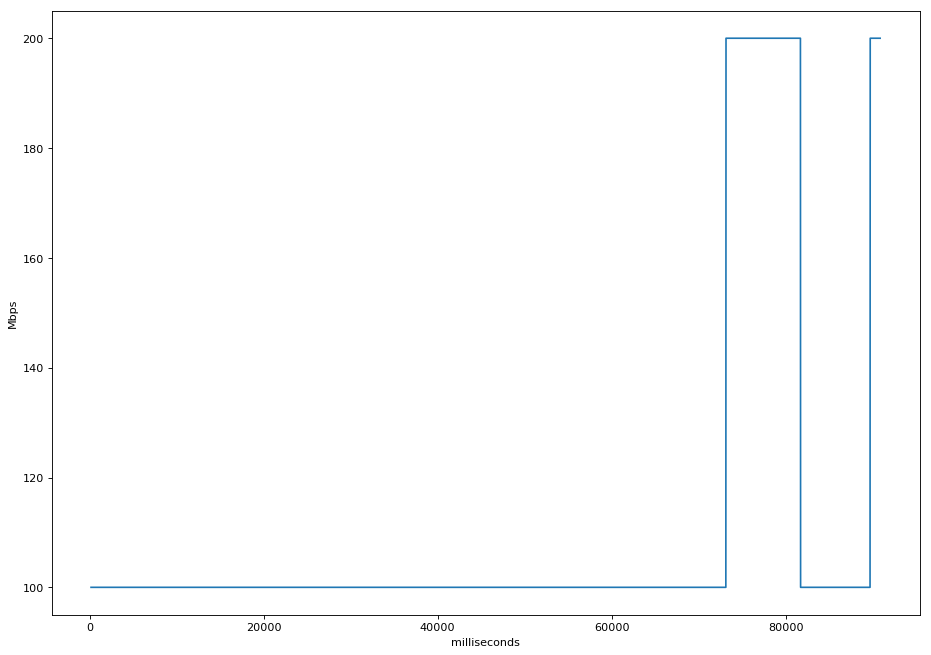

lbl_dtn2-atla_dtn2-10000:0:0


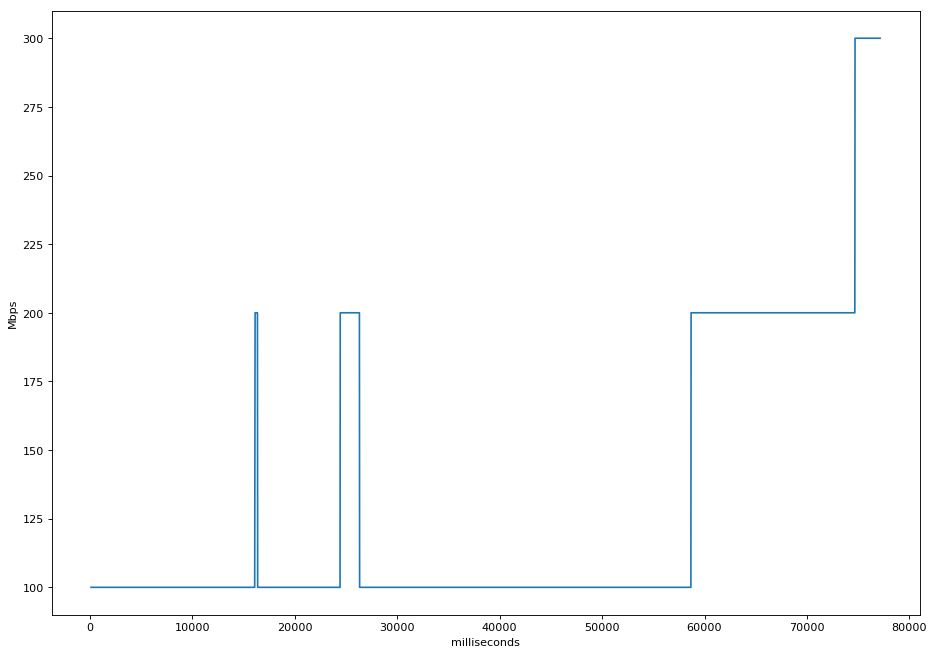

atla_dtn2-cern_dtn2-10000:32:0


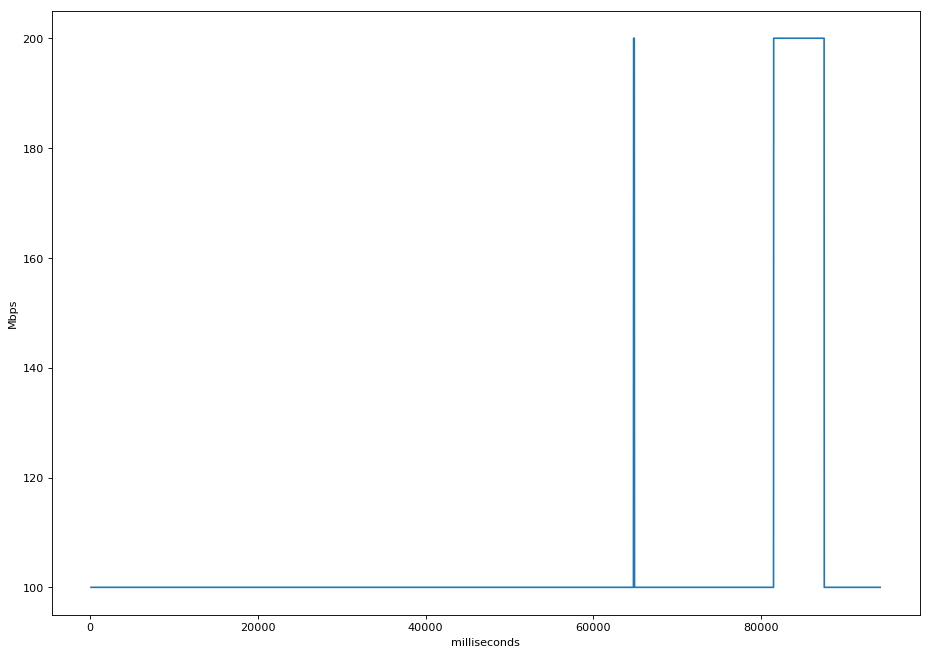

denv_dtn2-atla_dtn2-10000:29:0
(457640, 1121.4007210731506, 0.40809675916923854)


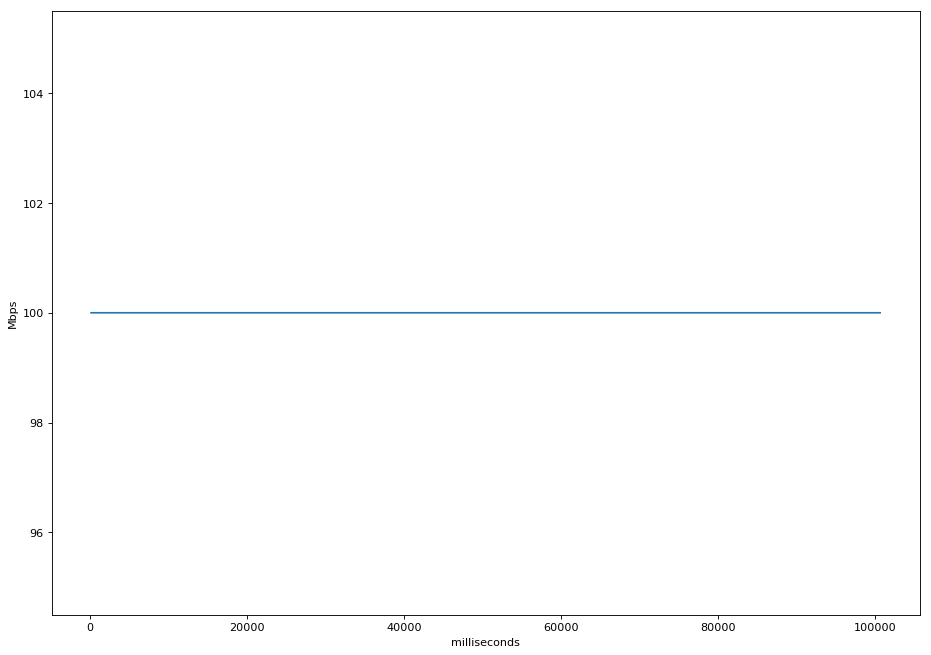

star_dtn2-atla_dtn2-10000:25:0


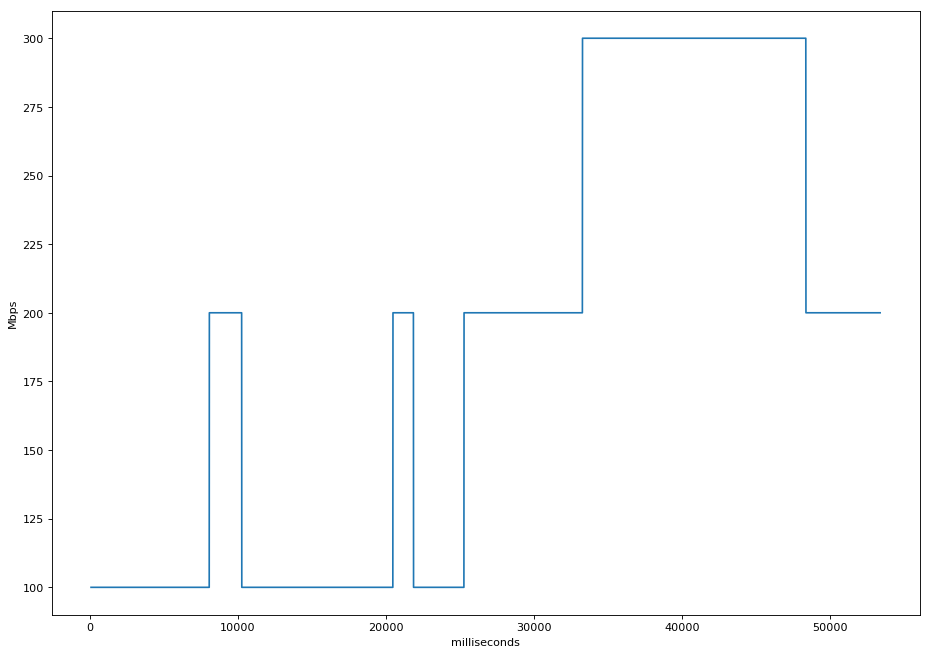

amst_dtn2-star_dtn2-10000:12:0


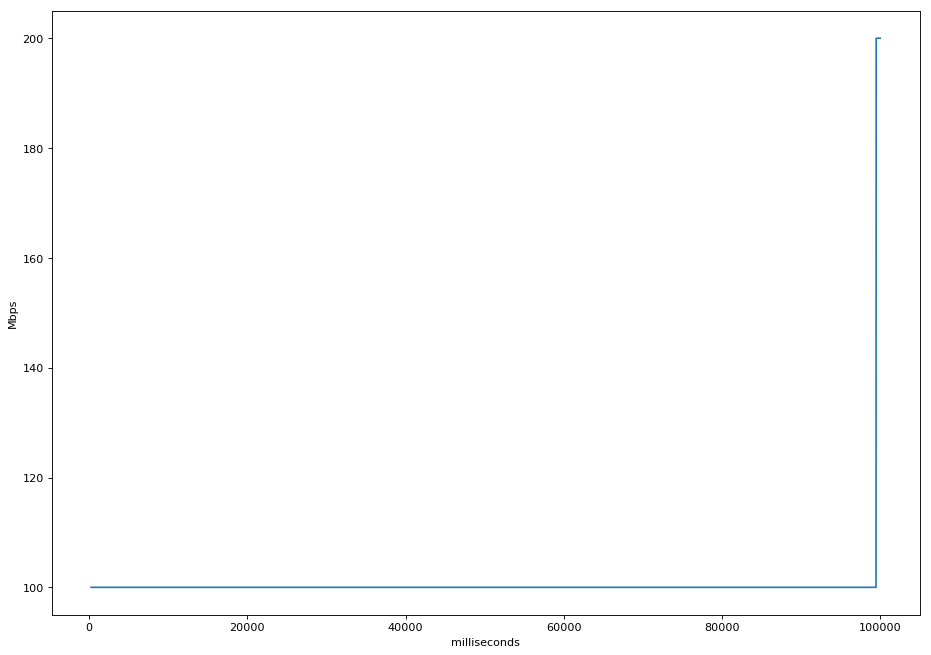

amst_dtn2-denv_dtn2-10000:20:0


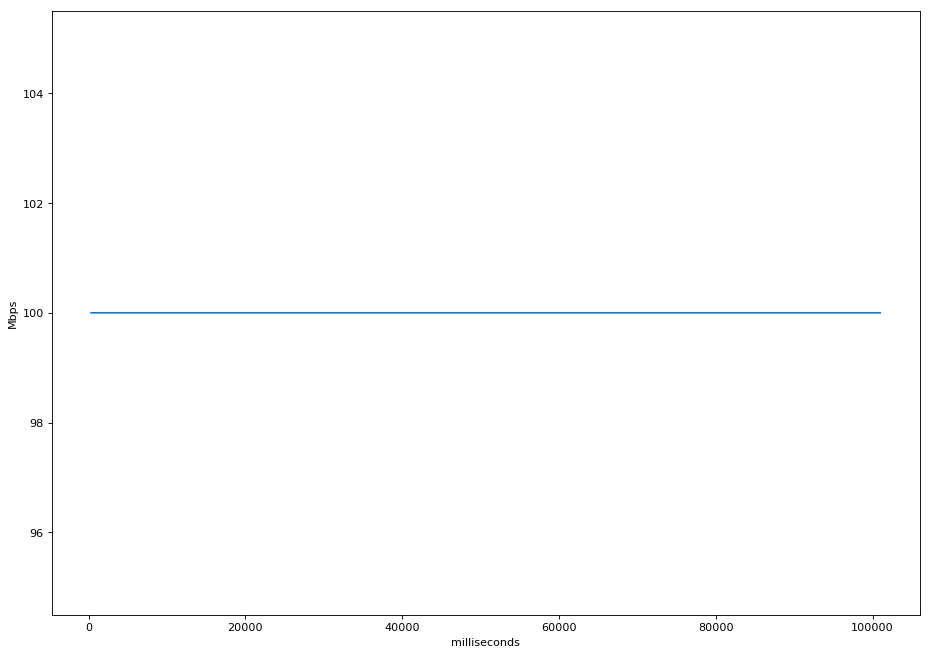

(457640, 1122.4023399353027, 0.4077325783429667)
cern_dtn2-denv_dtn2-10000:21:0


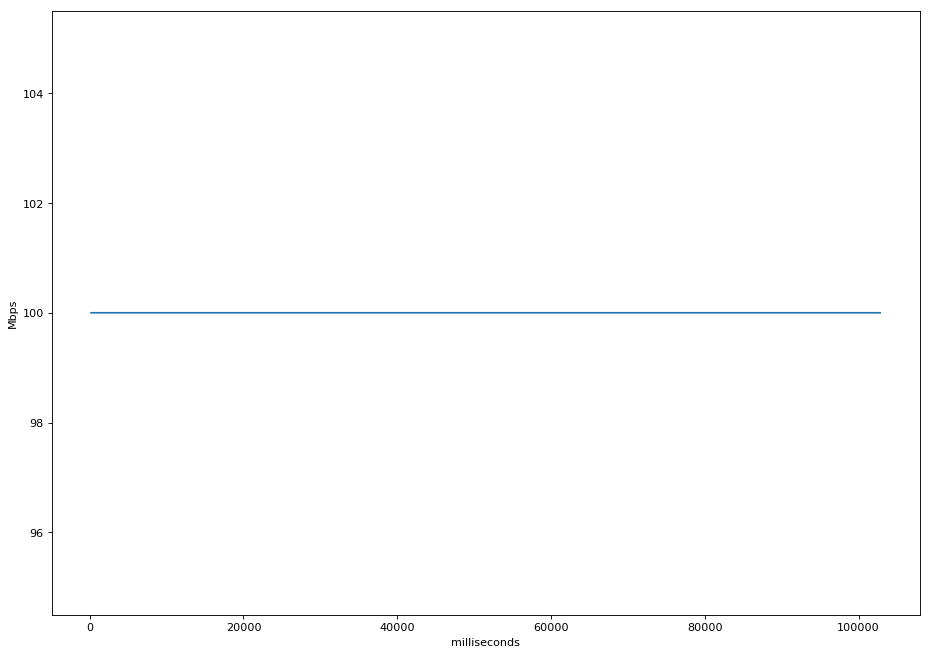

wash_dtn2-amst_dtn2-10000:18:0


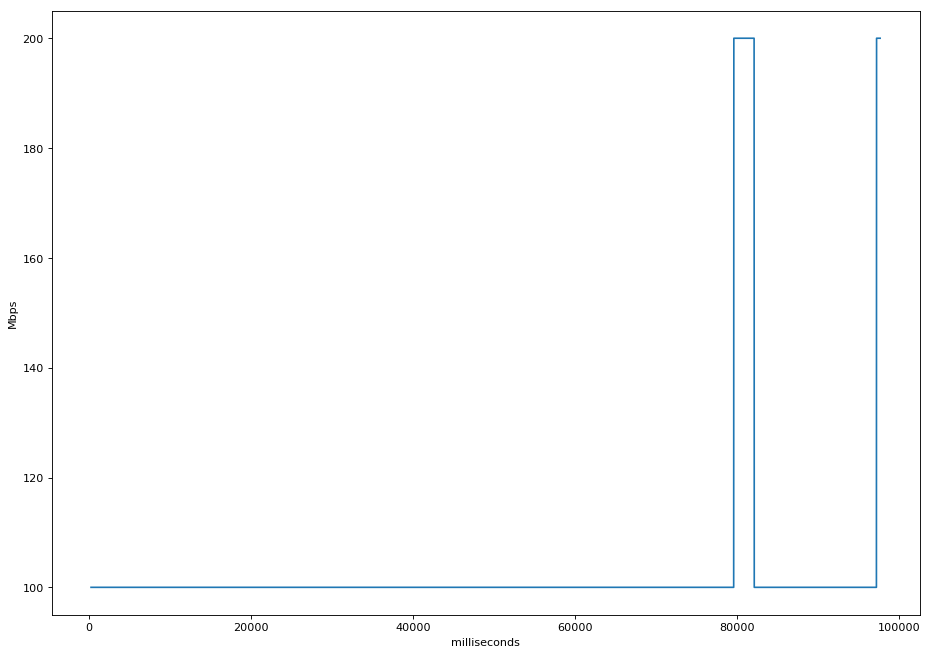

cern_dtn2-denv_dtn2-10000:23:0


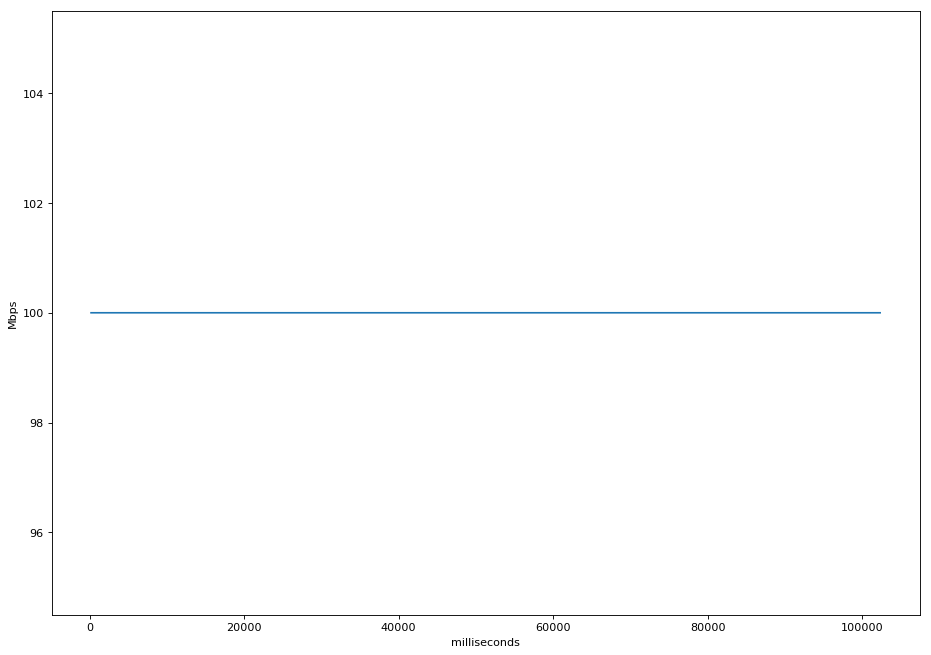

lbl_dtn2-star_dtn2-10000:14:0
(457640, 1123.5008890628815, 0.407333901072139)


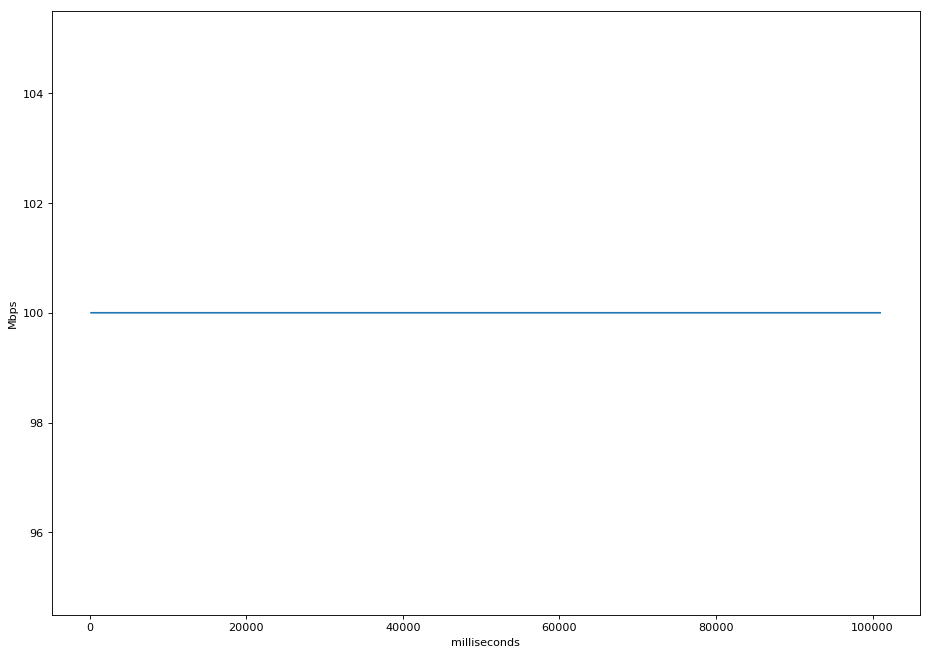

amst_dtn2-lbl_dtn2-10000:17:0


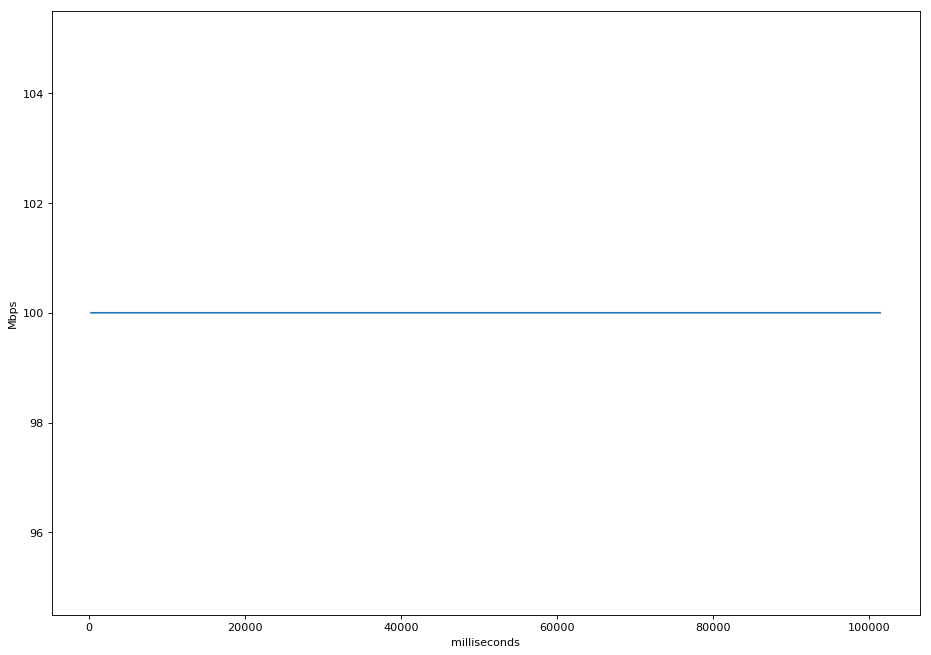

lbl_dtn2-denv_dtn2-10000:35:0


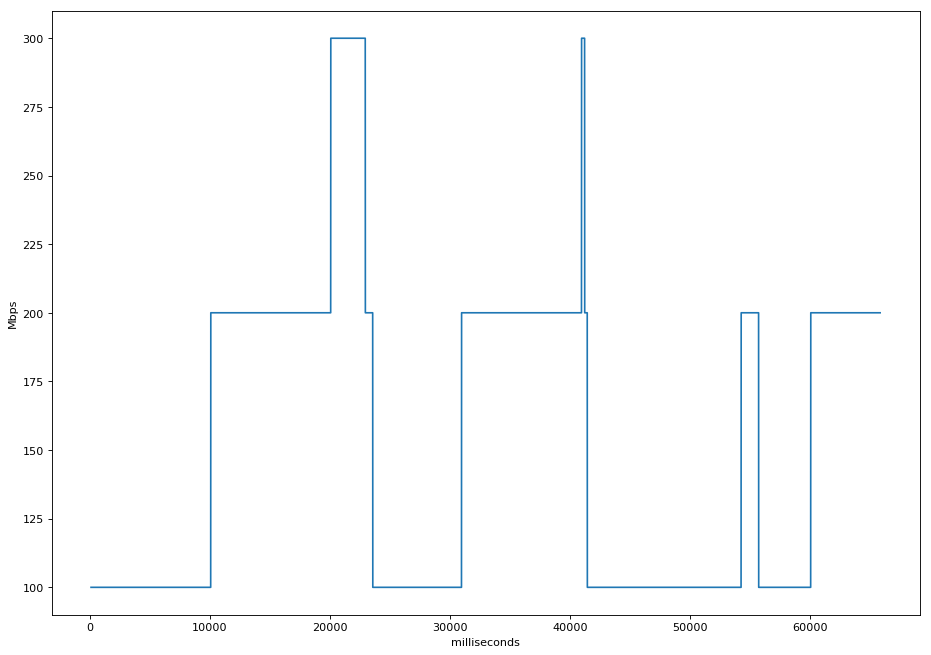

aofa_dtn2-cern_dtn2-10000:6:0
(457640, 1124.521141052246, 0.40696433645682584)

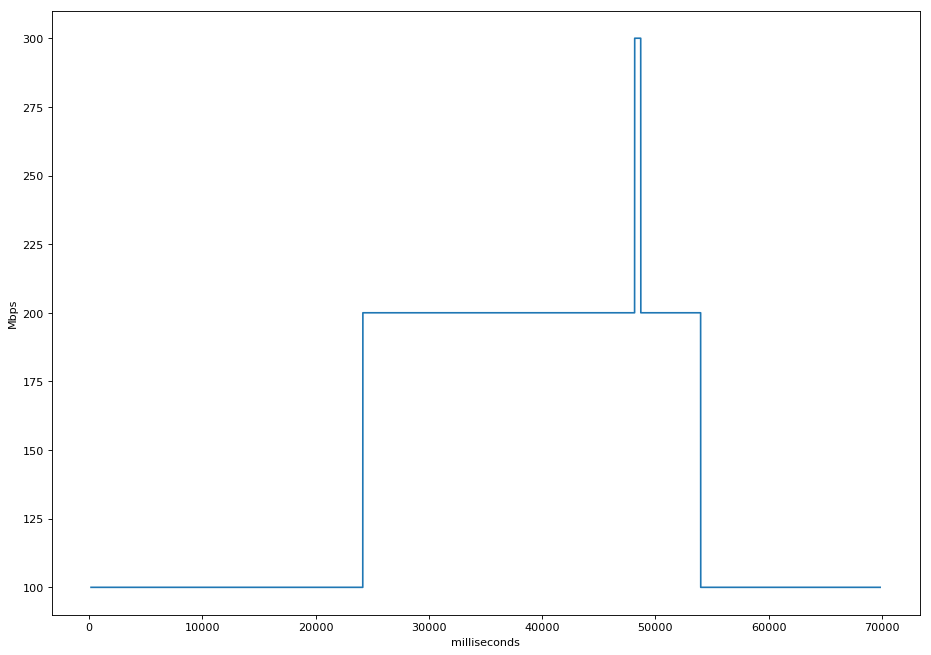


denv_dtn2-atla_dtn2-10000:11:0


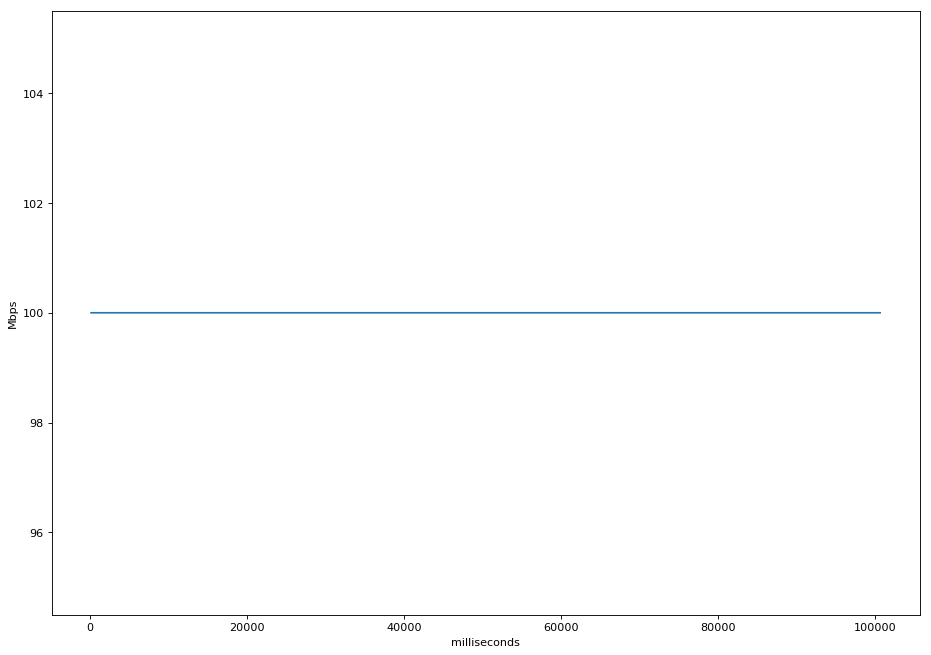

denv_dtn2-lbl_dtn2-10000:6:0


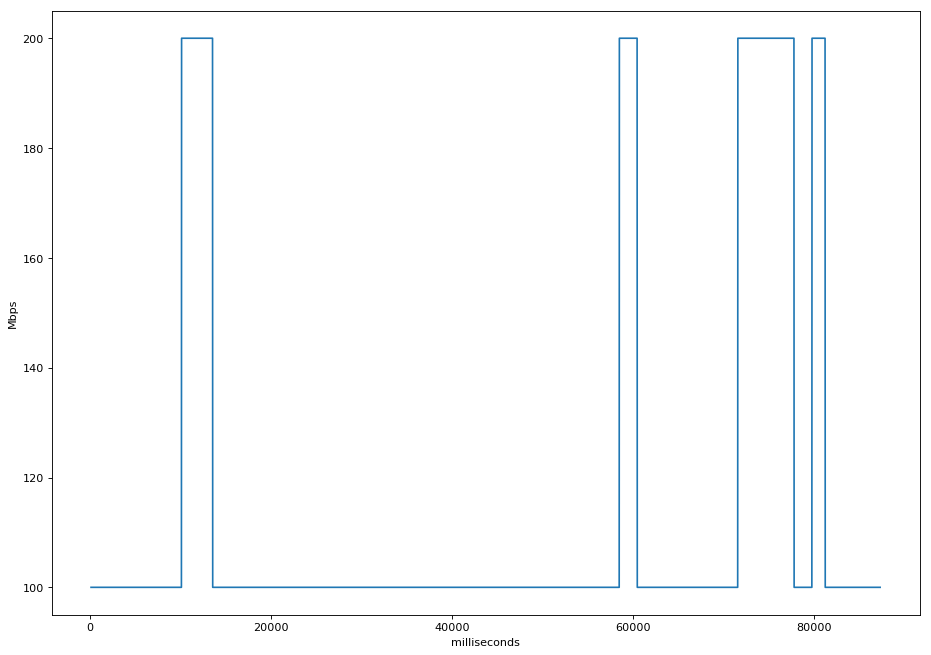

atla_dtn2-amst_dtn2-10000:27:0


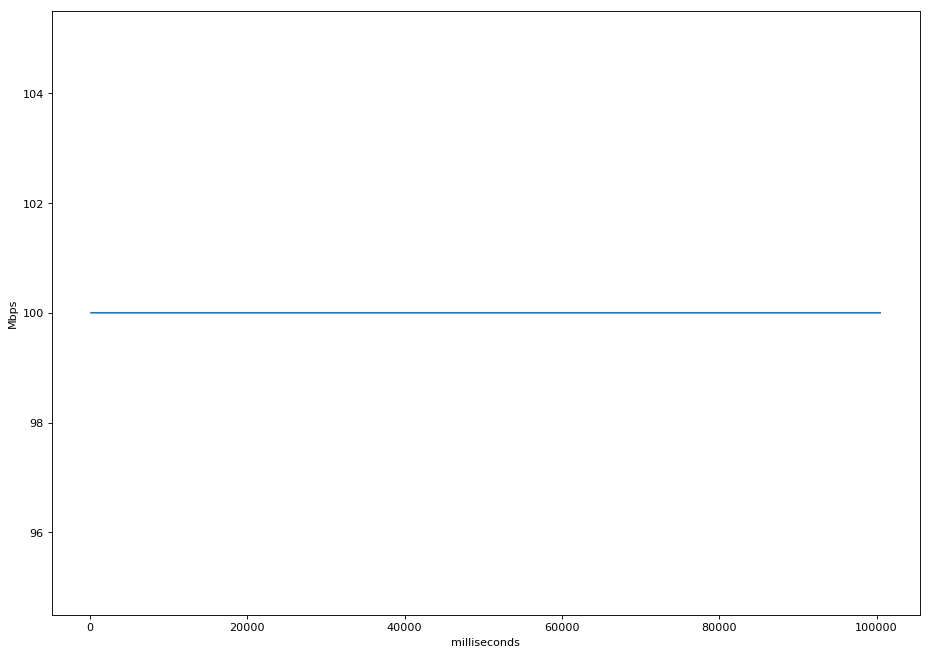

lbl_dtn2-star_dtn2-10000:3:0
(457640, 1125.5761089324951, 0.4065829012966784)


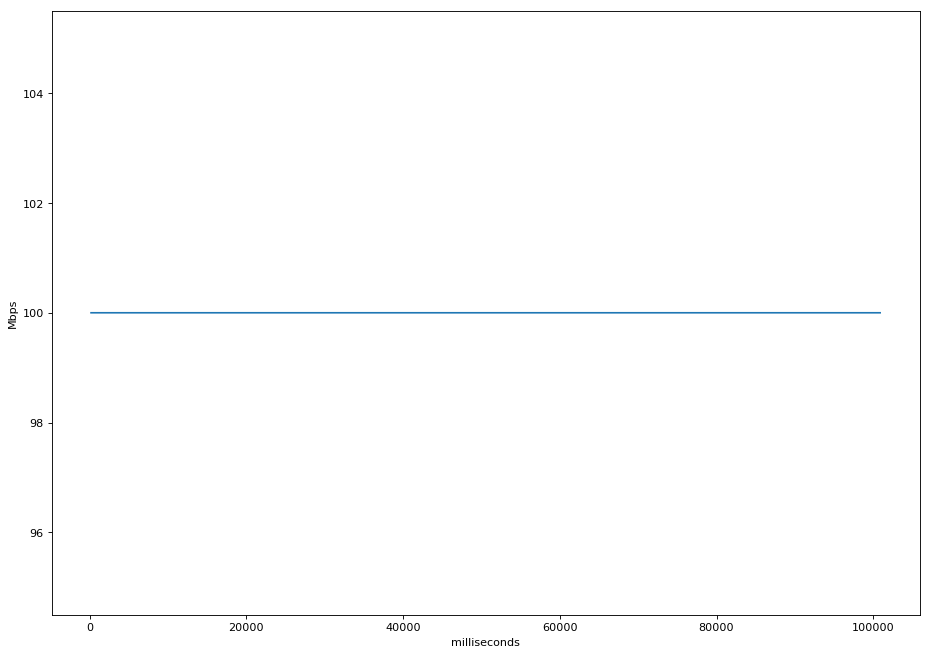

star_dtn2-lbl_dtn2-10000:5:0


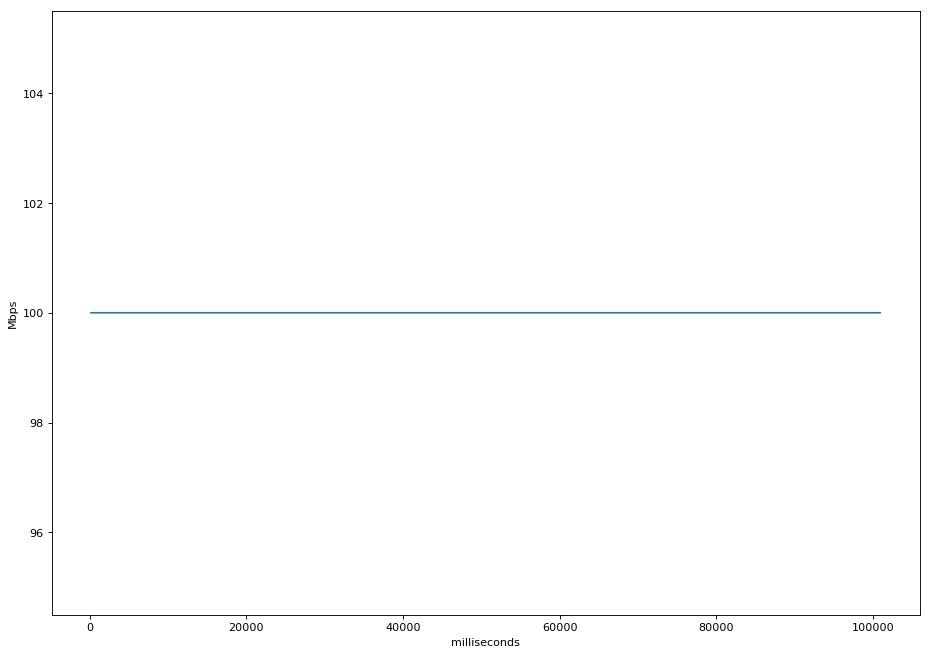

atla_dtn2-aofa_dtn2-10000:18:0


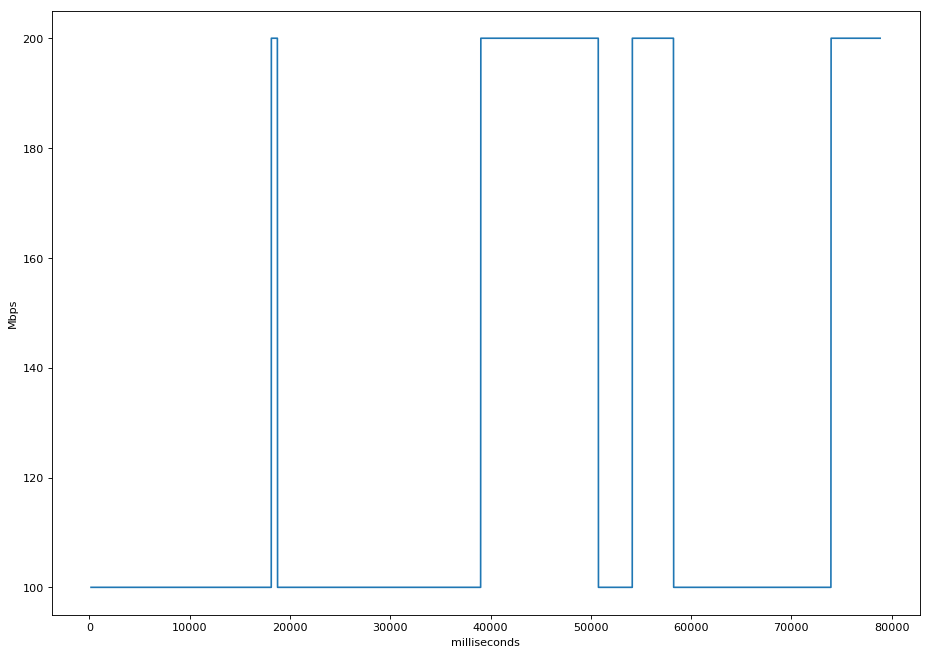

atla_dtn2-aofa_dtn2-10000:26:0


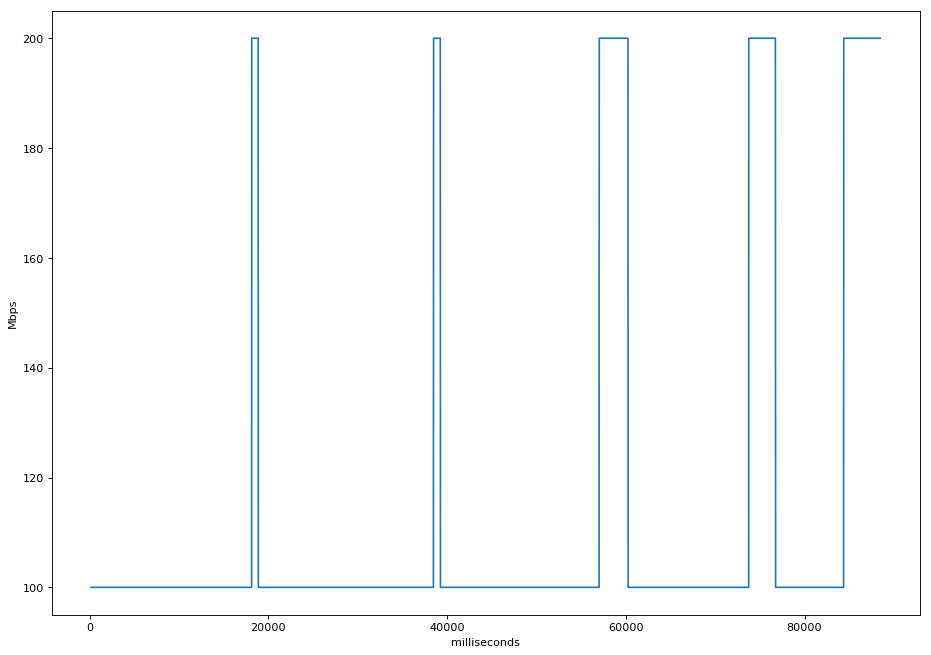

wash_dtn2-cern_dtn2-10000:39:0
(457640, 1126.581932067871, 0.40621990018958465)


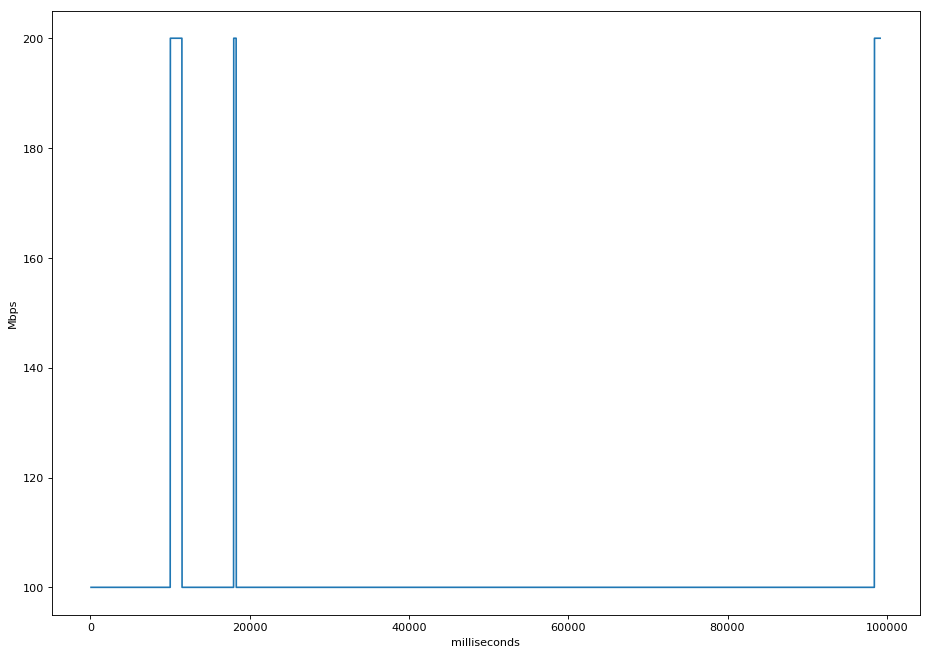

amst_dtn2-cern_dtn2-10000:19:0


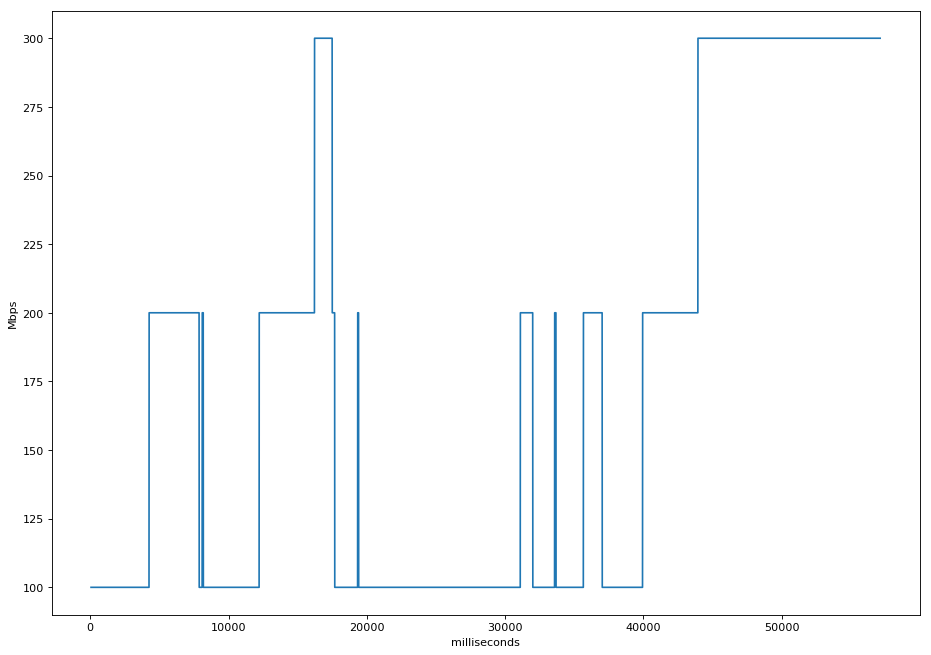

star_dtn2-cern_dtn2-10000:12:0


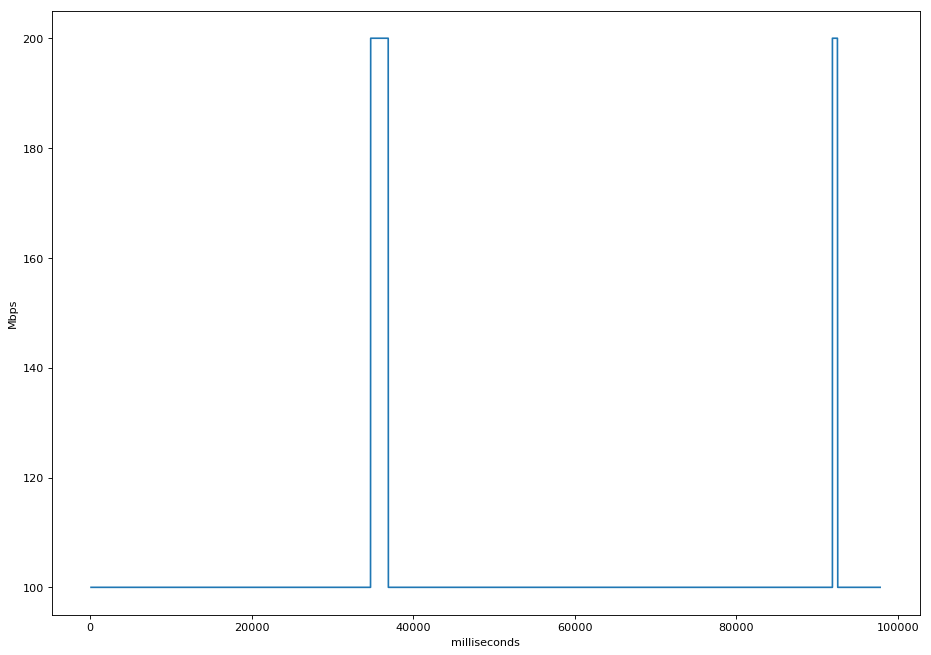

cern_dtn2-lbl_dtn2-10000:3:0
(457640, 1127.63125705719, 0.40584188947929273)


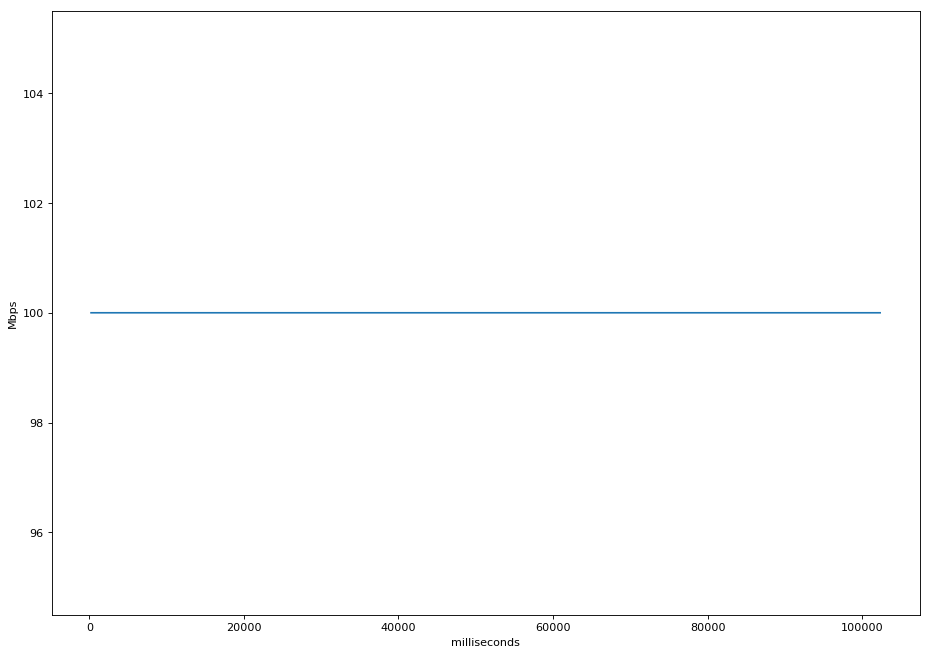

denv_dtn2-wash_dtn2-10000:26:0


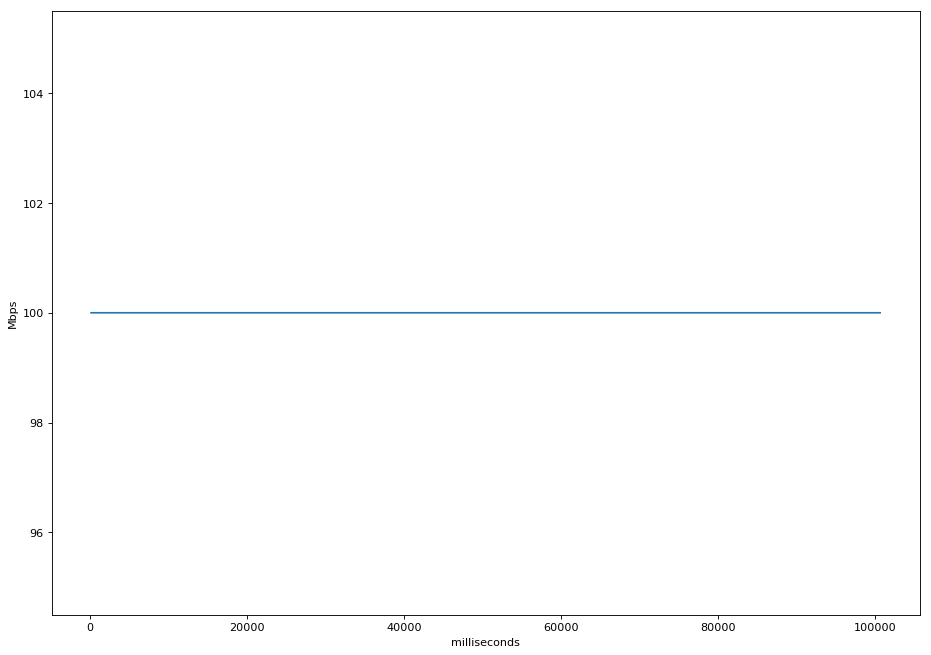

wash_dtn2-star_dtn2-10000:35:0


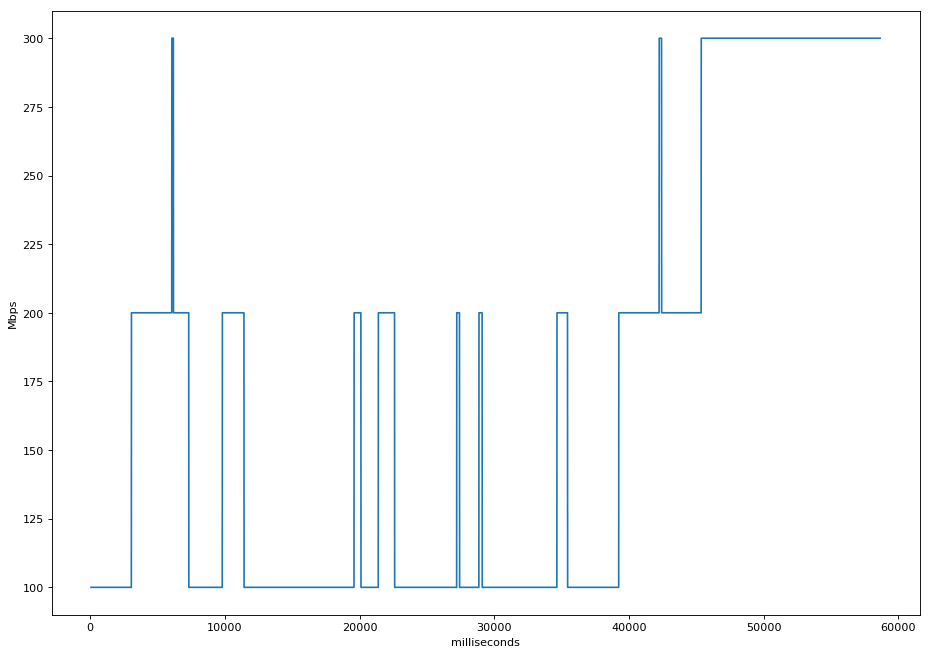

lbl_dtn2-cern_dtn2-10000:8:0


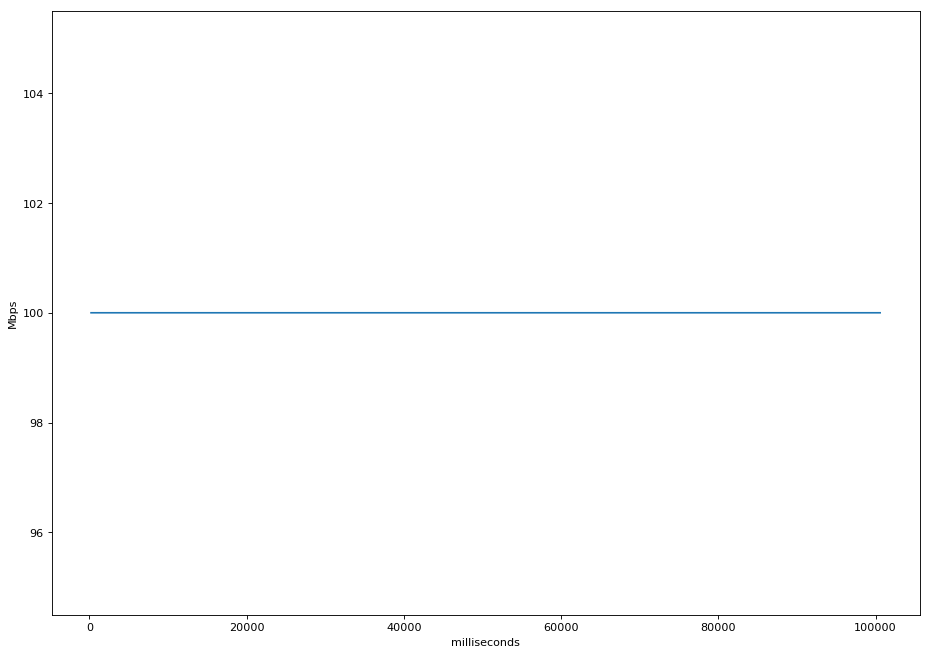

wash_dtn2-amst_dtn2-10000:38:0
(457640, 1128.6938970088959, 0.4054597984562267)


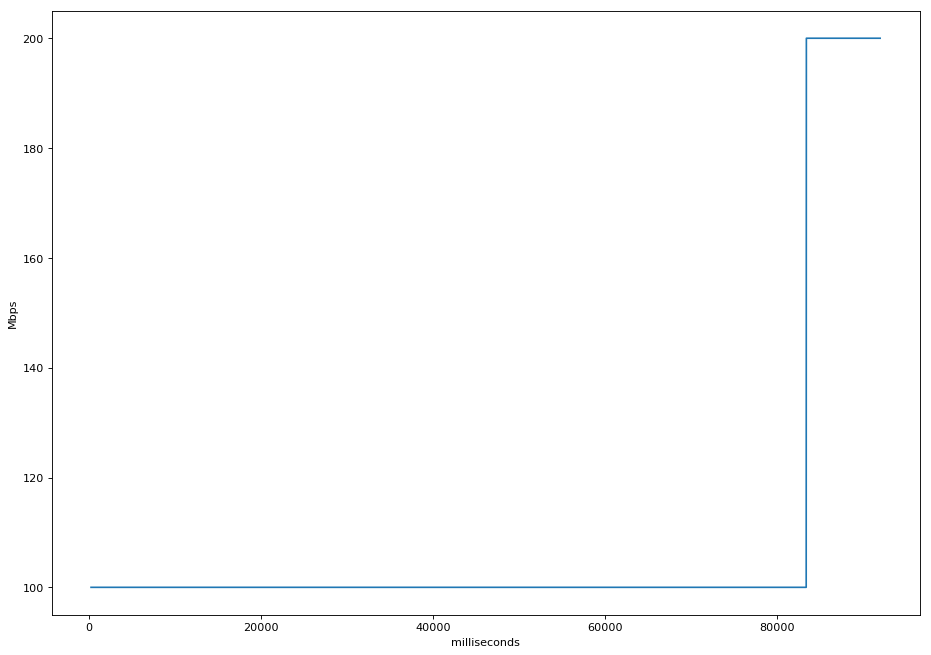

lbl_dtn2-cern_dtn2-10000:26:0


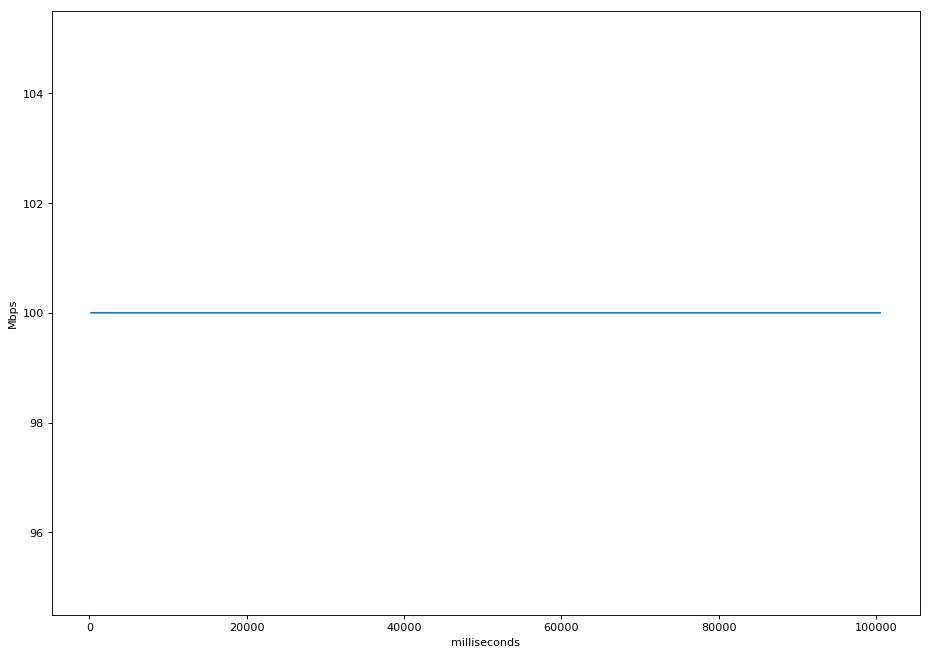

wash_dtn2-amst_dtn2-10000:2:0


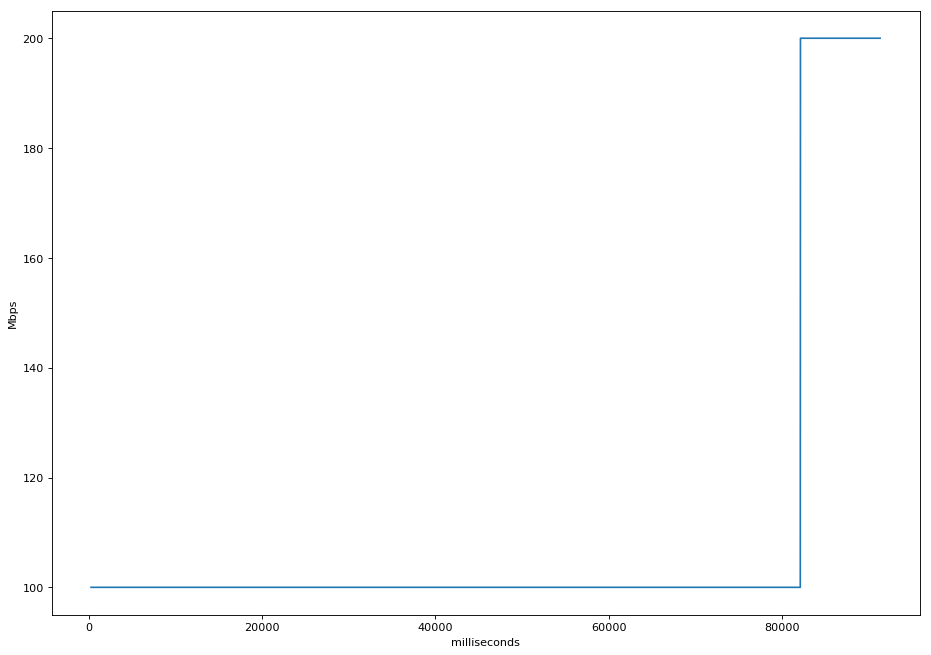

lbl_dtn2-amst_dtn2-10000:13:0


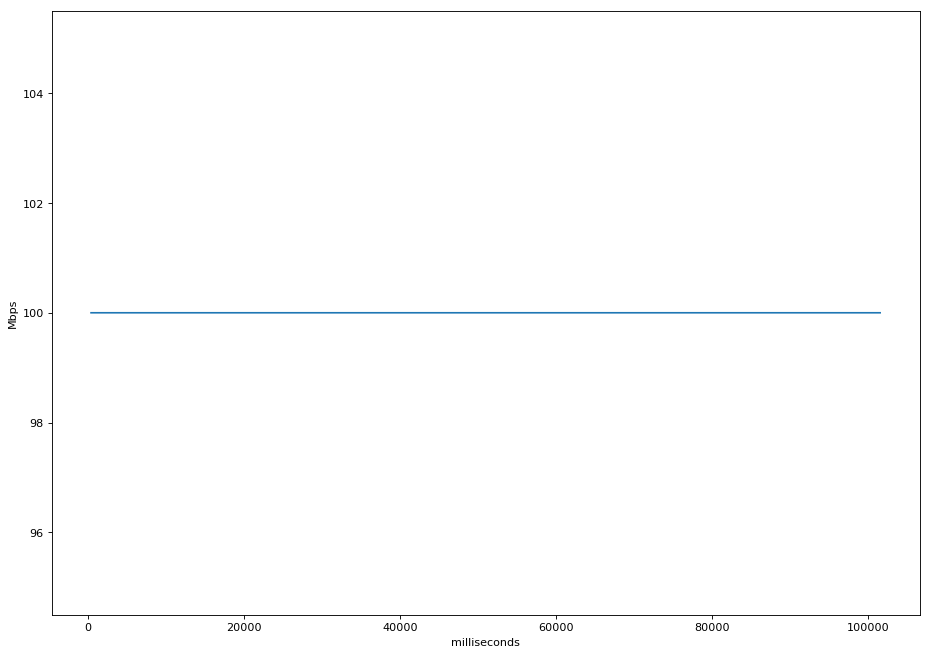

(457640, 1129.697436094284, 0.4050996181616593)
wash_dtn2-lbl_dtn2-10000:16:0


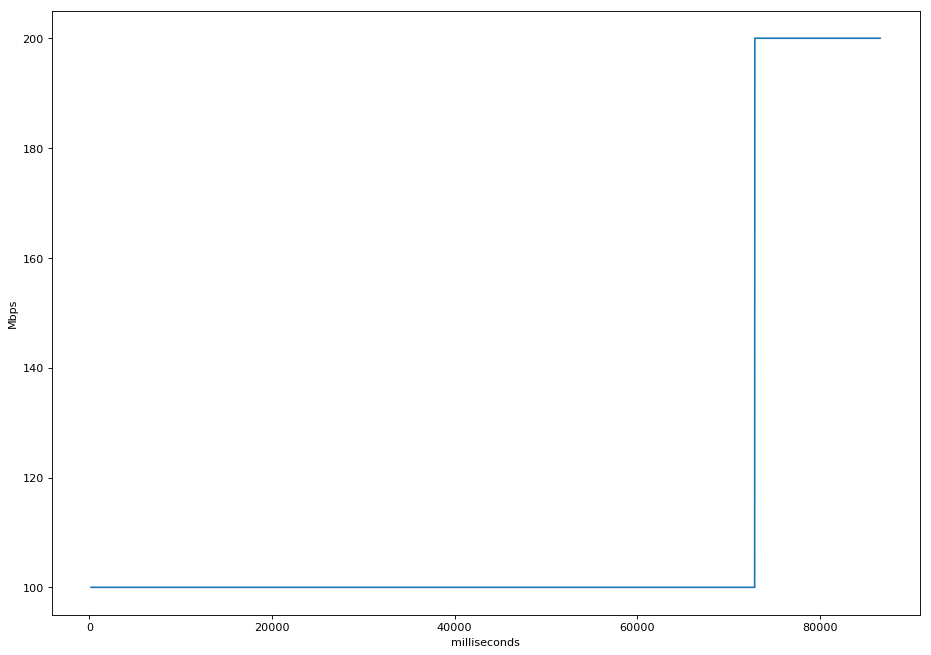

star_dtn2-denv_dtn2-10000:27:0


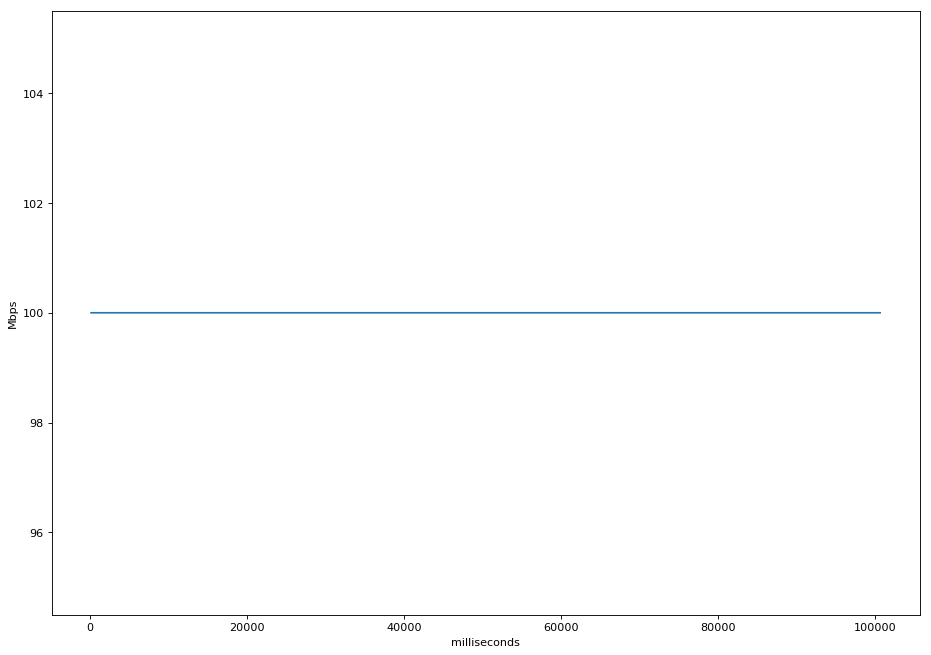

cern_dtn2-lbl_dtn2-10000:5:0


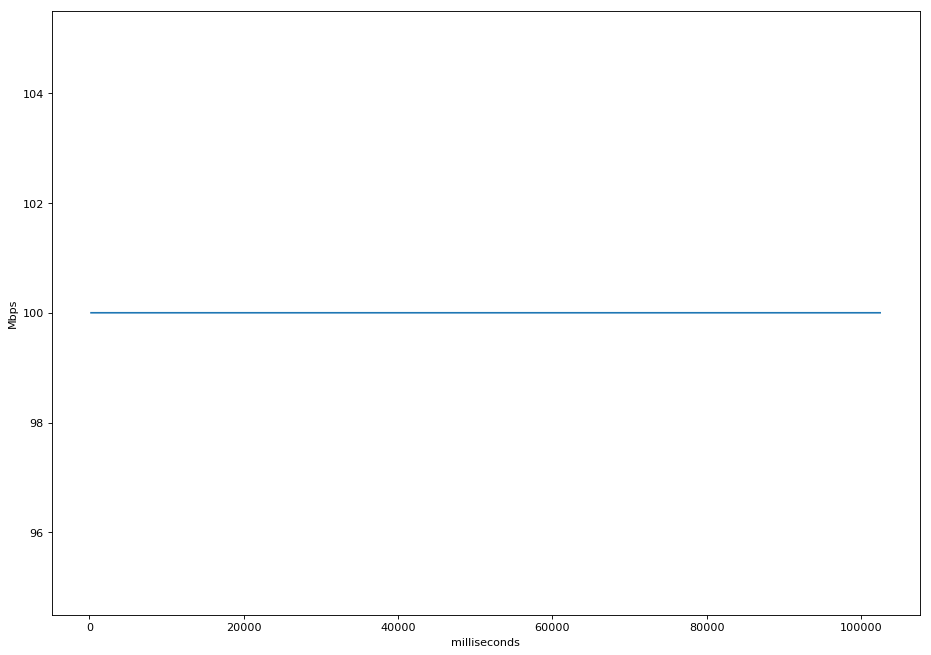

wash_dtn2-amst_dtn2-10000:36:0
(457640, 1130.7714030742645, 0.4047148687664009)


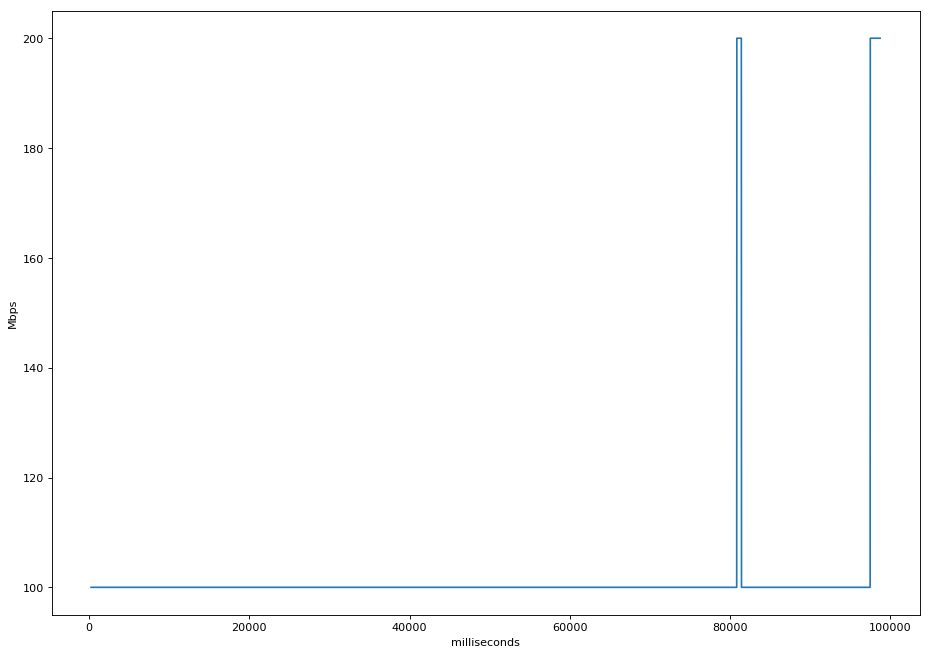

atla_dtn2-star_dtn2-10000:30:0


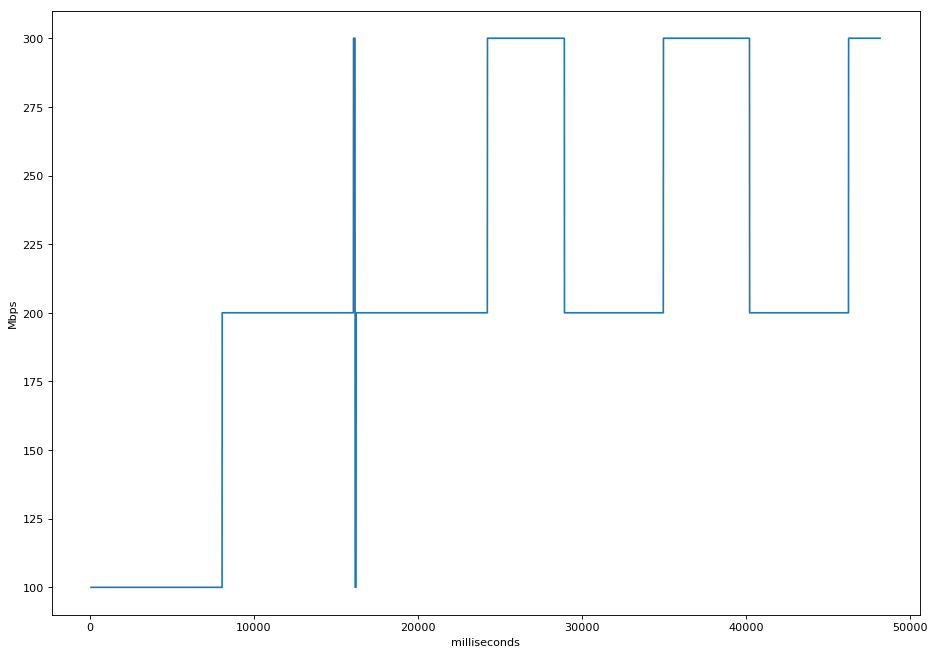

lbl_dtn2-cern_dtn2-10000:39:0


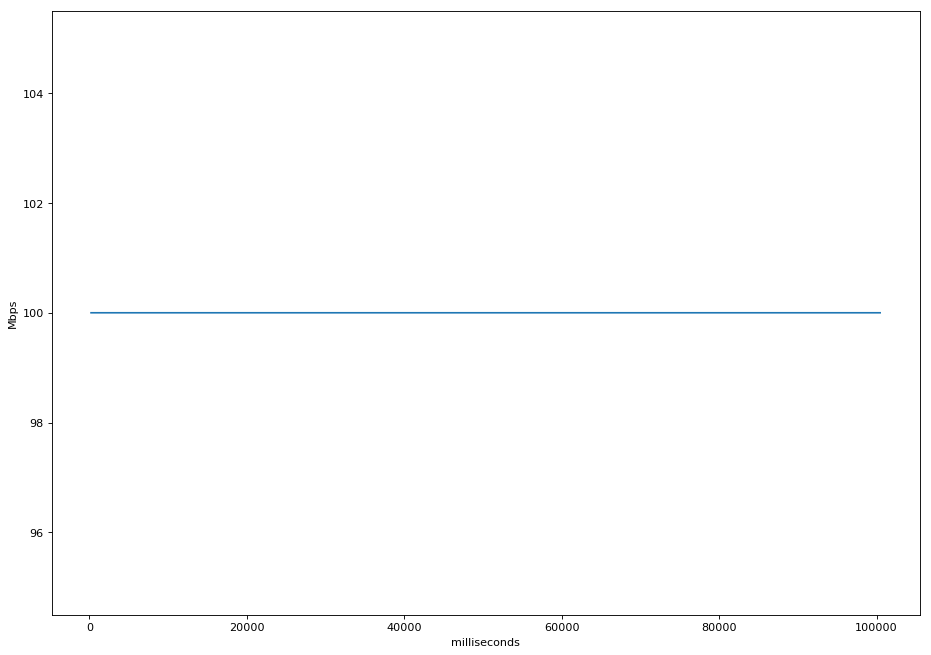

wash_dtn2-star_dtn2-10000:5:0


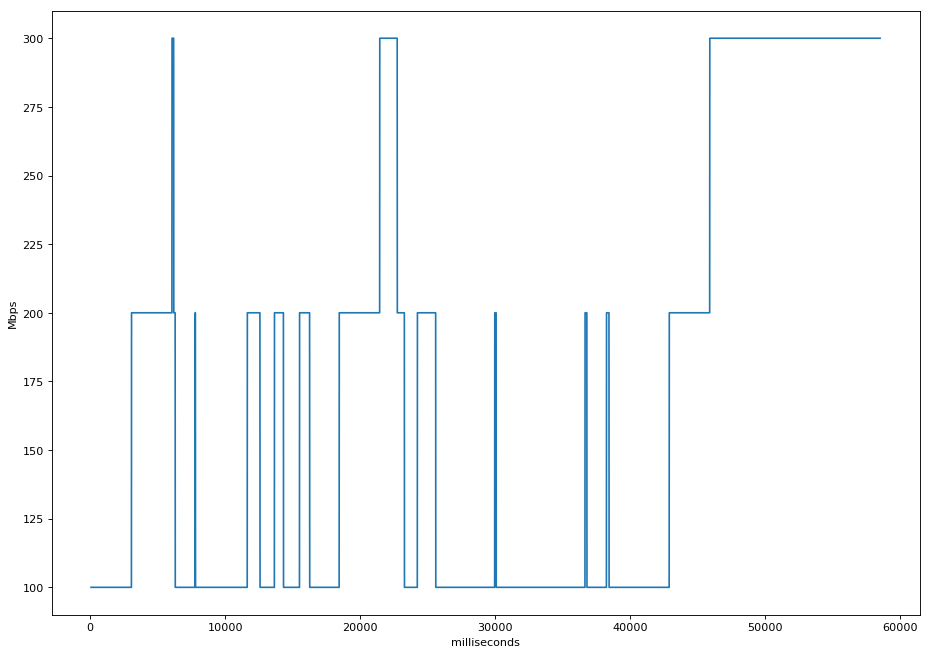

(457640, 1131.775850057602, 0.4043556857806326)
wash_dtn2-cern_dtn2-10000:0:0


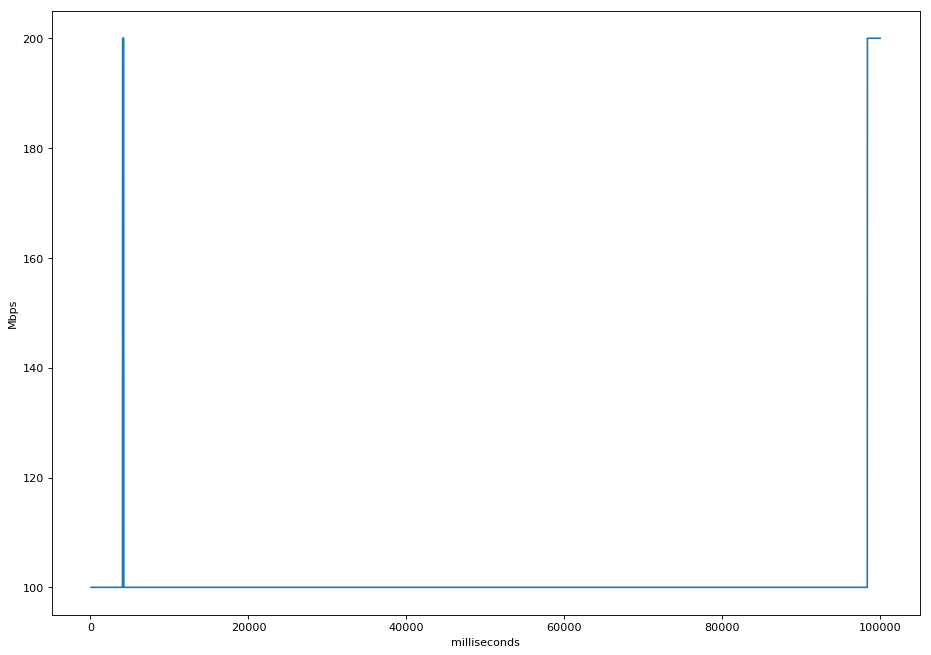

amst_dtn2-wash_dtn2-10000:0:0


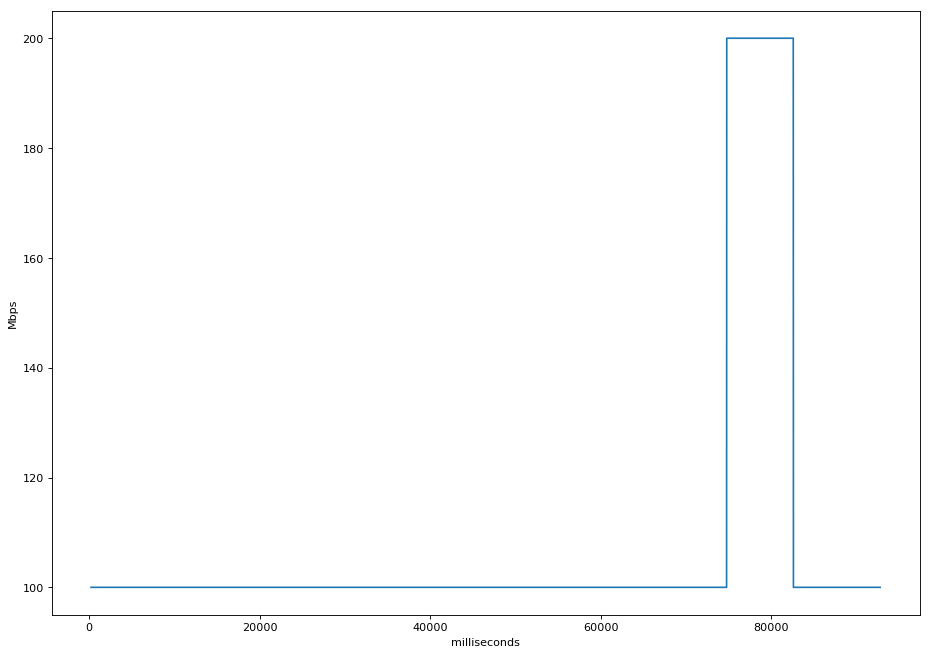

wash_dtn2-aofa_dtn2-10000:28:0


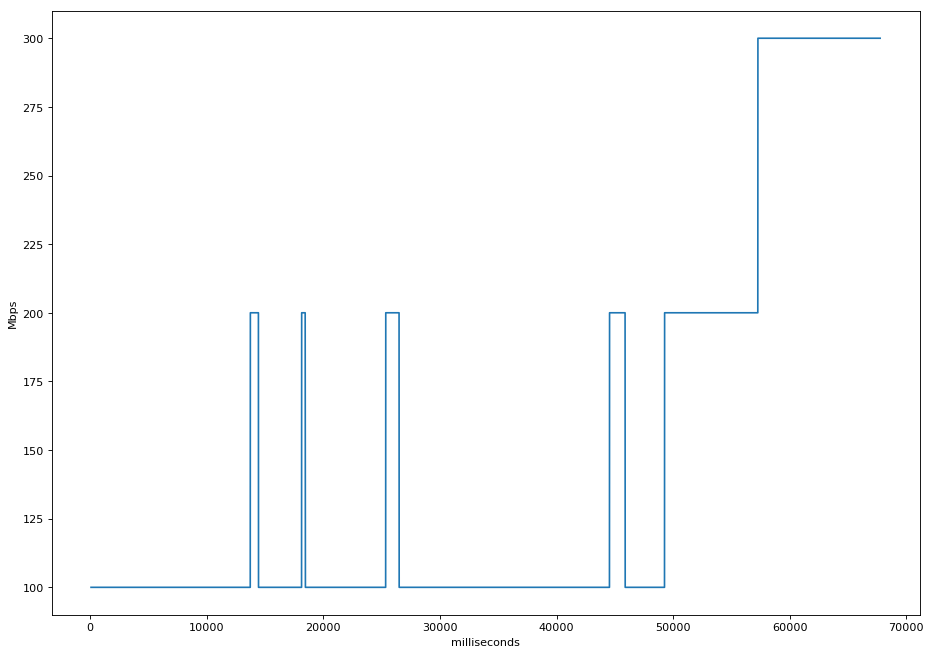

denv_dtn2-amst_dtn2-10000:16:0
(457640, 1132.8673689365387, 0.4039660886601424)


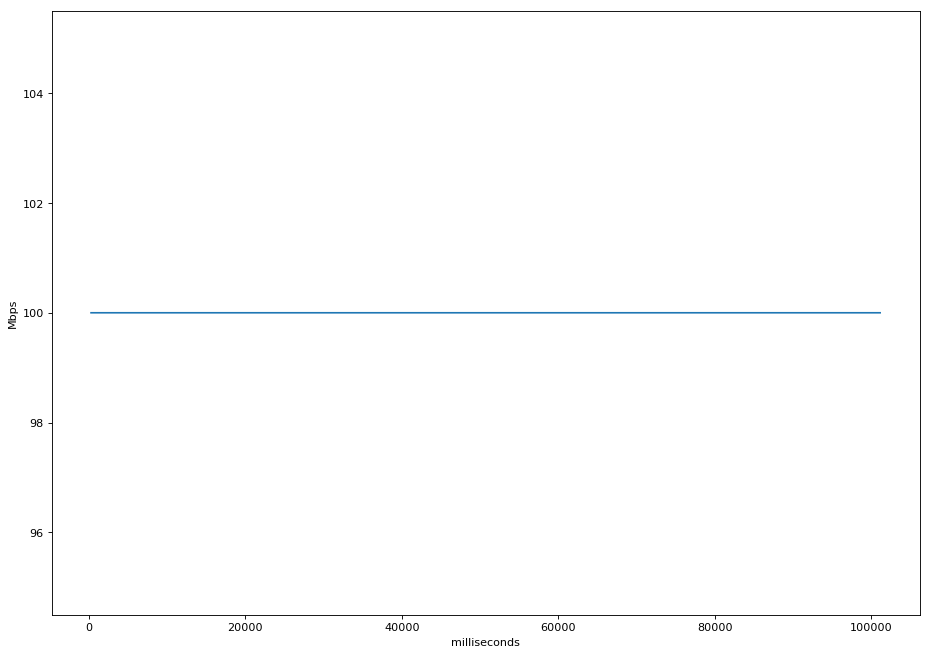

lbl_dtn2-aofa_dtn2-10000:5:0


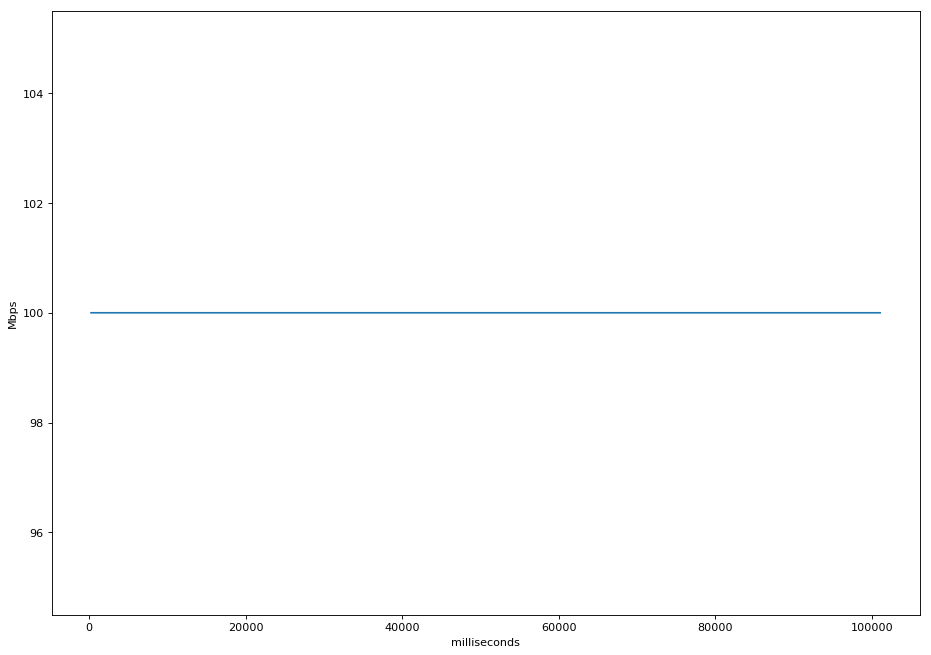

lbl_dtn2-atla_dtn2-10000:27:0


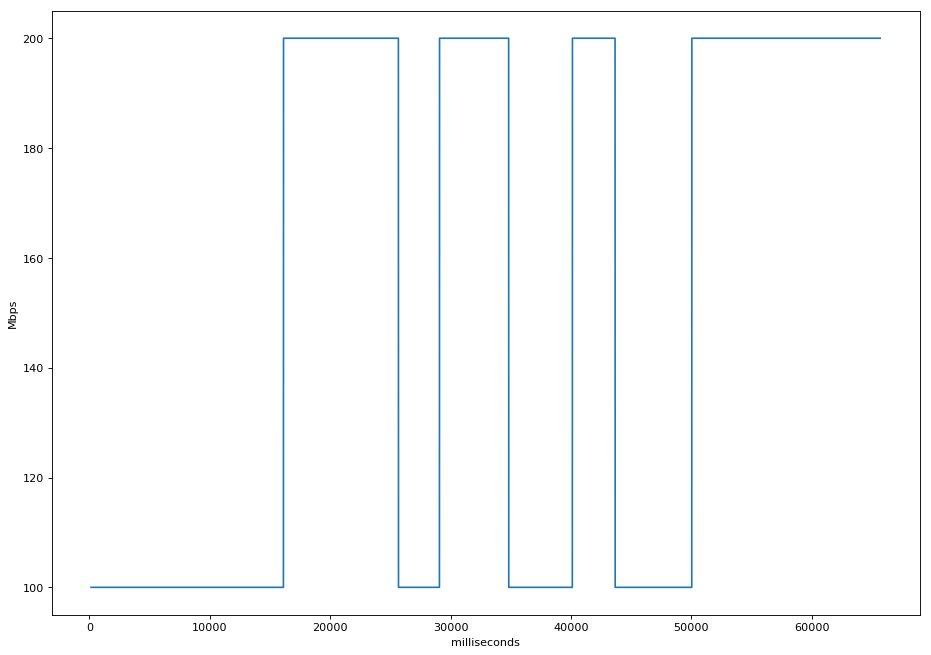

amst_dtn2-aofa_dtn2-10000:37:0


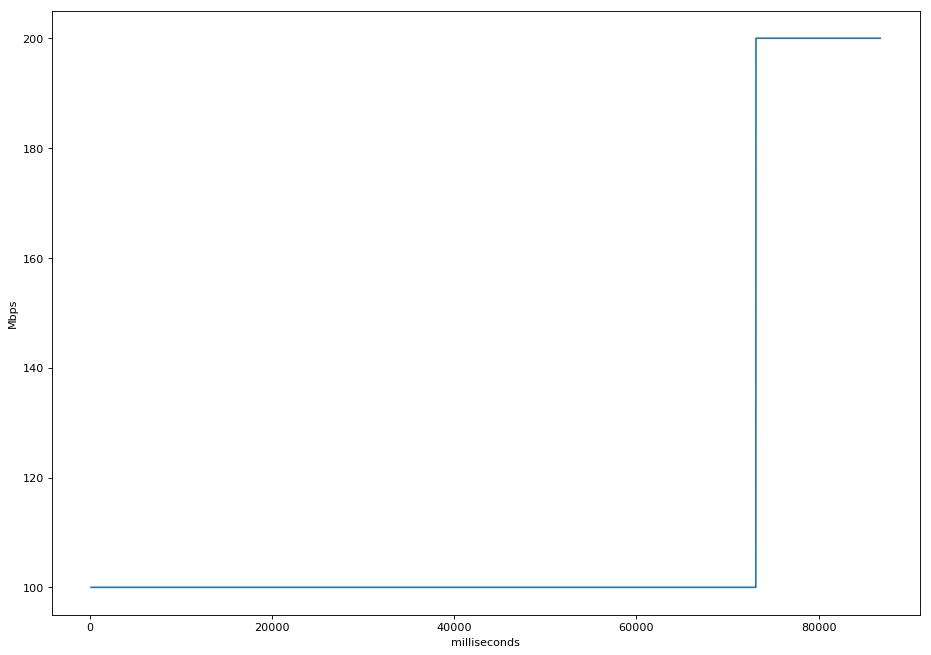

(457640, 1133.871603012085, 0.40360830872234343)
lbl_dtn2-aofa_dtn2-10000:28:0


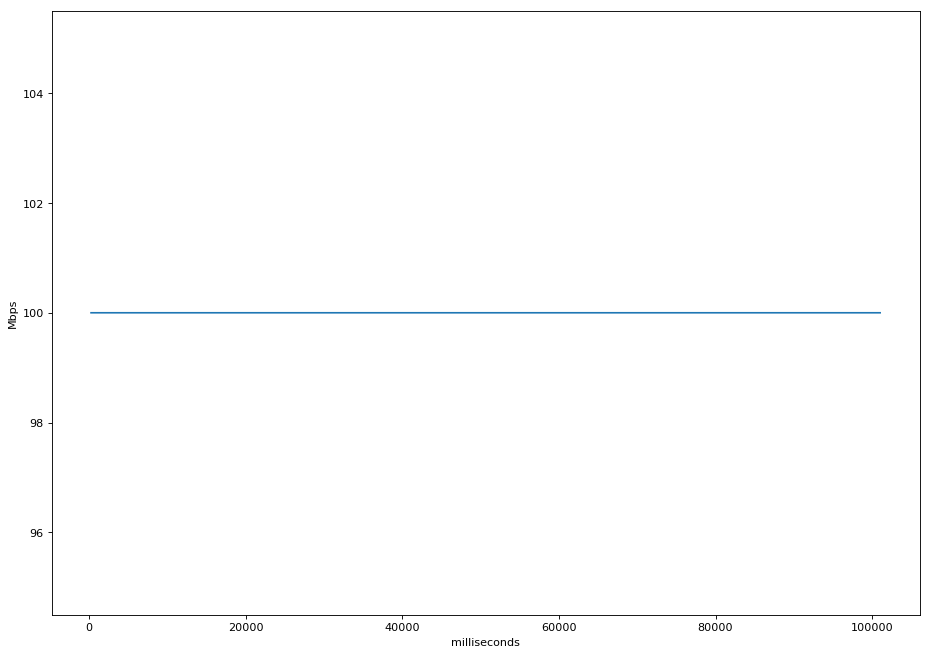

wash_dtn2-atla_dtn2-10000:22:0


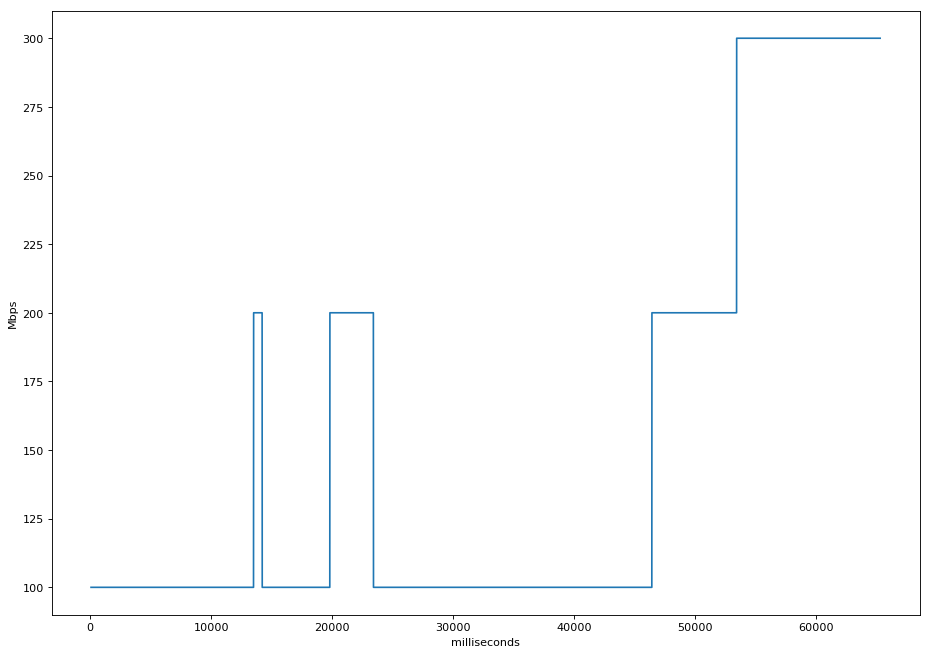

aofa_dtn2-star_dtn2-10000:28:0


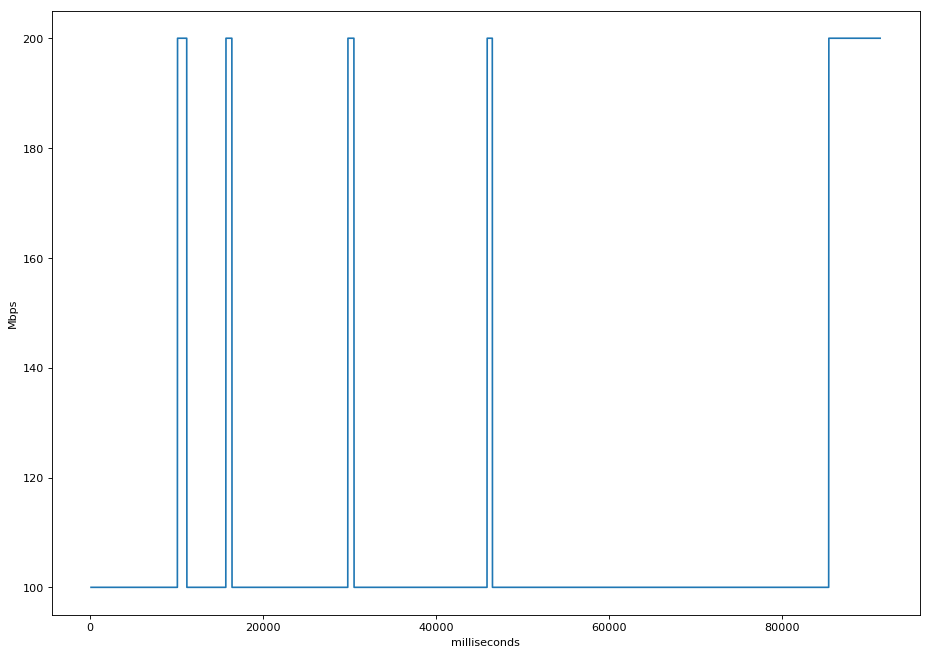

aofa_dtn2-amst_dtn2-10000:7:0
(457640, 1134.9428510665894, 0.4032273515533597)


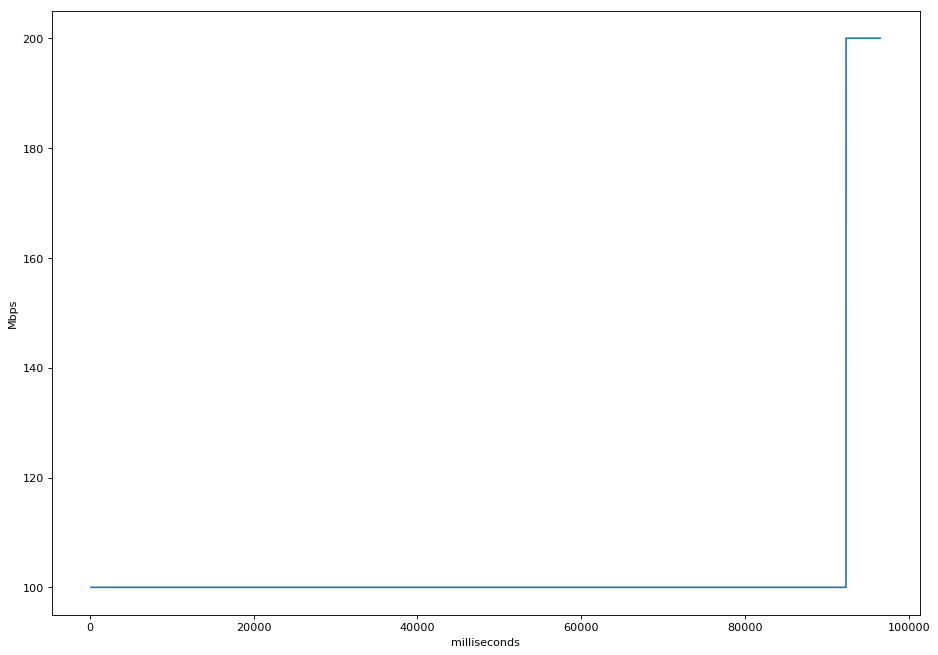

amst_dtn2-cern_dtn2-10000:11:0


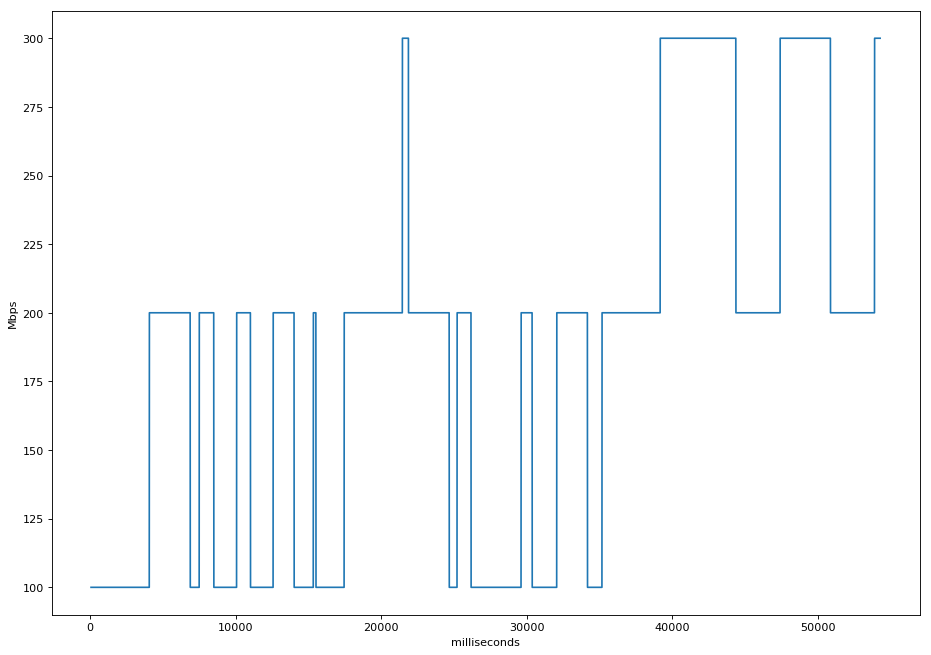

cern_dtn2-atla_dtn2-10000:4:0


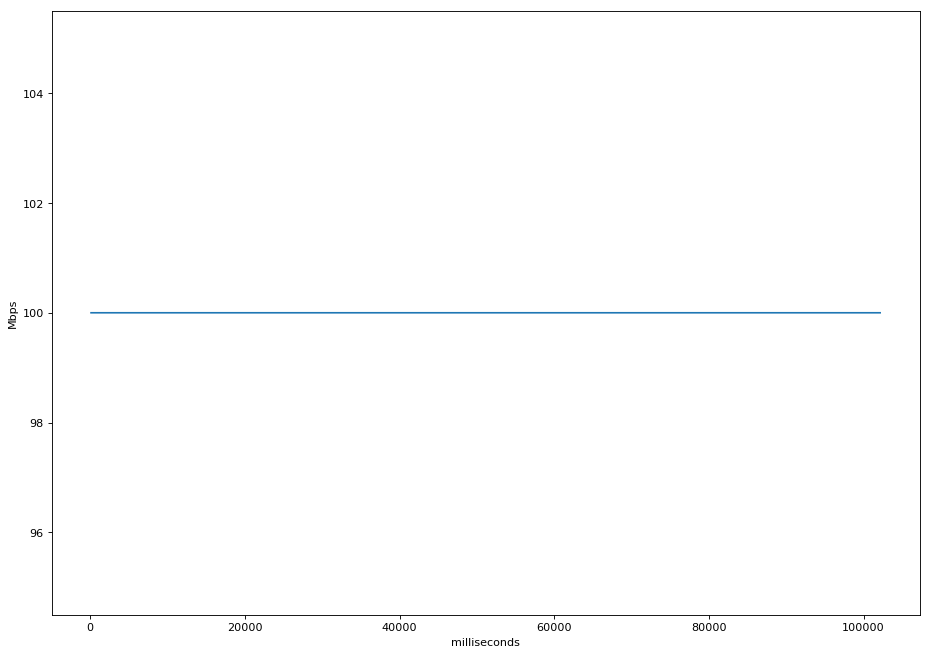

wash_dtn2-amst_dtn2-10000:20:0


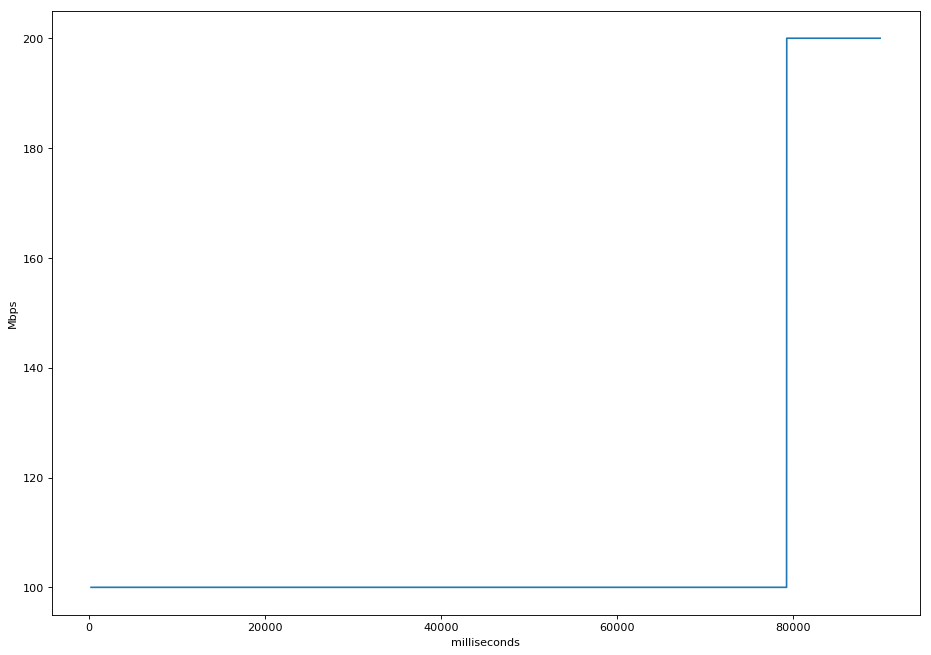

(457640, 1135.9519131183624, 0.4028691661284393)
aofa_dtn2-atla_dtn2-10000:22:0


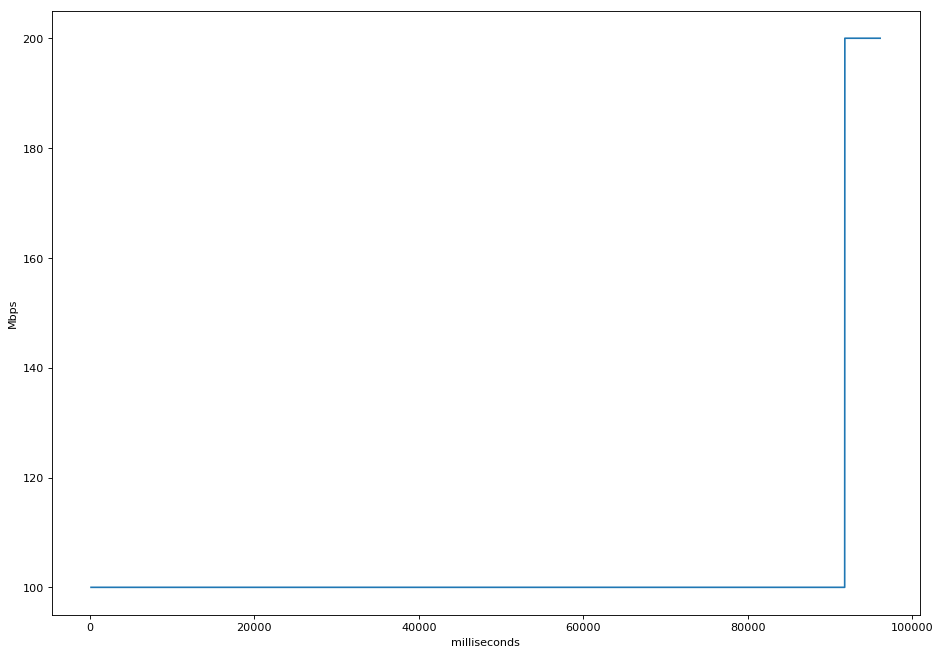

denv_dtn2-lbl_dtn2-10000:27:0


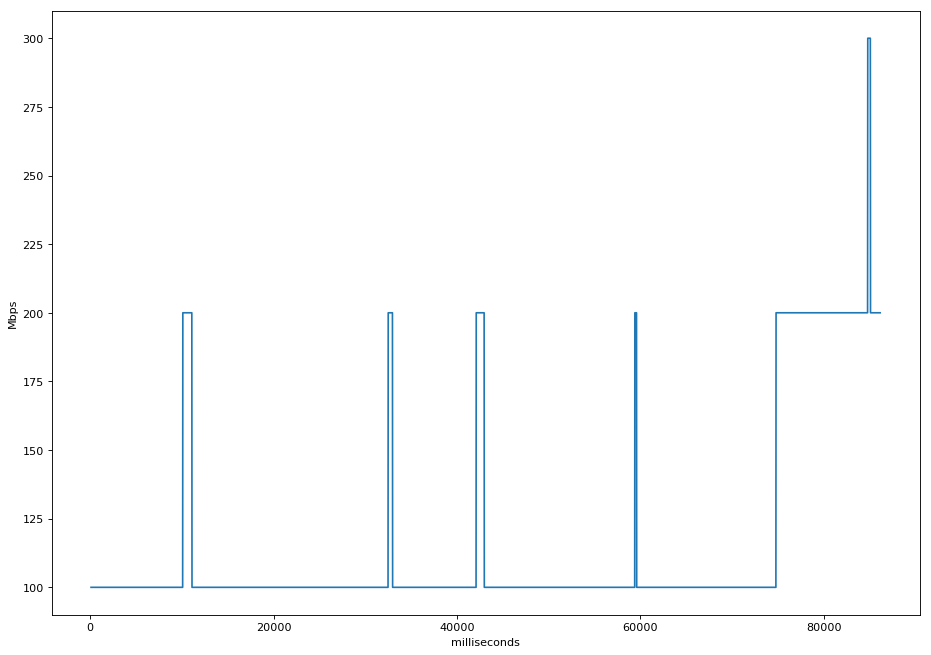

lbl_dtn2-wash_dtn2-10000:2:0


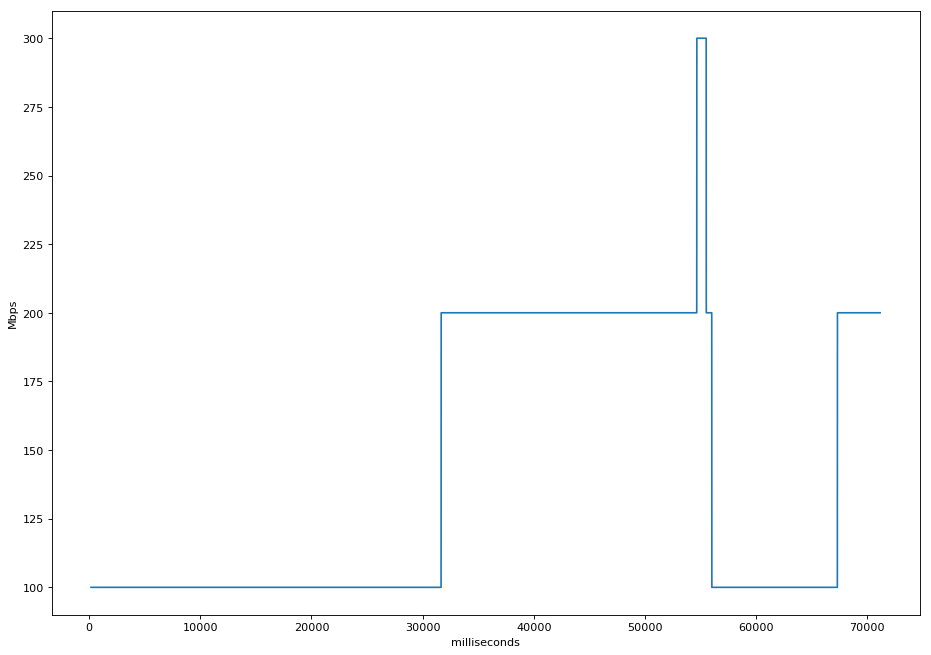

wash_dtn2-lbl_dtn2-10000:9:0
(457640, 1137.032989025116, 0.40248612346100643)


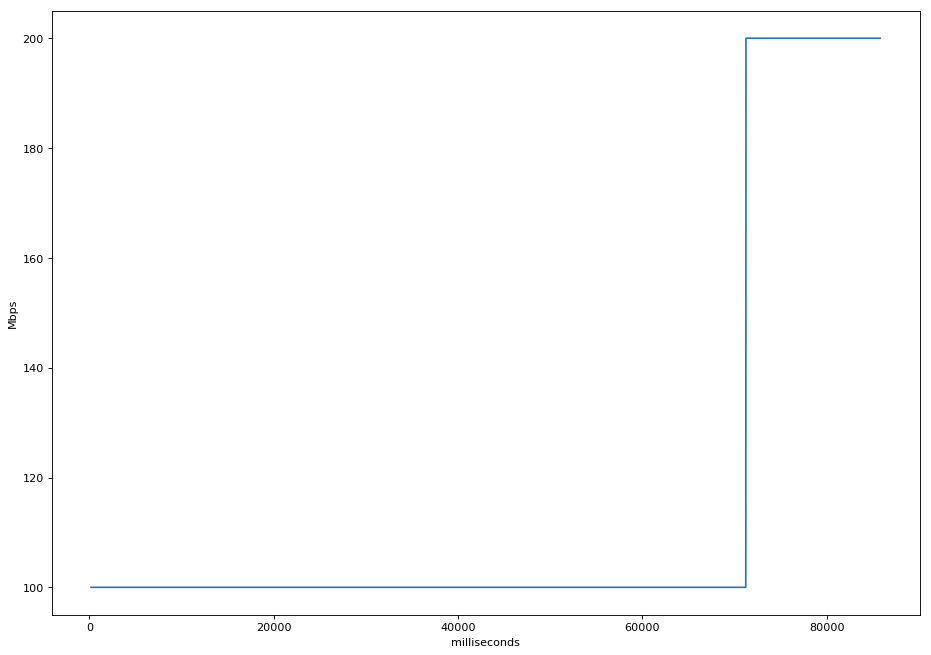

atla_dtn2-aofa_dtn2-10000:7:0


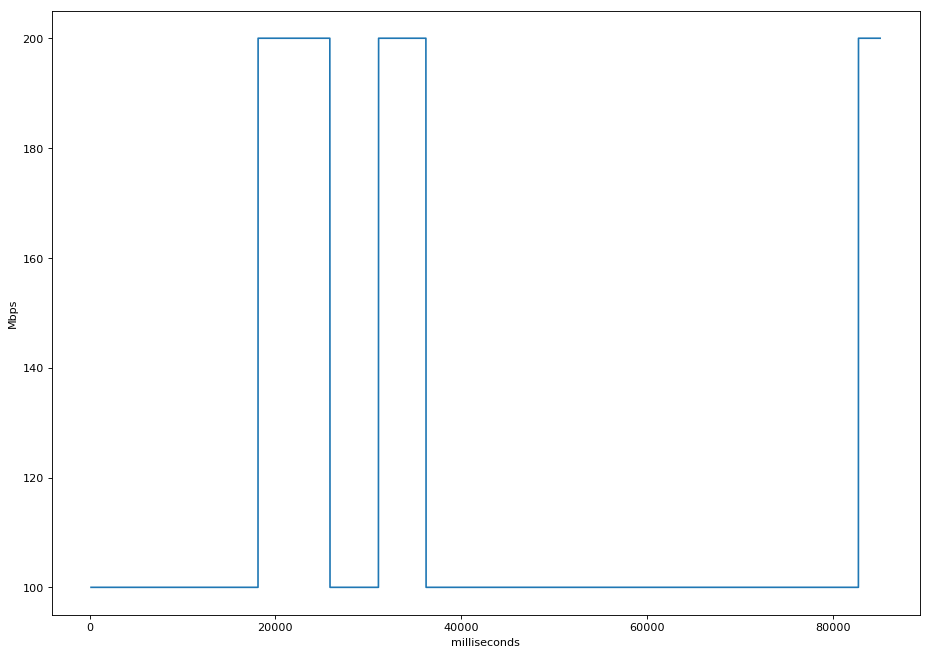

amst_dtn2-lbl_dtn2-10000:8:0


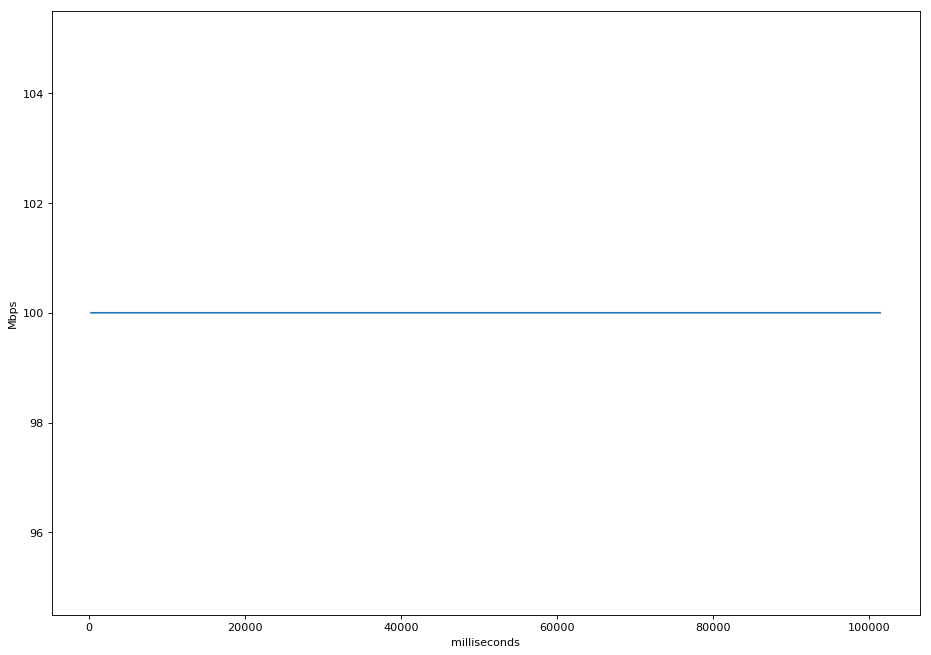

atla_dtn2-amst_dtn2-10000:11:0


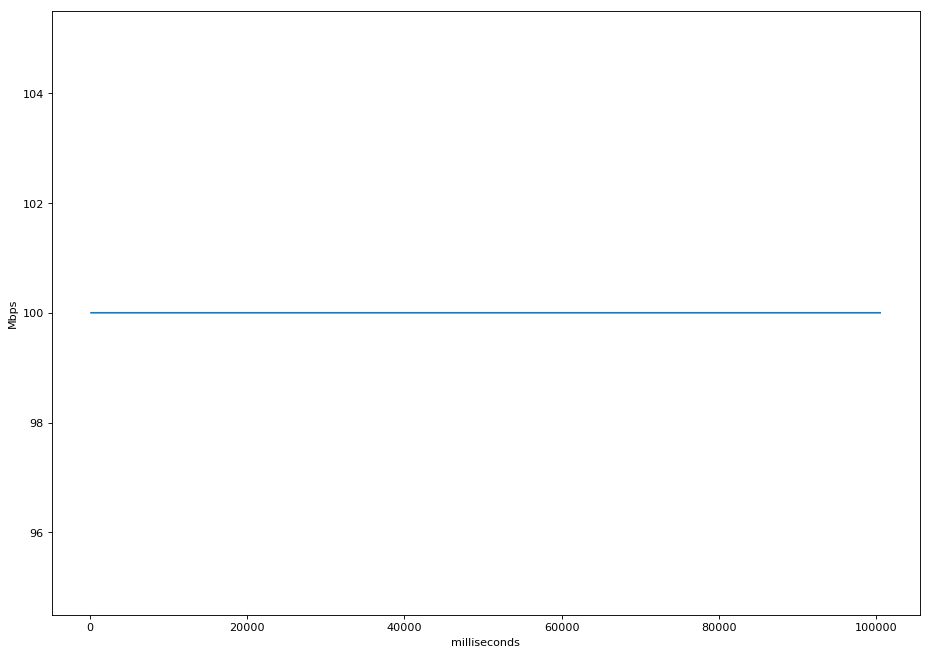

(457640, 1138.0386190414429, 0.40213046582326445)
wash_dtn2-atla_dtn2-10000:34:0


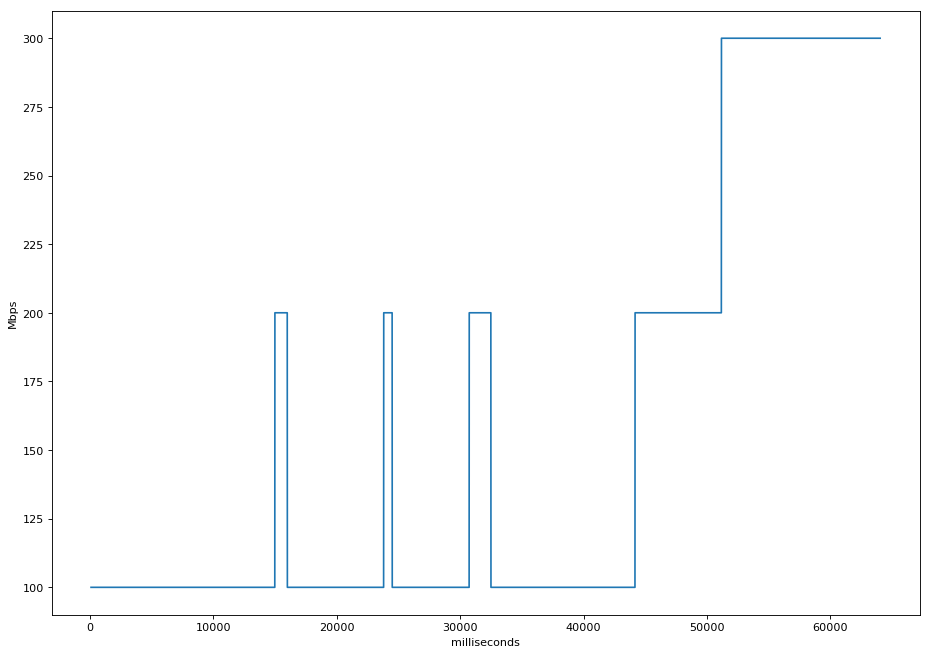

lbl_dtn2-denv_dtn2-10000:22:0


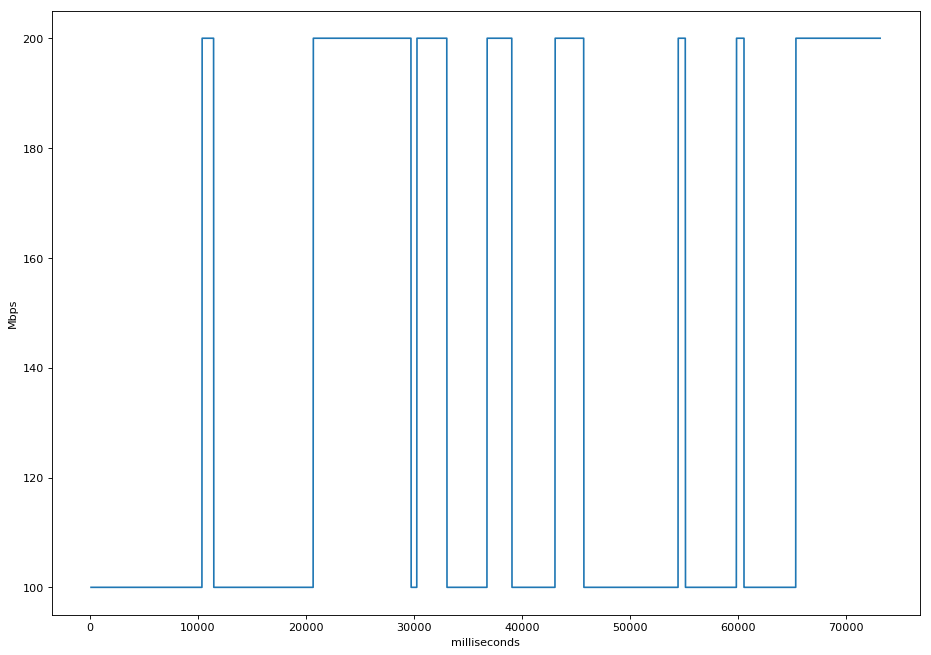

atla_dtn2-aofa_dtn2-10000:36:0


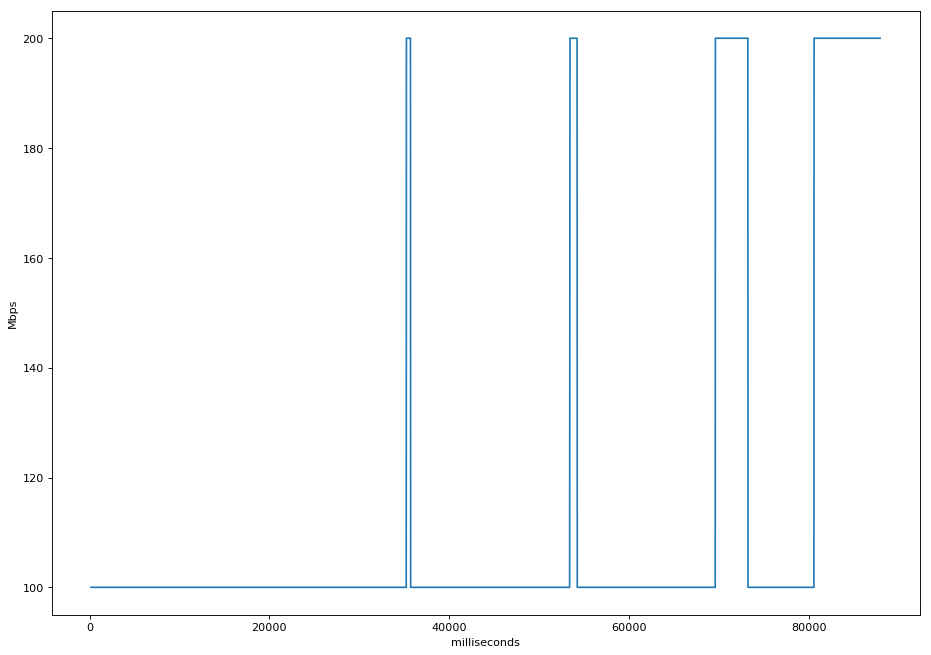

lbl_dtn2-amst_dtn2-10000:1:0
(457640, 1139.1176331043243, 0.40174955307542654)


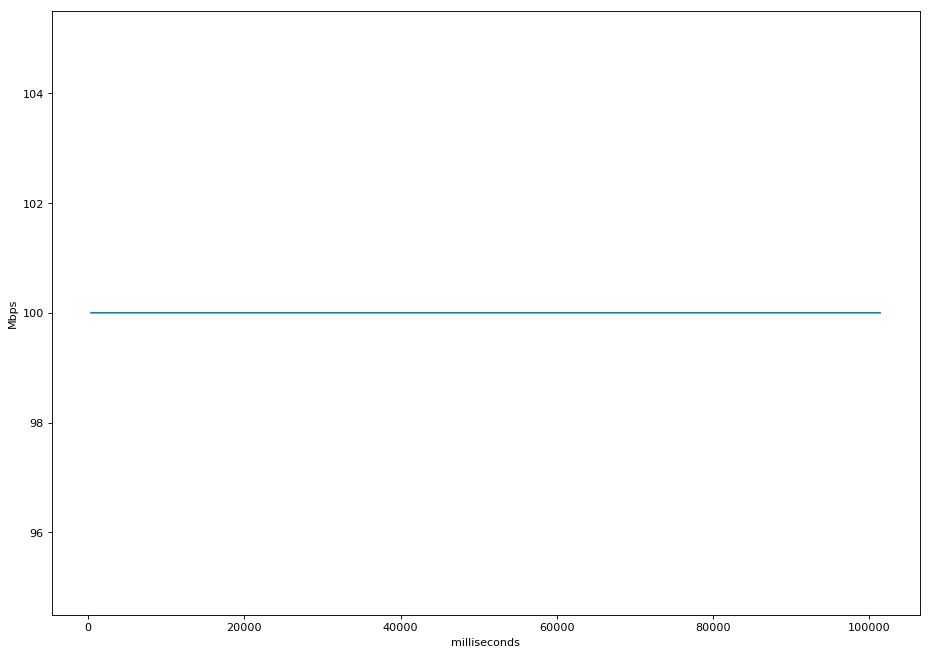

aofa_dtn2-star_dtn2-10000:8:0


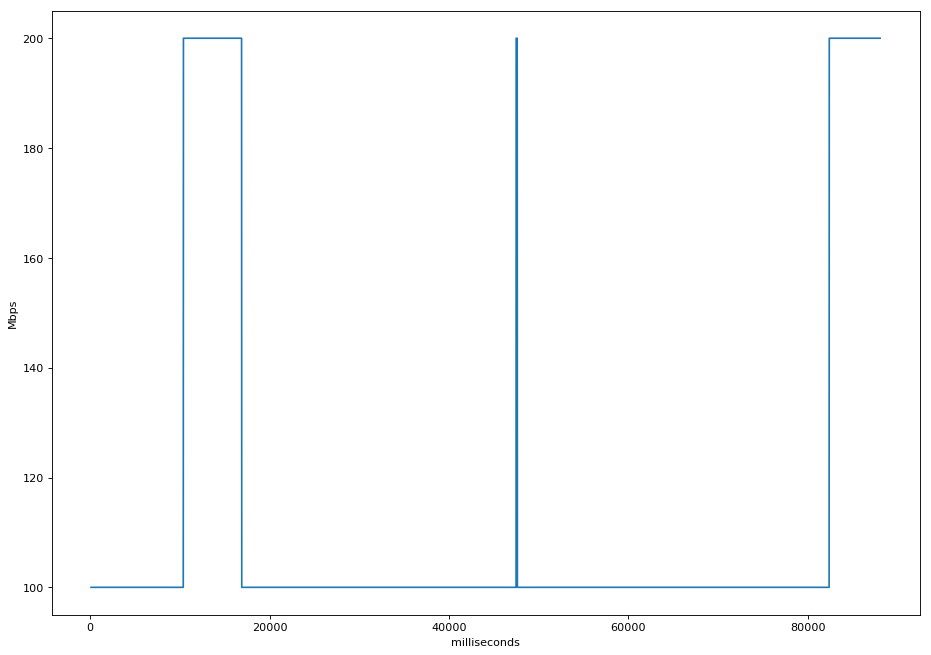

cern_dtn2-wash_dtn2-10000:17:0


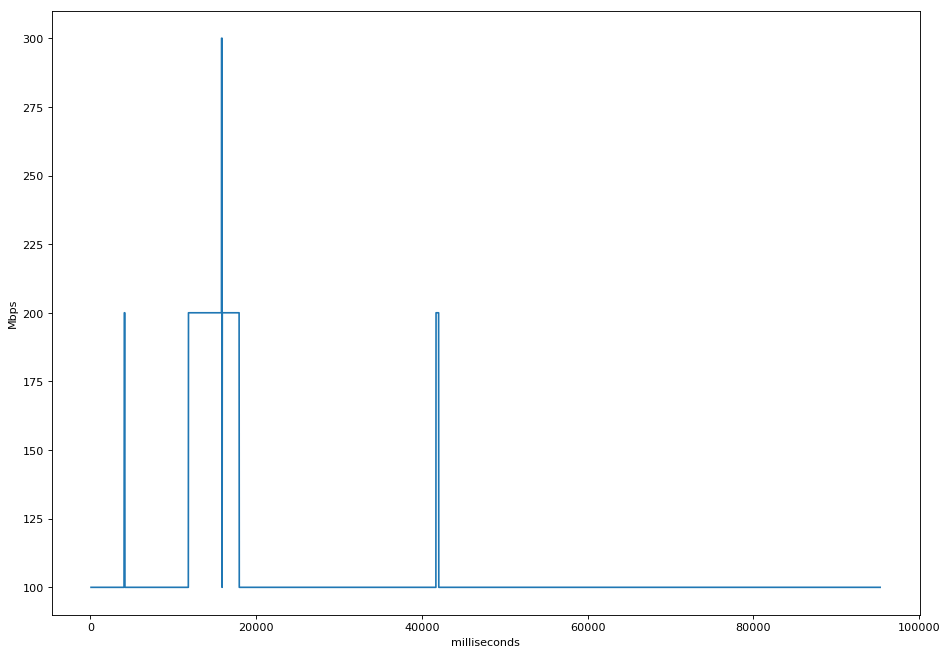

aofa_dtn2-lbl_dtn2-10000:20:0
(457640, 1140.1315650939941, 0.40139227262098603)

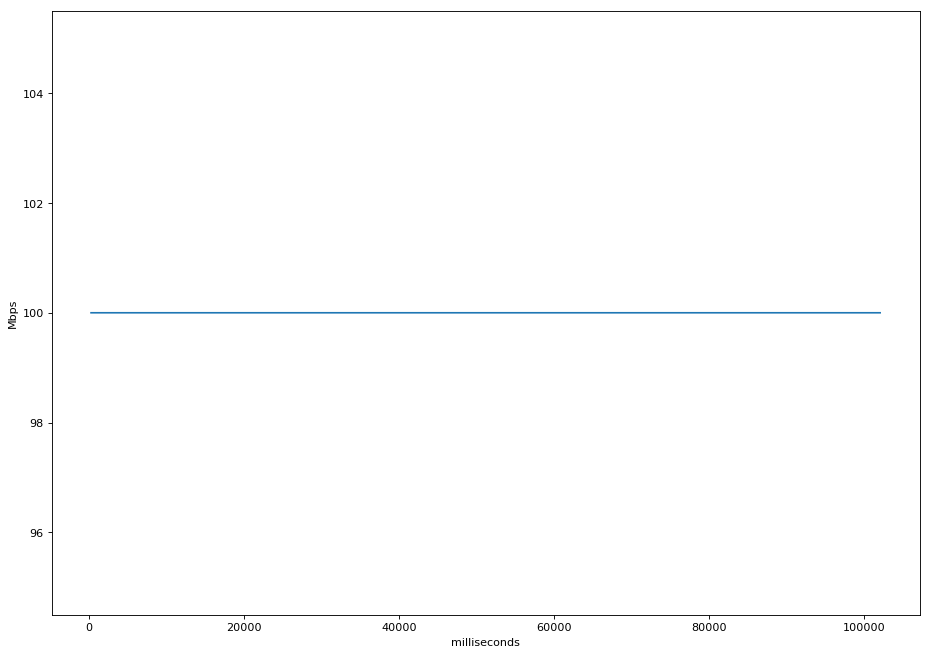


aofa_dtn2-wash_dtn2-10000:17:0


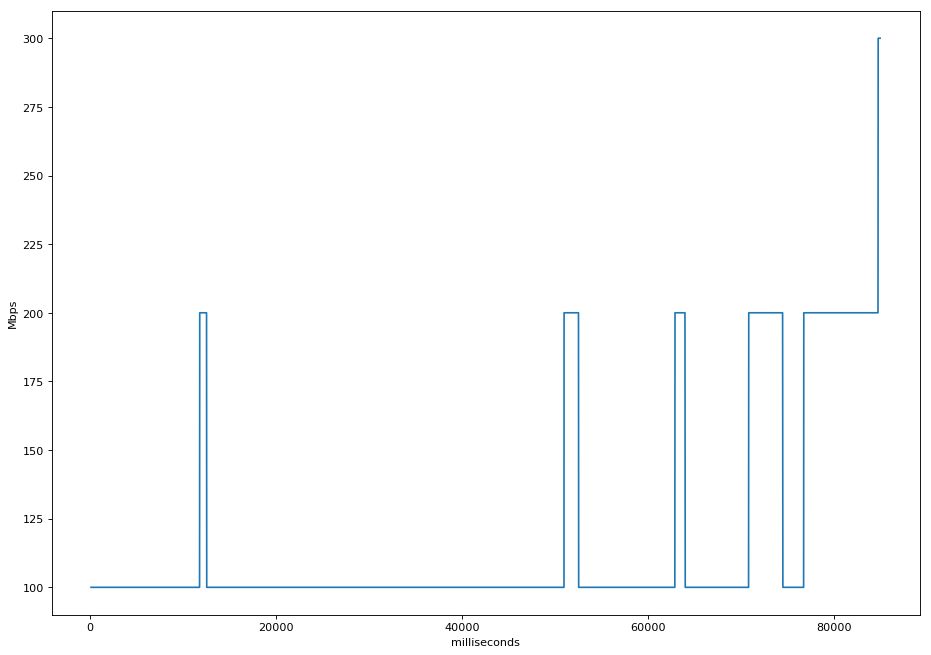

cern_dtn2-wash_dtn2-10000:32:0


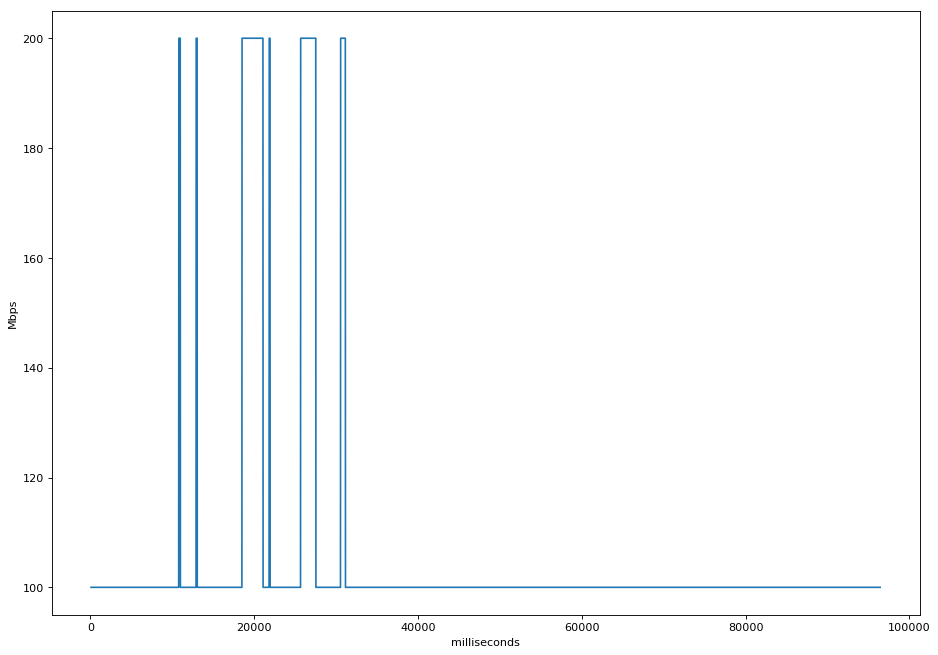

amst_dtn2-atla_dtn2-10000:27:0


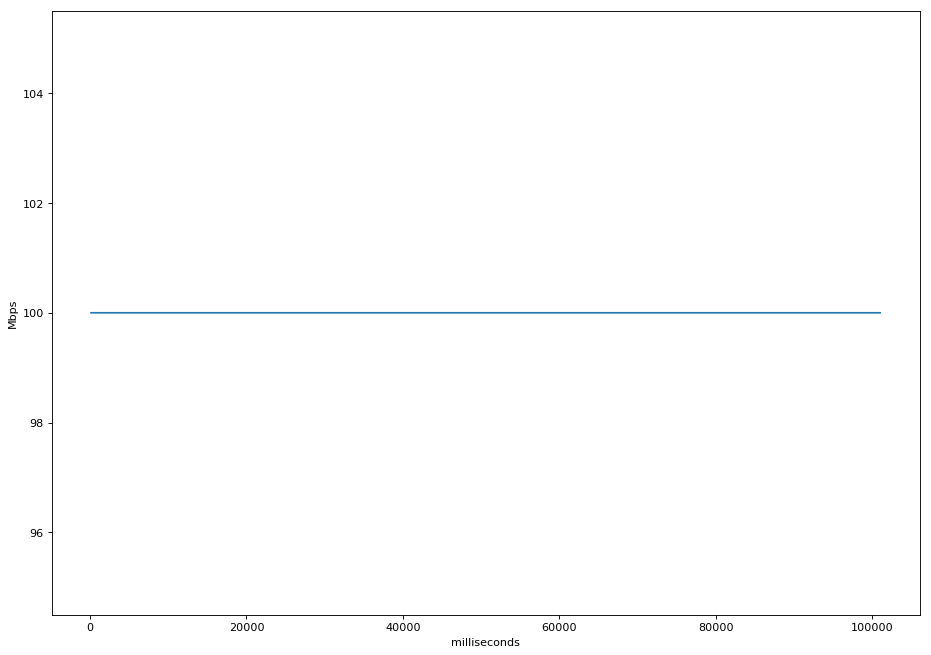

lbl_dtn2-star_dtn2-10000:29:0
(457640, 1141.1349861621857, 0.4010393209826249)


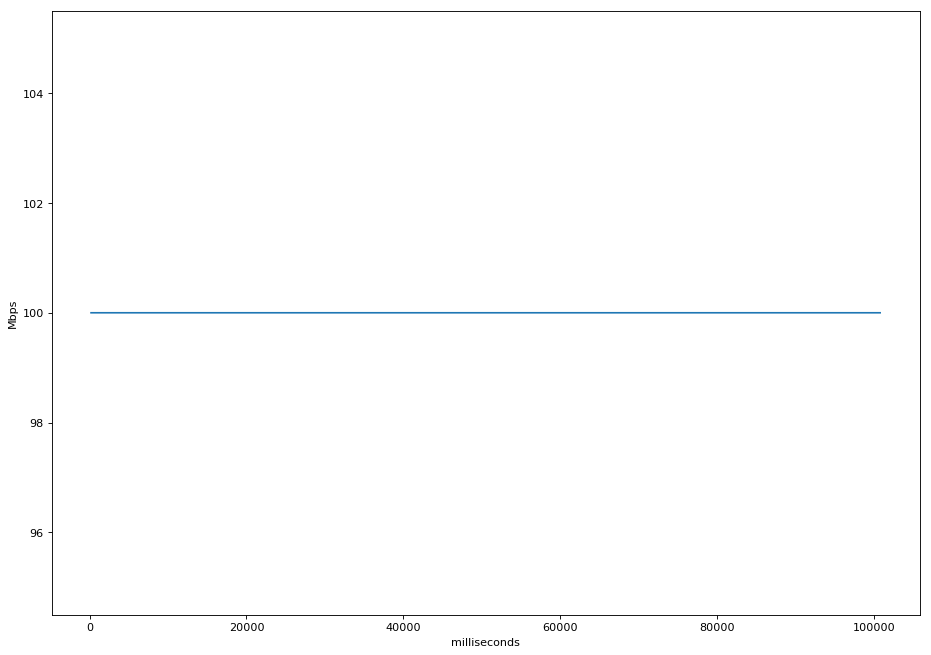

aofa_dtn2-lbl_dtn2-10000:18:0


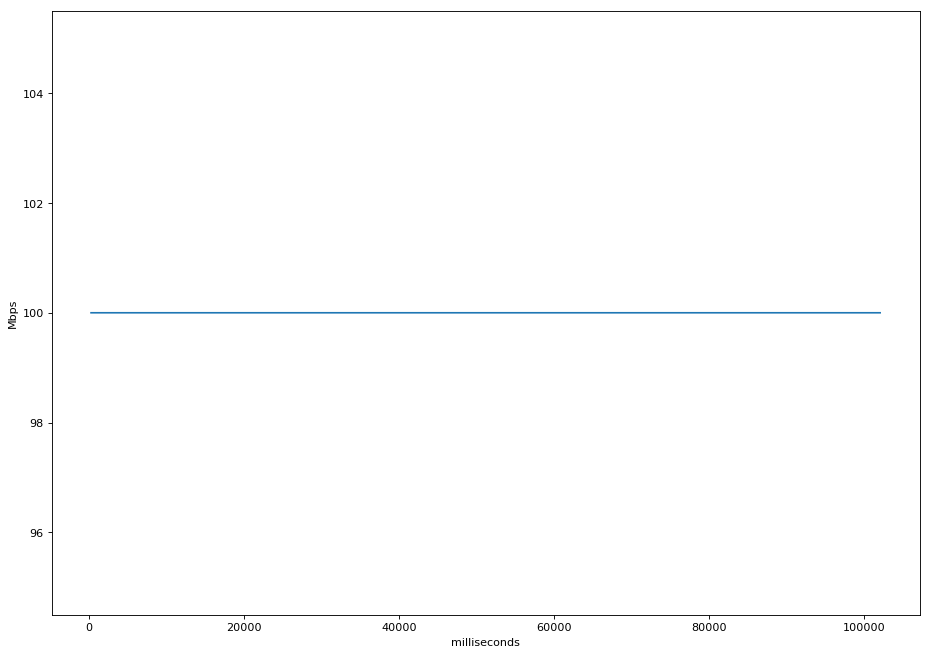

atla_dtn2-amst_dtn2-10000:19:0


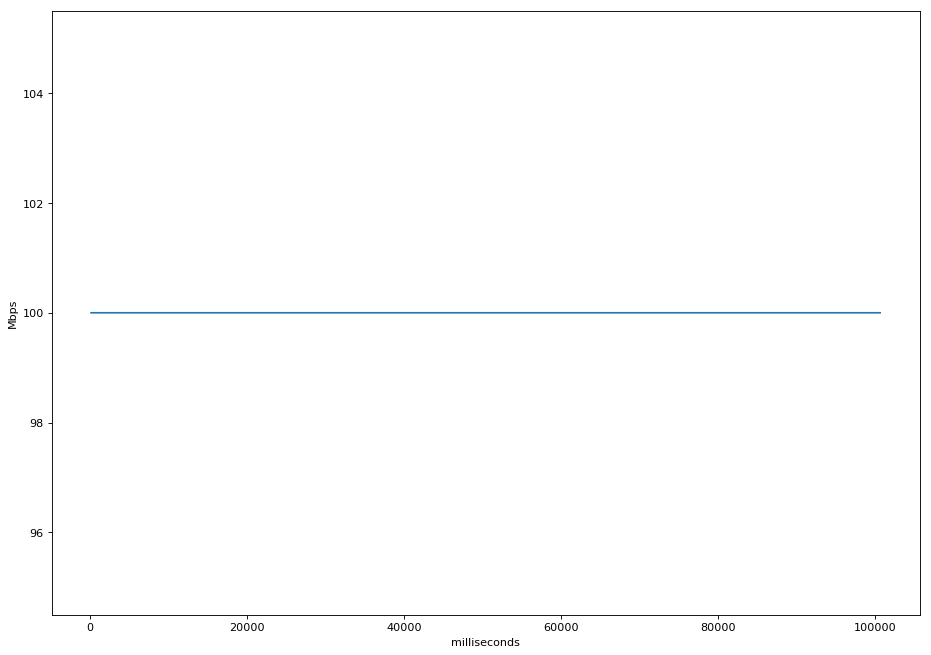

aofa_dtn2-wash_dtn2-10000:37:0
(457640, 1142.166710138321, 0.4006770604832091)


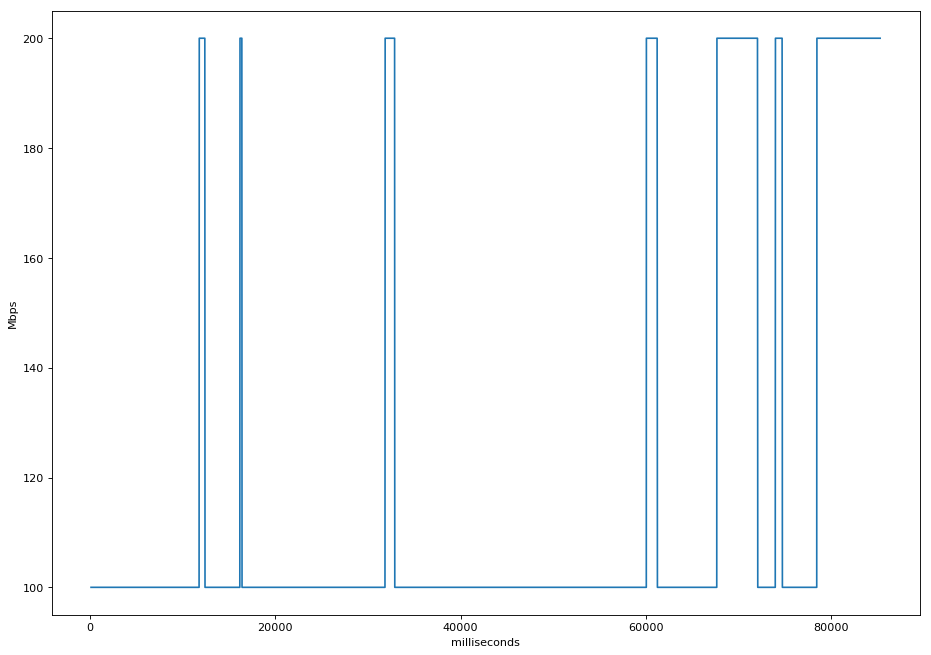

cern_dtn2-atla_dtn2-10000:6:0


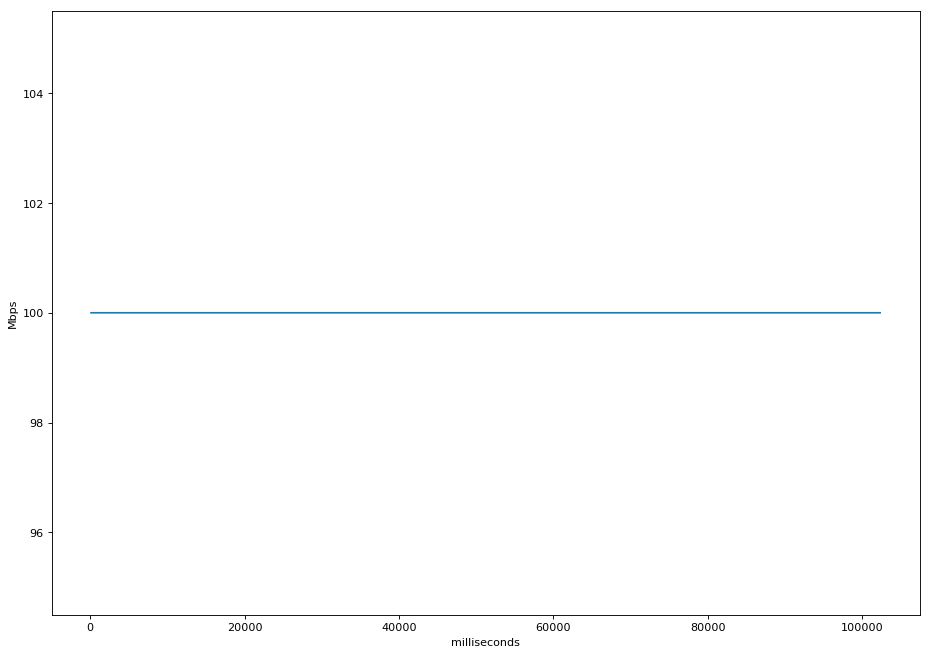

lbl_dtn2-star_dtn2-10000:21:0


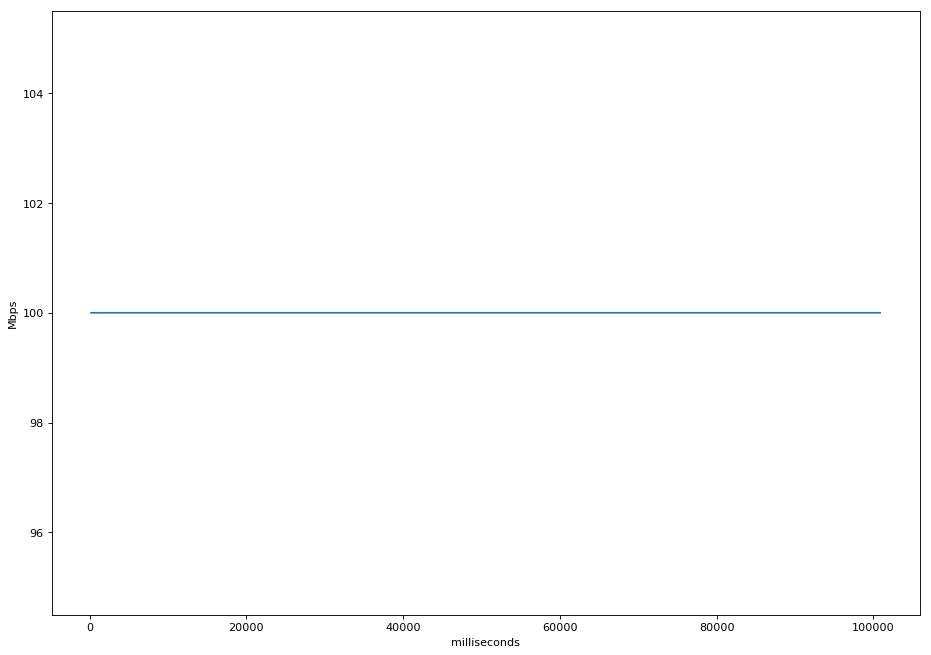

star_dtn2-amst_dtn2-10000:3:0


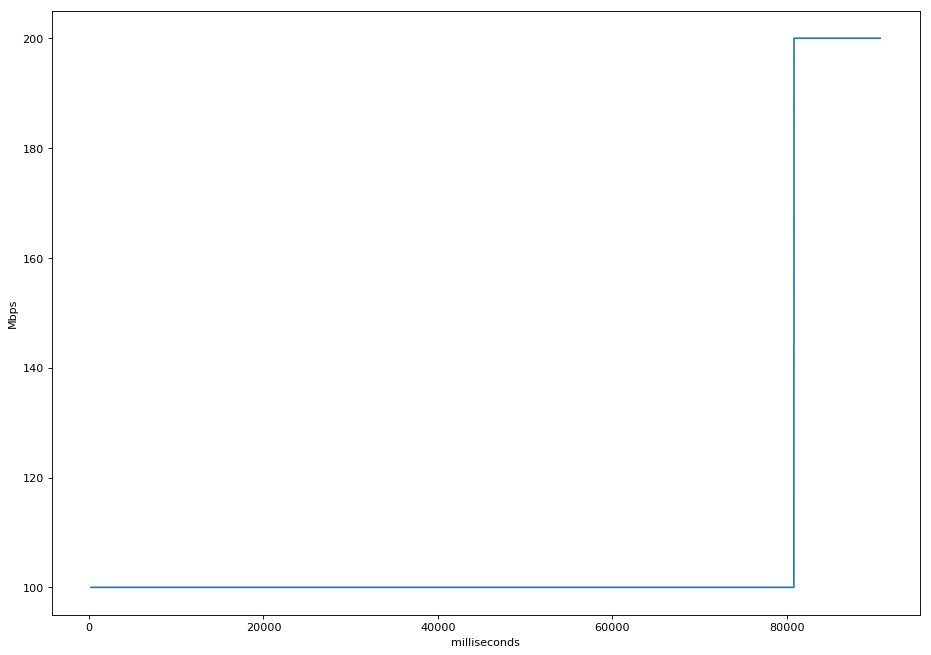

amst_dtn2-lbl_dtn2-10000:15:0
(457640, 1143.1700580120087, 0.4003253906036022)


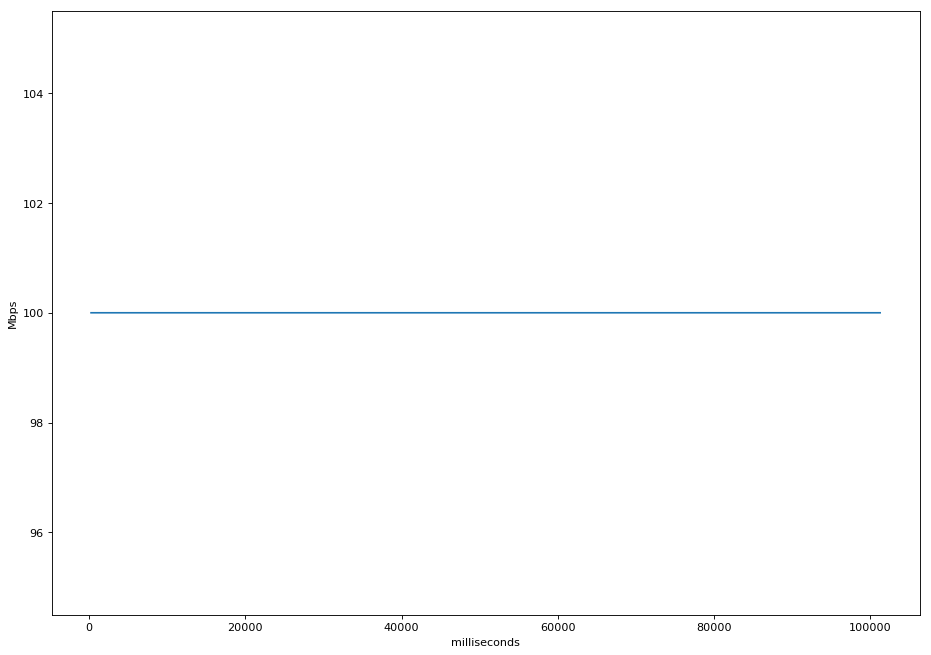

star_dtn2-atla_dtn2-10000:31:0


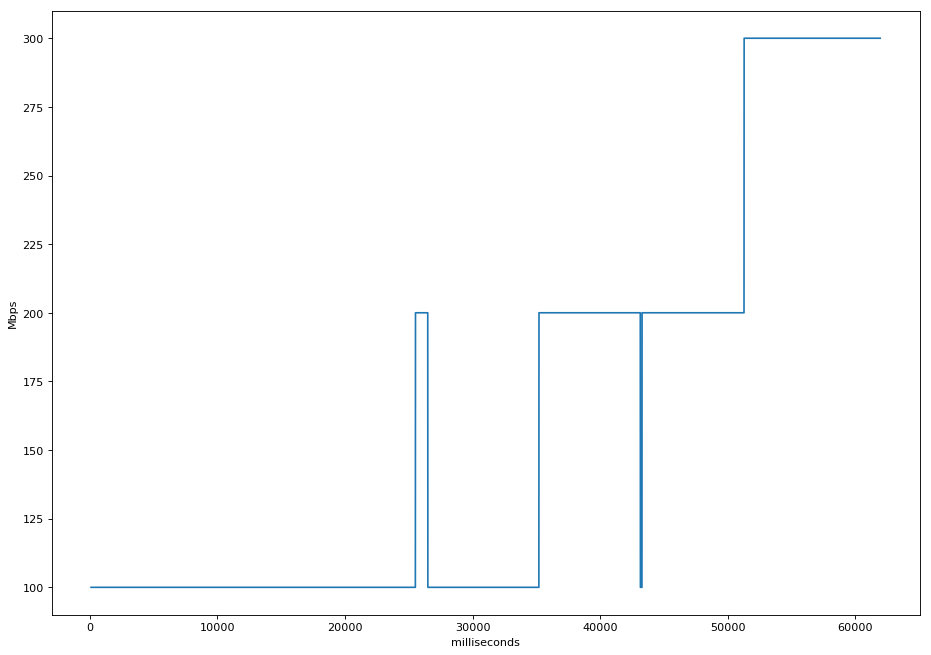

atla_dtn2-denv_dtn2-10000:25:0


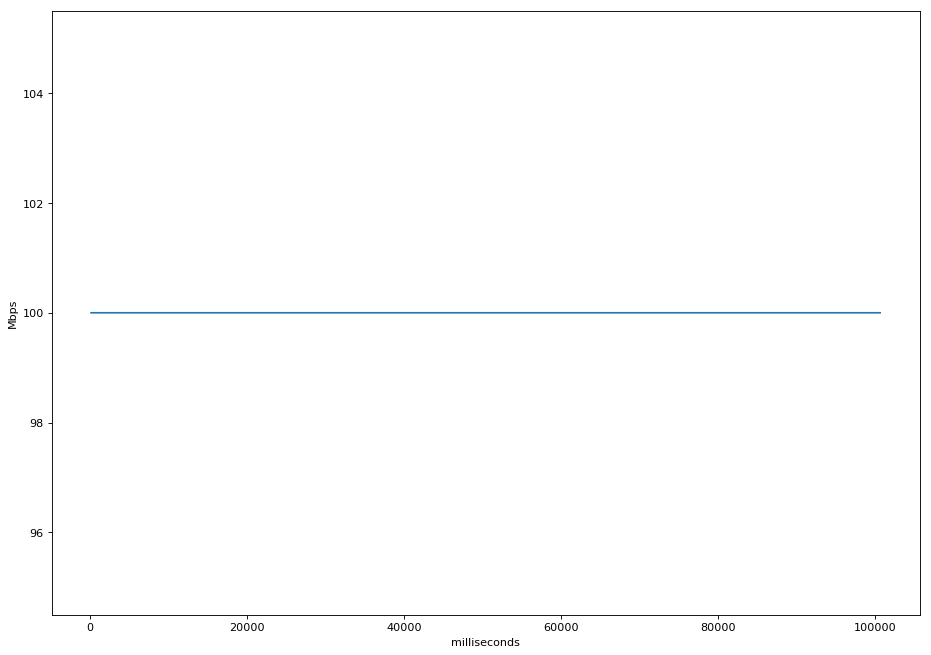

aofa_dtn-amst_dtn-800000:0:2


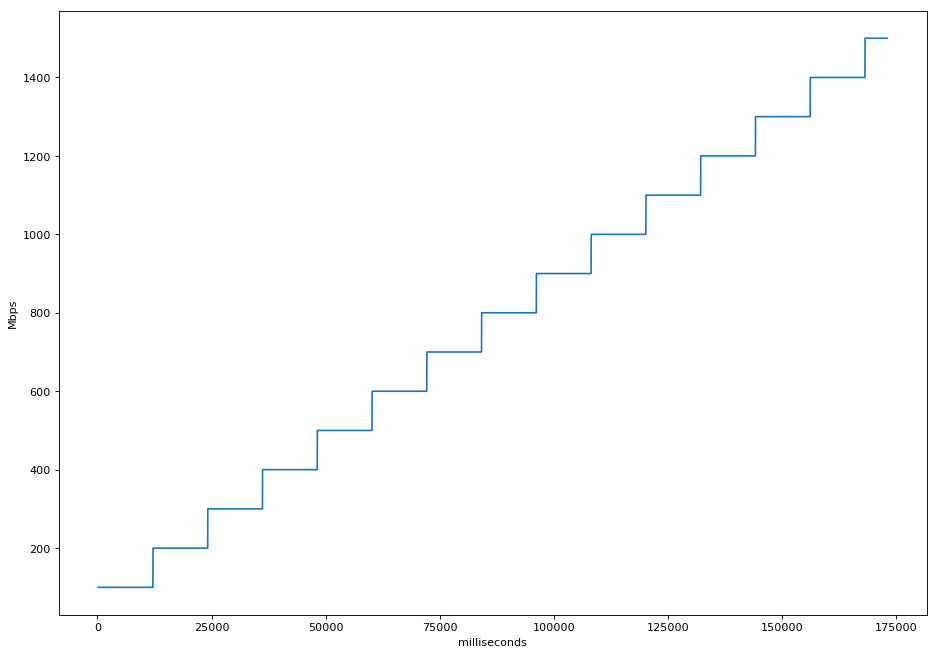

aofa_dtn-amst_dtn-800000:0:3
(457640, 1145.4321031570435, 0.3995348120055752)


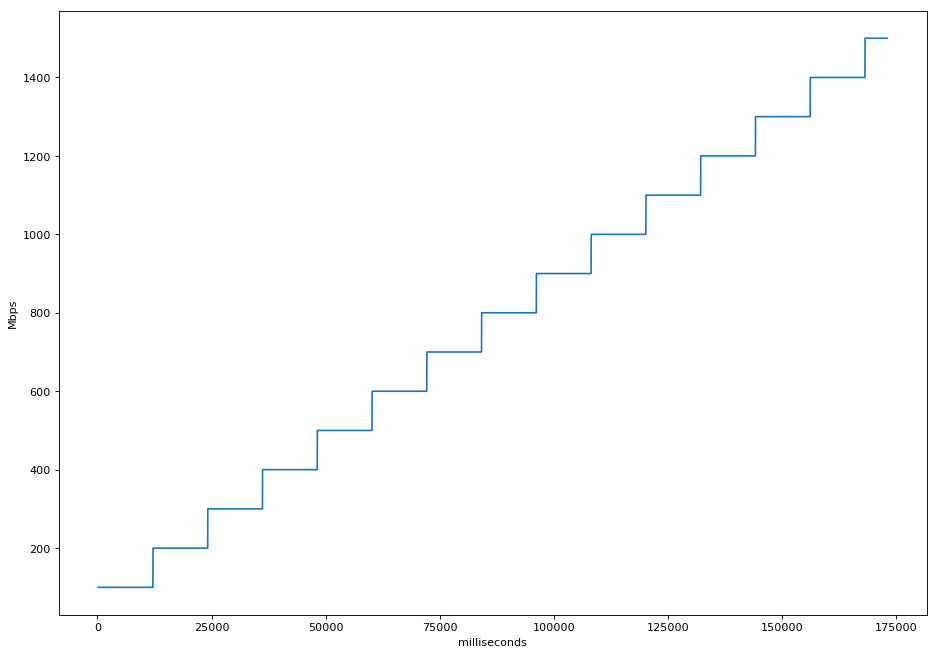

aofa_dtn-amst_dtn-800000:0:0


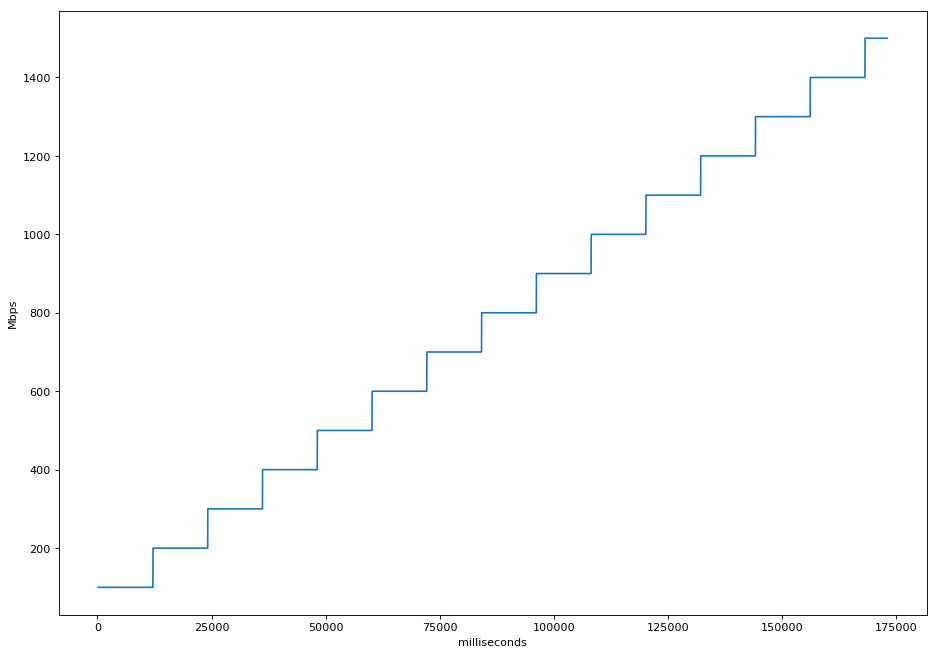

aofa_dtn-amst_dtn-800000:0:1


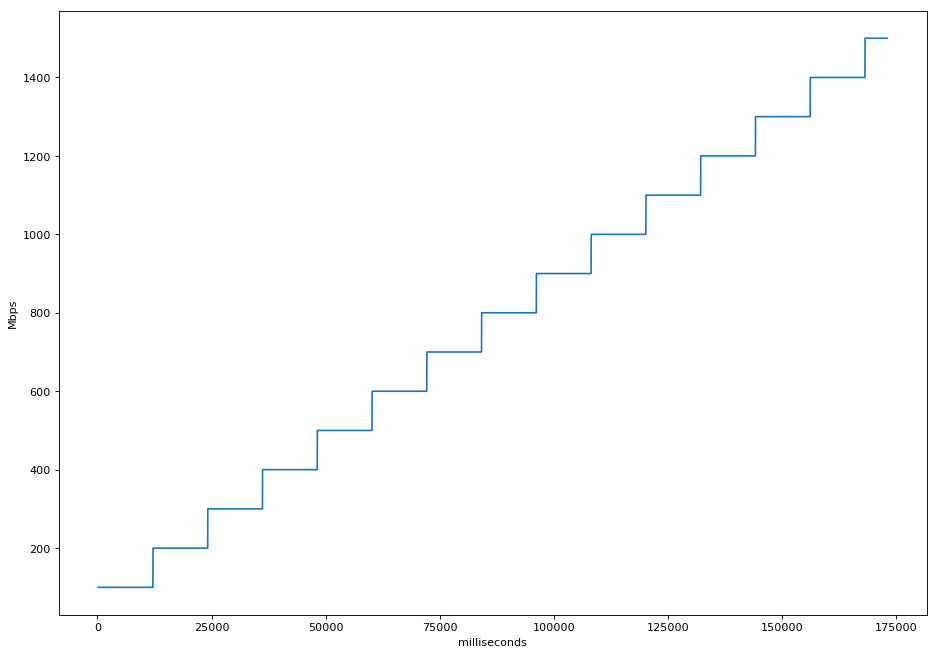

cern_dtn2-denv_dtn2-10000:39:0
(457640, 1146.4334211349487, 0.39918585027549575)


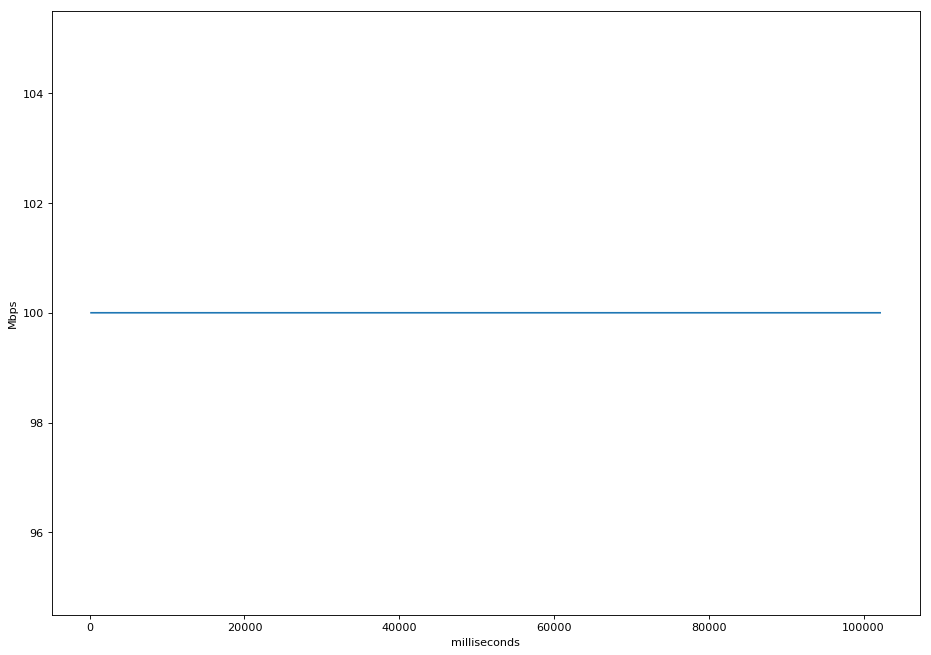

aofa_dtn-amst_dtn-800000:0:4


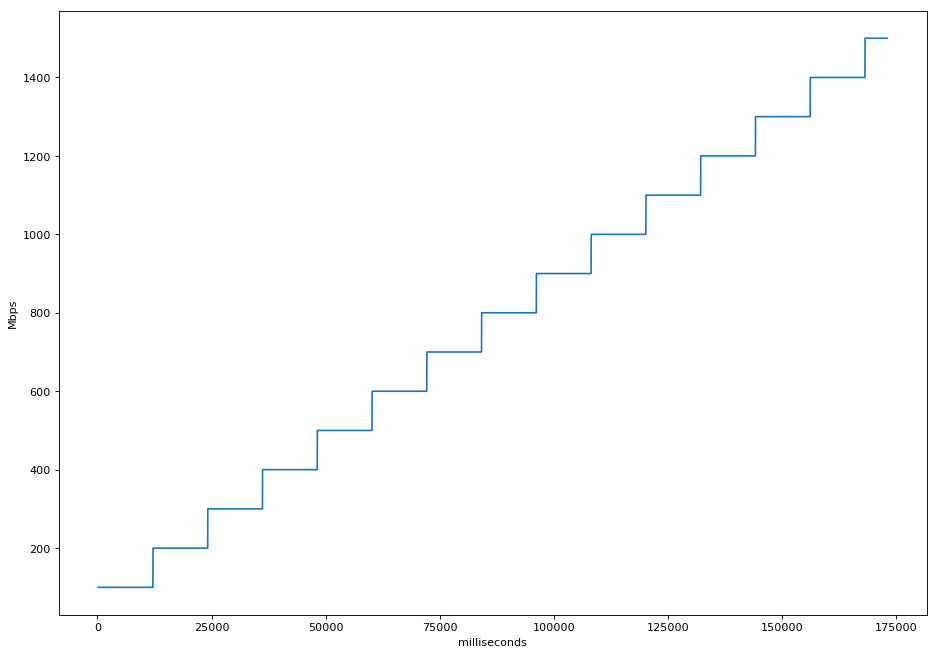

aofa_dtn-amst_dtn-800000:0:5


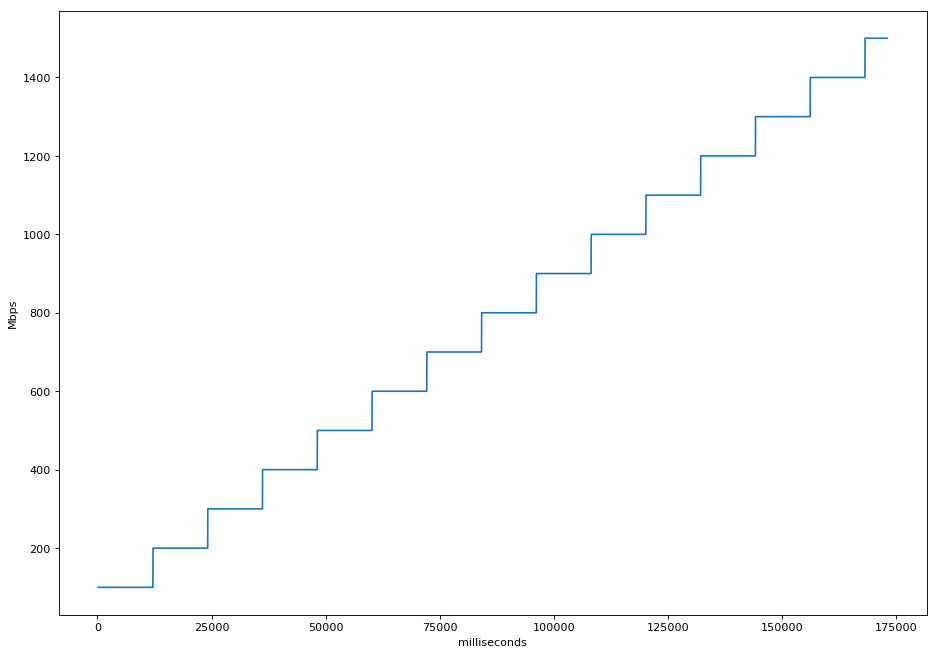

atla_dtn2-lbl_dtn2-10000:1:0


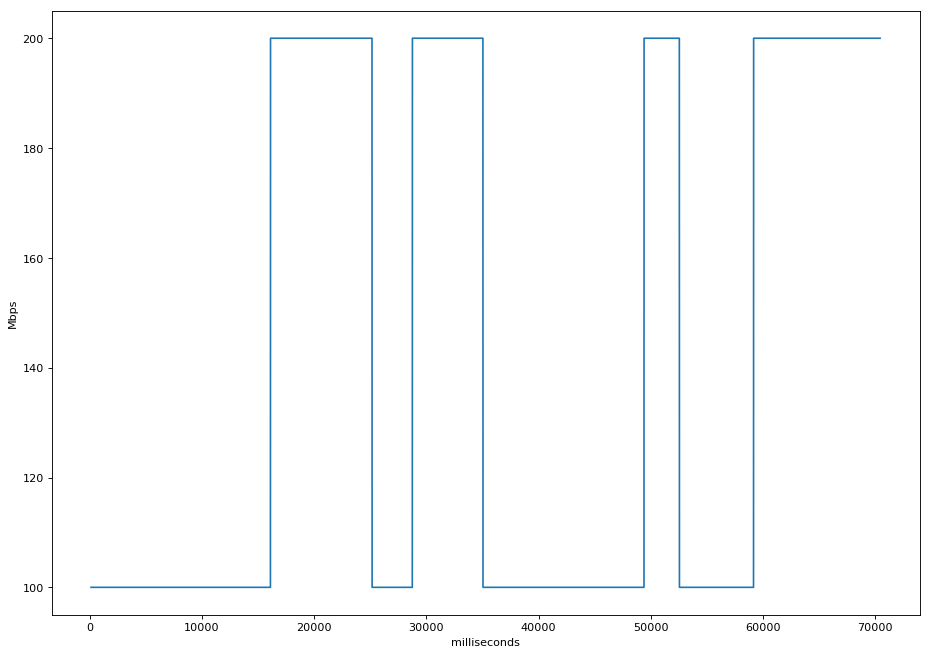

(457640, 1147.4355599880219, 0.3988372122655649)
amst_dtn2-denv_dtn2-10000:26:0


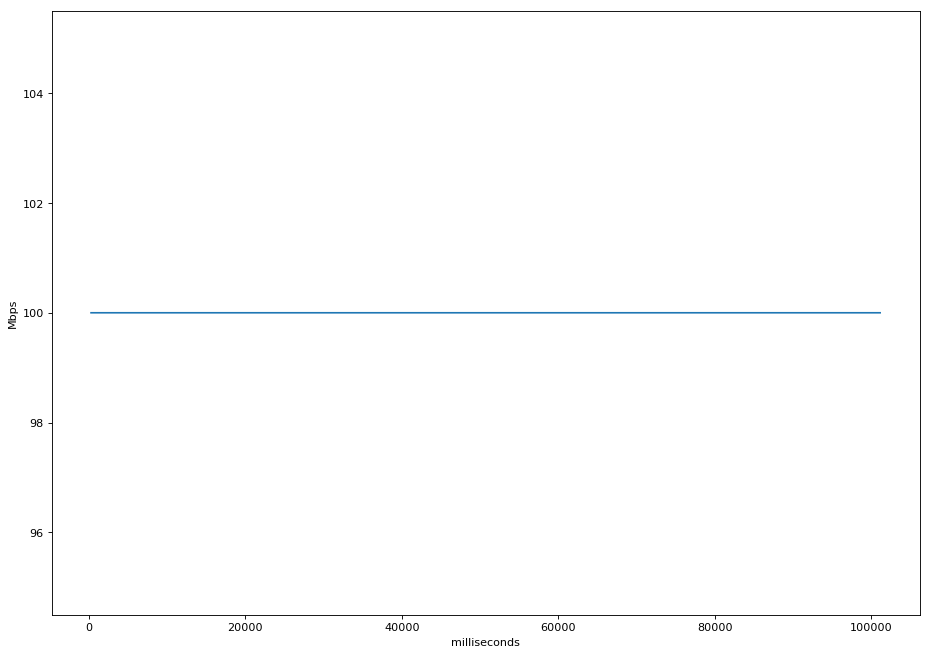

cern_dtn2-denv_dtn2-10000:25:0


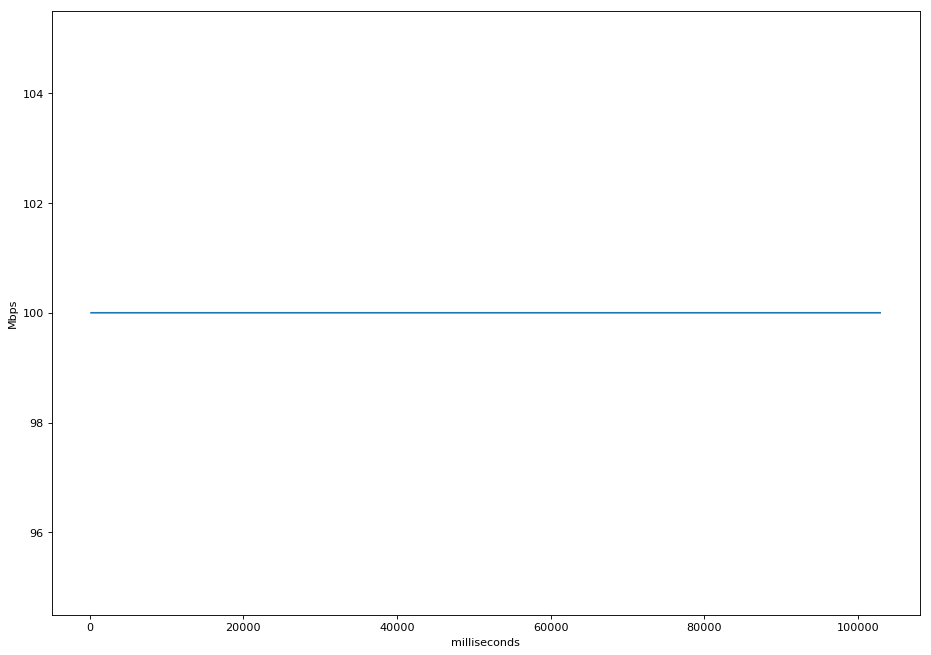

denv_dtn2-aofa_dtn2-10000:22:0


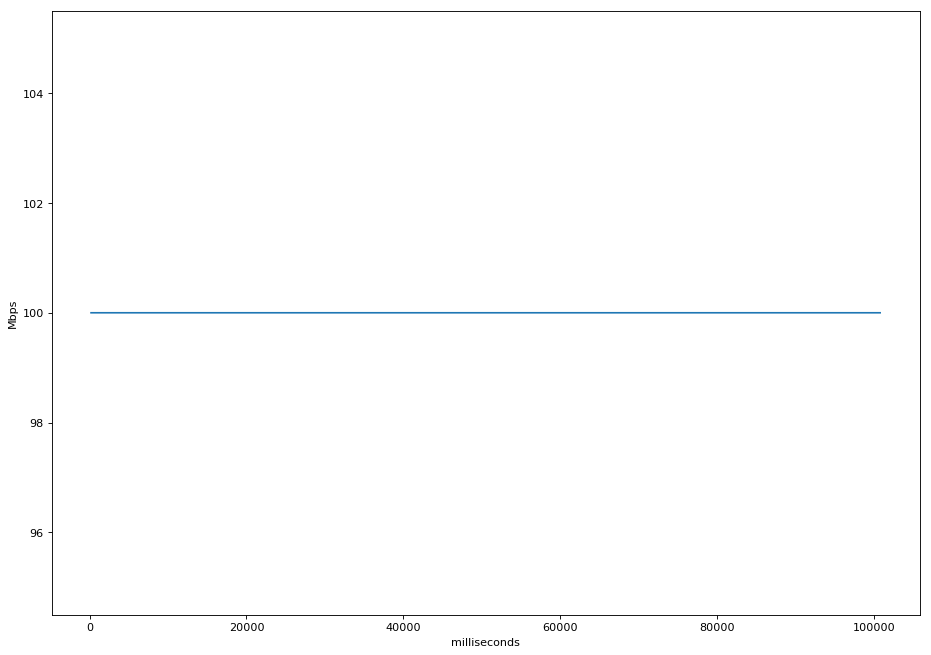

atla_dtn2-aofa_dtn2-10000:33:0
(457640, 1148.459902048111, 0.3984814787036672)


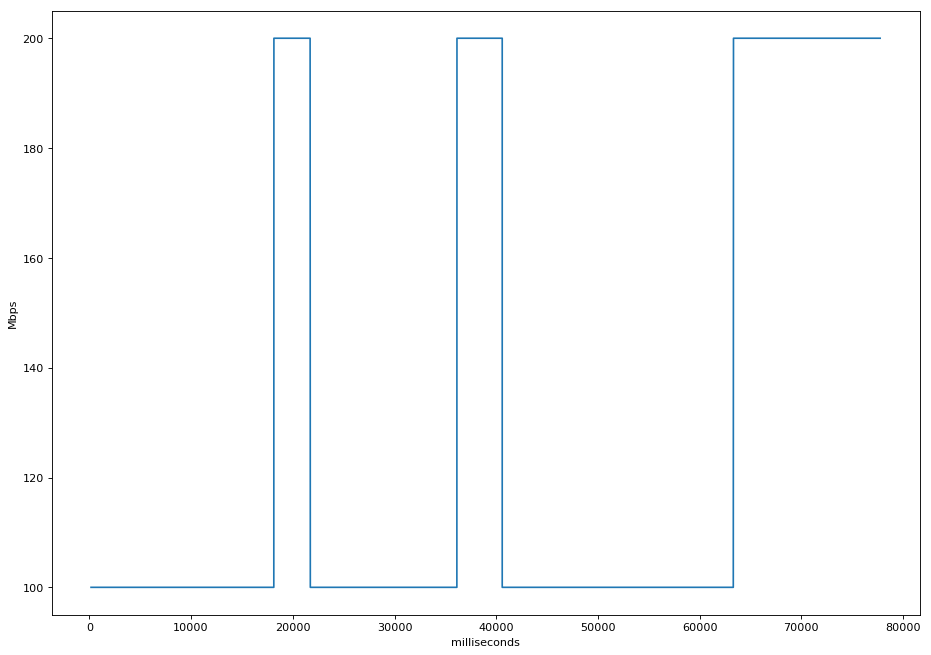

amst_dtn-star_dtn-800000:0:5


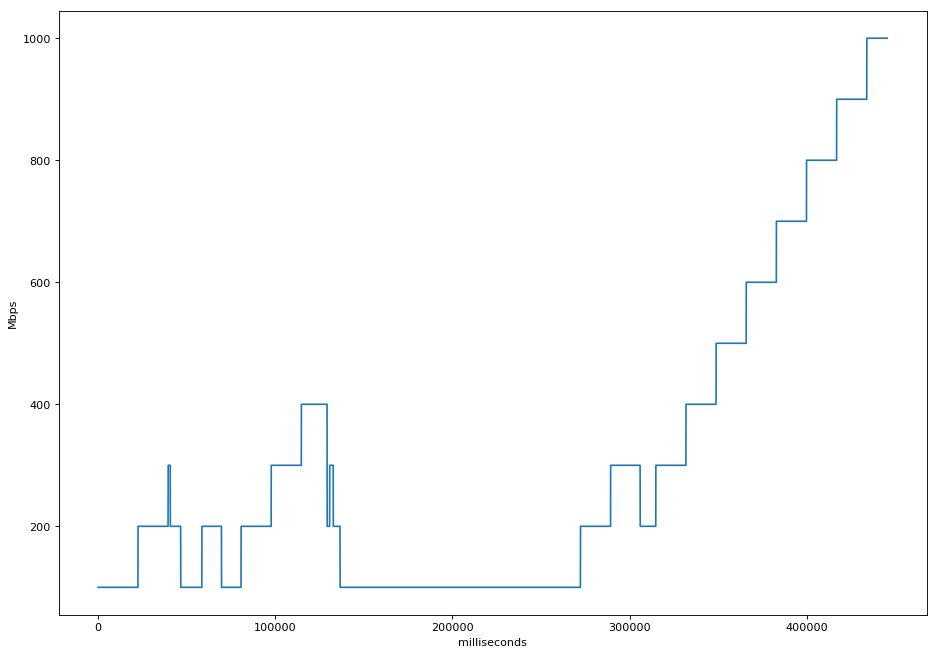

amst_dtn-star_dtn-800000:0:4


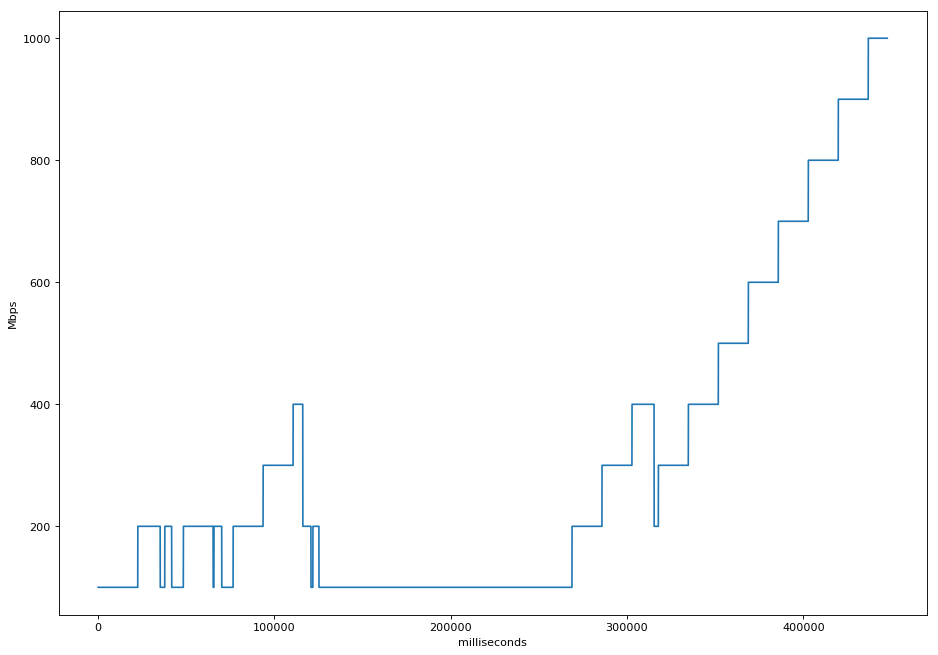

amst_dtn-star_dtn-800000:0:3
(457640, 1149.5217139720917, 0.3981134018066149)

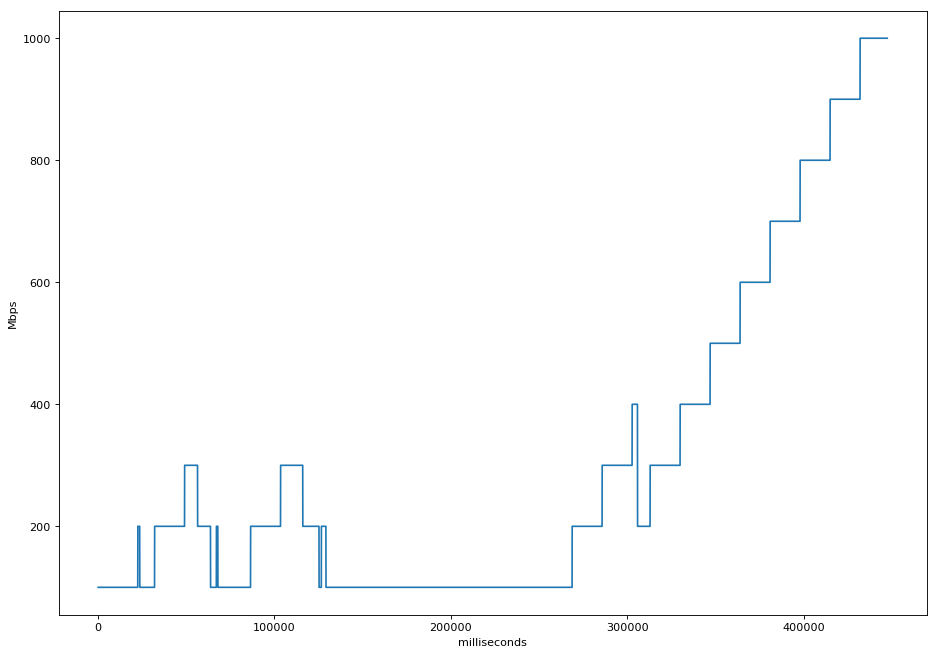


amst_dtn-star_dtn-800000:0:2


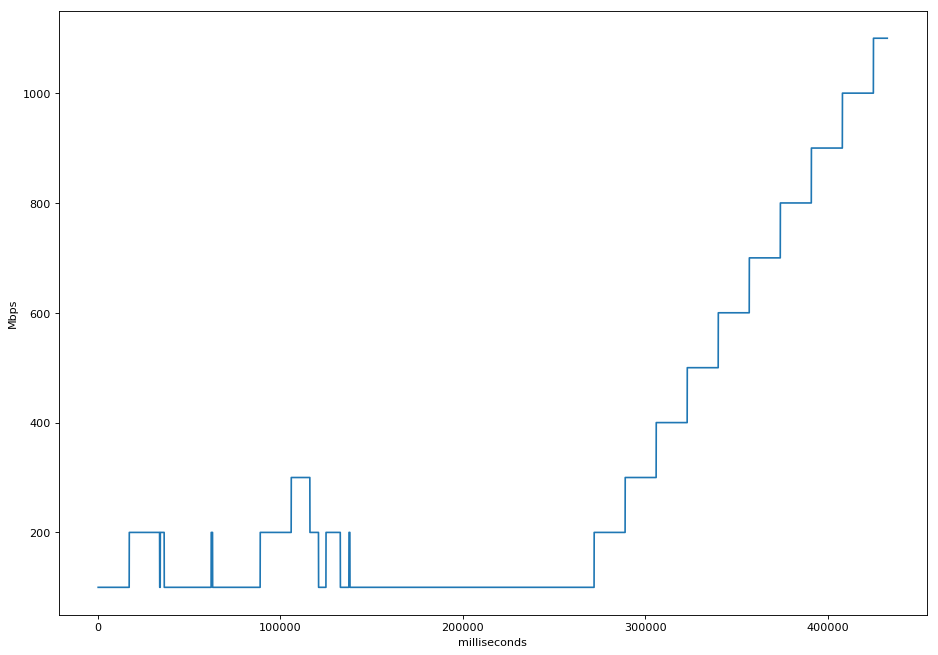

amst_dtn-star_dtn-800000:0:1


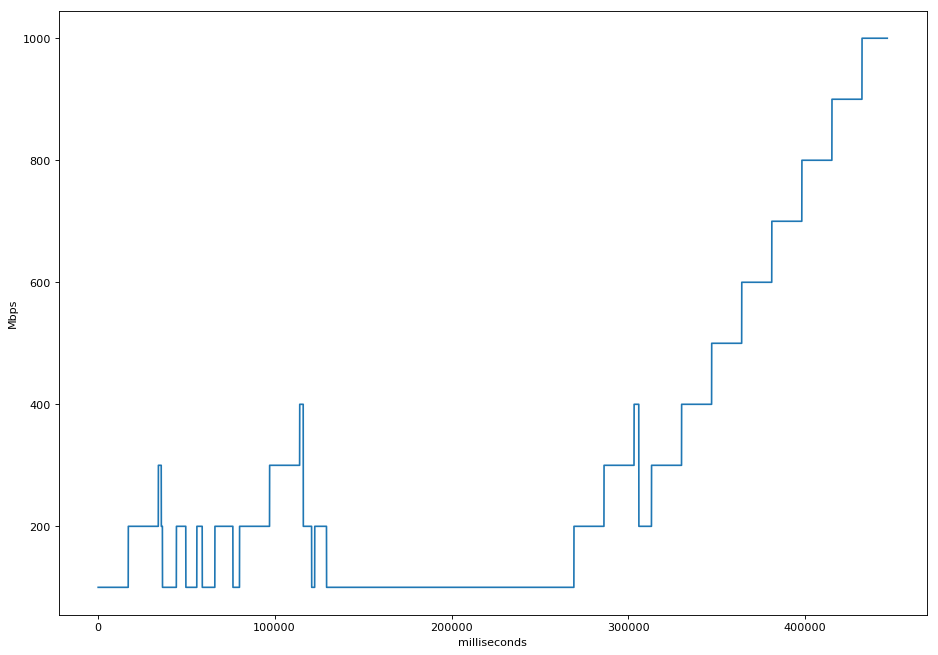

atla_dtn2-amst_dtn2-10000:4:0


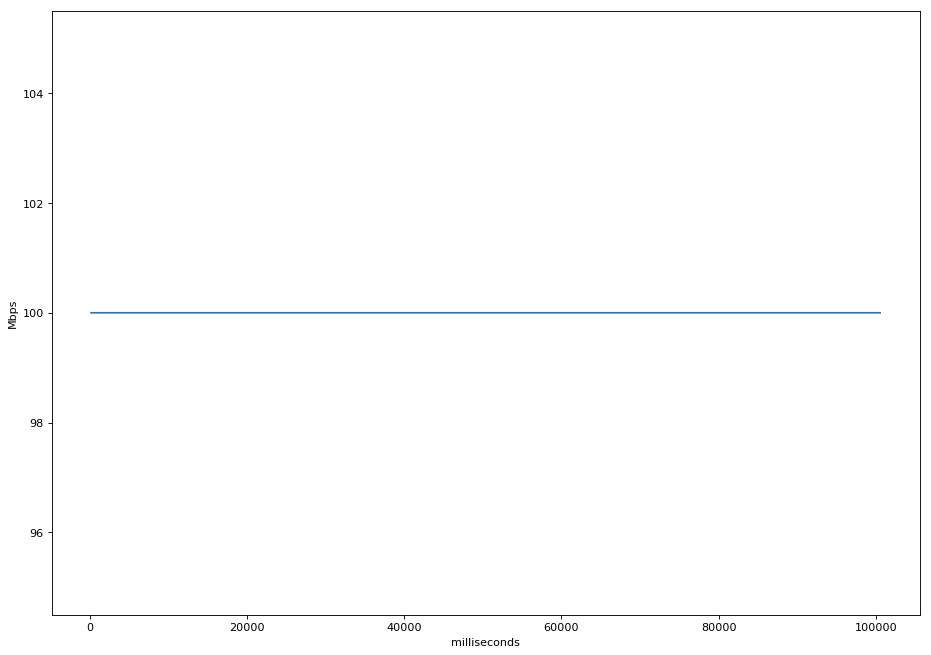

star_dtn2-denv_dtn2-10000:21:0
(457640, 1150.5274150371552, 0.3977654022135761)


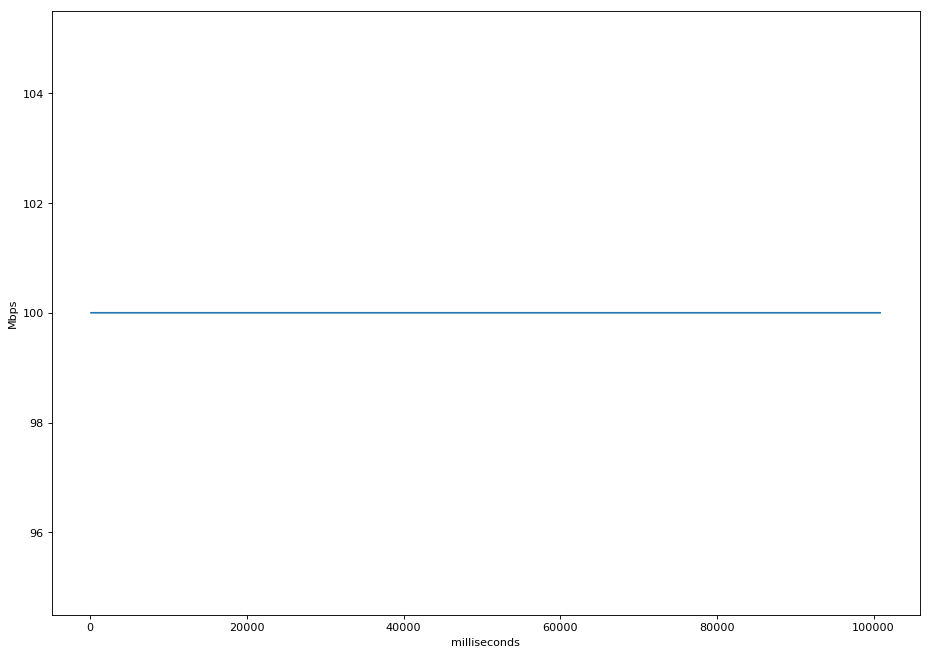

amst_dtn2-wash_dtn2-10000:23:0


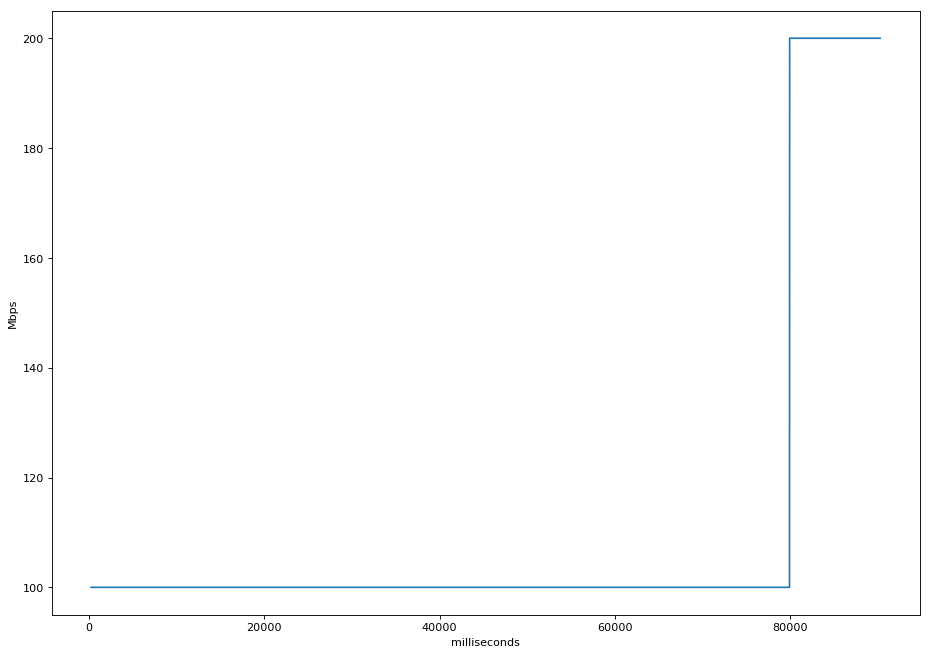

aofa_dtn2-lbl_dtn2-10000:30:0


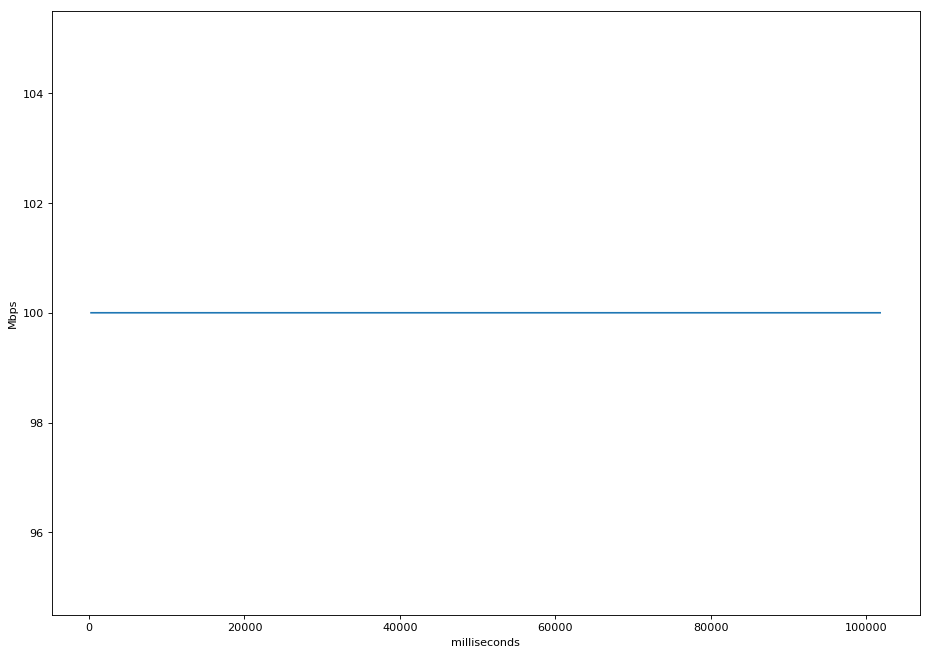

star_dtn2-amst_dtn2-10000:13:0


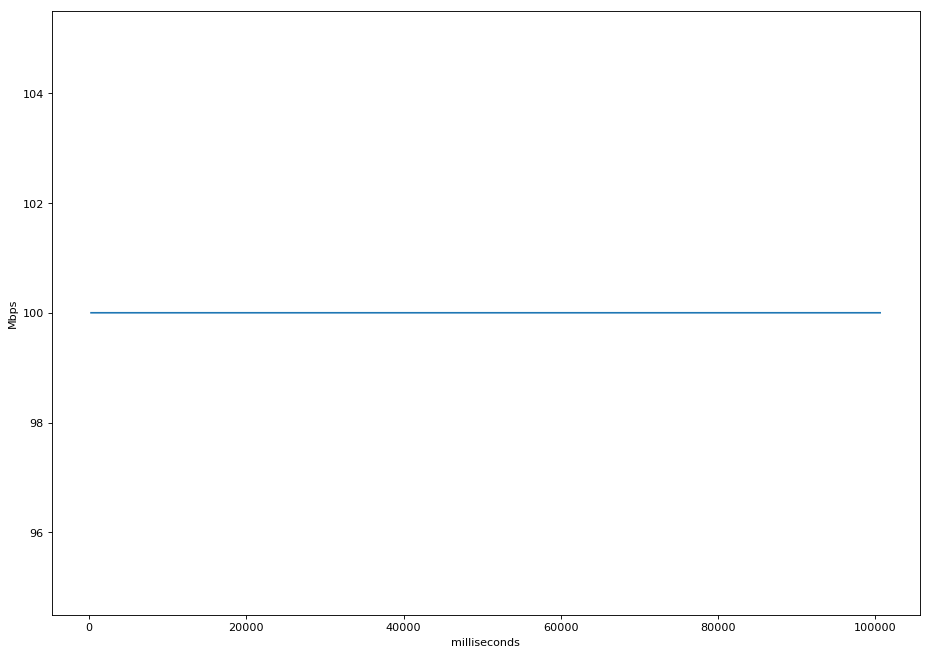

(457640, 1151.5453641414642, 0.3974137834693069)
cern_dtn2-amst_dtn2-10000:19:0


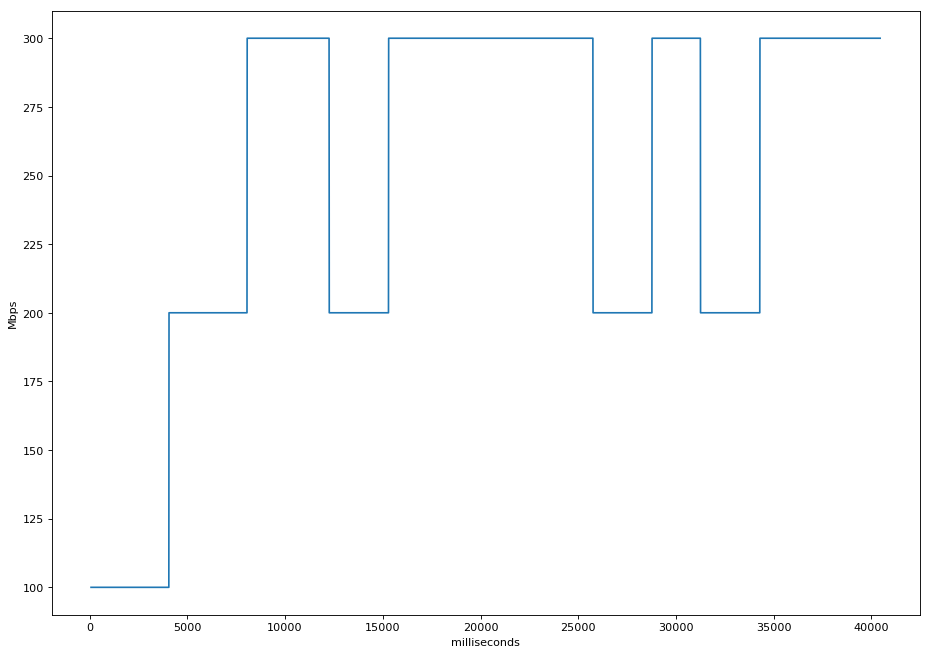

star_dtn2-cern_dtn2-10000:16:0


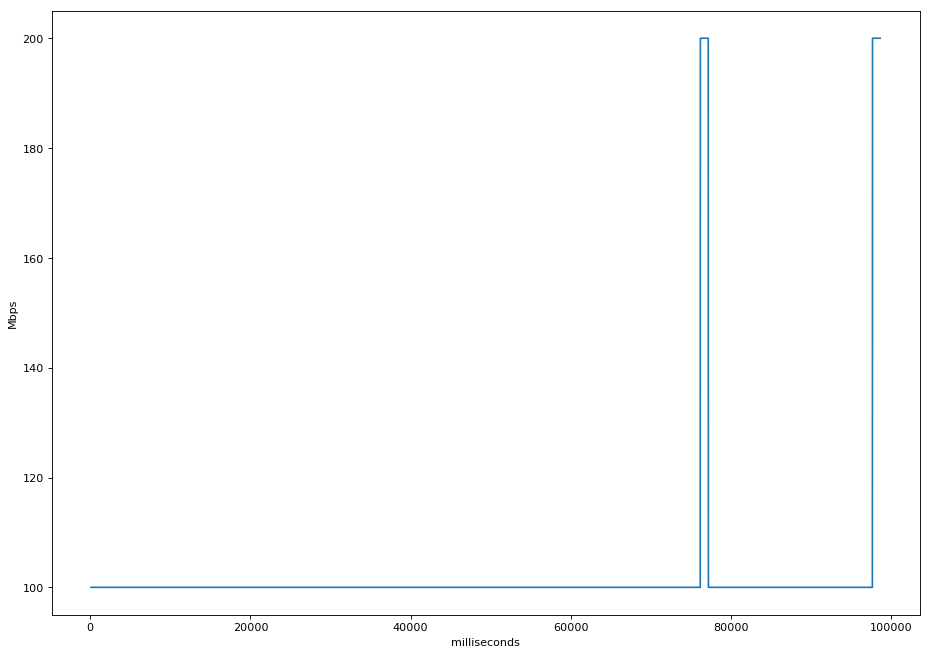

denv_dtn2-lbl_dtn2-10000:24:0


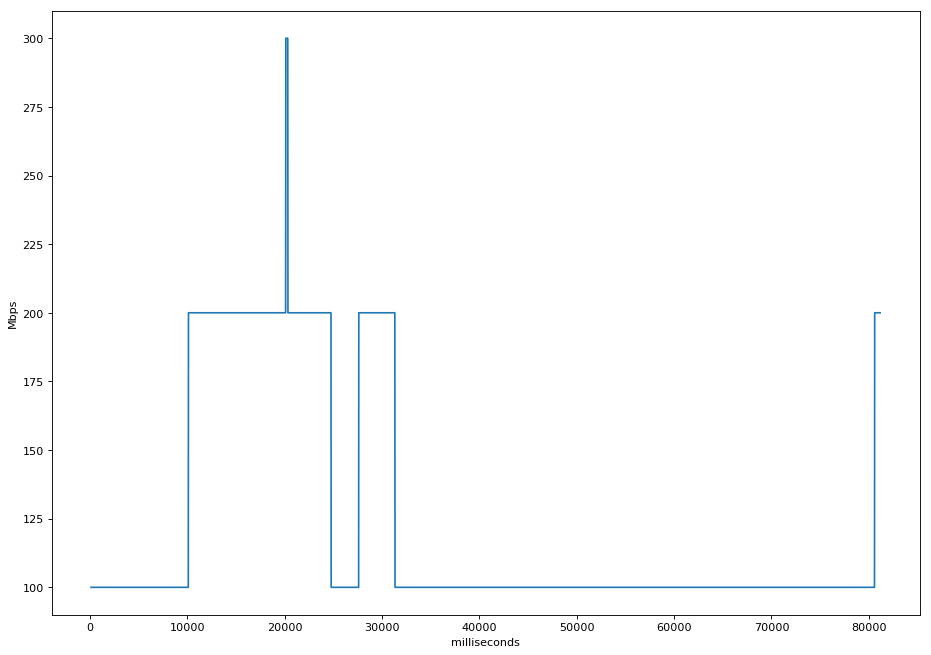

cern_dtn2-star_dtn2-10000:8:0
(457640, 1152.6466300487518, 0.39703408492214465)


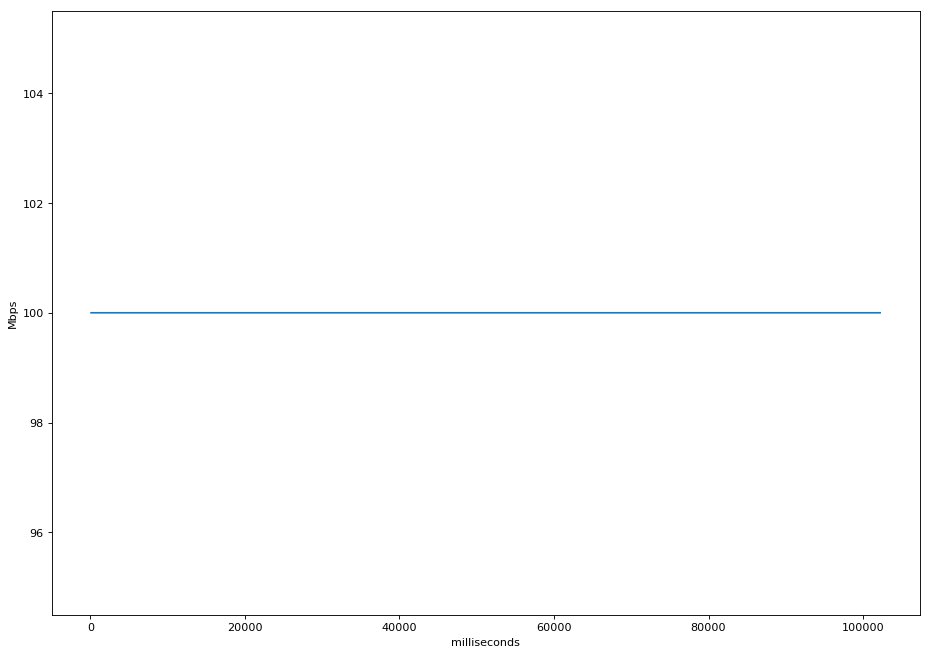

star_dtn2-denv_dtn2-10000:29:0


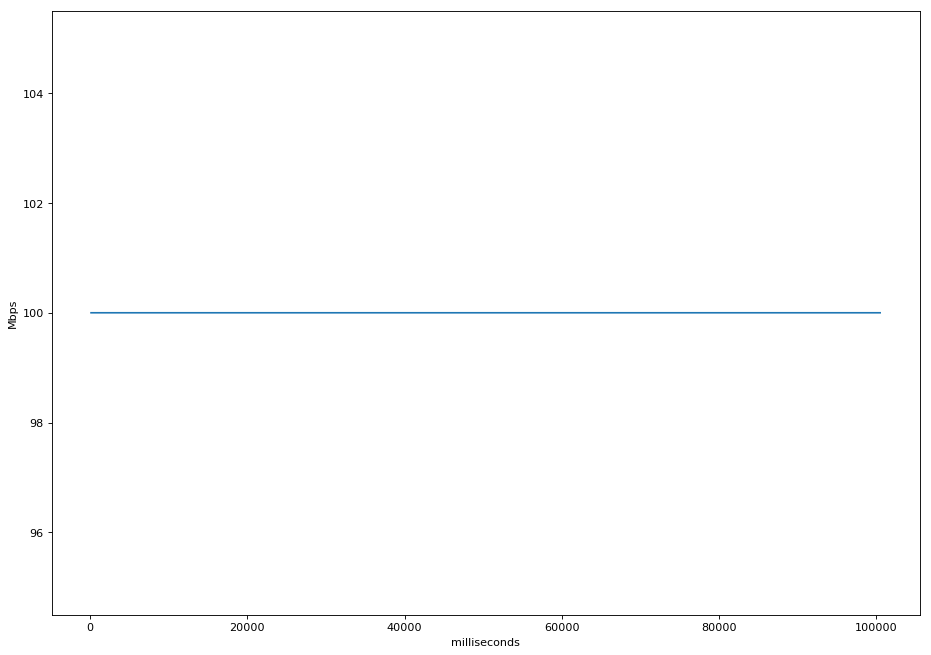

cern_dtn2-denv_dtn2-10000:1:0


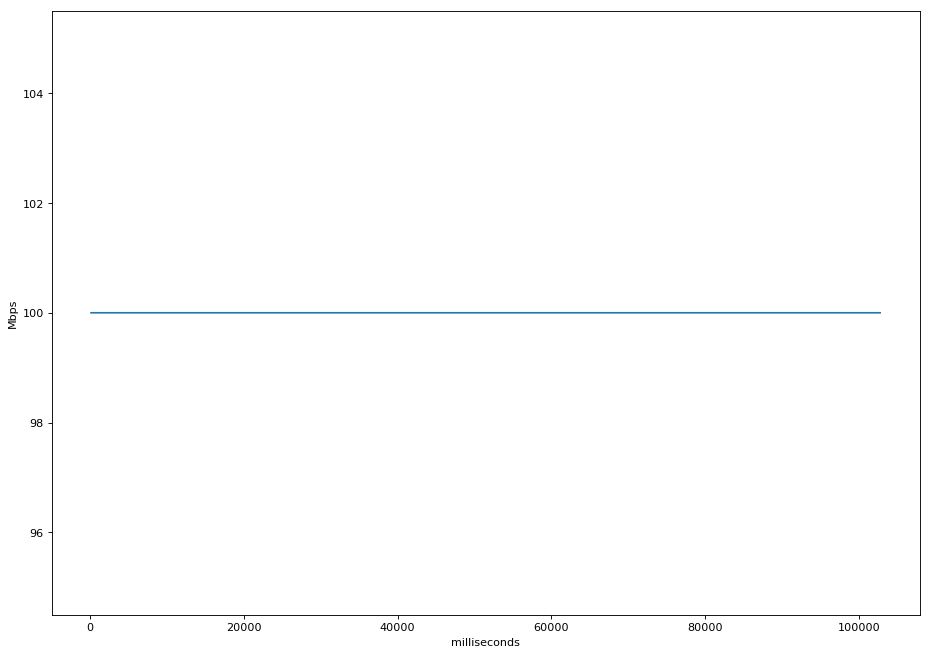

star_dtn2-lbl_dtn2-10000:9:0


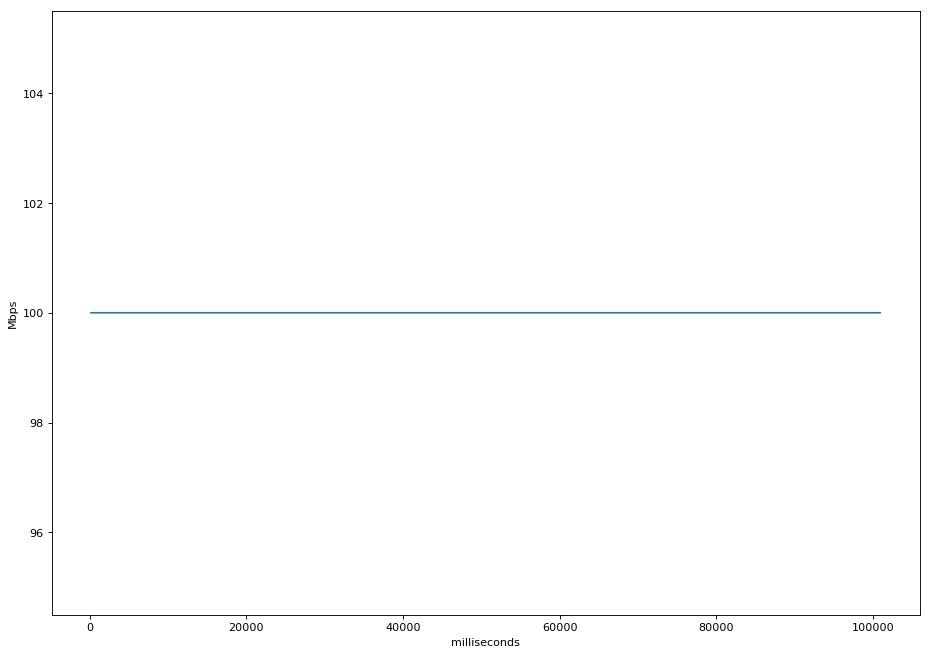

(457640, 1153.6492171287537, 0.3966890396189857)
atla_dtn2-cern_dtn2-10000:17:0


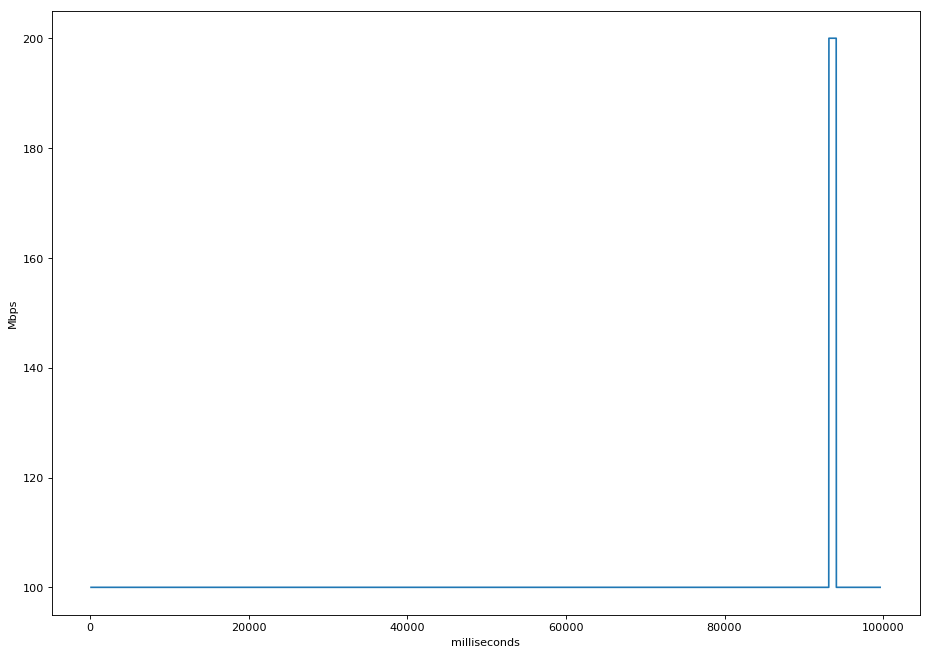

atla_dtn2-cern_dtn2-10000:20:0


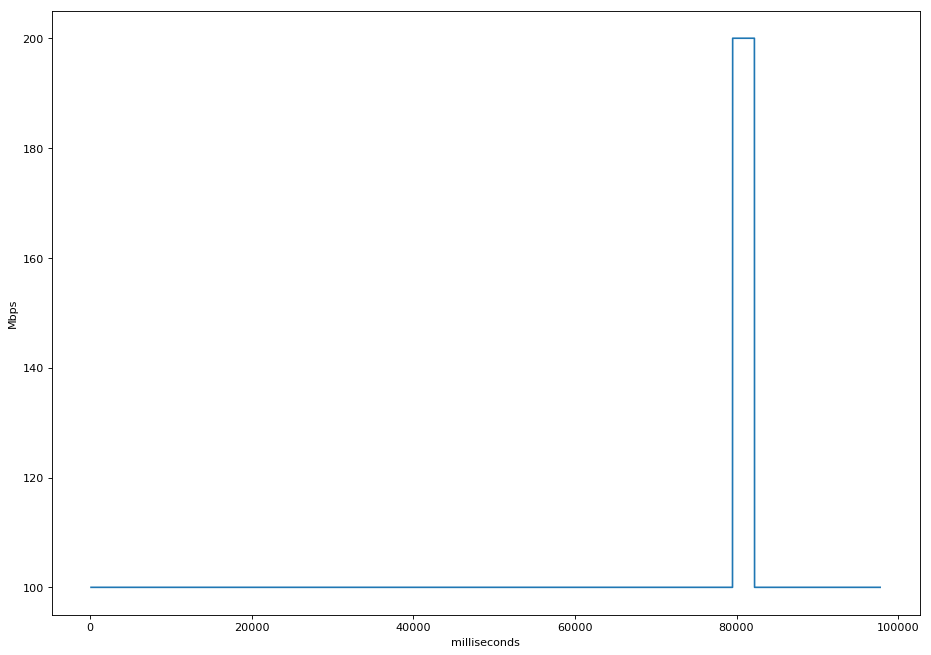

cern_dtn2-star_dtn2-10000:2:0


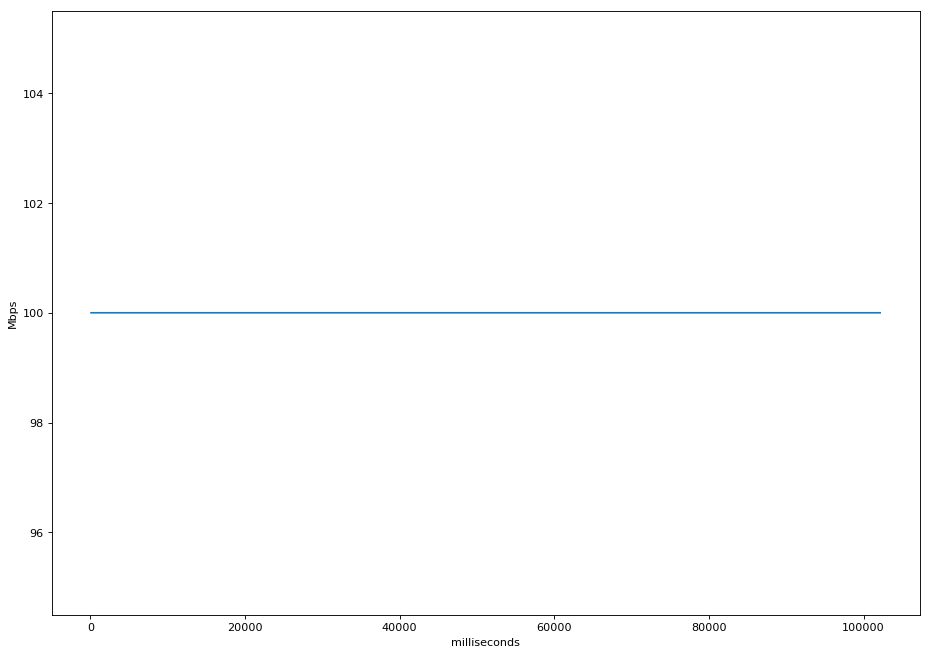

lbl_dtn2-denv_dtn2-10000:34:0
(457640, 1154.6606650352478, 0.3963415519883756)


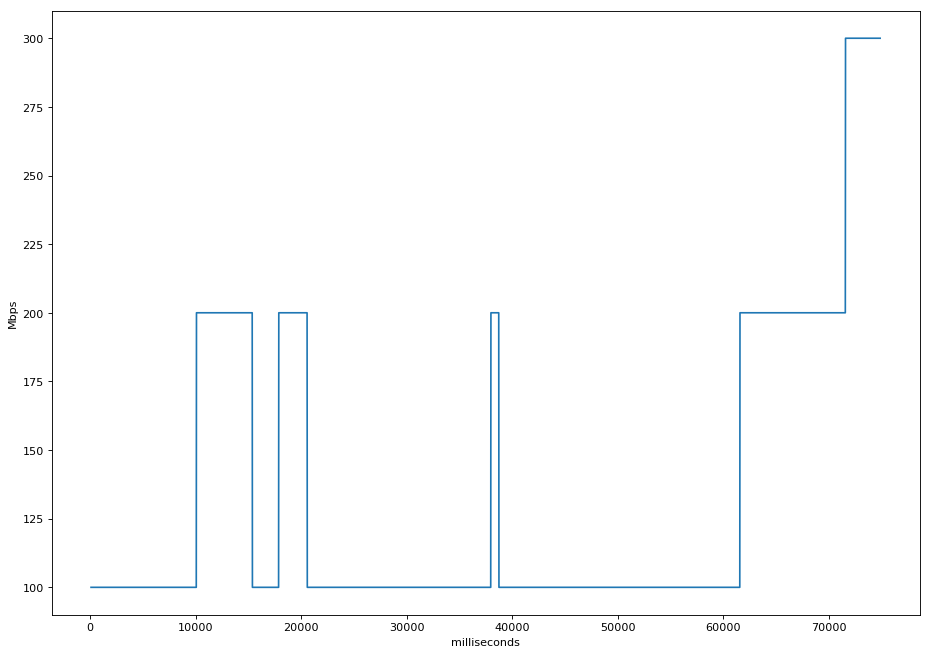

cern_dtn2-atla_dtn2-10000:15:0


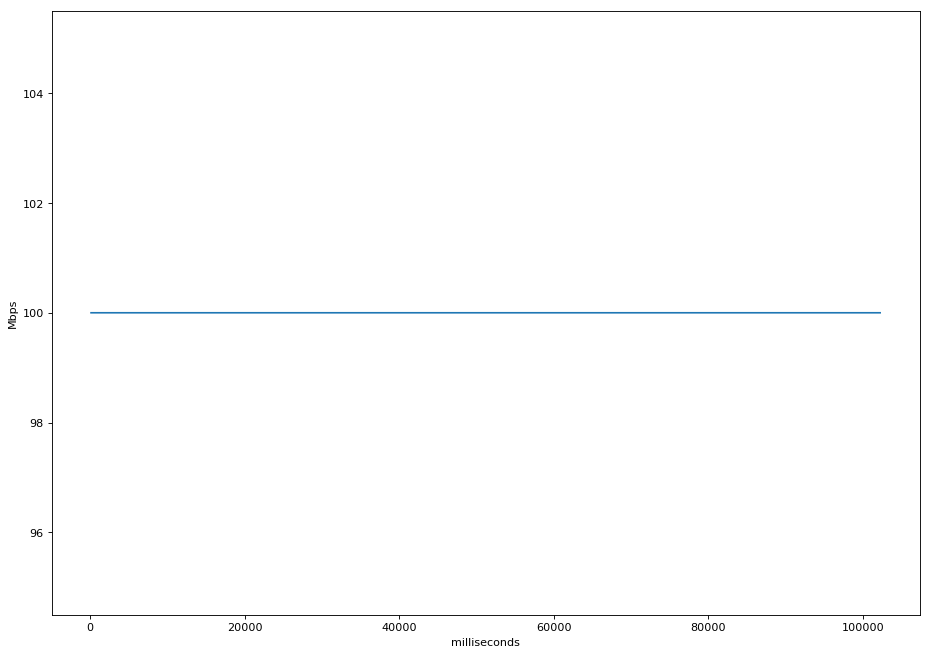

lbl_dtn2-star_dtn2-10000:11:0


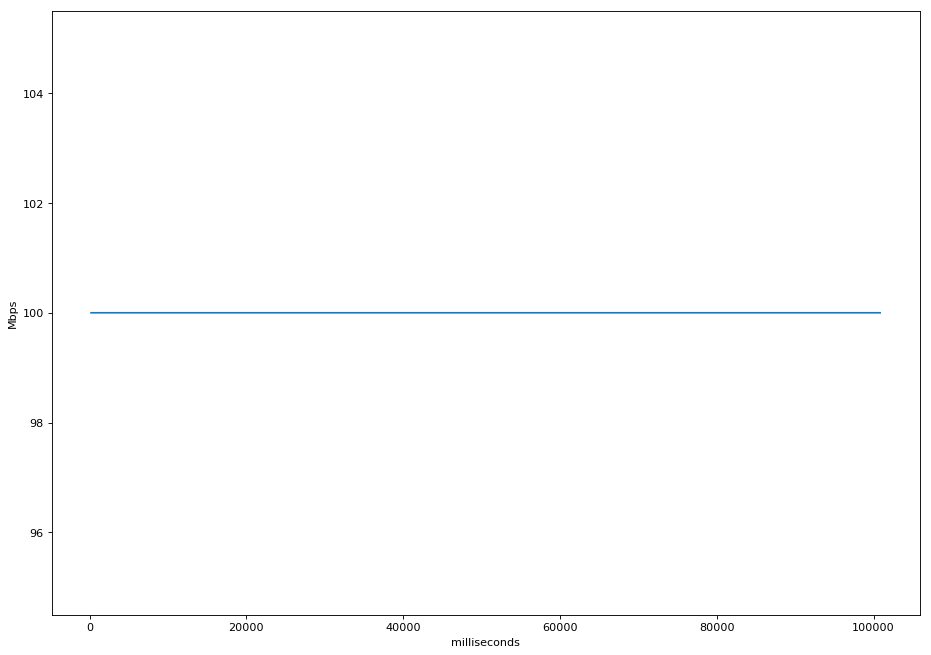

star_dtn2-lbl_dtn2-10000:34:0


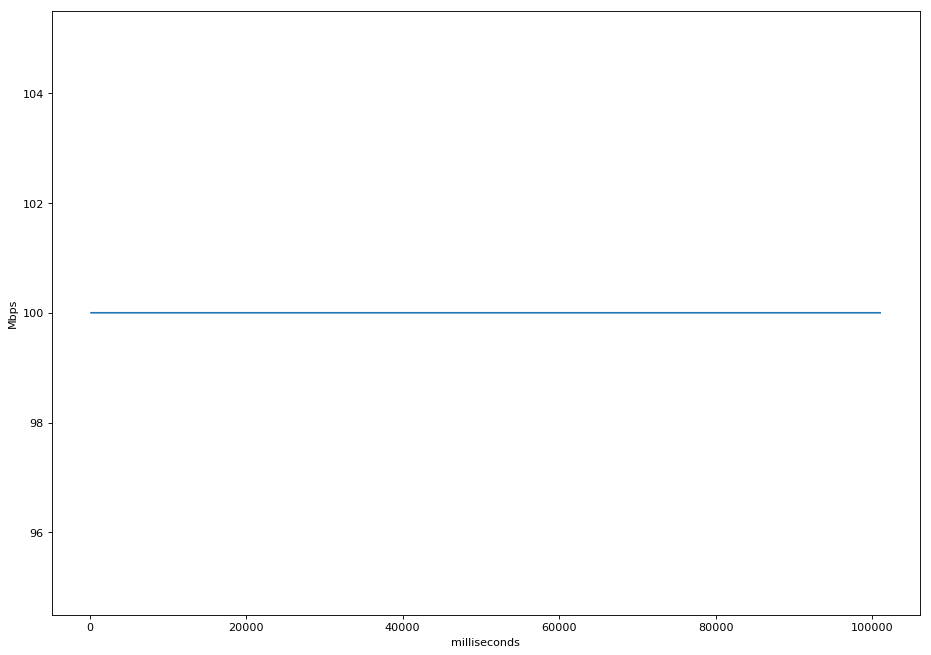

wash_dtn2-star_dtn2-10000:30:0
(457640, 1155.6637761592865, 0.395997529247575)


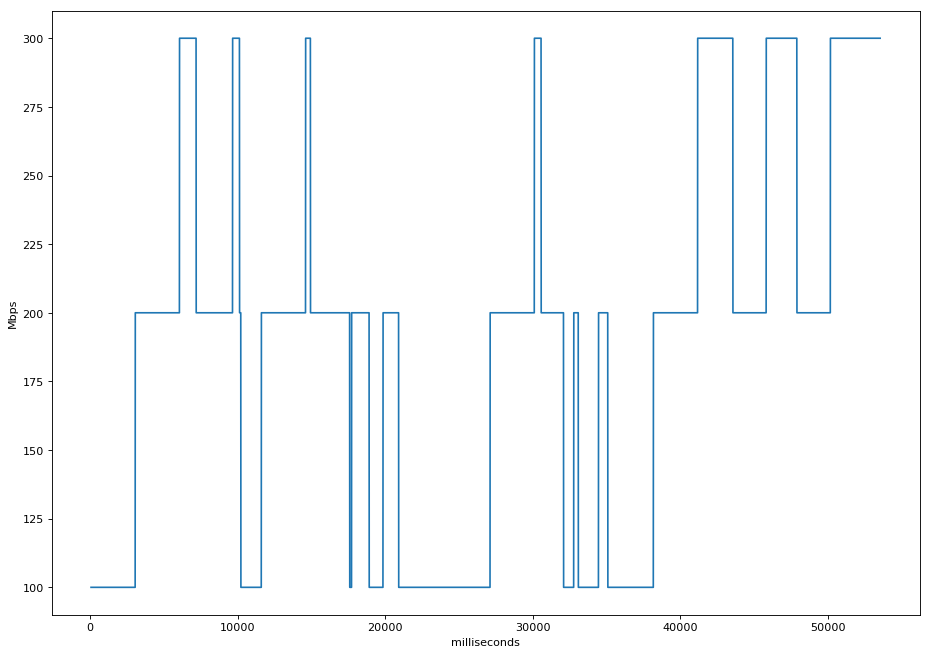

star_dtn2-wash_dtn2-10000:15:0


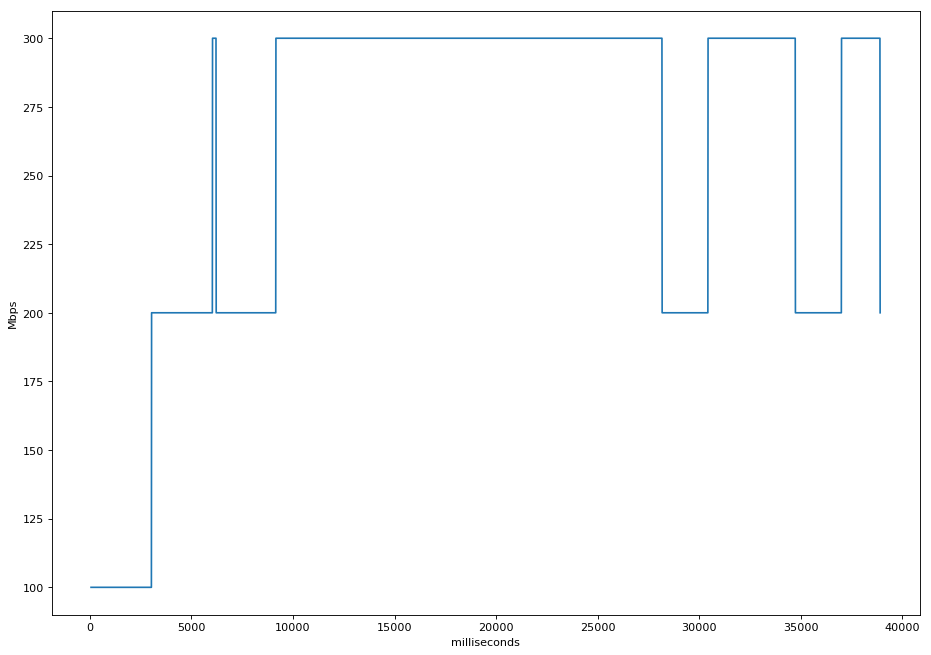

denv_dtn2-wash_dtn2-10000:15:0


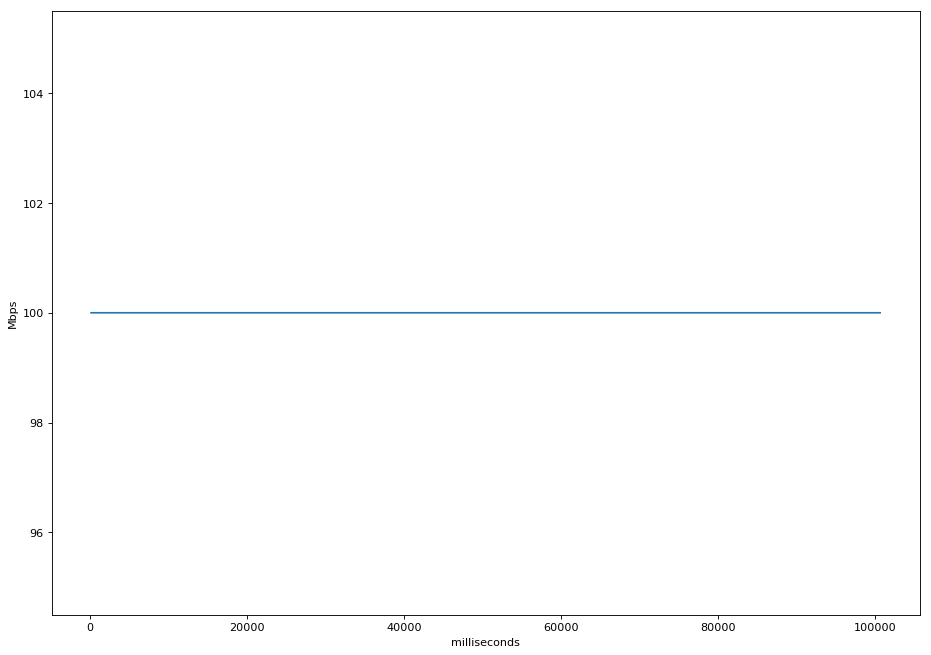

wash_dtn2-cern_dtn2-10000:27:0
(457640, 1156.7037091255188, 0.3956415081836135)


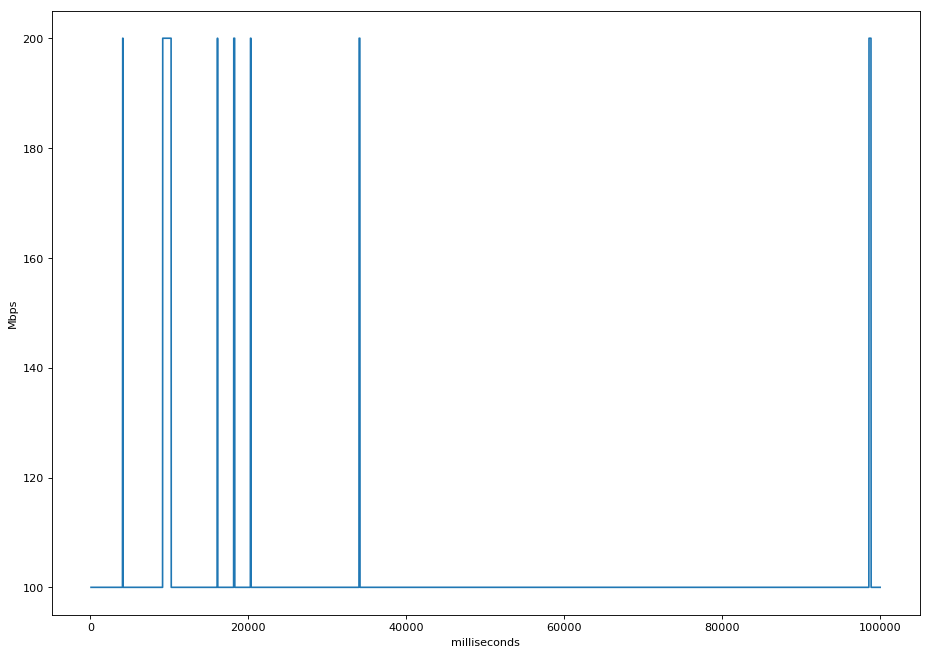

amst_dtn2-aofa_dtn2-10000:33:0


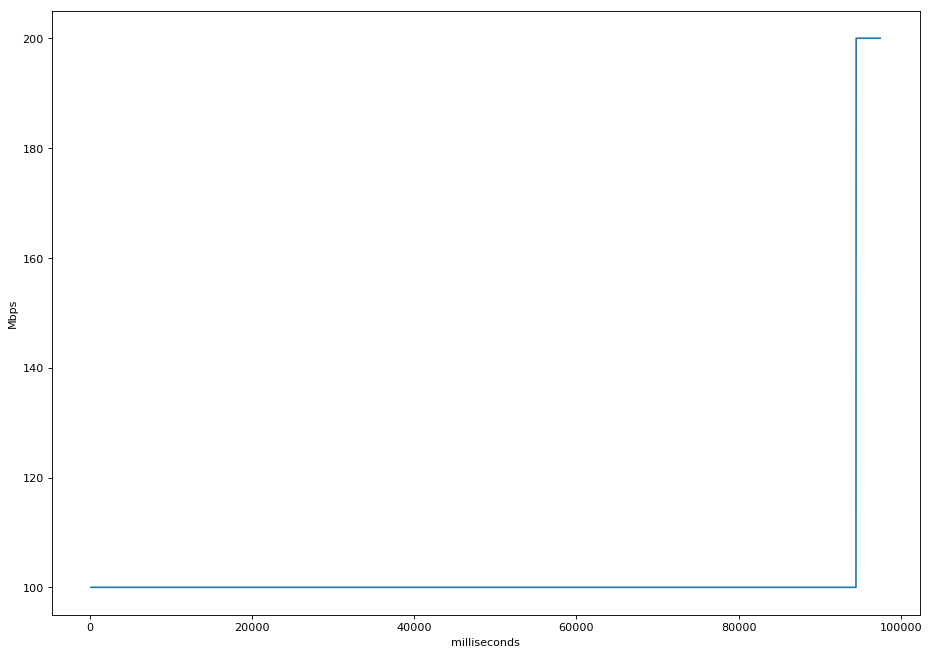

cern_dtn2-star_dtn2-10000:27:0


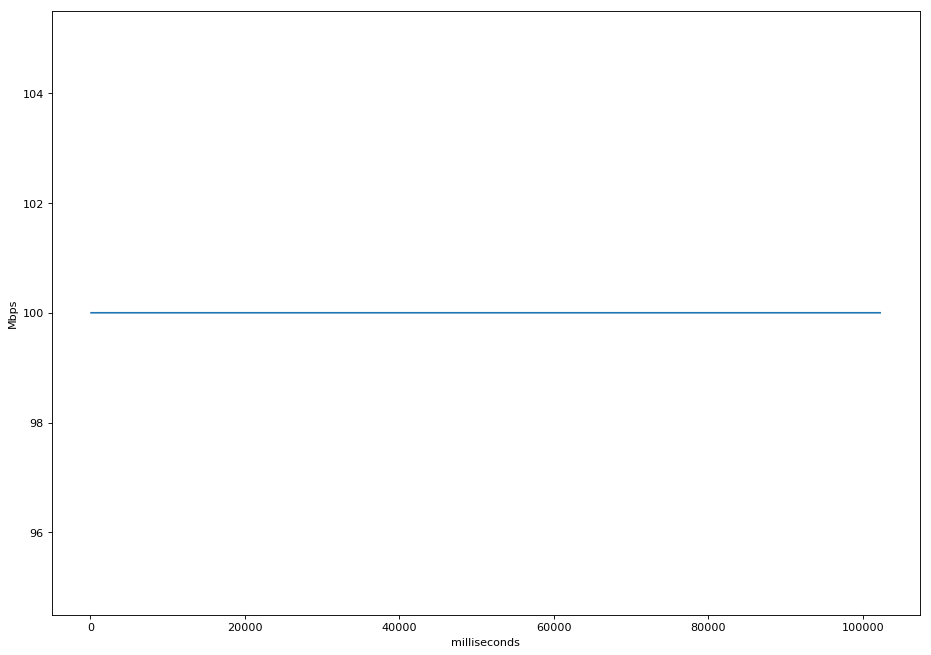

lbl_dtn2-amst_dtn2-10000:9:0


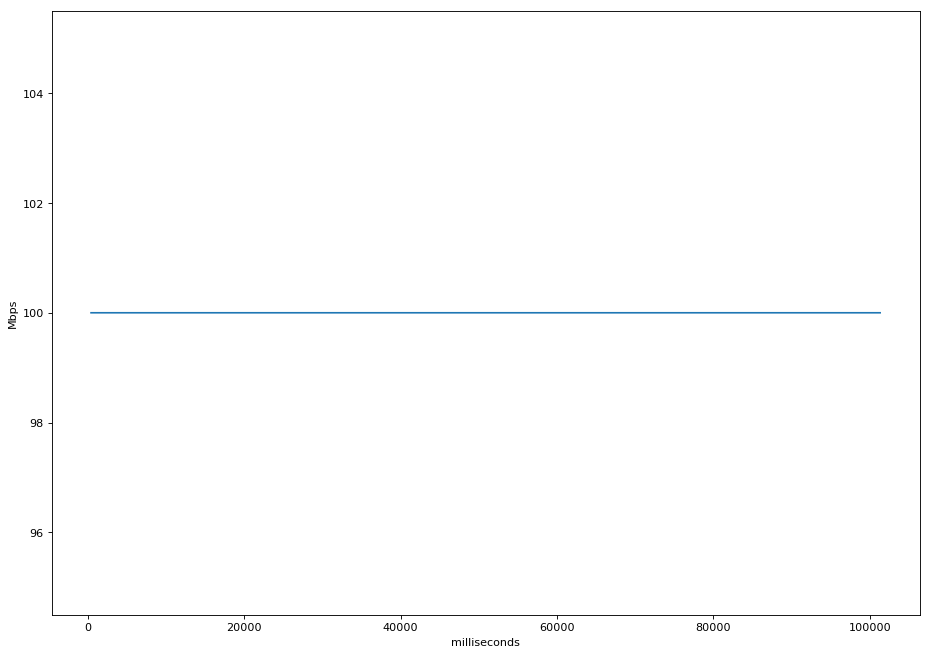

cern_dtn2-aofa_dtn2-10000:37:0
(457640, 1157.734559059143, 0.39528922793140997)


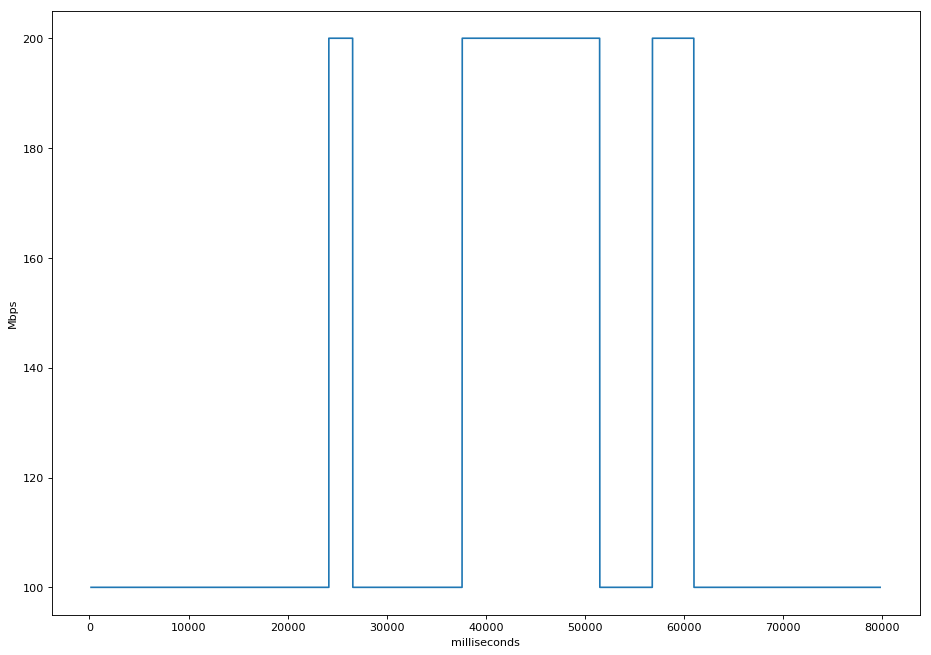

lbl_dtn2-wash_dtn2-10000:25:0


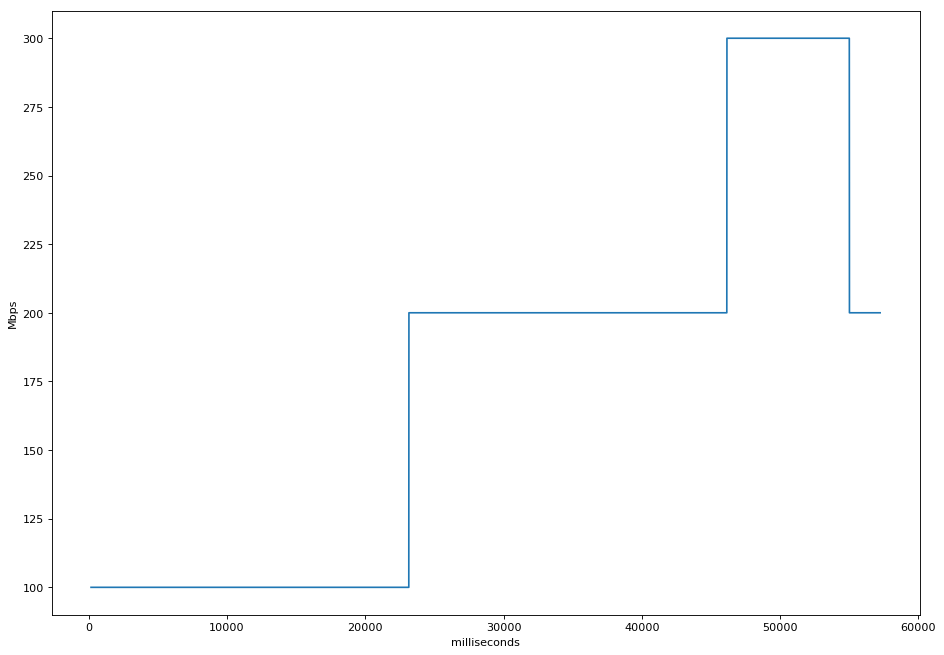

cern_dtn2-wash_dtn2-10000:11:0


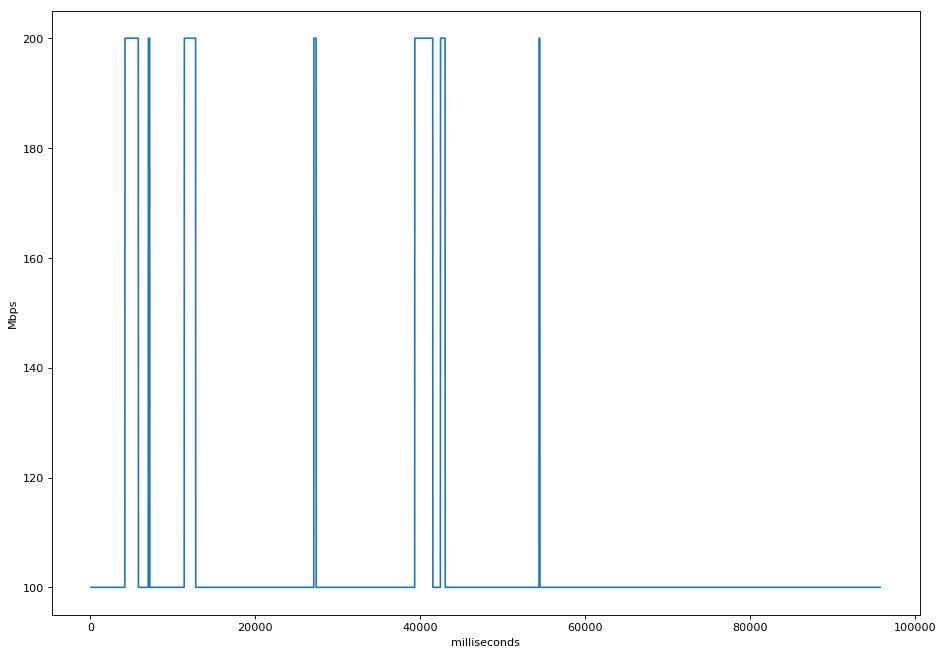

lbl_dtn2-amst_dtn2-10000:16:0


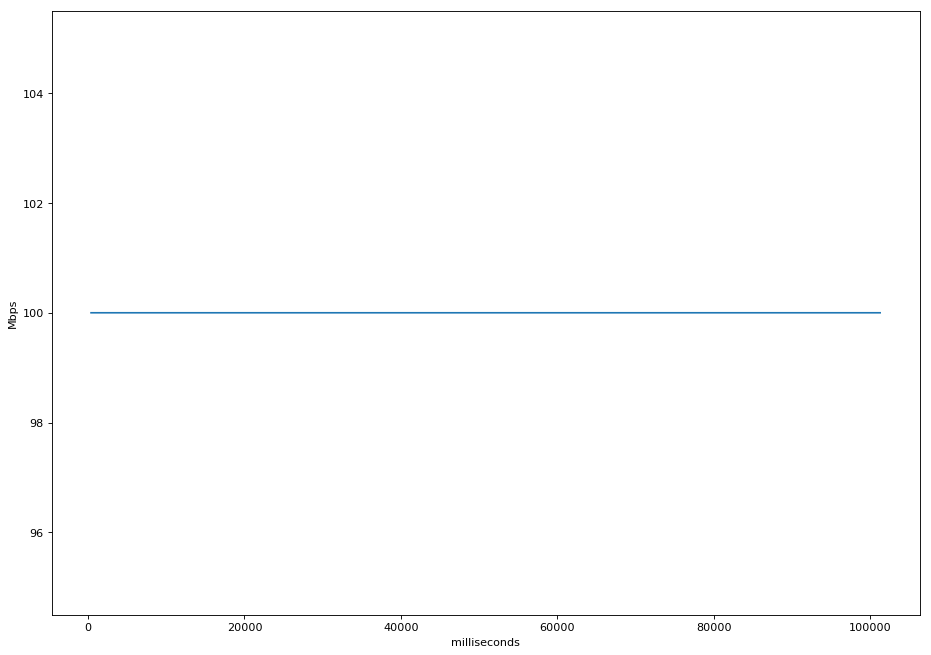

star_dtn2-denv_dtn2-10000:8:0
(457640, 1158.7881350517273, 0.39492982897997253)

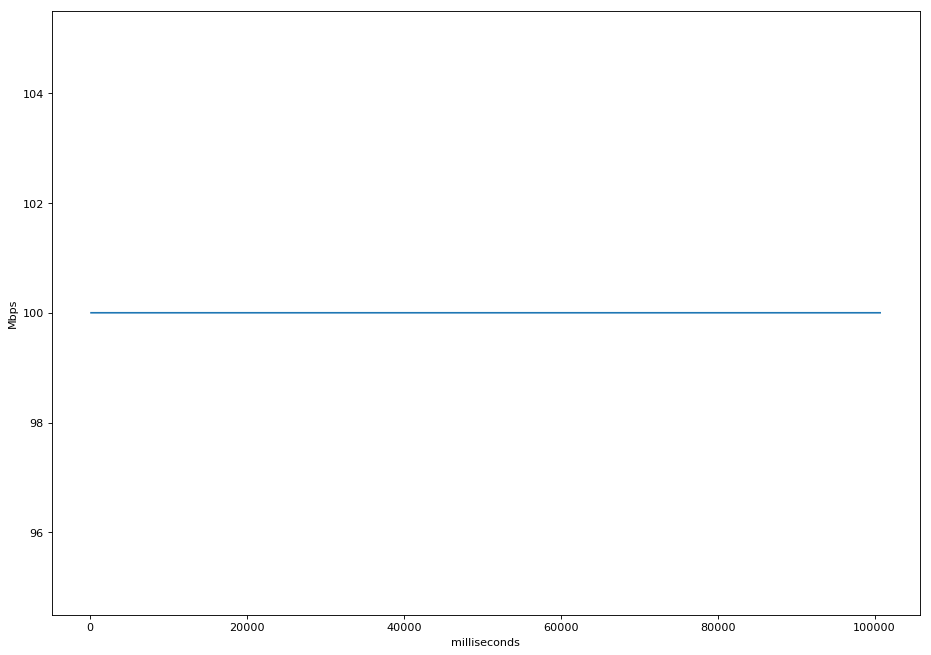


cern_dtn2-denv_dtn2-10000:22:0


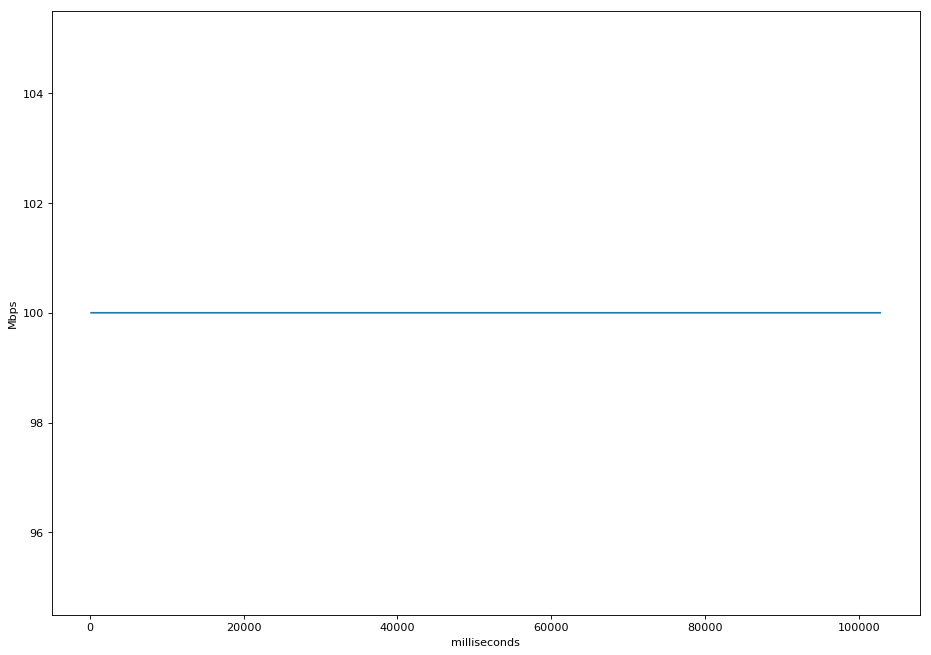

atla_dtn2-wash_dtn2-10000:16:0


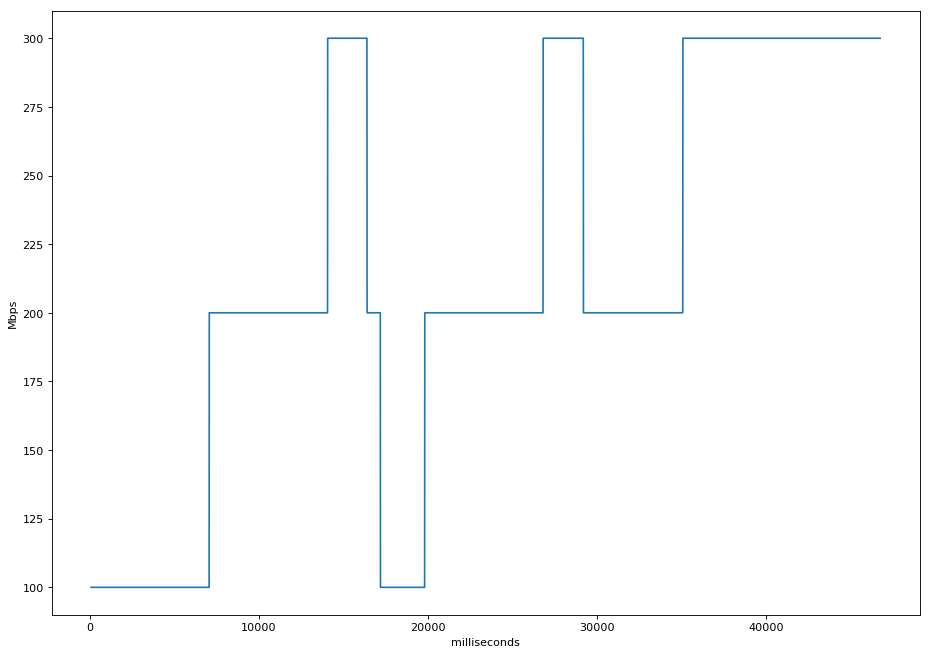

lbl_dtn2-aofa_dtn2-10000:24:0


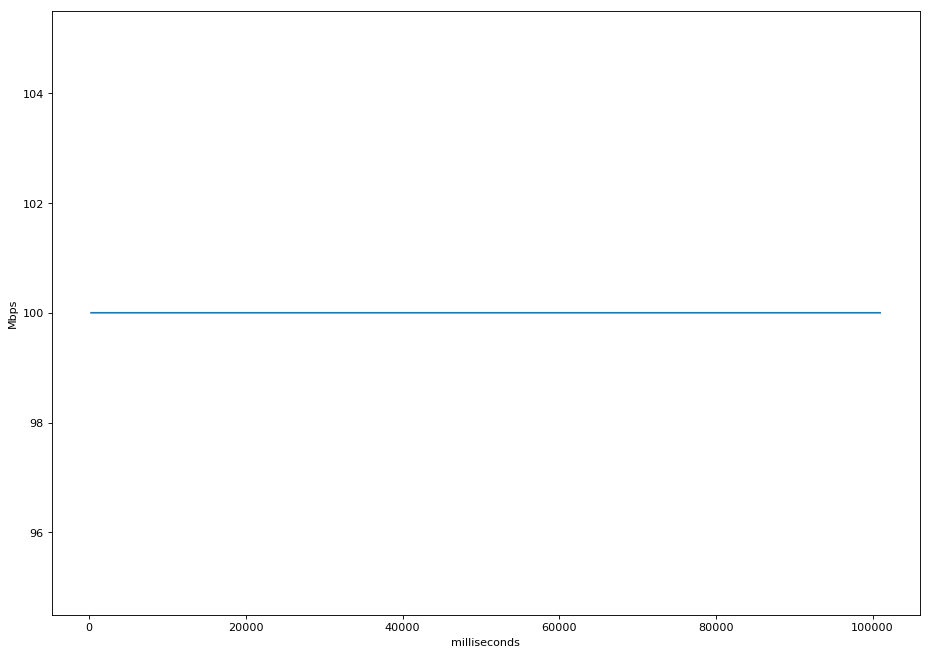

aofa_dtn2-amst_dtn2-10000:25:0
(457640, 1159.8511731624603, 0.3945678640408621)


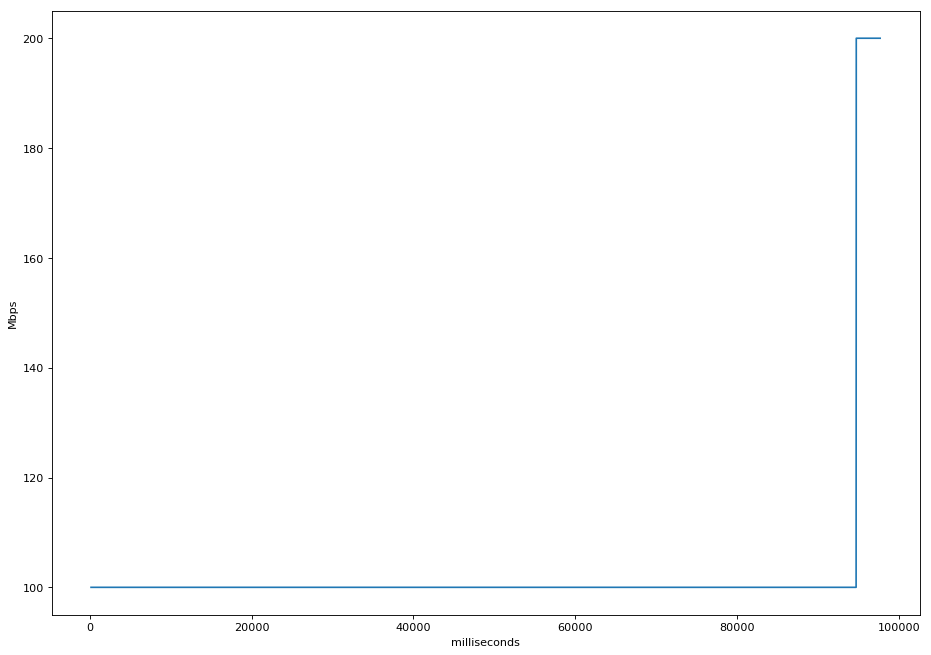

star_dtn2-denv_dtn2-10000:18:0


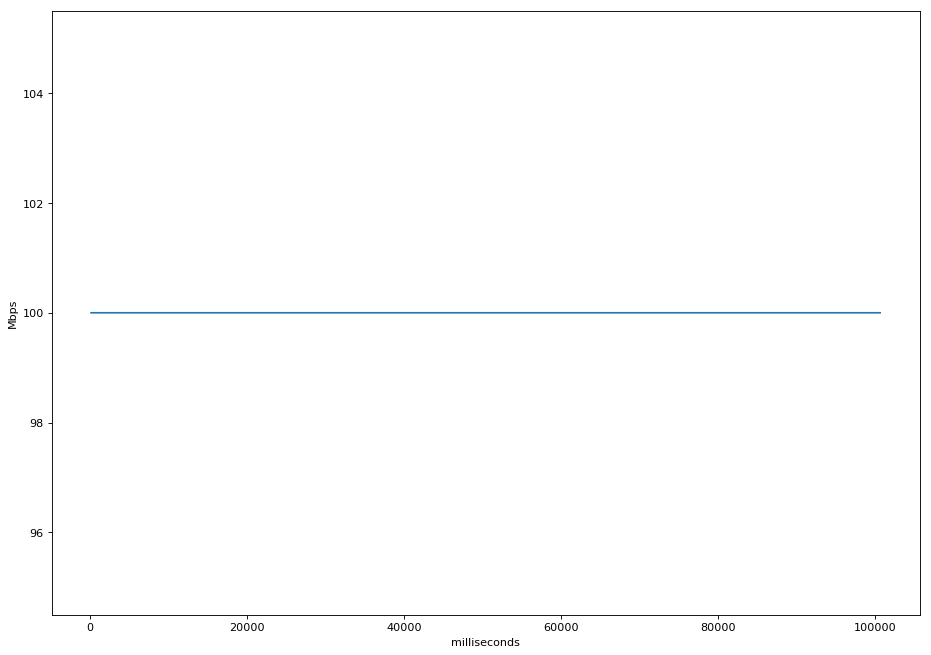

amst_dtn2-aofa_dtn2-10000:31:0


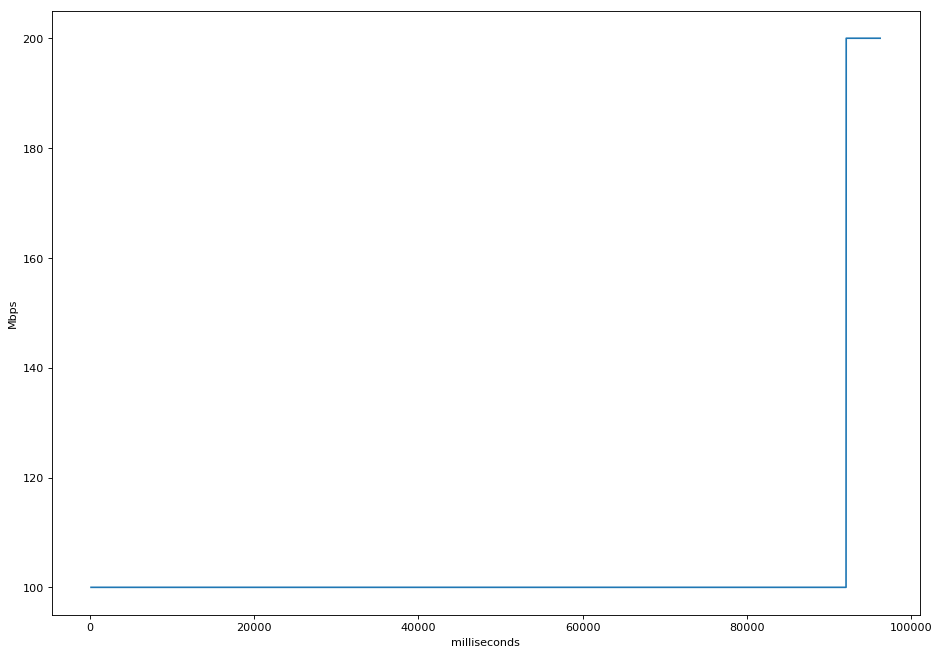

cern_dtn2-amst_dtn2-10000:30:0


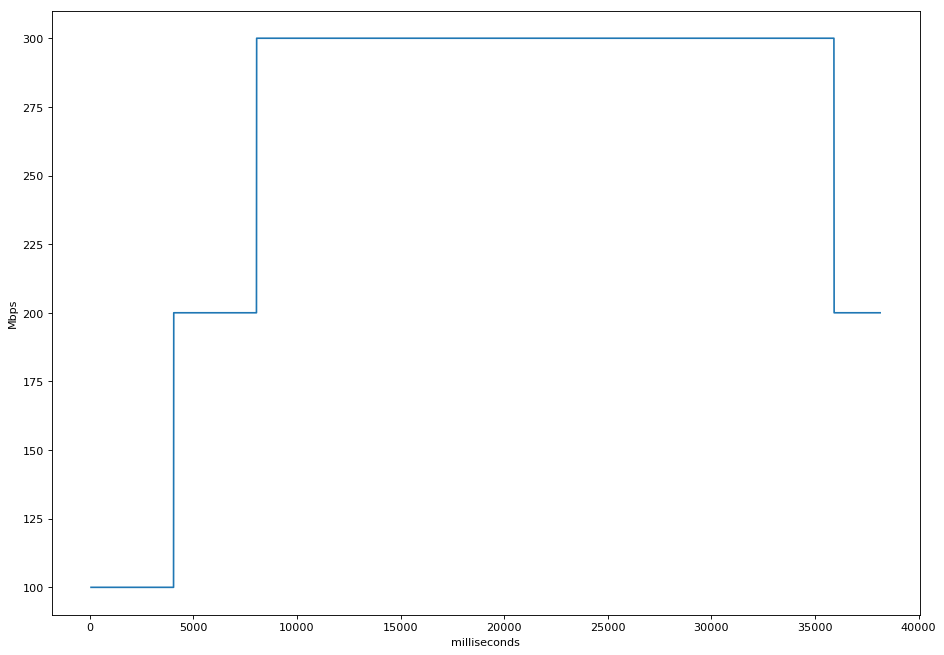

cern_dtn-star_dtn-800000:0:0
(457640, 1160.8737609386444, 0.3942202980192845)


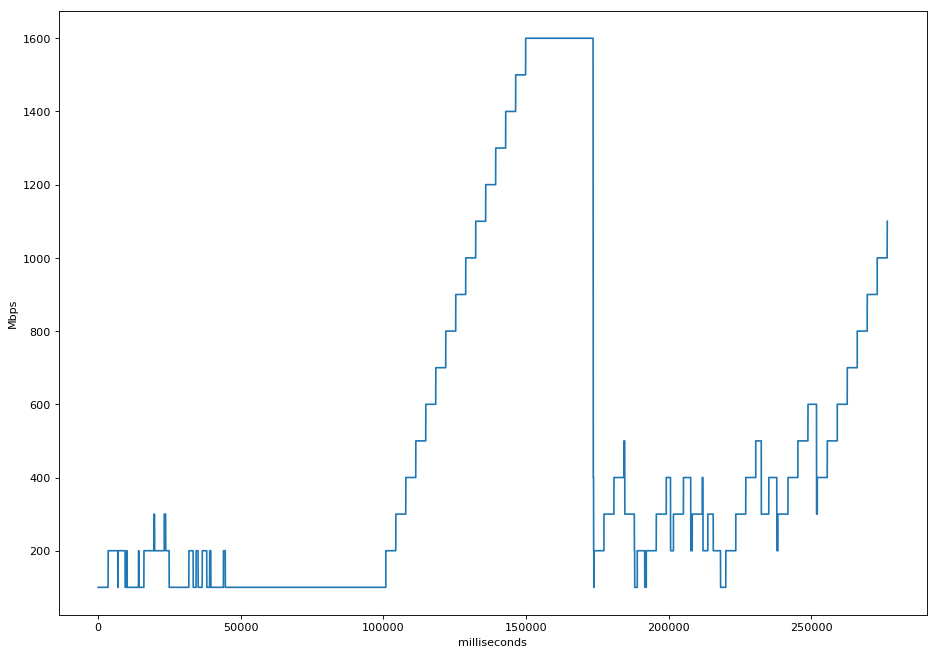

cern_dtn-star_dtn-800000:0:1


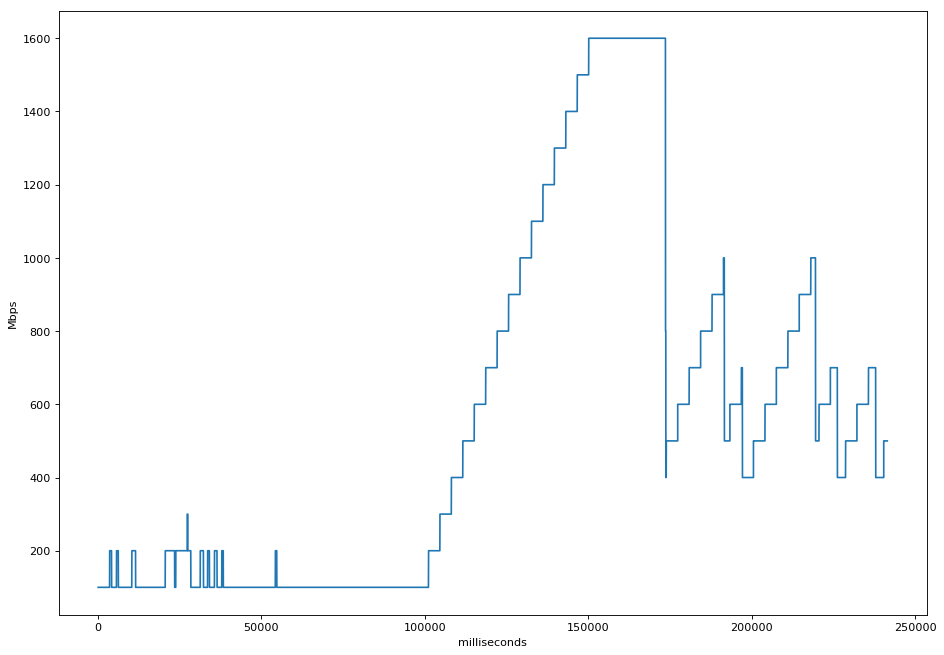

cern_dtn-star_dtn-800000:0:2


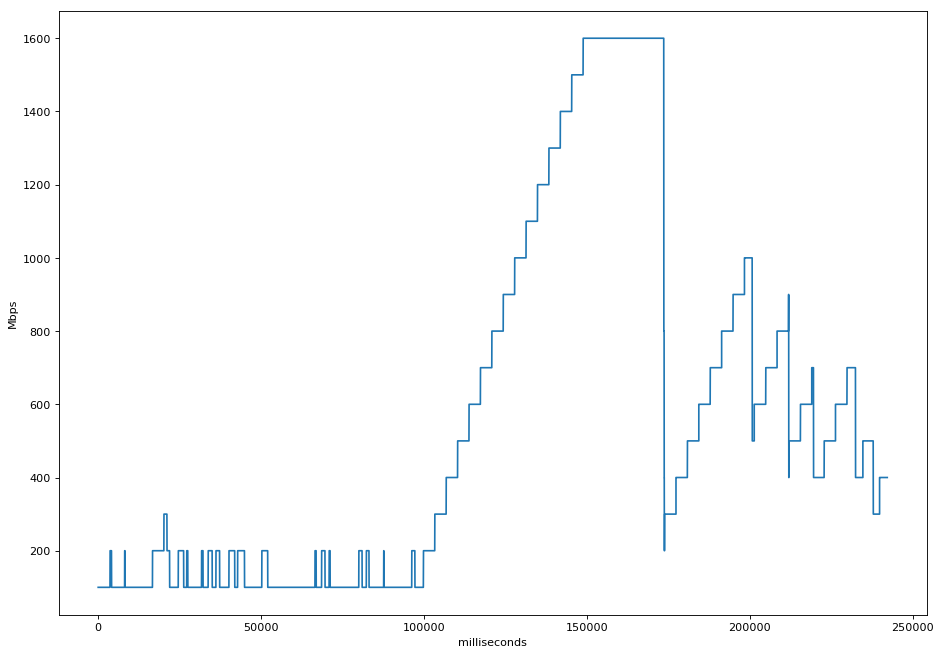

cern_dtn-star_dtn-800000:0:3
(457640, 1161.882562160492, 0.3938780173695263)


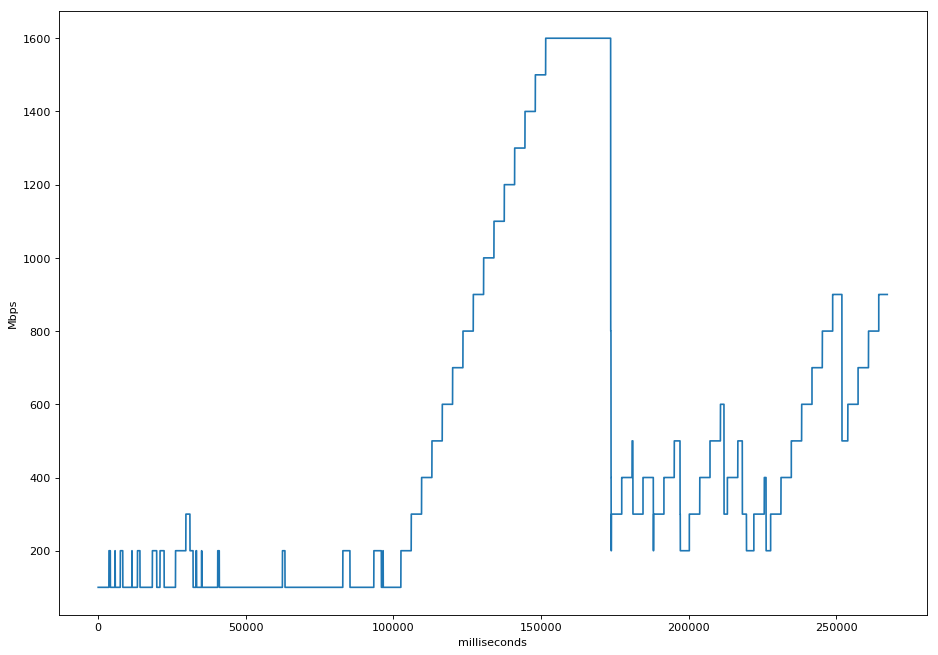

cern_dtn-star_dtn-800000:0:4


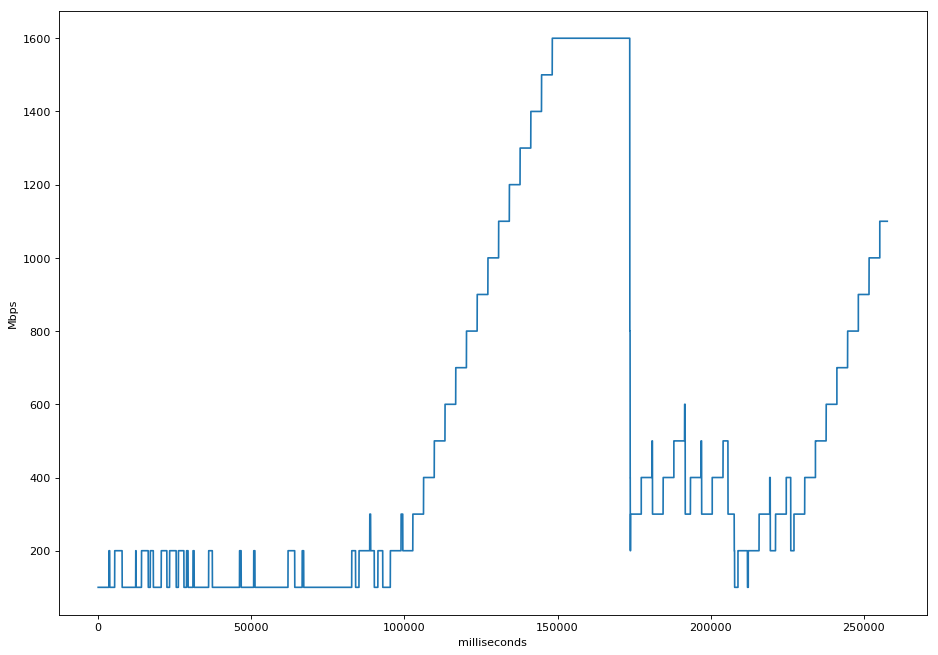

cern_dtn-star_dtn-800000:0:5


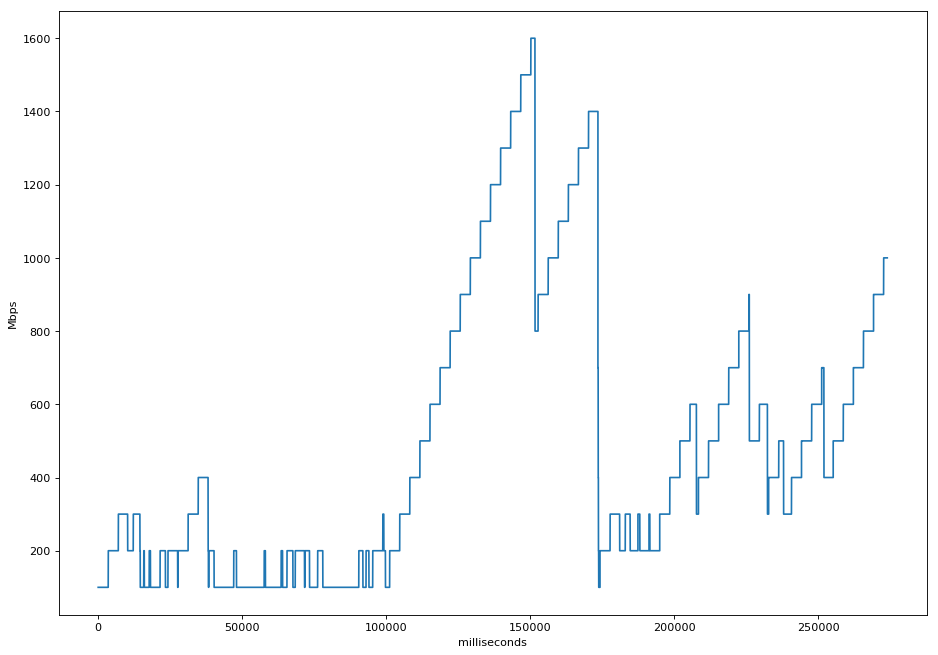

cern_dtn2-atla_dtn2-10000:7:0


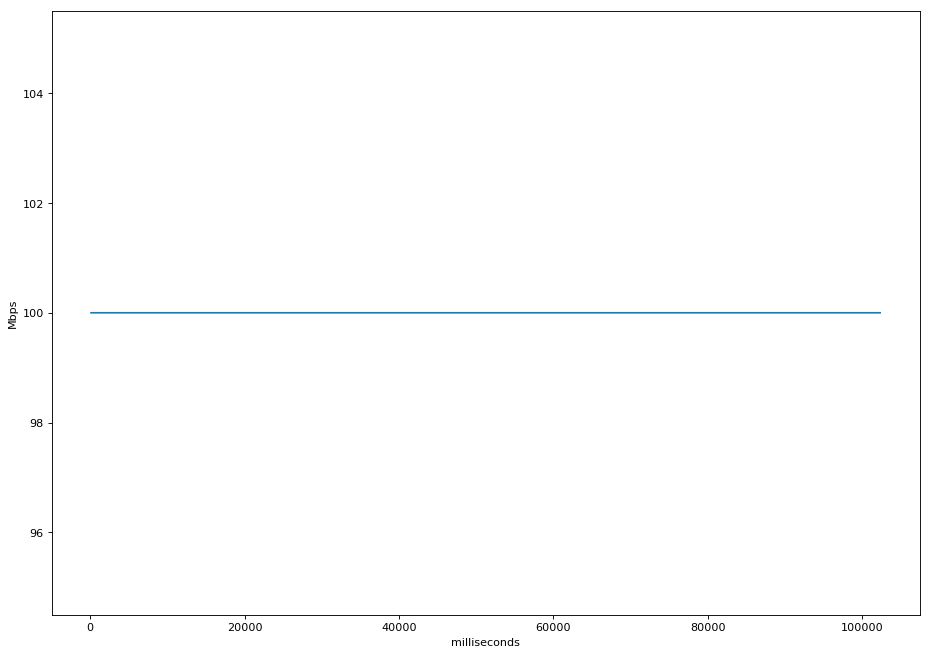

amst_dtn2-aofa_dtn2-10000:2:0
(457640, 1162.9347231388092, 0.39352165766003666)


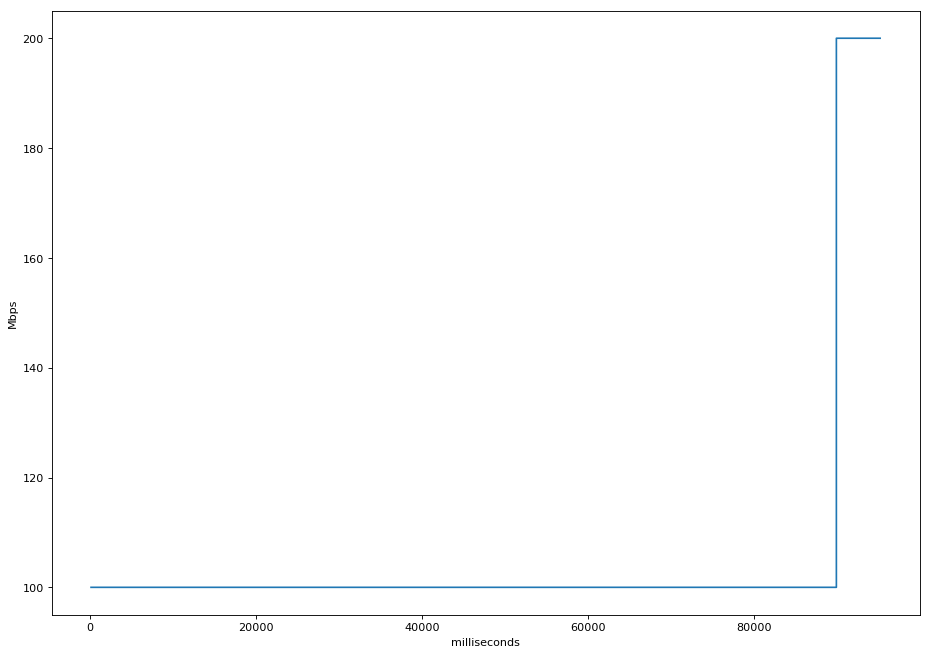

amst_dtn2-atla_dtn2-10000:22:0


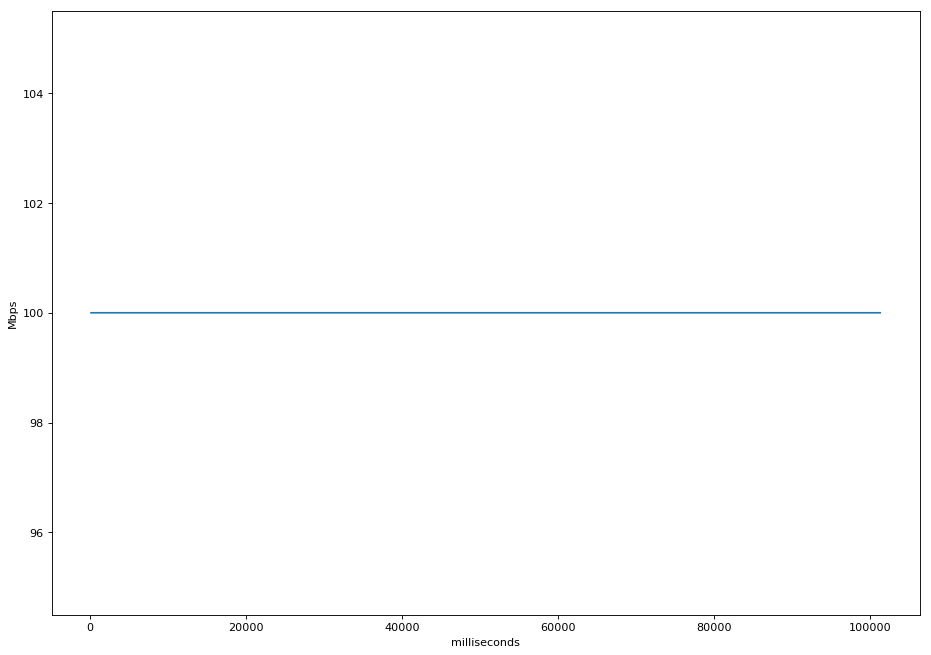

denv_dtn2-wash_dtn2-10000:19:0


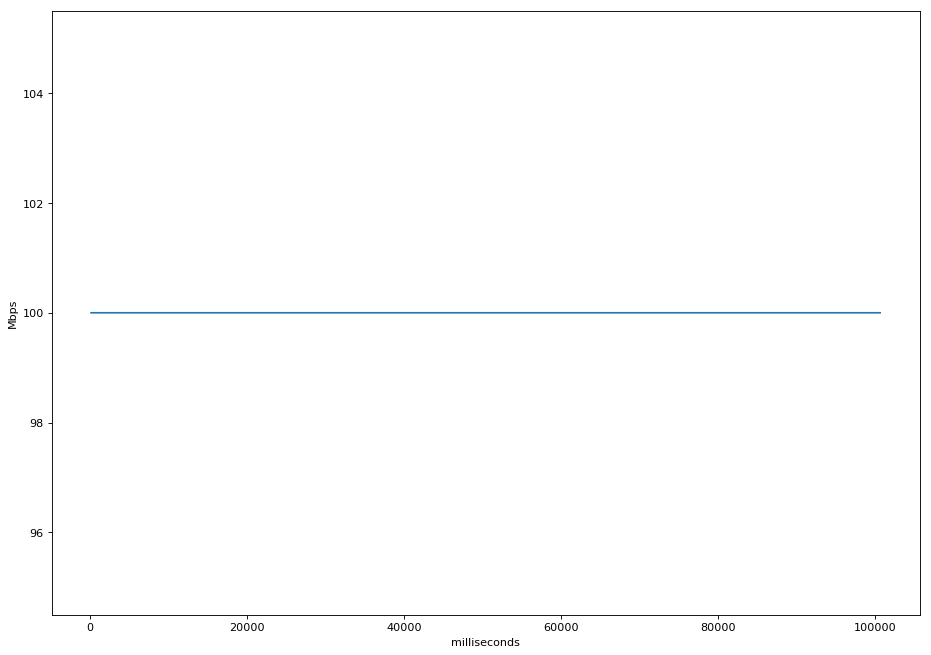

lbl_dtn2-aofa_dtn2-10000:6:0


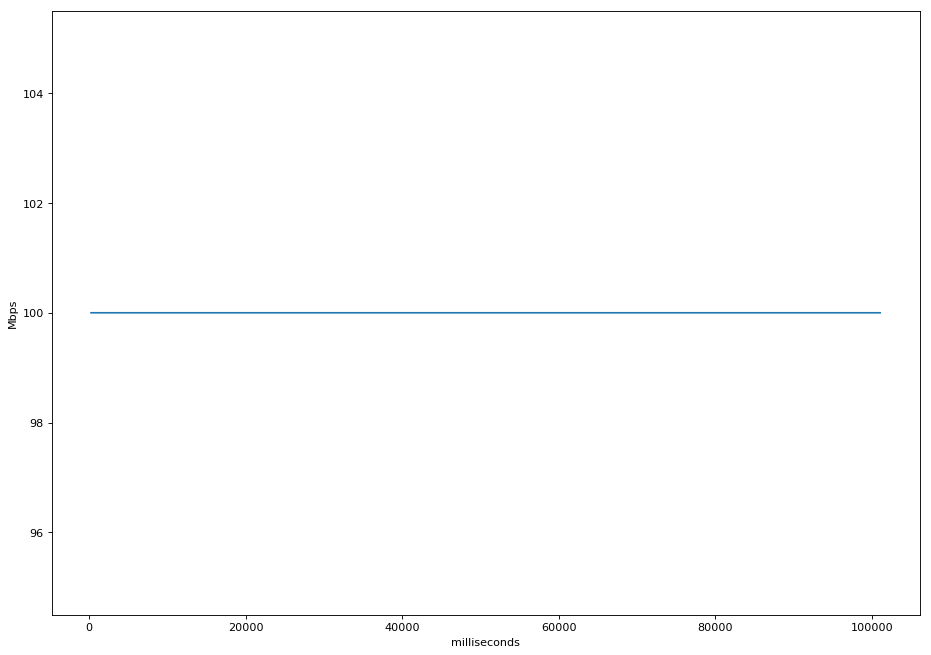

atla_dtn2-denv_dtn2-10000:39:0
(457640, 1163.9838631153107, 0.3931669626202229)


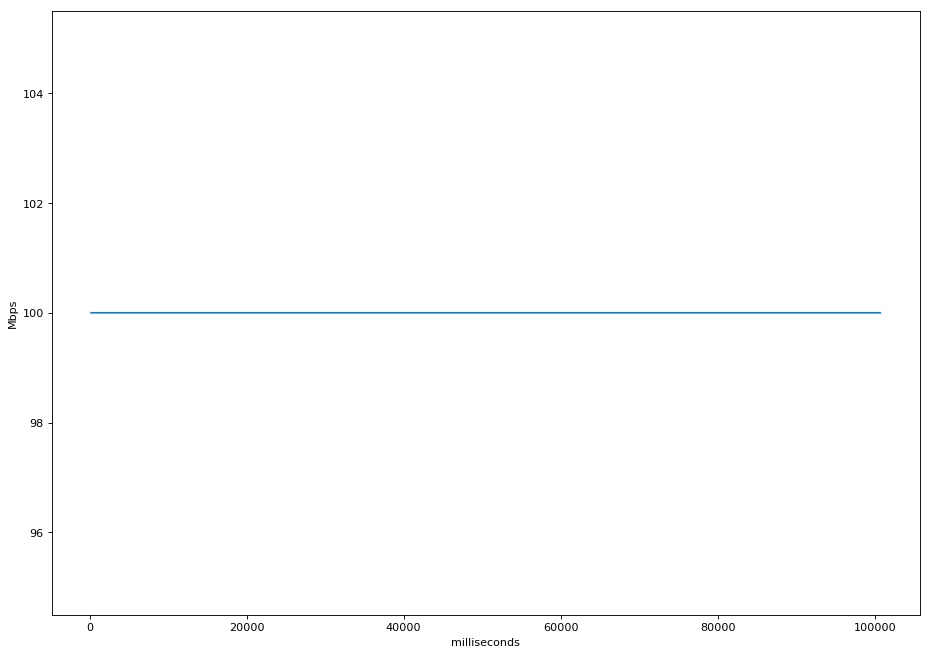

denv_dtn2-cern_dtn2-10000:14:0


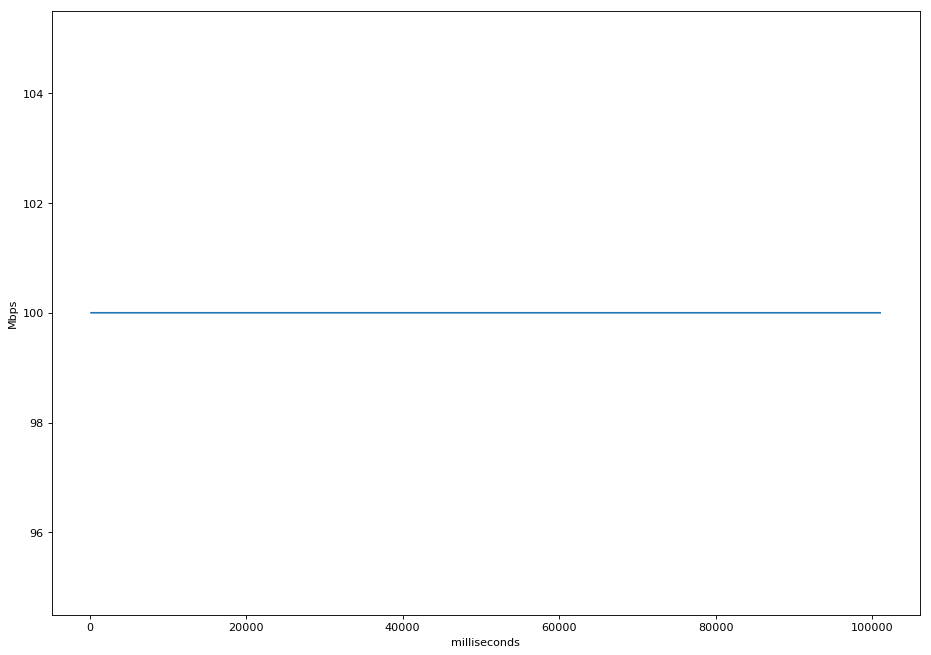

wash_dtn2-cern_dtn2-10000:21:0


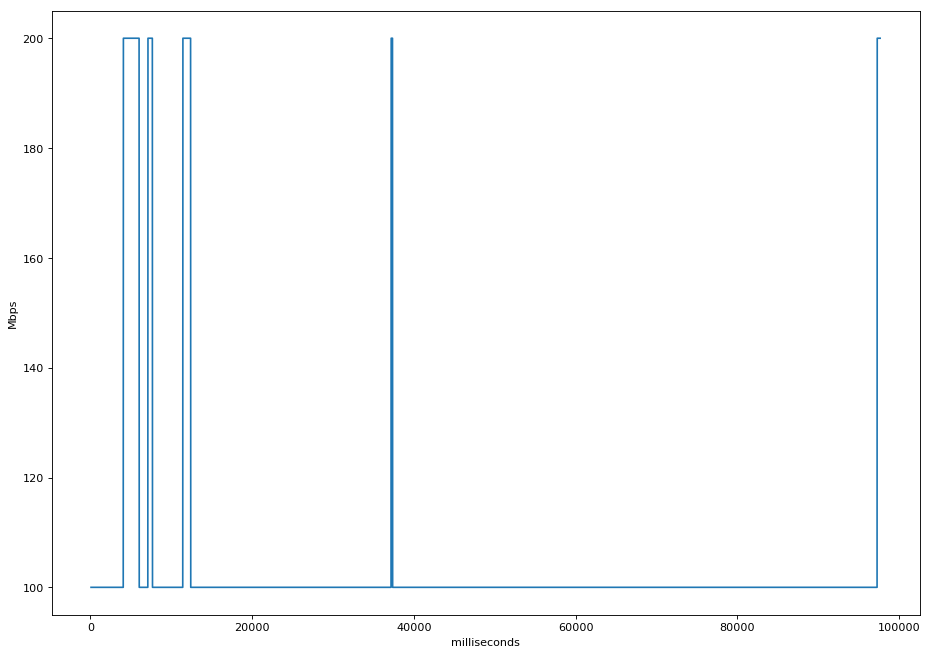

aofa_dtn2-lbl_dtn2-10000:5:0


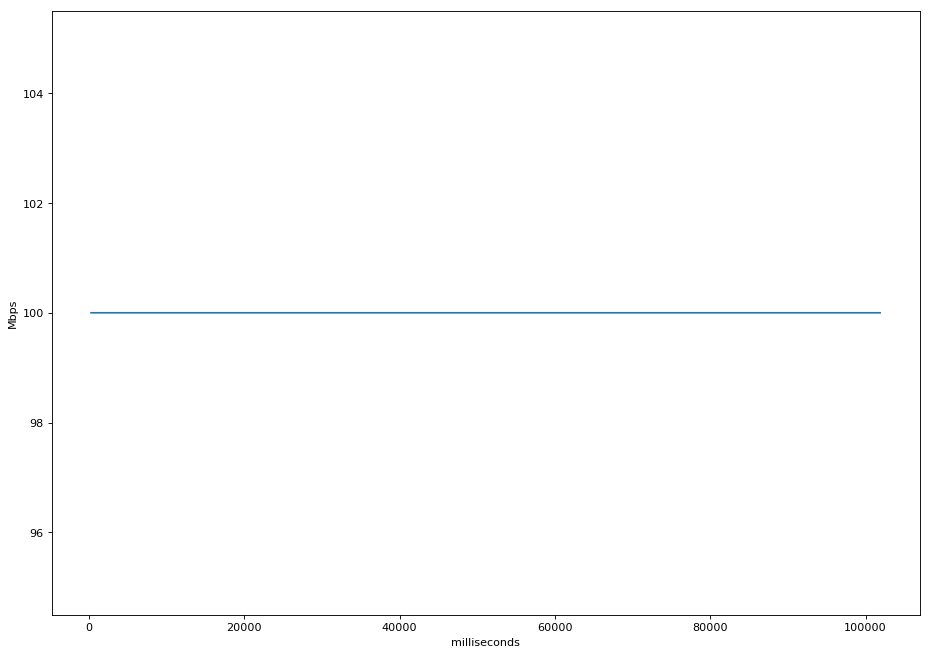

star_dtn2-wash_dtn2-10000:1:0
(457640, 1165.0386531352997, 0.3928110013933184)


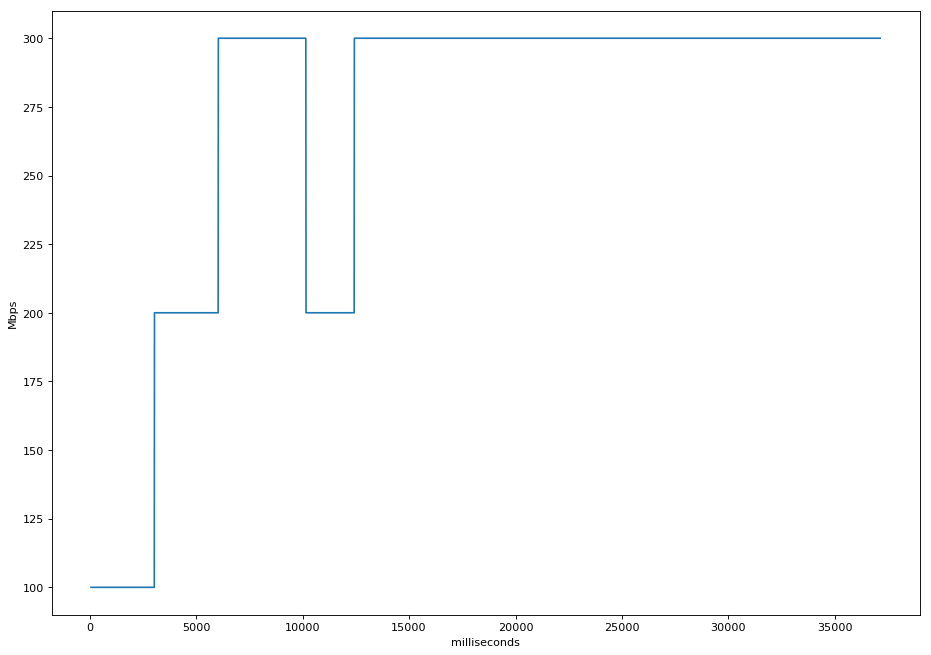

wash_dtn2-amst_dtn2-10000:26:0


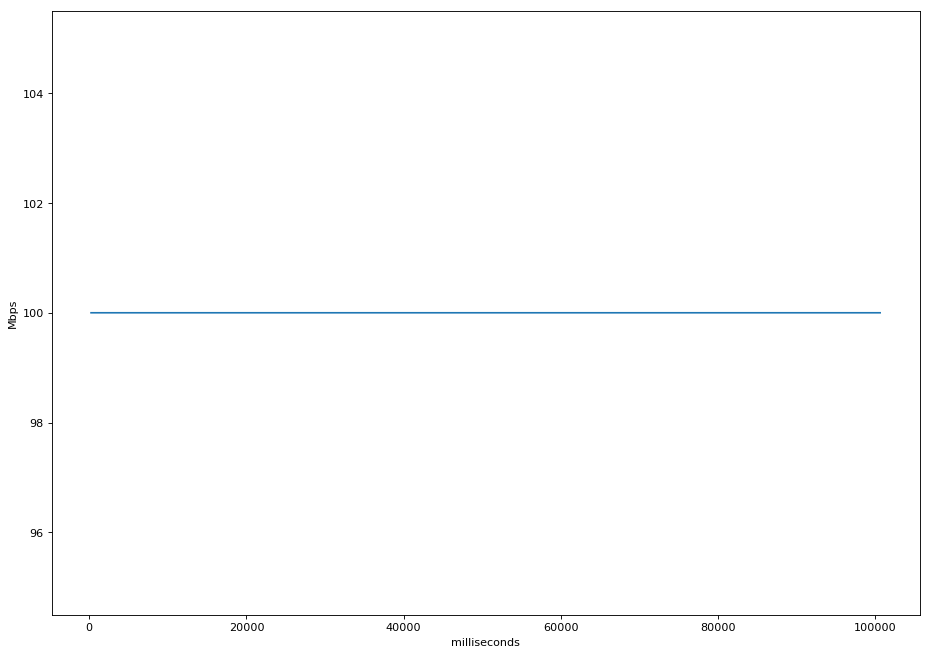

In [9]:
import matplotlib.pyplot as plt

def plot_flow(fig, ax, flow):
    print flow.name
    x,y = zip(*flow.receive_data)
    ax.set_xlabel('milliseconds')
    ax.set_ylabel('Mbps')
    ax.plot(x,y,label=flow.name)
    
for flow in flows.values():
    fig, ax = plt.subplots(num=None, figsize=(14
    , 10), dpi=80, facecolor='w', edgecolor='k')
    plot_flow(fig,ax,flow)
    plt.show()

In [7]:
import time, threading
def do_this():
    while True:
        print topo.sim_rate()
        time.sleep(1)

t = threading.Thread(target=do_this)
t.start()

(8920, 38.28706693649292, 0.23297684345462344)
(9170, 39.306276082992554, 0.23329607670383637)
(9430, 40.36814594268799, 0.2336000274421344)
(9680, 41.40416097640991, 0.23379292737063784)
(9910, 42.40640306472778, 0.23369112407090248)
(10150, 43.420247077941895, 0.2337619125423251)
(10390, 44.46339416503906, 0.23367536813394038)
(10660, 45.56334900856018, 0.23395997511063685)
(10890, 46.69306516647339, 0.23322521152068745)
(11140, 47.76014995574951, 0.23324884889016)
(11410, 48.88053011894226, 0.23342627365611116)
(11700, 50.03531503677368, 0.23383484227891904)
(11950, 51.09710097312927, 0.2338684538342834)
(12180, 52.09753108024597, 0.2337922689894673)
(12420, 53.11446499824524, 0.23383460607972467)
(12660, 54.19690203666687, 0.23359268748303894)
(12880, 55.22258996963501, 0.23323788339305104)
(13100, 56.2615020275116, 0.23284127739060653)
(13370, 57.43110203742981, 0.23280068683491942)
(13610, 58.467841148376465, 0.2327775360383376)
(13850, 59.73602795600891, 0.23185338017786322)
(14

In [17]:
print topo.sim_rate()

(32670, 145.367192029953, 0.22474121941674657)
time: 38 secs cern_dtn2-wash_dtn2-10000:12:0 rtt: 40 average 263 drop 1
